# <font color=red>The Optimizers</font>

## IE 3311 Final Project Code 
## Team The Optimizers 
## Isabel Navarrete, Macey Smercina, Romyia Hopkins

In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Specify path to JSON file
file_path = '/Users/isabelnavarrete/Downloads/The_Optimizers.json'

# Read the entire JSON file
with open(file_path, 'r') as file:
    data = json.load(file)
    
print(data)

[{'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'A', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'O', 'Donor': ['AB', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['B', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['B']}, {'Recipient': 'B', 'Donor': ['AB']}, {'Recipient': 'B', 'Donor': ['AB', 'A']}, {'Recipient': 'O', 'Donor': ['AB', 'B', 'A']}, {'Recipient': 'O', 'Donor': ['B', 'A']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {'Recipient': 'A', 'Donor': ['AB', 'B']}, {

In [3]:
# Create a graph
G = nx.DiGraph()

# Create nodes
counter = 0
for element in data:
    #print(element)
    G.add_nodes_from([(counter, element)])
    counter += 1

#G.add_nodes_from(data)

#print(G.nodes)

donor_recipient_compatibility = {'O': ['O', 'A', 'B', 'AB'], 'A': ['A', 'AB'], 'B':['B', 'AB'], 'AB':['AB']}

# Create edges (relations)
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    #print(donors)
    for donor in donors:
        for vertex in G.nodes:
            if node == vertex: continue
            recipient = G.nodes[vertex]['Recipient']
            if recipient not in donor_recipient_compatibility[donor]: continue
            G.add_edge(node, vertex)    
print('edges:', G.edges)    

edges: [(0, 2), (0, 7), (0, 8), (0, 10), (0, 12), (0, 13), (0, 16), (0, 17), (0, 22), (0, 23), (0, 25), (0, 26), (0, 30), (0, 34), (0, 37), (0, 38), (0, 45), (0, 51), (0, 55), (0, 59), (0, 61), (0, 62), (0, 63), (0, 64), (0, 70), (0, 72), (0, 77), (0, 81), (0, 82), (0, 91), (0, 92), (0, 98), (0, 99), (0, 105), (0, 109), (0, 110), (0, 112), (0, 115), (0, 116), (0, 118), (0, 135), (0, 137), (0, 138), (0, 141), (0, 145), (0, 146), (0, 147), (0, 149), (0, 157), (0, 159), (0, 162), (0, 164), (0, 165), (0, 171), (0, 175), (0, 177), (0, 178), (0, 184), (0, 185), (0, 190), (0, 193), (0, 194), (0, 202), (0, 204), (0, 207), (0, 208), (0, 213), (0, 216), (0, 225), (0, 227), (0, 231), (0, 233), (0, 236), (0, 238), (0, 239), (0, 245), (0, 247), (0, 253), (0, 255), (0, 256), (0, 257), (0, 259), (0, 262), (0, 263), (0, 265), (0, 276), (0, 277), (0, 278), (0, 282), (0, 286), (0, 291), (0, 293), (0, 297), (0, 302), (0, 304), (0, 307), (0, 308), (0, 313), (0, 314), (0, 315), (0, 316), (0, 318), (0, 322)

In [4]:
# Find cycles of length 3

potential_cycle_3 = []

H = G.to_undirected()

for (u,v) in H.edges:
    for k in nx.common_neighbors(H, u, v):
        potential_cycle_3.append((u,v,k))
        
#print("potential_cycle_3:", potential_cycle_3)        
        
cycle_3 = [] 

for (u,v,k) in potential_cycle_3:
    if (u,v) in G.edges and (v,k) in G.edges and (k,u) in G.edges:
        cycle_3.append((u,v,k,u))
    if (v,u) in G.edges and (u,k) in G.edges and (k,v) in G.edges: 
        cycle_3.append((v,u,k,v))

print("cycle_3:", cycle_3) 

cycle_3: []


In [5]:
# Find cycles of length 2

cycle_2 = []

for (i,j) in G.edges:
    G.edges[(i,j)]["visited"] = False

for (i,j) in G.edges:
    if G.edges[(i,j)]["visited"] == True: continue
    if (j,i) in G.edges:
        cycle_2.append((i,j,i))
        G.edges[(j,i)]["visited"] = True
            
print("cycles of length 2:", cycle_2)



cycles of length 2: [(0, 2, 0), (0, 7, 0), (0, 8, 0), (0, 10, 0), (0, 12, 0), (0, 13, 0), (0, 16, 0), (0, 17, 0), (0, 22, 0), (0, 23, 0), (0, 26, 0), (0, 30, 0), (0, 37, 0), (0, 45, 0), (0, 51, 0), (0, 55, 0), (0, 59, 0), (0, 61, 0), (0, 62, 0), (0, 63, 0), (0, 64, 0), (0, 70, 0), (0, 81, 0), (0, 82, 0), (0, 91, 0), (0, 92, 0), (0, 98, 0), (0, 99, 0), (0, 105, 0), (0, 109, 0), (0, 110, 0), (0, 112, 0), (0, 115, 0), (0, 116, 0), (0, 118, 0), (0, 135, 0), (0, 137, 0), (0, 138, 0), (0, 145, 0), (0, 146, 0), (0, 147, 0), (0, 157, 0), (0, 159, 0), (0, 162, 0), (0, 164, 0), (0, 165, 0), (0, 171, 0), (0, 175, 0), (0, 177, 0), (0, 178, 0), (0, 185, 0), (0, 190, 0), (0, 193, 0), (0, 194, 0), (0, 202, 0), (0, 207, 0), (0, 208, 0), (0, 213, 0), (0, 216, 0), (0, 225, 0), (0, 227, 0), (0, 231, 0), (0, 236, 0), (0, 245, 0), (0, 247, 0), (0, 253, 0), (0, 255, 0), (0, 256, 0), (0, 257, 0), (0, 259, 0), (0, 262, 0), (0, 263, 0), (0, 265, 0), (0, 276, 0), (0, 278, 0), (0, 282, 0), (0, 286, 0), (0, 291, 

In [6]:
# Let's find a maximum matching
import gurobipy as gp
from gurobipy import GRB

# Create model object
m = gp.Model()

# Create variable for each edge
x = m.addVars(G.edges, vtype=GRB.BINARY)

# Objective function: maximize number of edges
m.setObjective(gp.quicksum(x[e] for e in G.edges), GRB.MAXIMIZE)

# The number of incomming arcs to each vertex is at most one
m.addConstrs(gp.quicksum(x[e] for e in G.edges(v)) <= 1 for v in G.nodes)

# The number of incomming arcs should be equal to the number of outgoing arcs
#m.addConstrs(gp.quicksum(x[(u,v)] for u in G.neighbors(v) if (u,v) in G.edges) == gp.quicksum(x[(v,u)] for u in G.neighbors(v) if (v,u) in G.edges) for v in G.nodes)

# Solve
m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-13
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 24.0.0 24A348)

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 758 rows, 191734 columns and 191734 nonzeros
Model fingerprint: 0xcf06b16d
Variable types: 0 continuous, 191734 integer (191734 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 654.0000000
Presolve removed 758 rows and 191734 columns
Presolve time: 0.09s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.14 seconds (0.05 work units)
Thread count was 1 (of 12 available processors)

Solution count 1: 654 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.540000000000

In [7]:
print("Objective:",m.objVal)

selected_edges = [e for e in G.edges if x[e].X > 0.5]

print("selected_edges:", selected_edges)

Objective: 654.0
selected_edges: [(0, 754), (1, 757), (2, 757), (3, 754), (4, 754), (5, 757), (6, 754), (7, 757), (8, 757), (9, 754), (10, 757), (11, 754), (12, 757), (13, 757), (14, 754), (15, 754), (16, 757), (17, 757), (19, 754), (20, 754), (21, 754), (22, 757), (23, 757), (24, 754), (26, 757), (28, 754), (29, 754), (30, 757), (31, 754), (32, 754), (33, 754), (35, 757), (36, 754), (37, 757), (39, 757), (40, 754), (41, 754), (42, 757), (43, 754), (44, 757), (45, 757), (46, 754), (47, 754), (48, 754), (49, 754), (50, 754), (51, 757), (53, 757), (55, 757), (56, 754), (57, 757), (58, 754), (59, 757), (60, 757), (61, 757), (62, 757), (63, 757), (64, 757), (65, 754), (66, 757), (67, 757), (68, 757), (69, 754), (70, 757), (71, 754), (75, 754), (76, 757), (78, 757), (79, 754), (80, 754), (81, 757), (82, 757), (83, 754), (84, 757), (85, 754), (86, 754), (87, 754), (88, 757), (89, 754), (90, 754), (91, 757), (92, 757), (93, 754), (94, 754), (95, 754), (96, 754), (97, 754), (98, 757), (99, 757

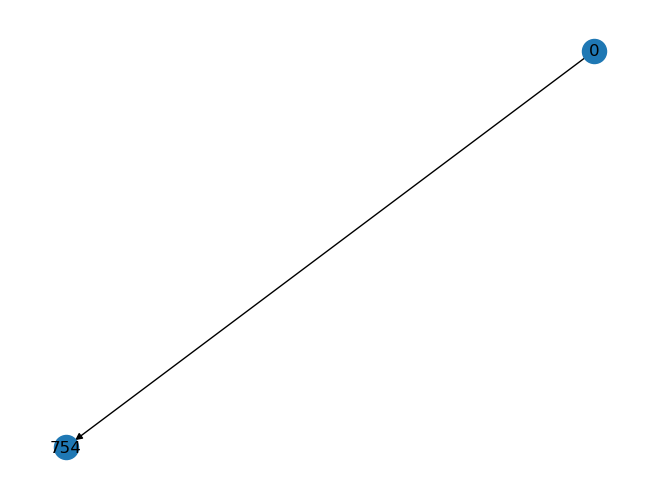

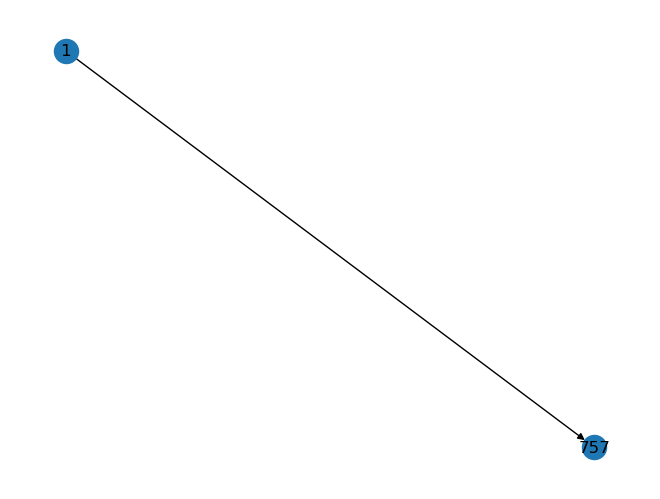

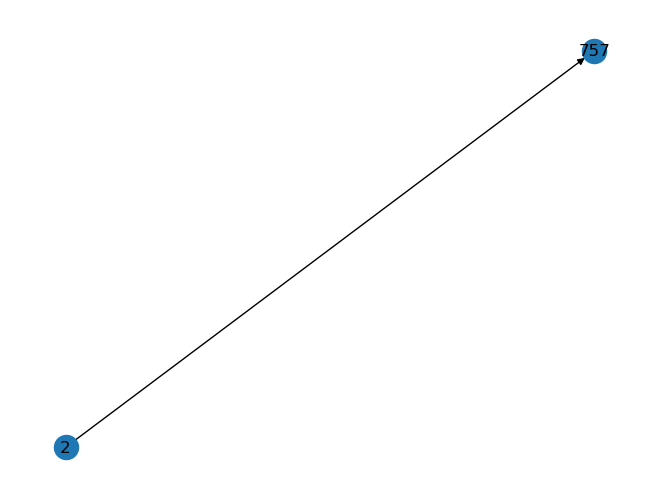

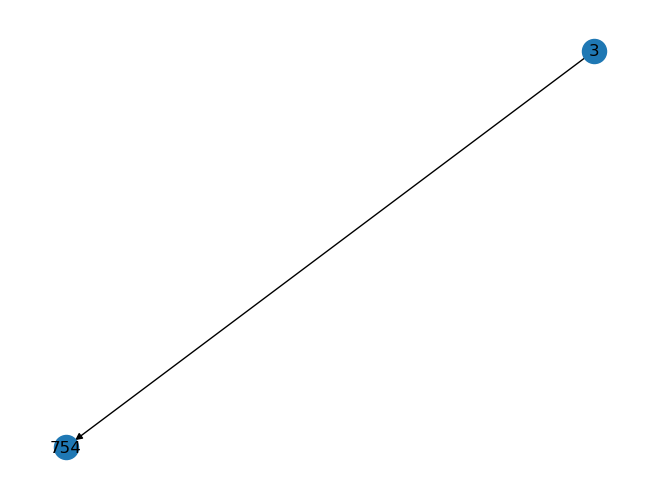

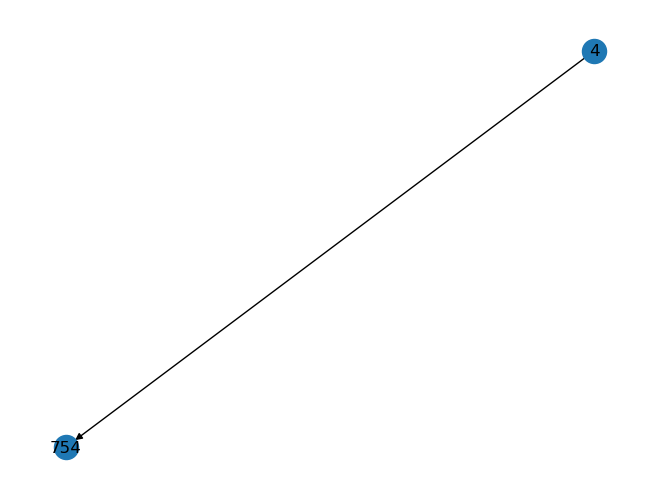

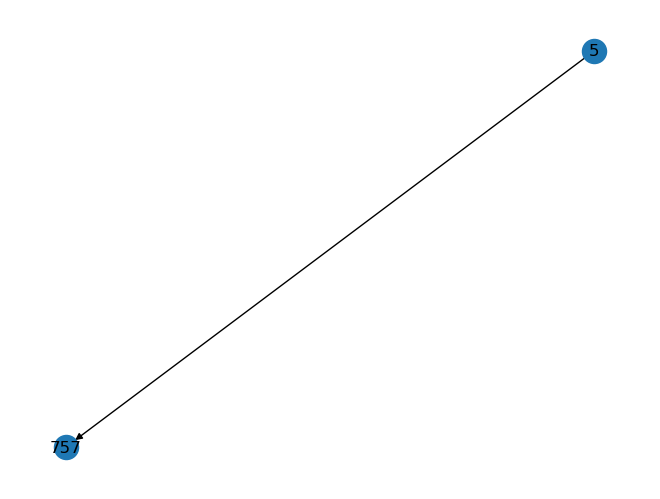

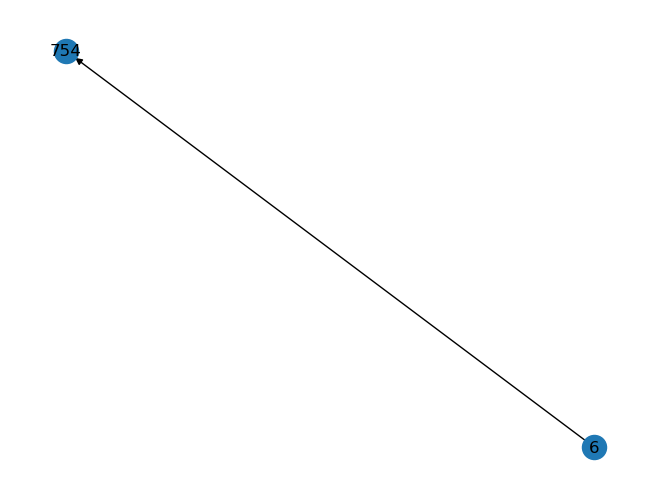

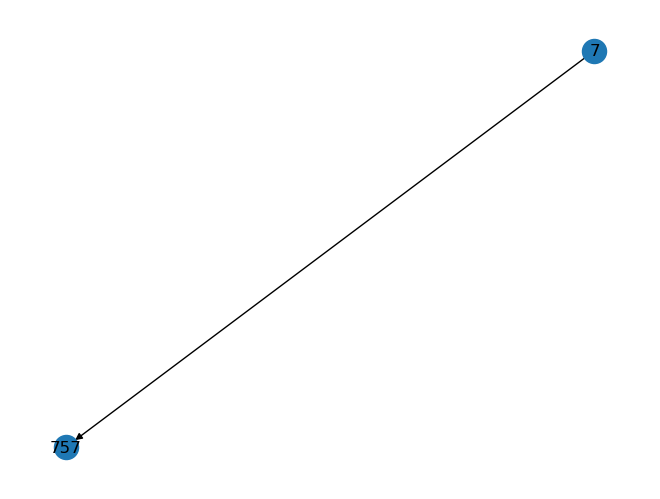

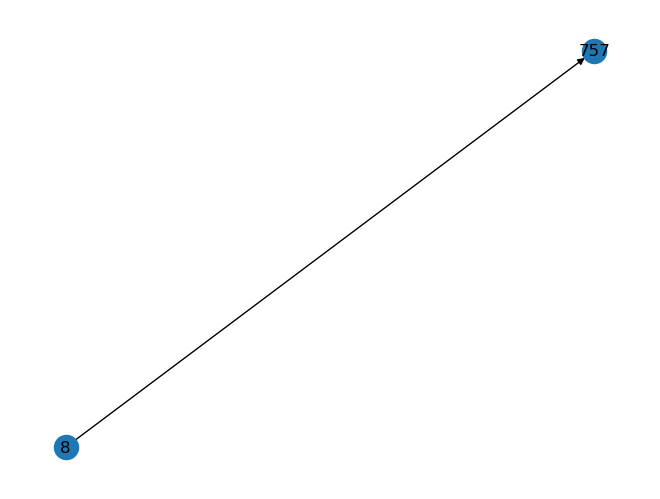

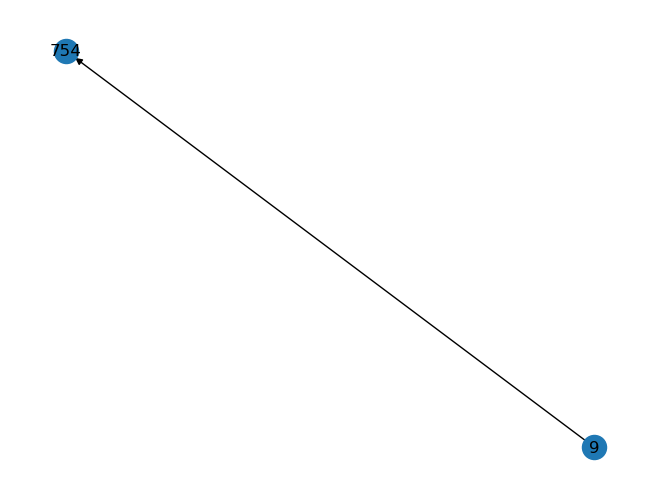

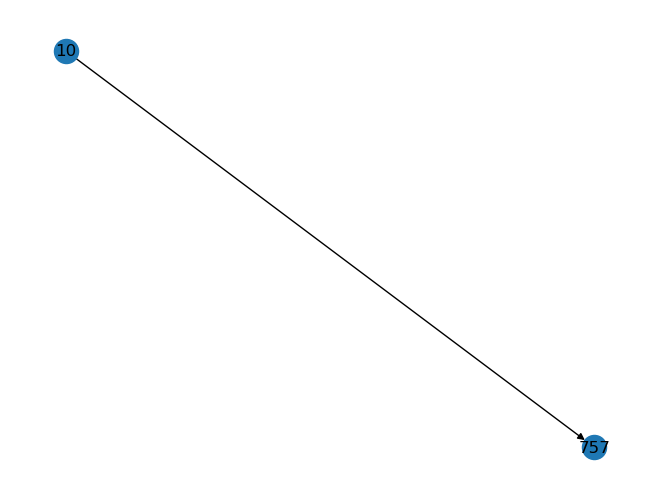

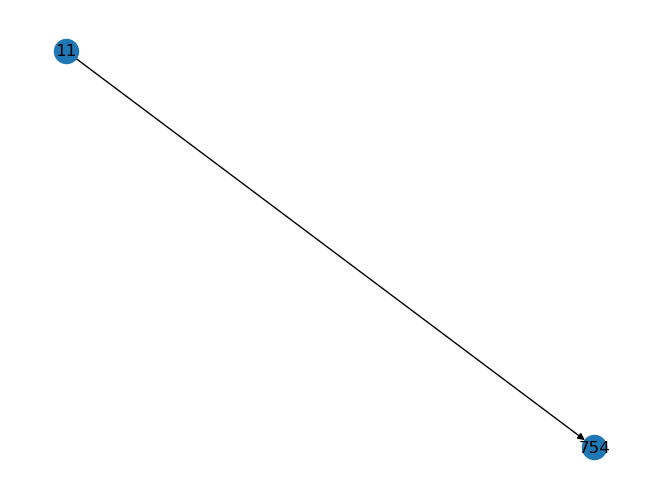

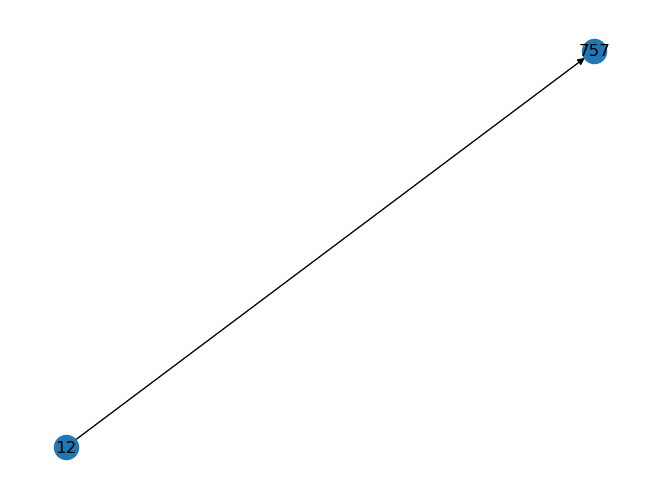

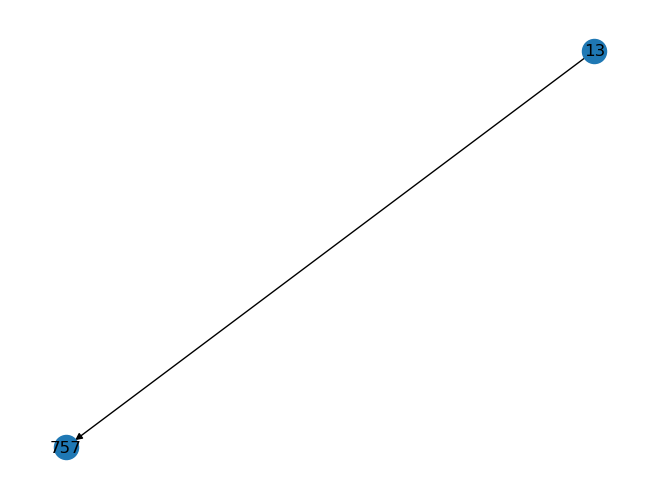

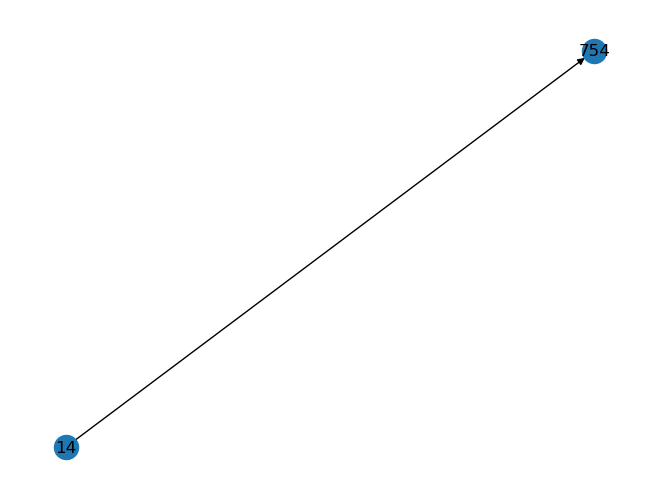

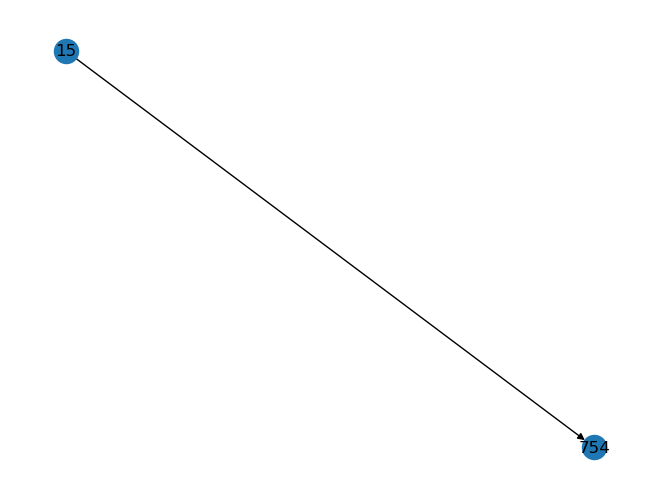

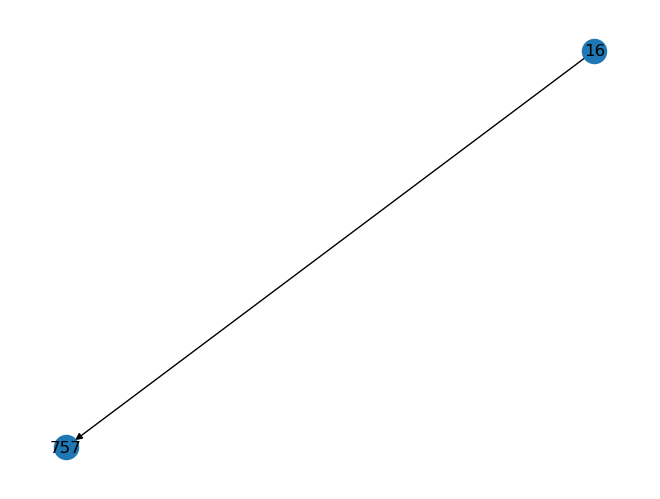

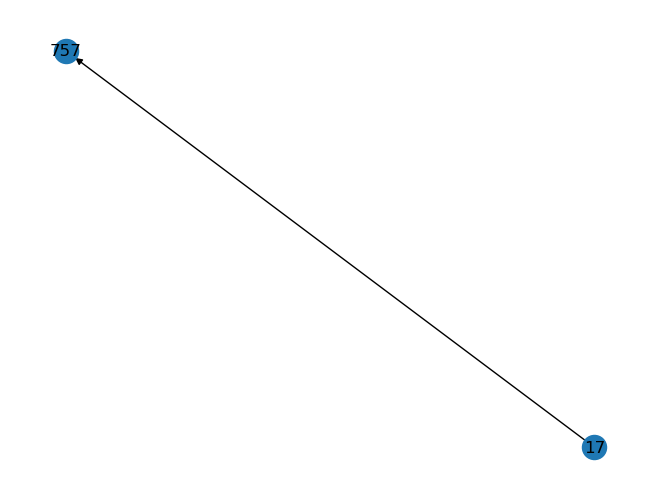

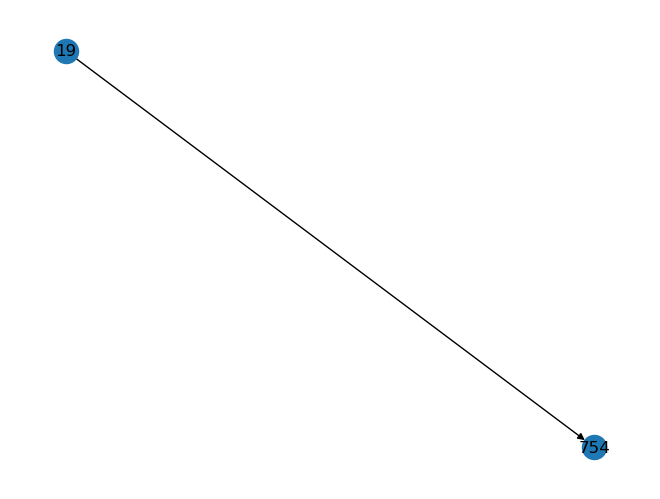

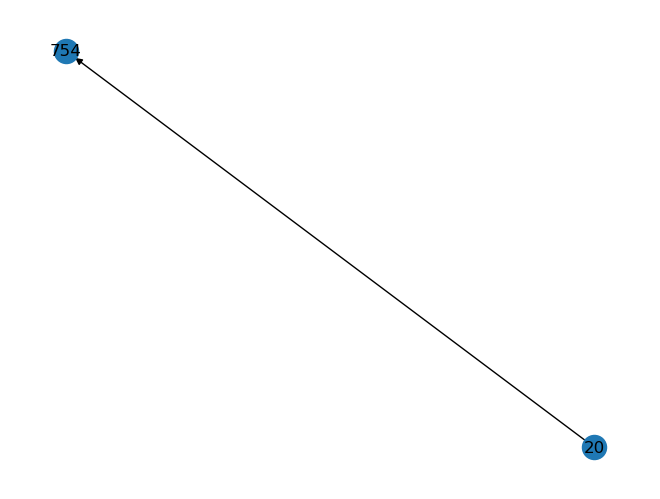

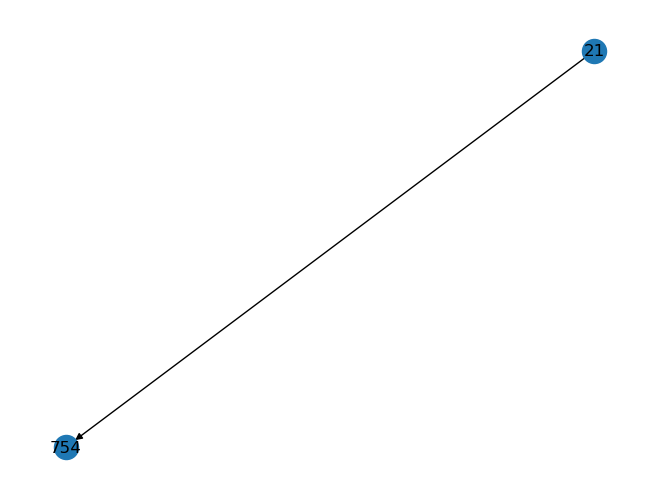

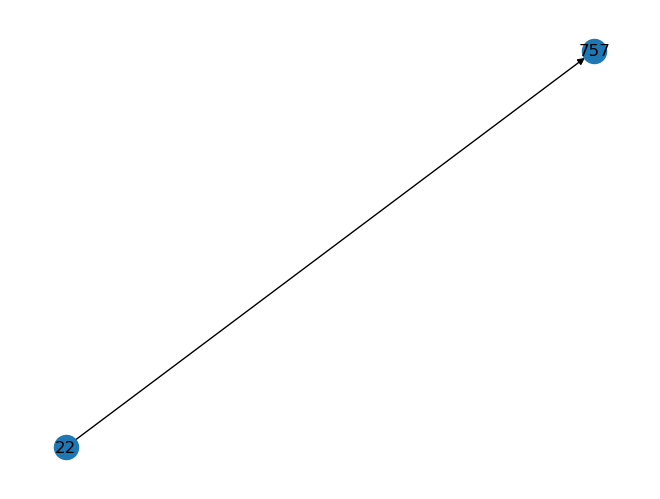

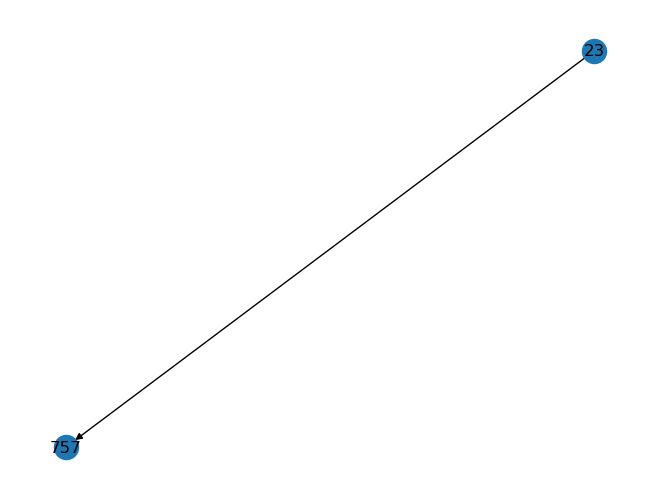

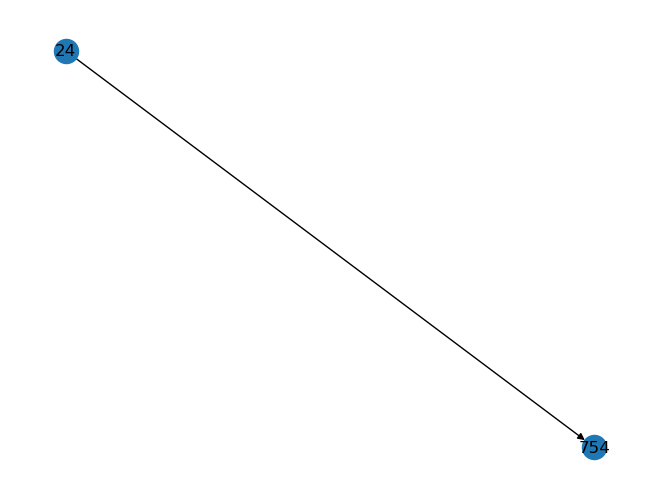

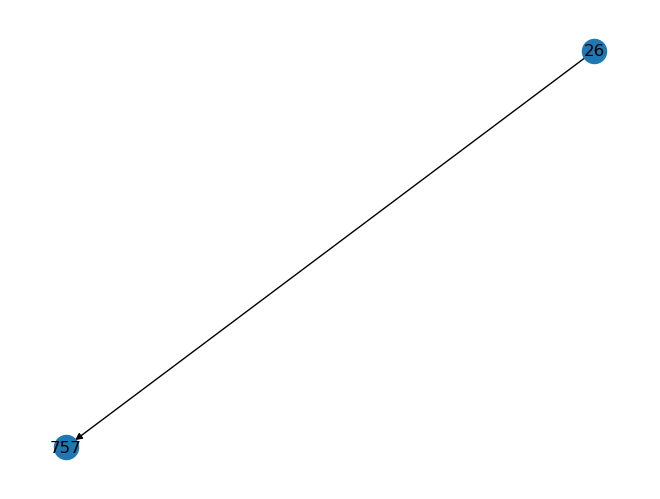

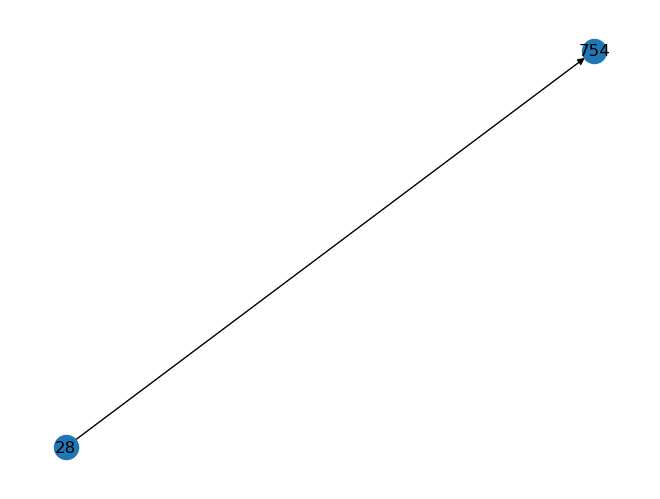

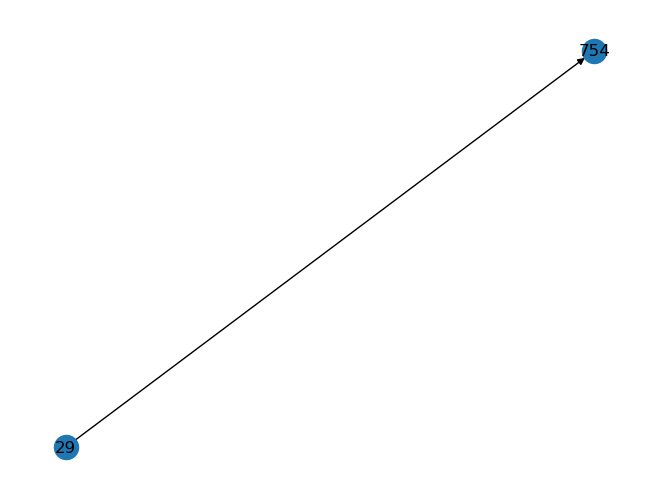

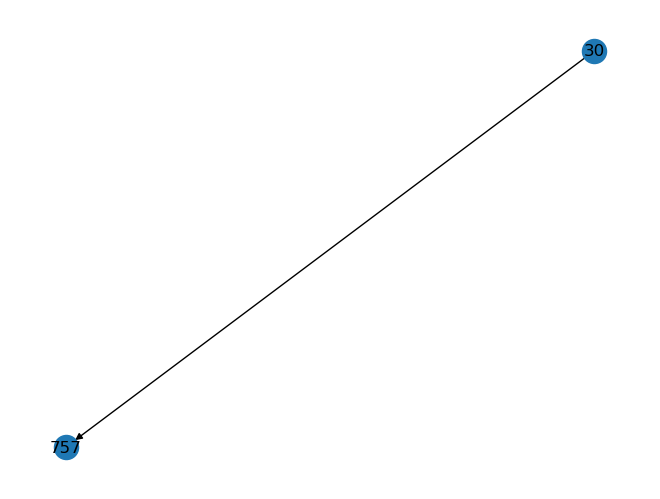

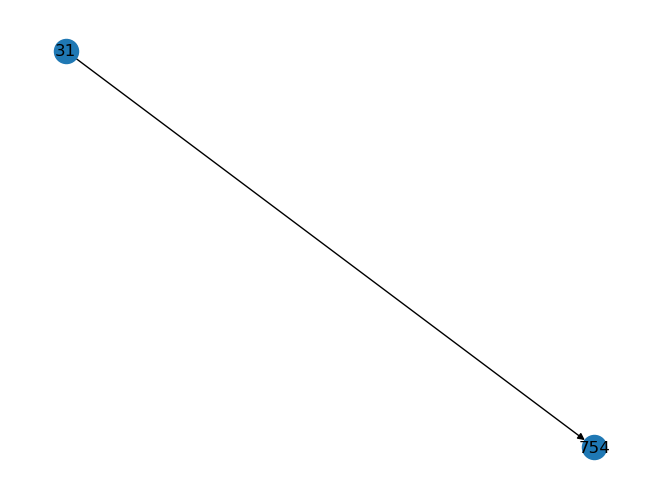

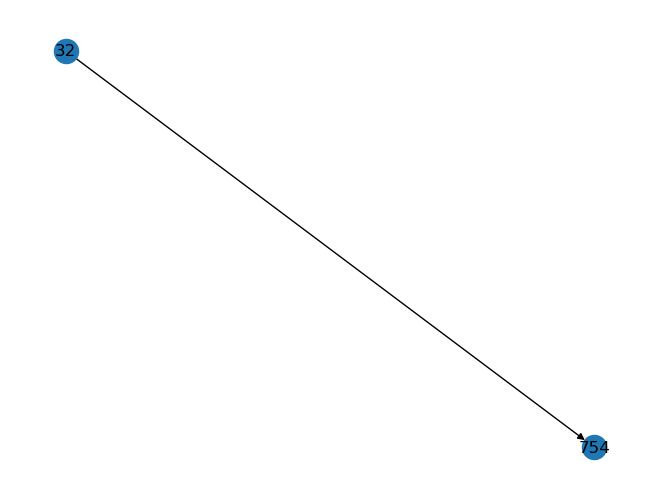

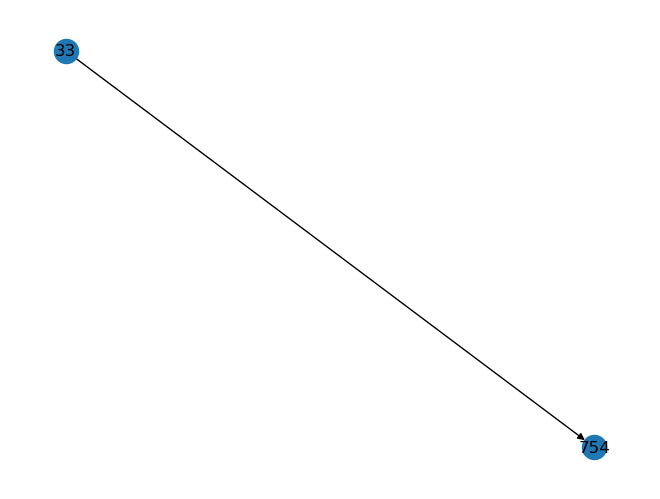

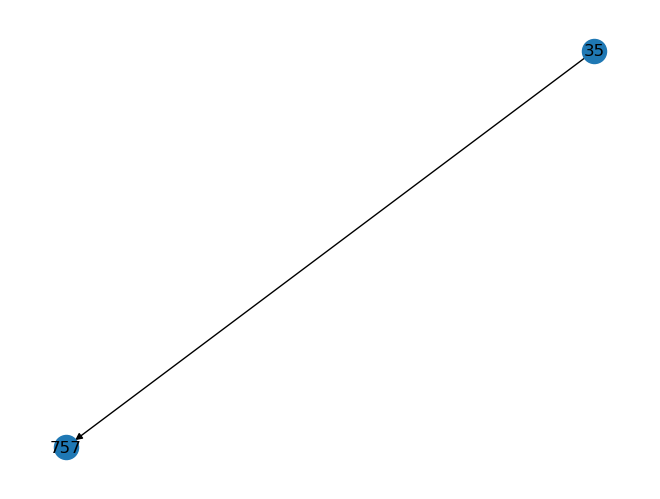

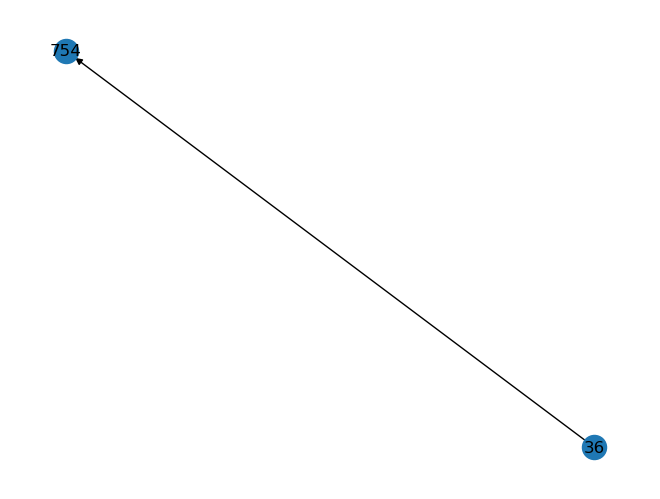

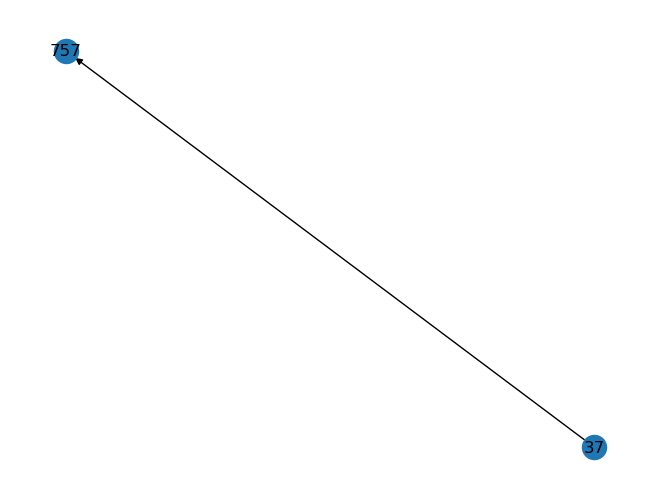

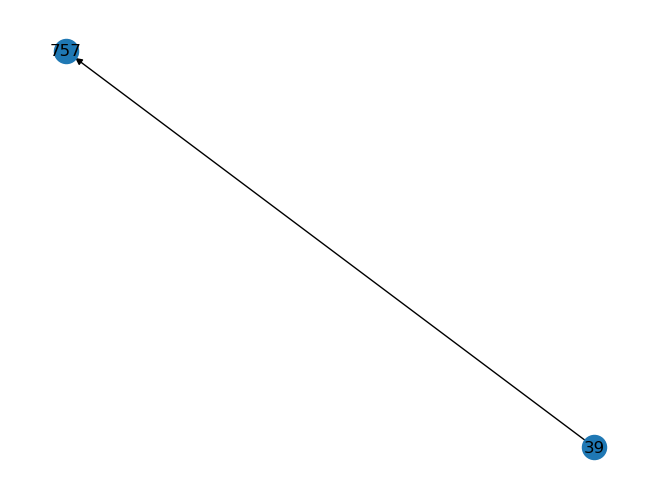

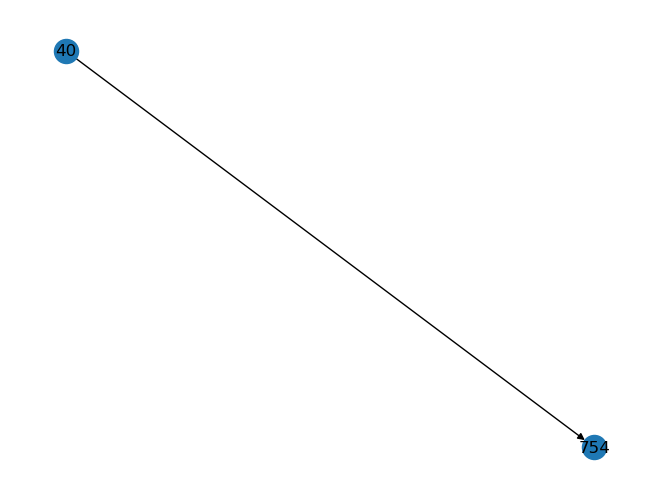

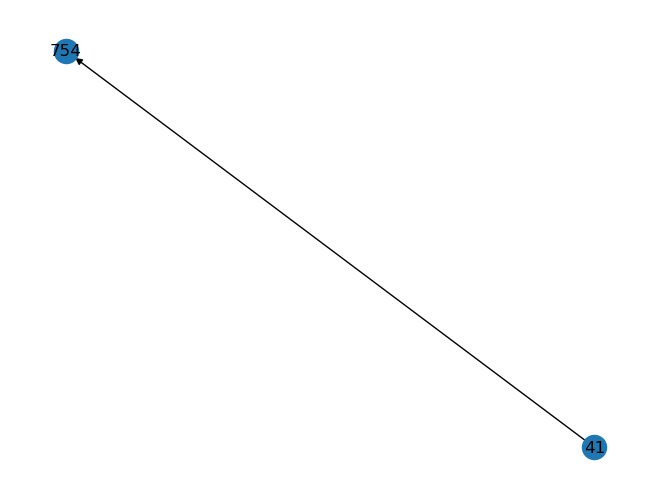

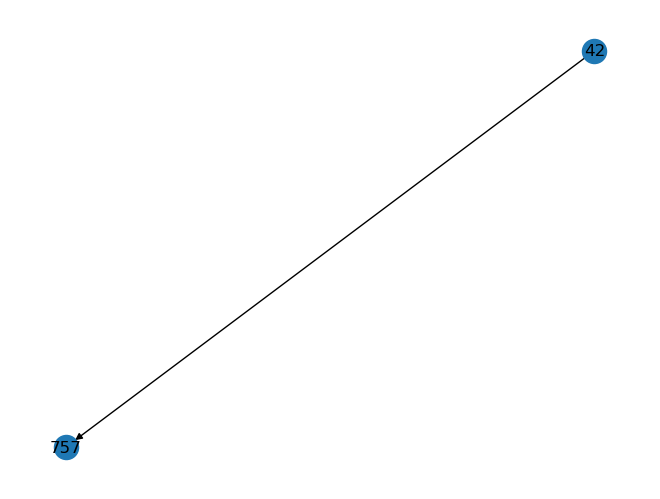

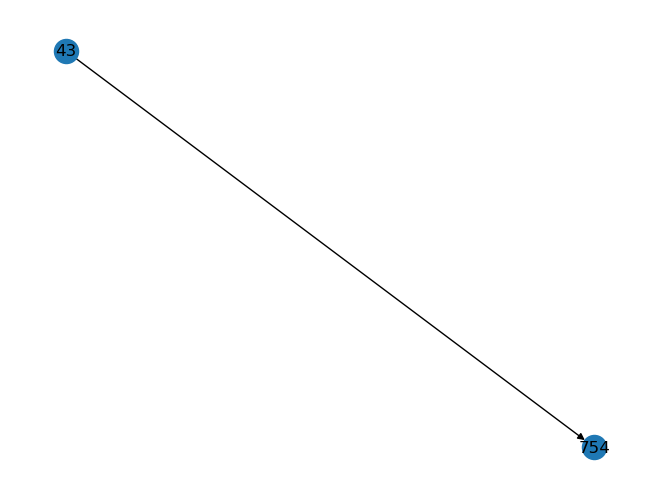

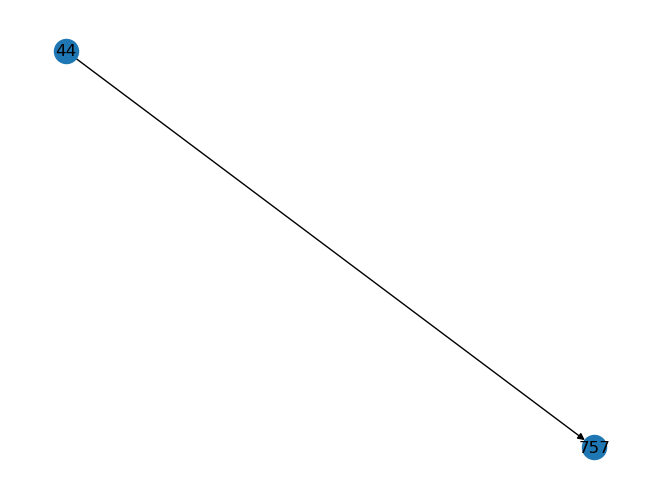

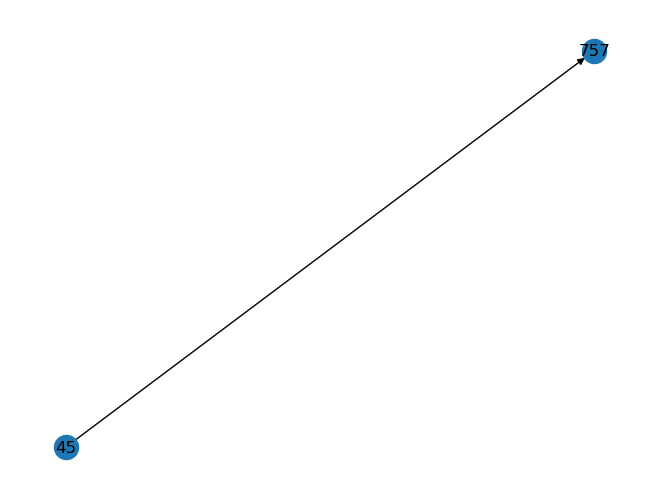

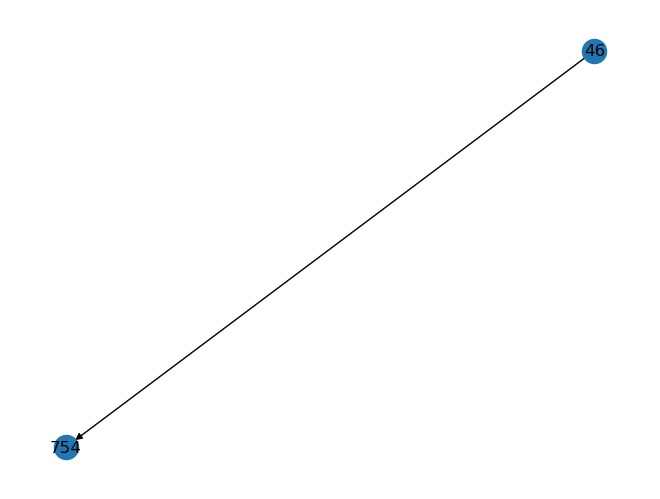

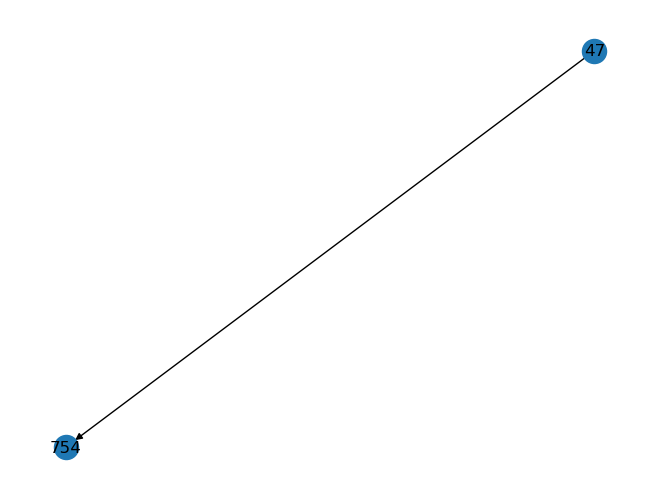

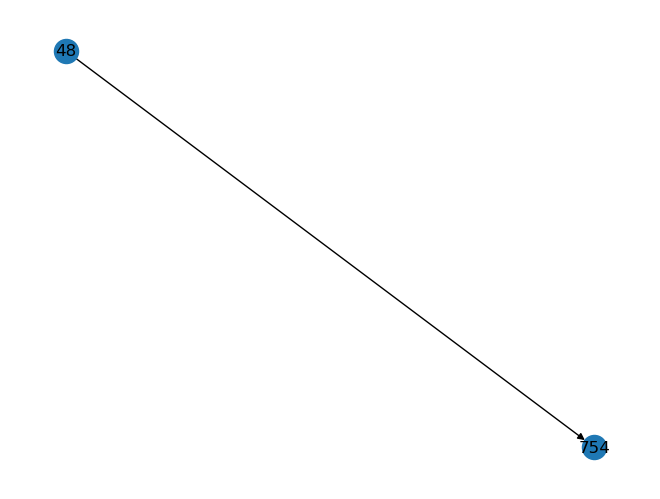

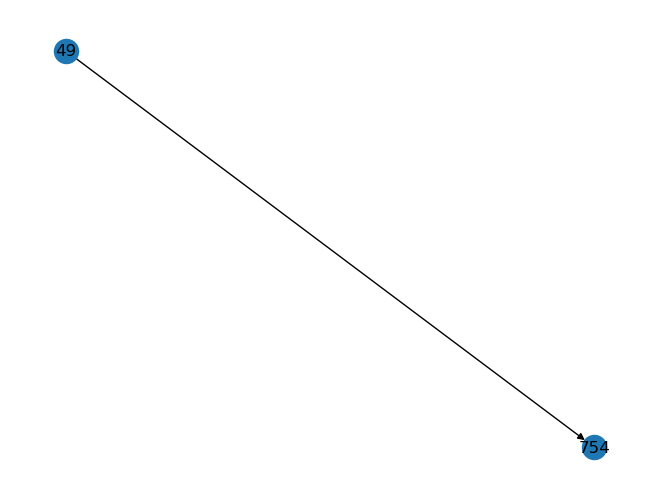

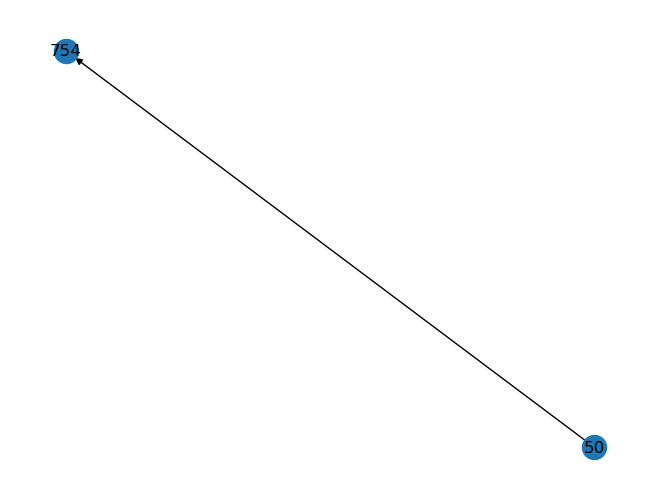

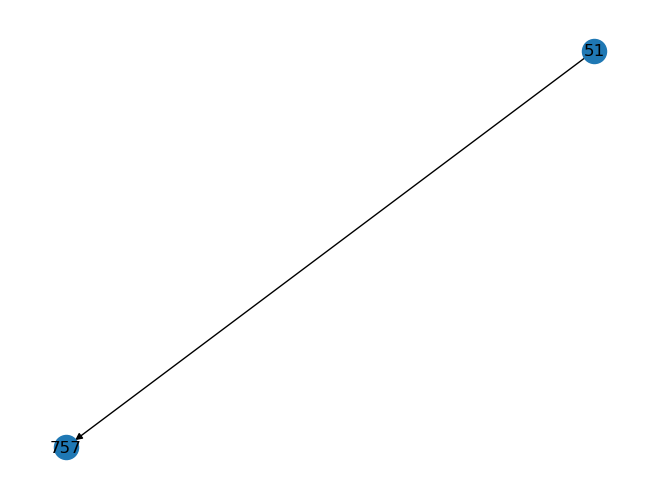

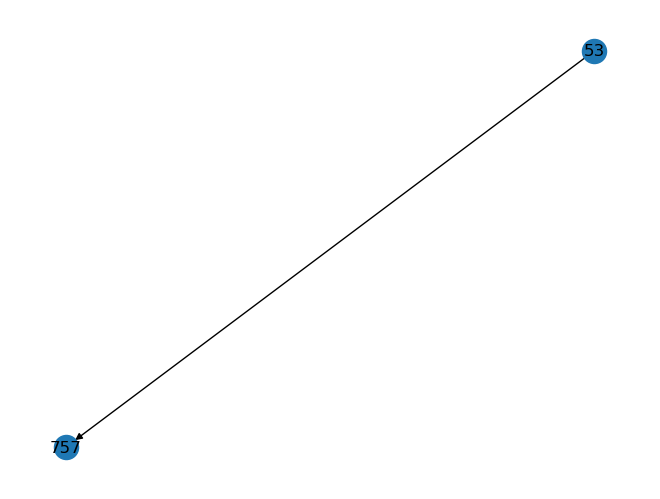

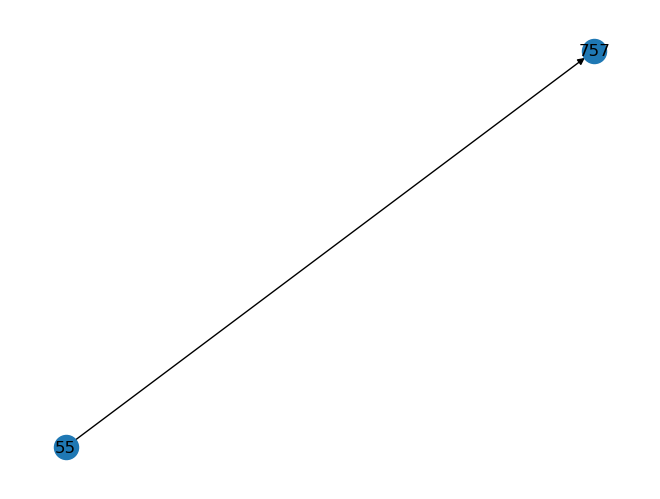

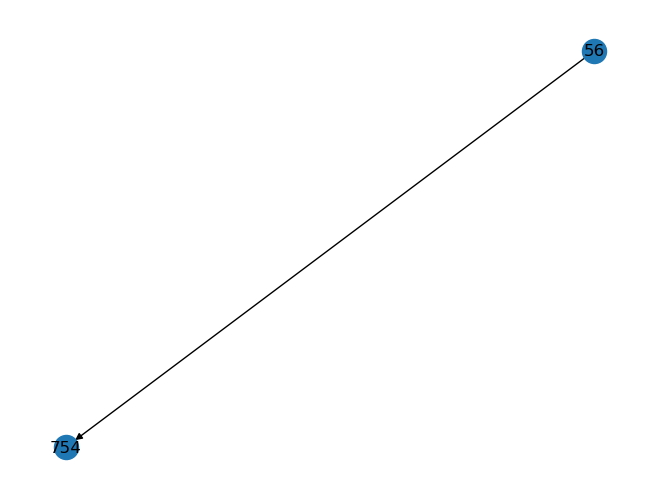

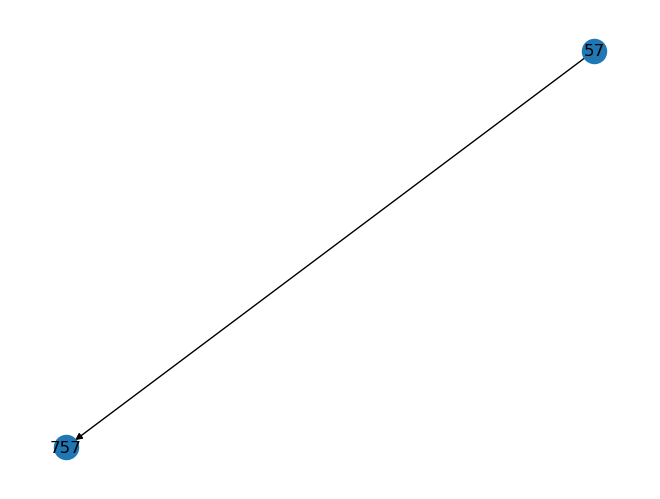

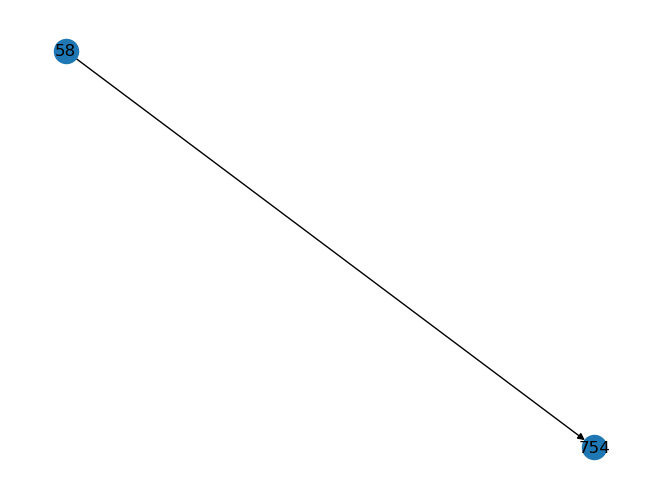

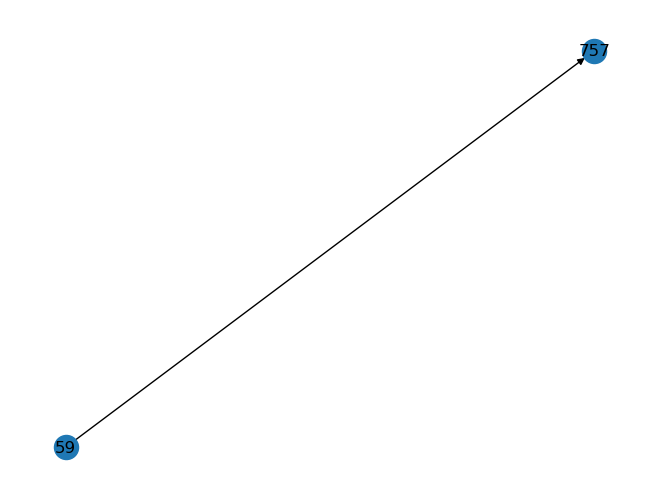

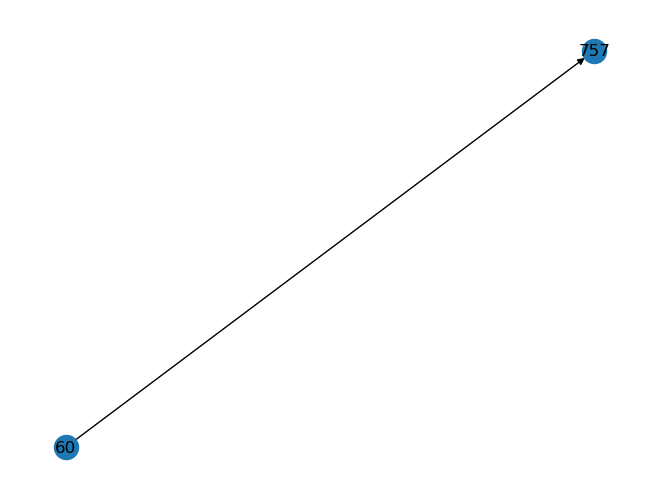

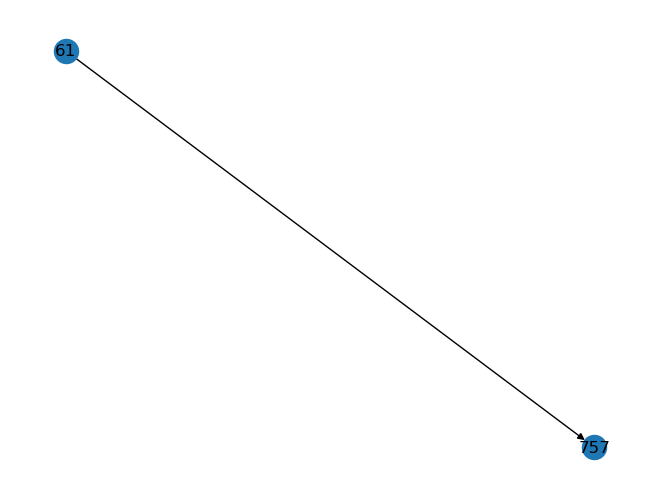

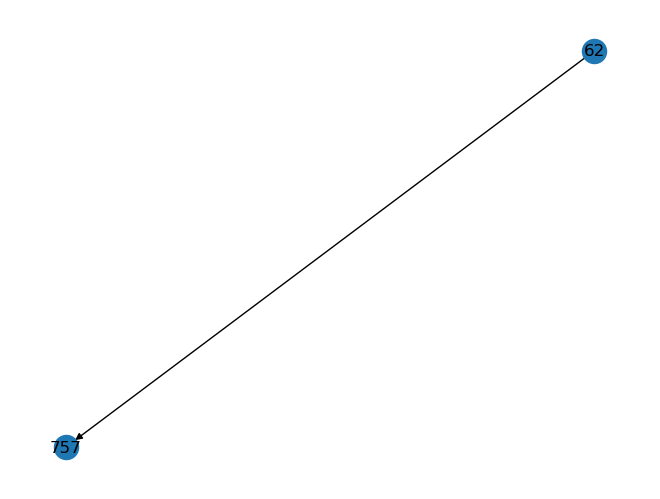

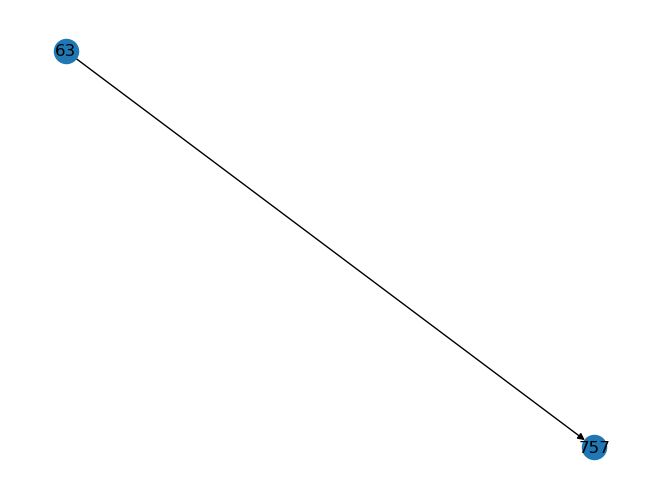

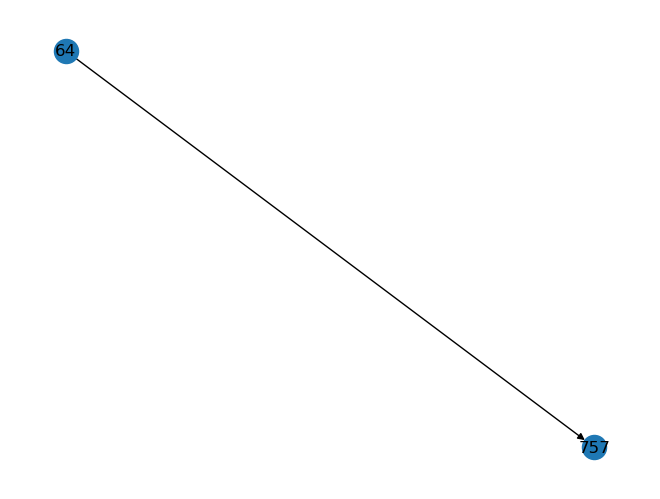

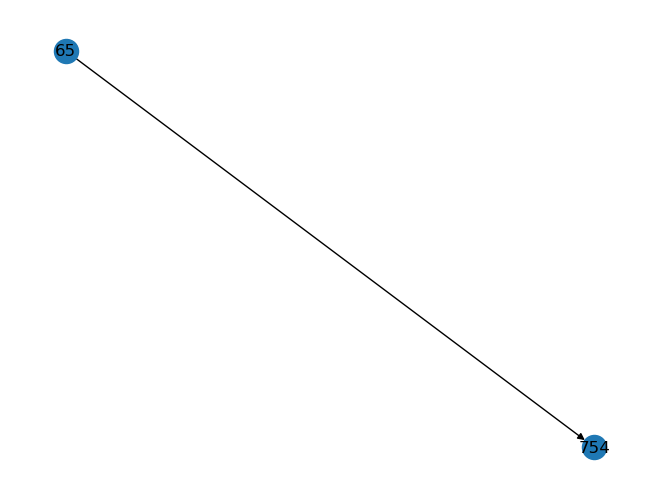

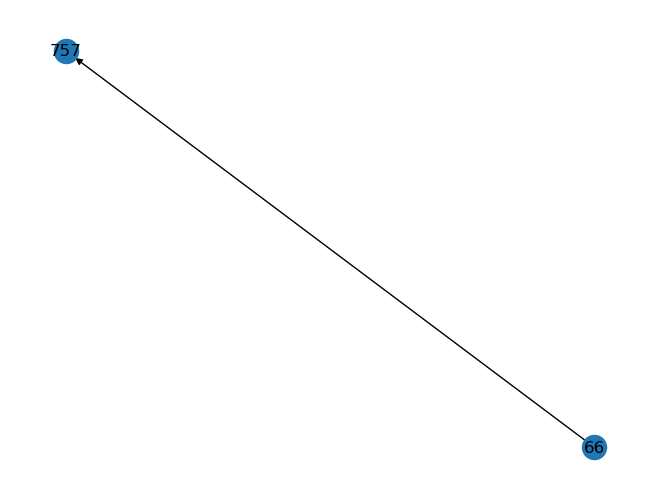

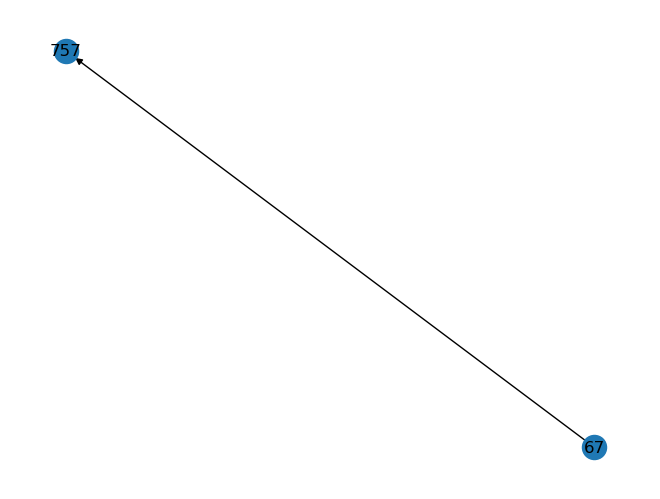

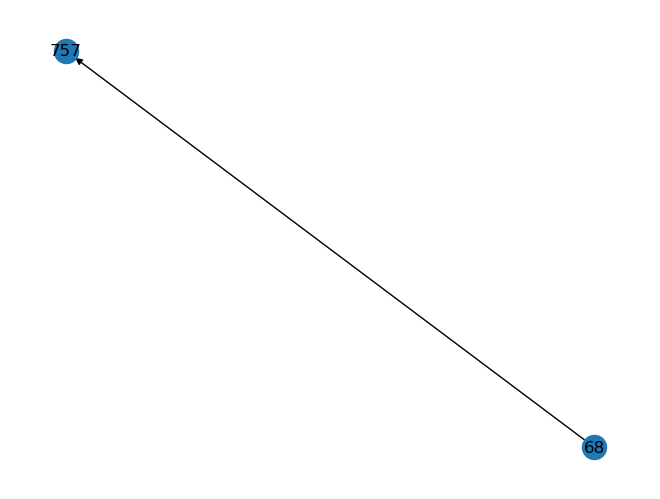

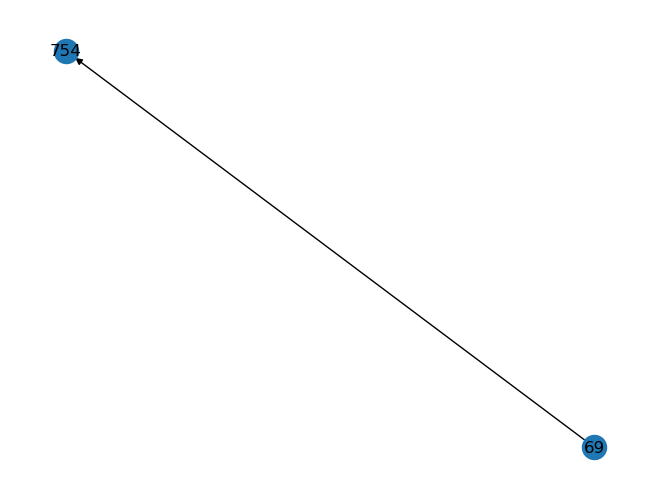

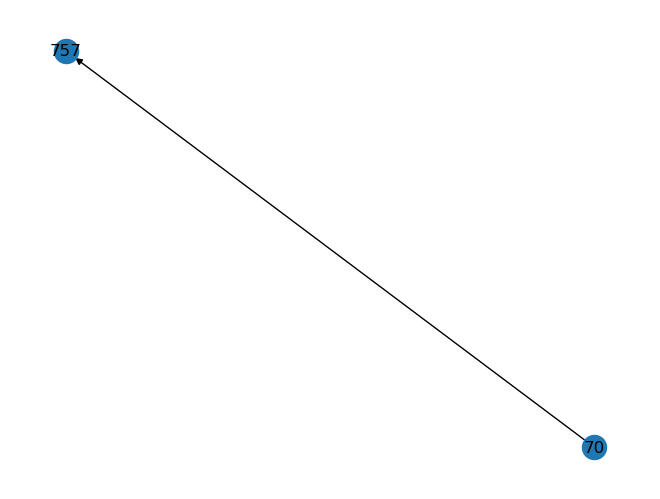

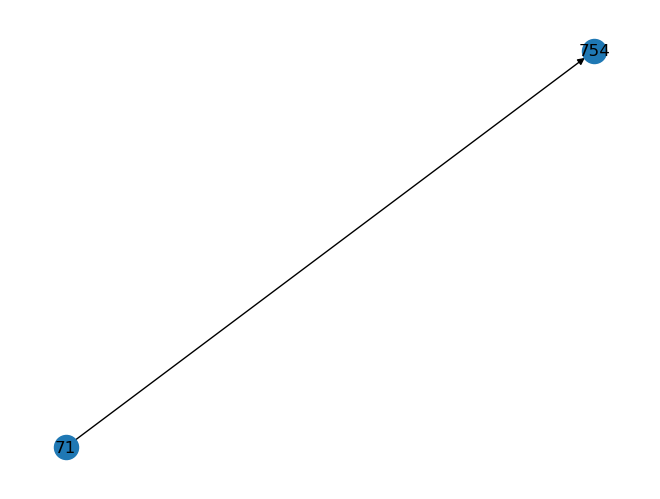

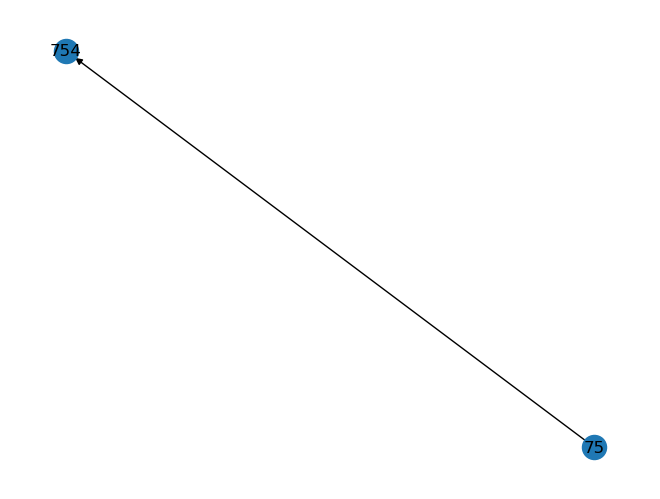

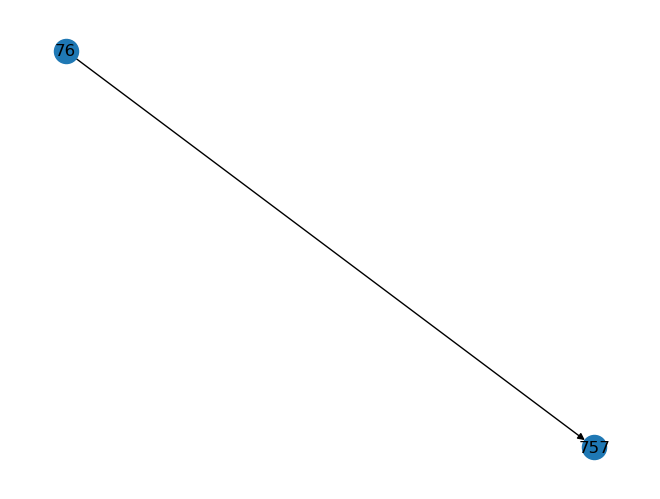

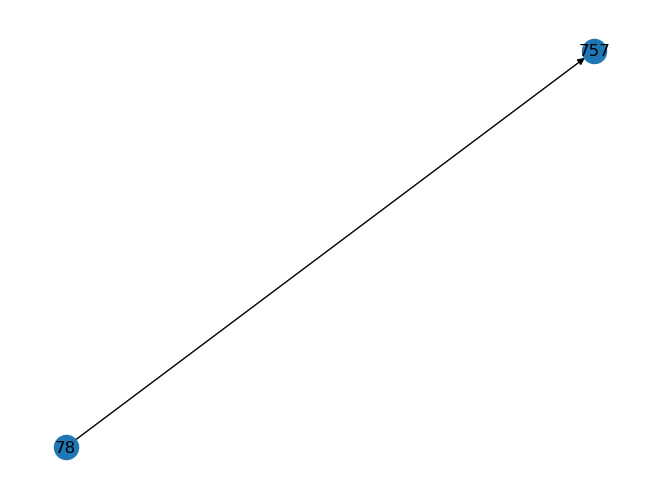

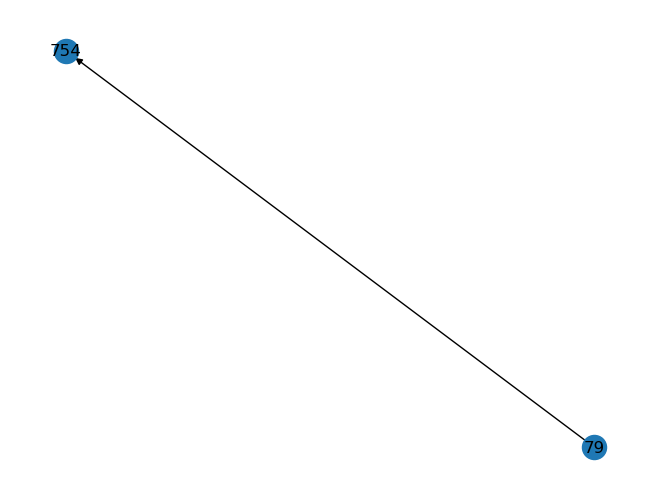

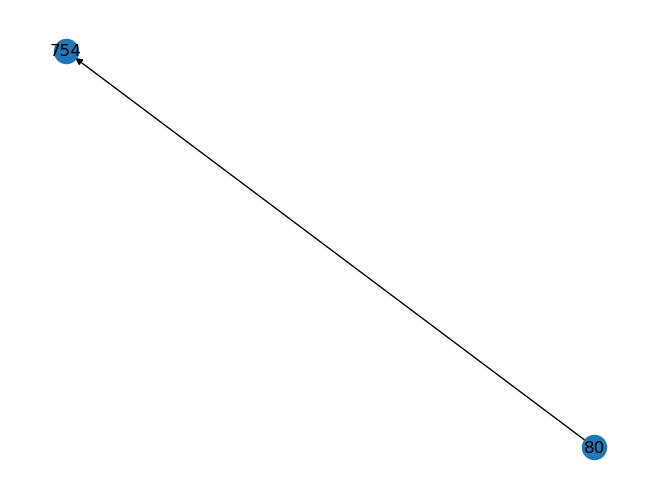

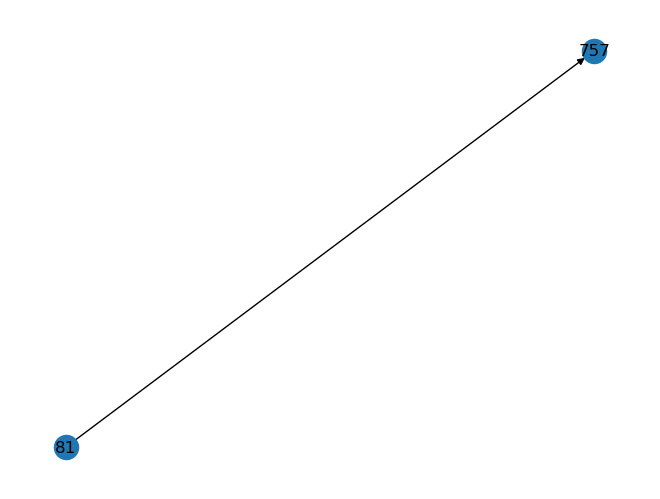

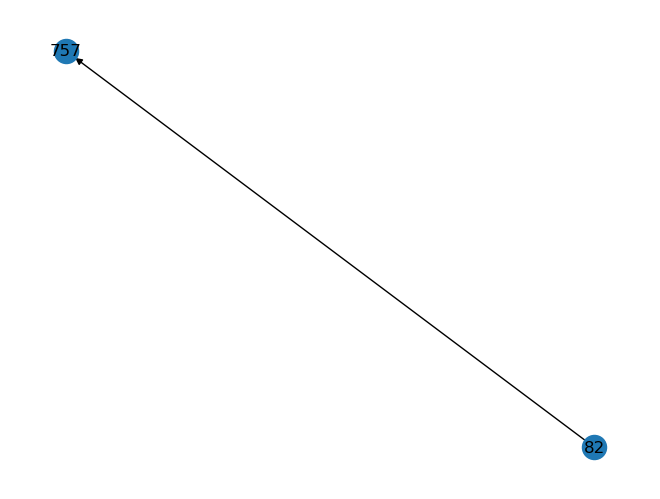

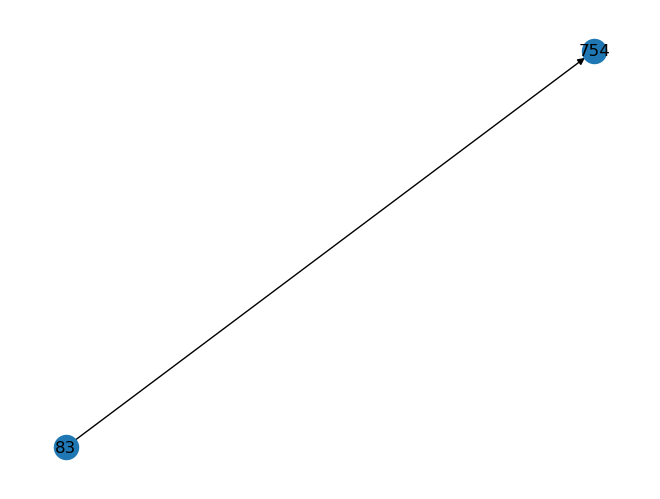

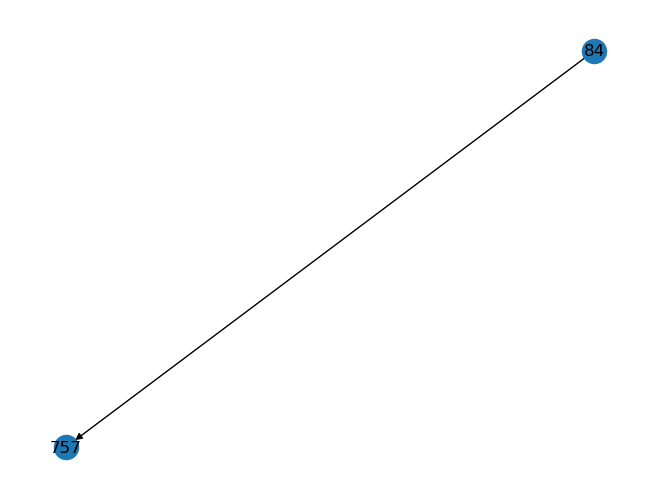

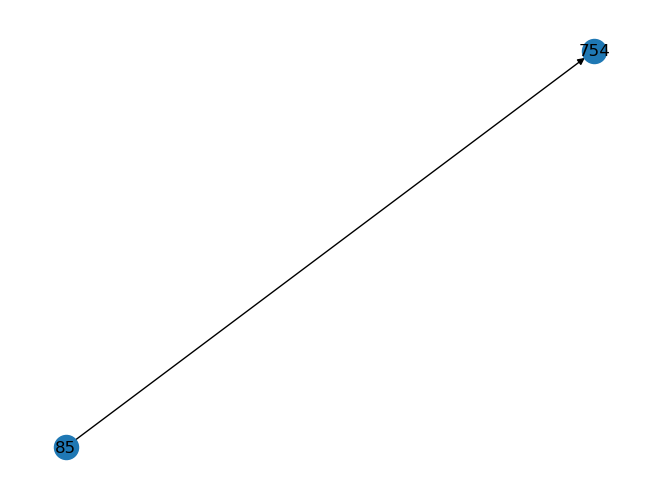

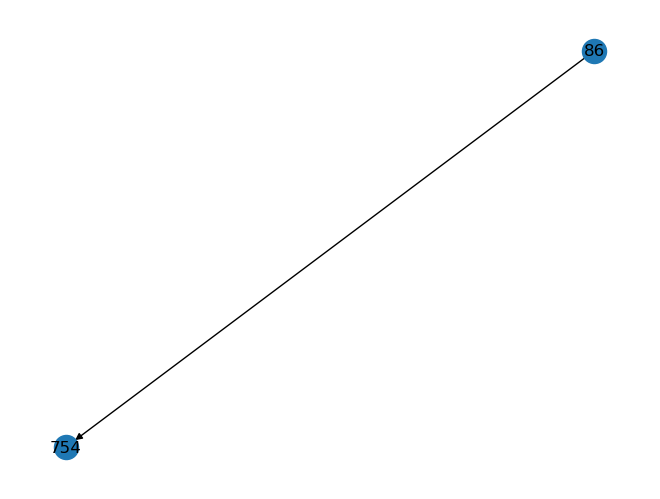

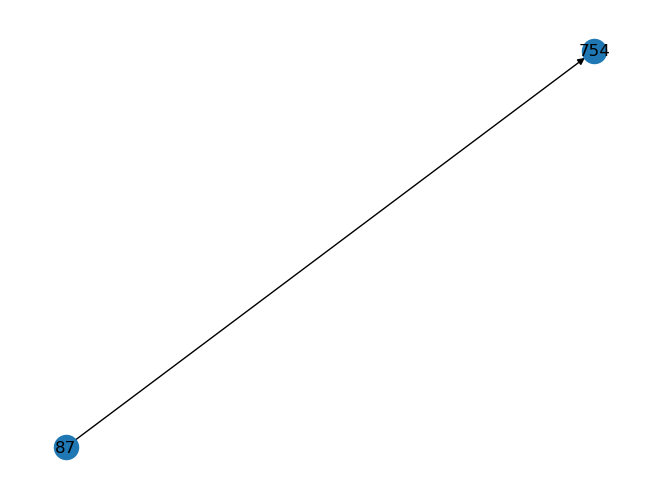

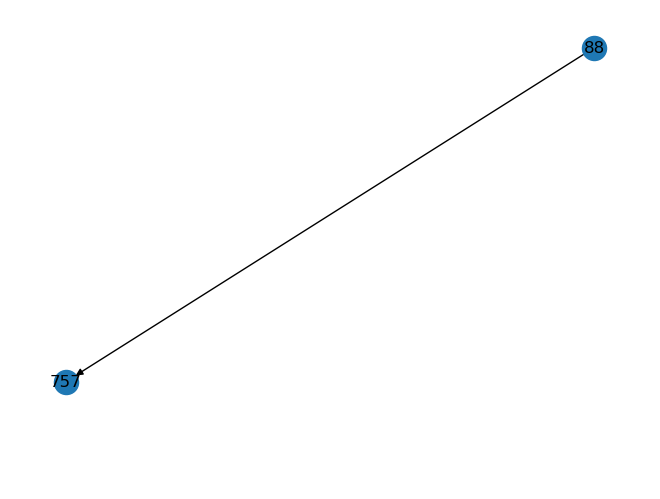

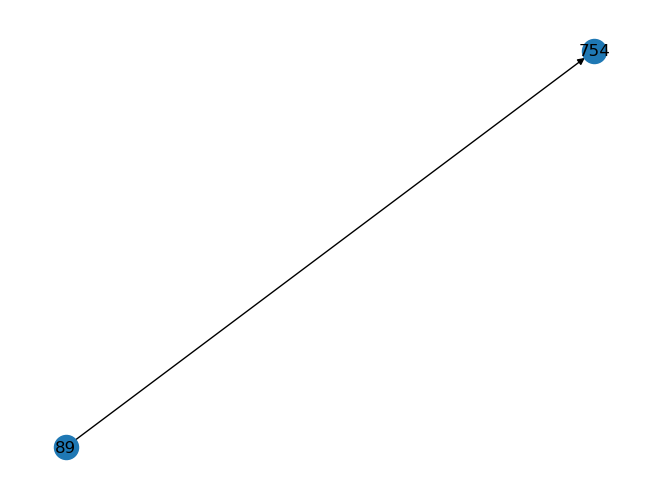

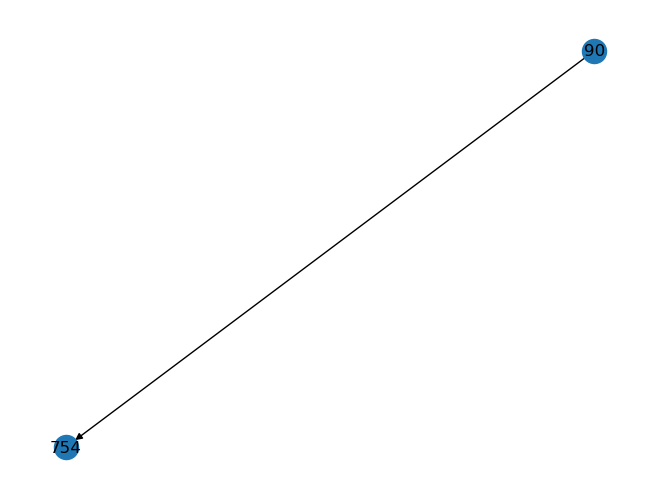

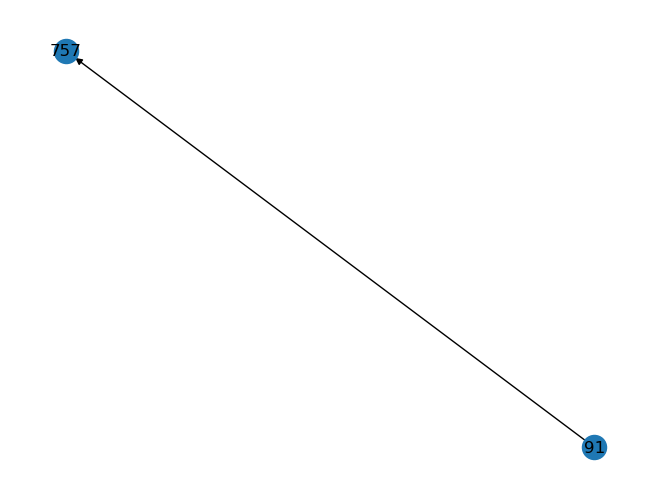

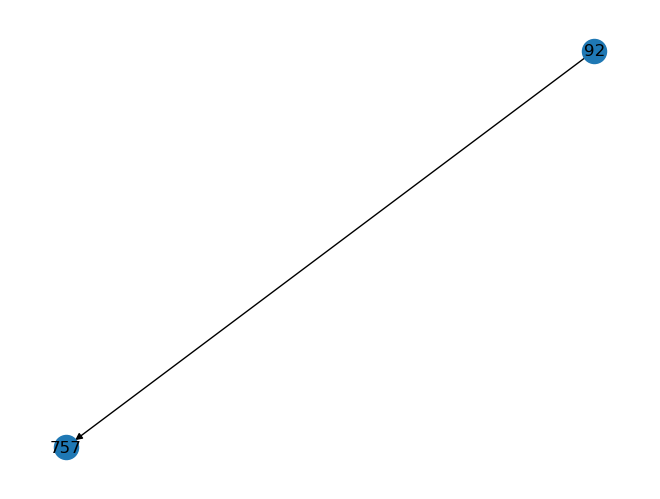

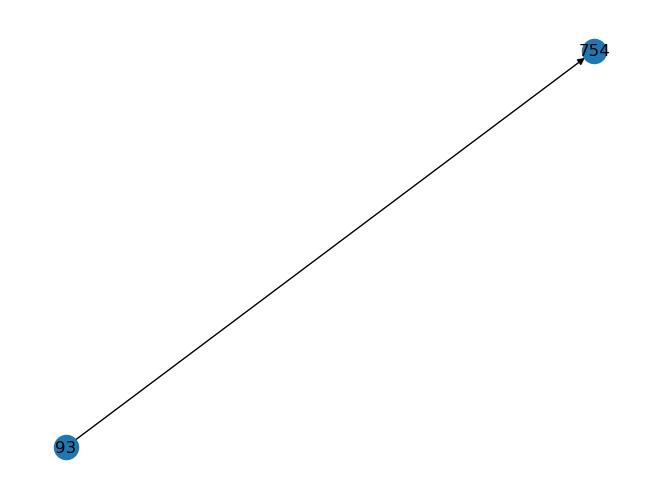

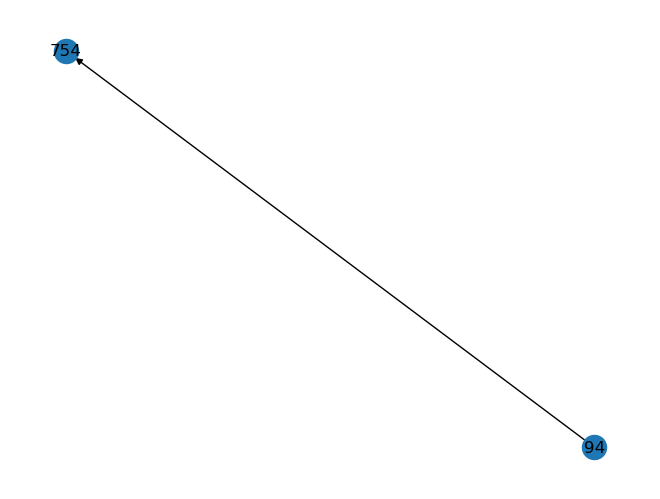

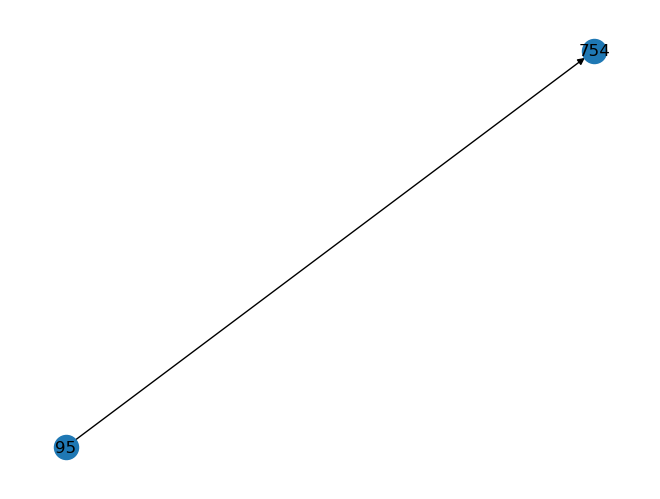

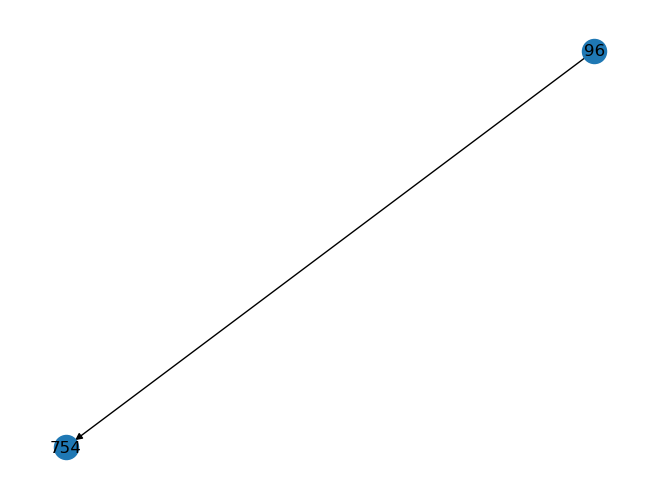

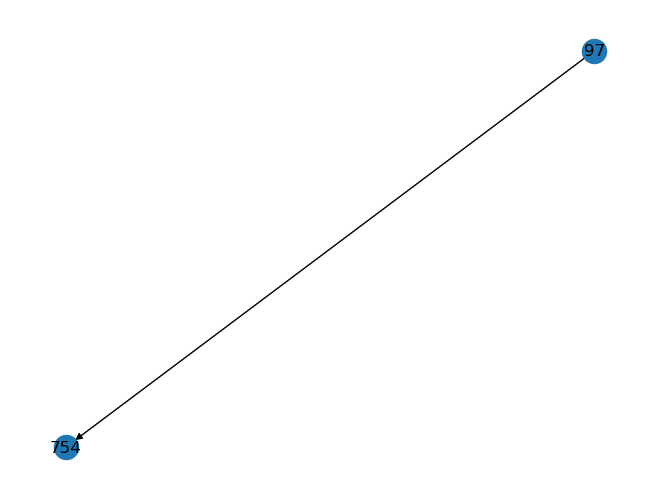

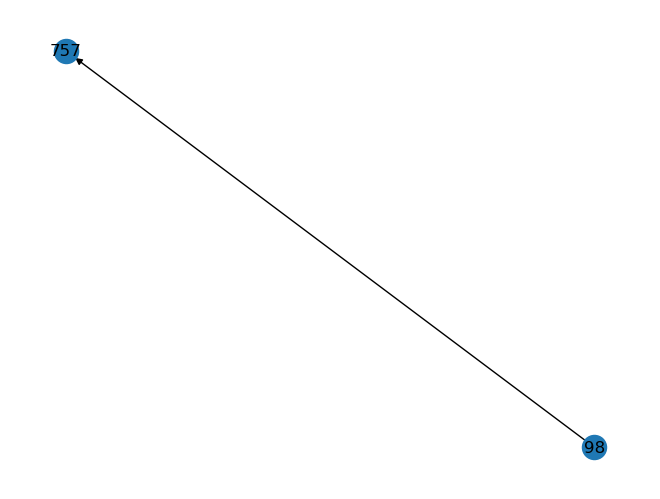

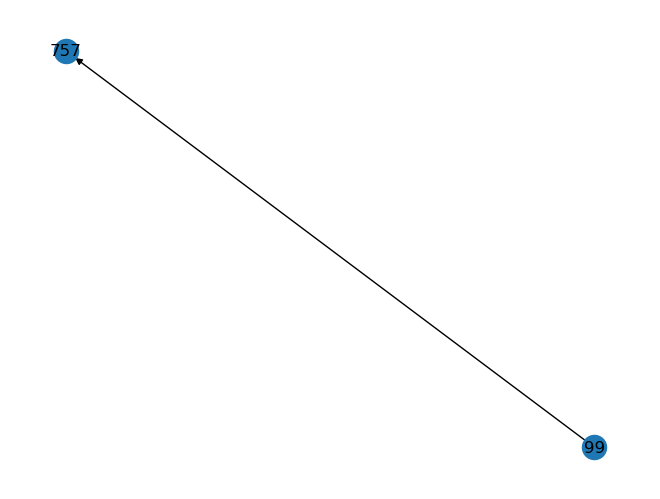

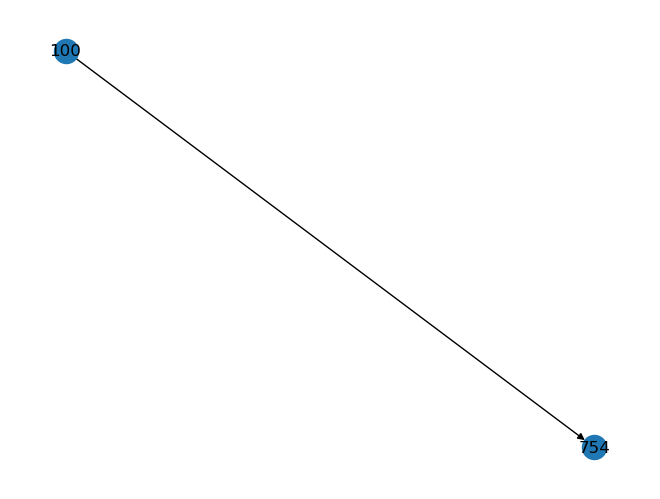

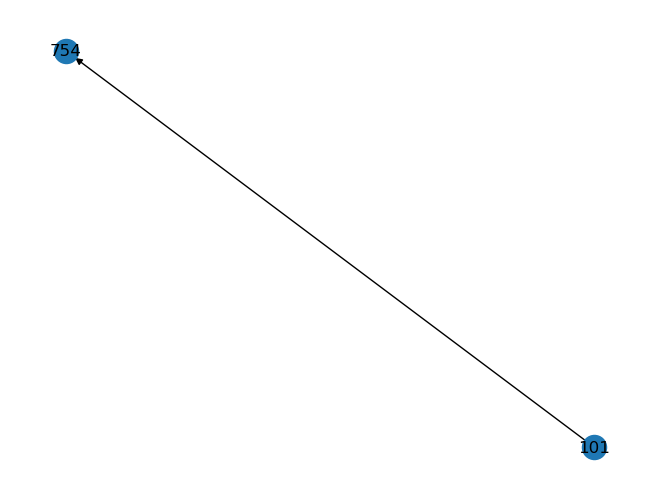

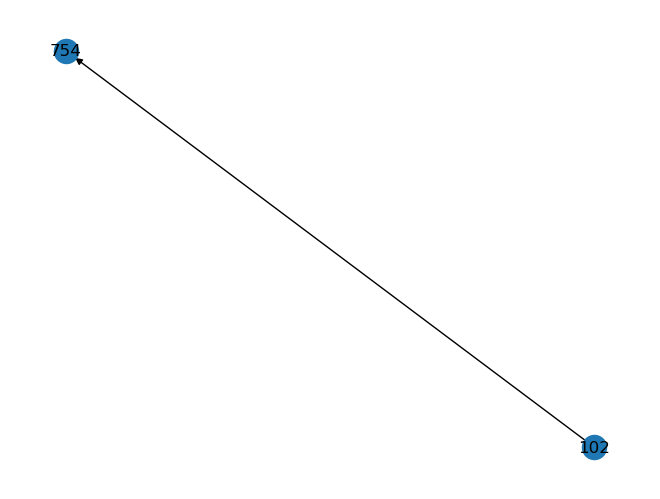

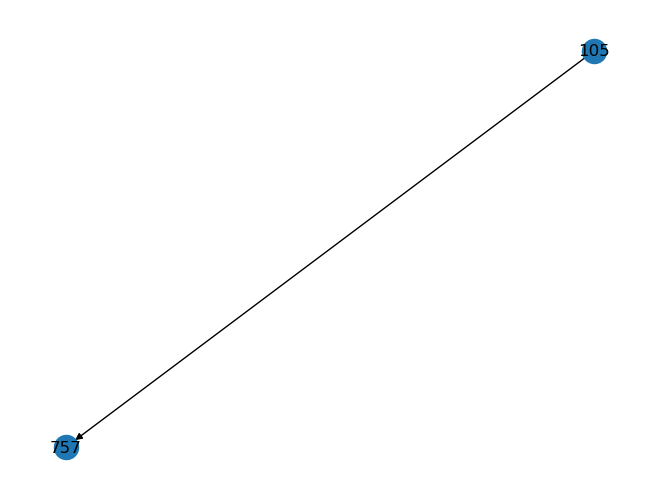

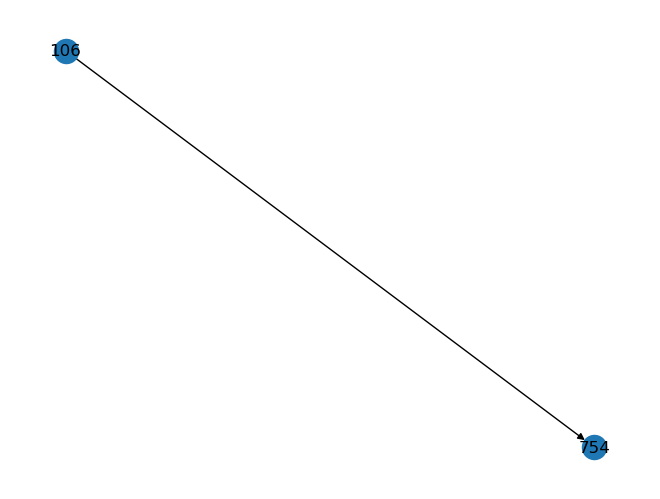

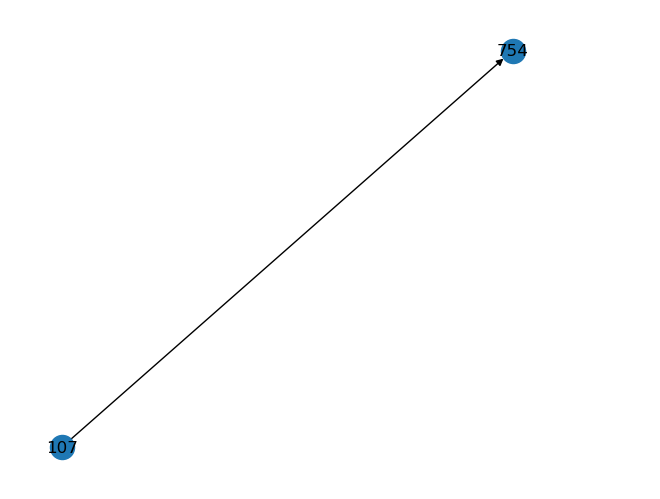

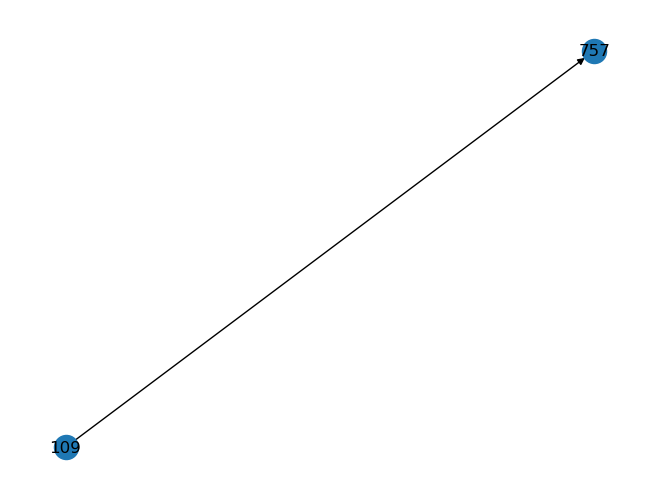

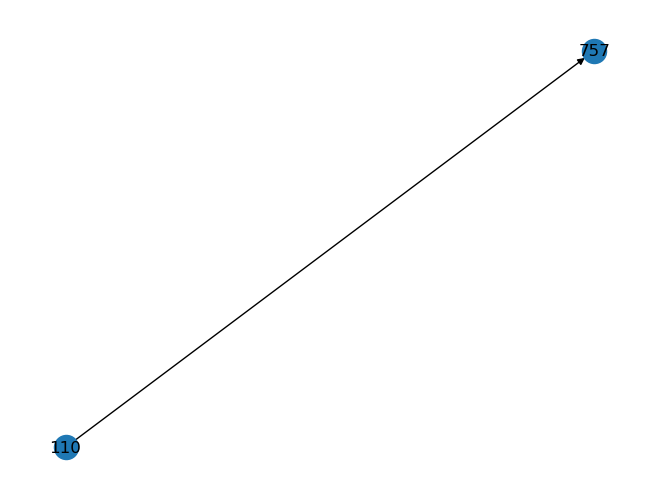

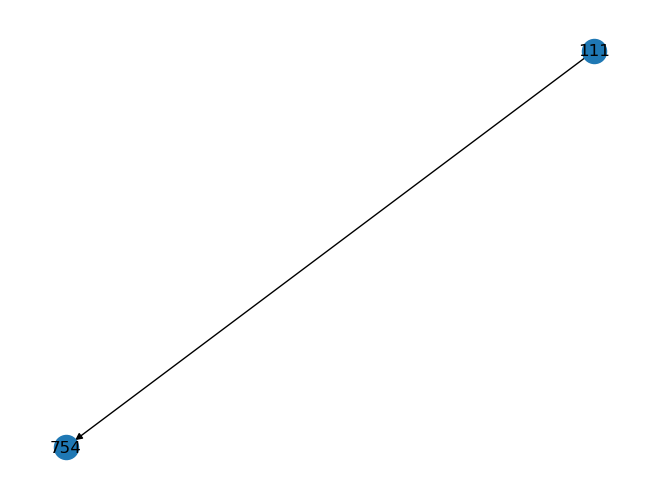

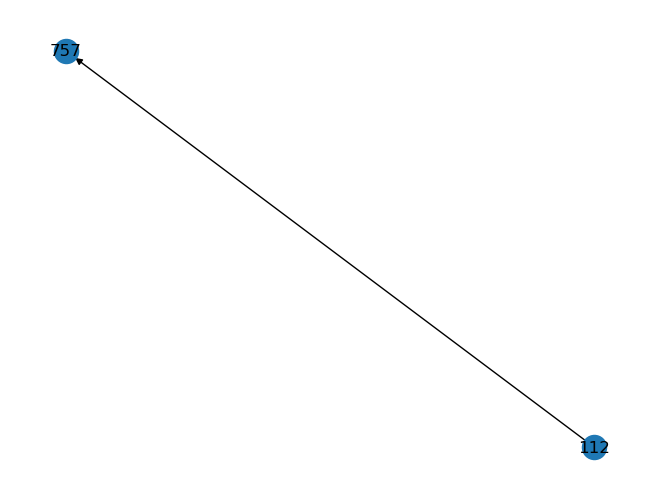

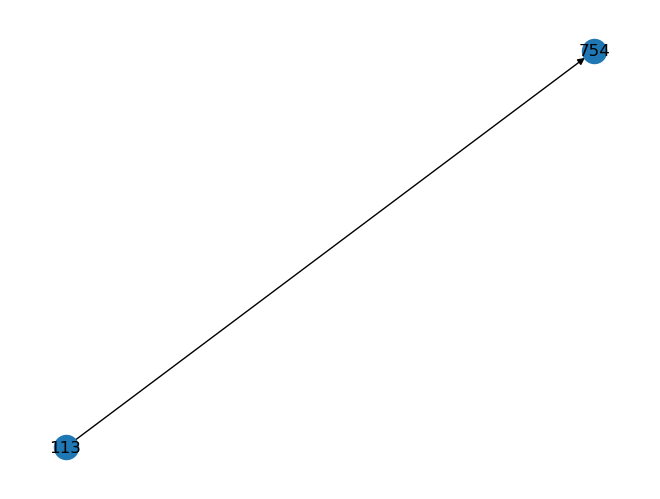

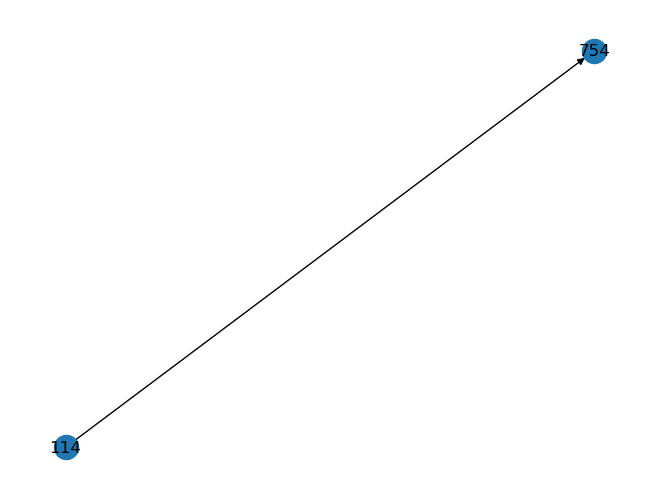

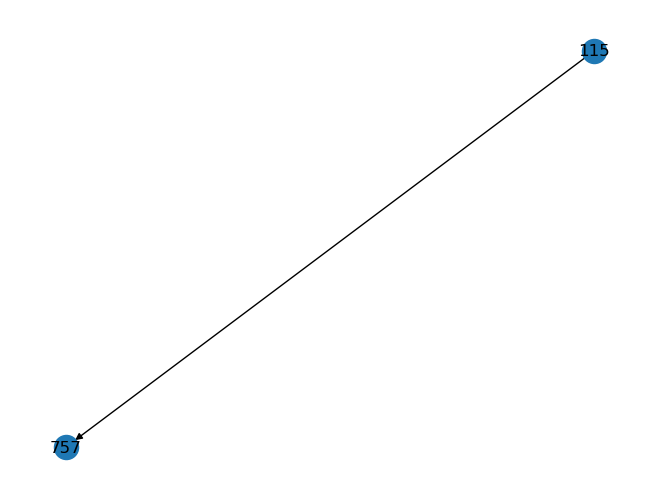

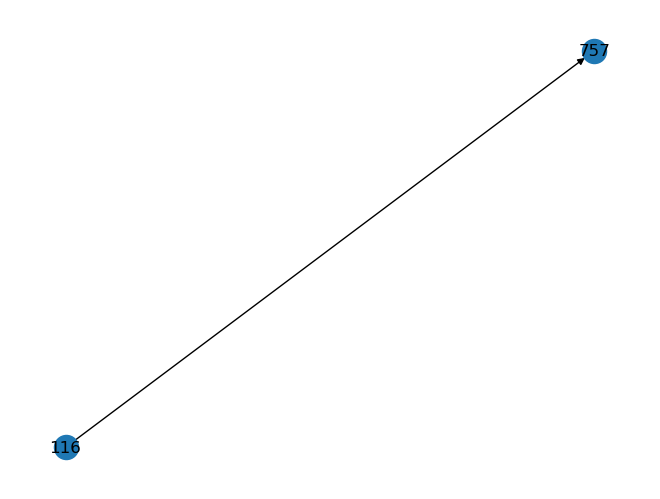

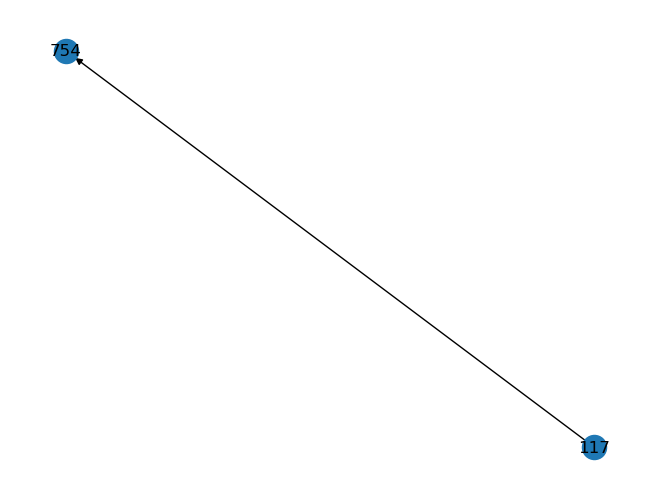

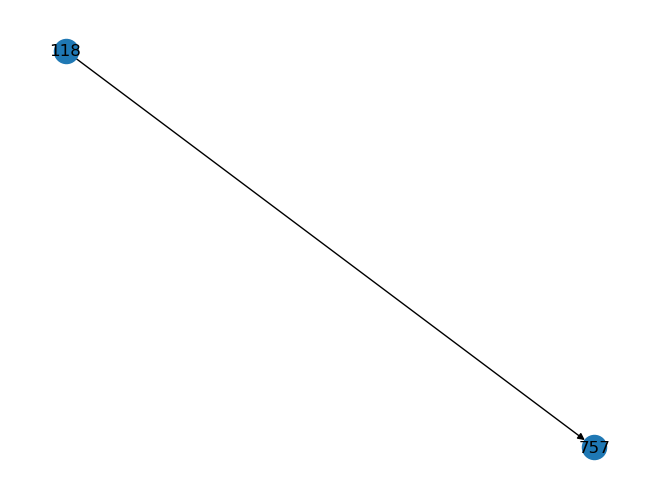

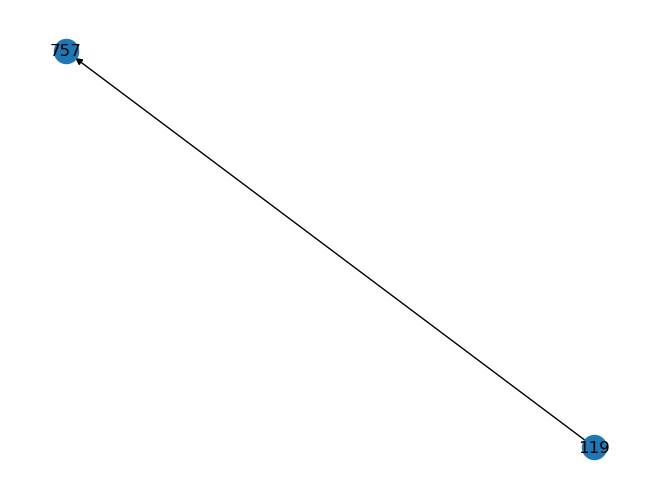

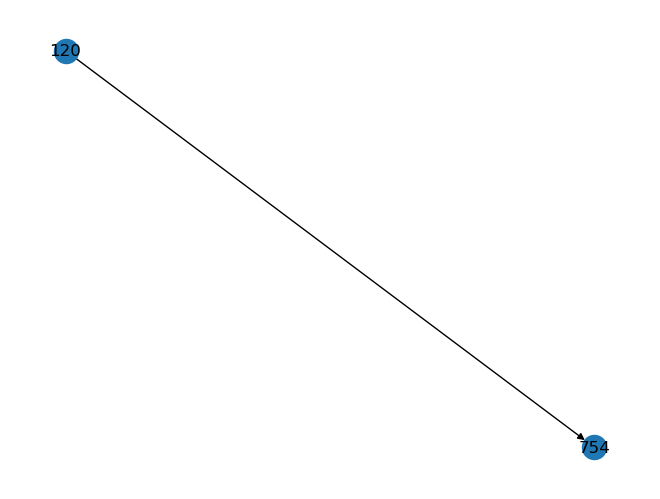

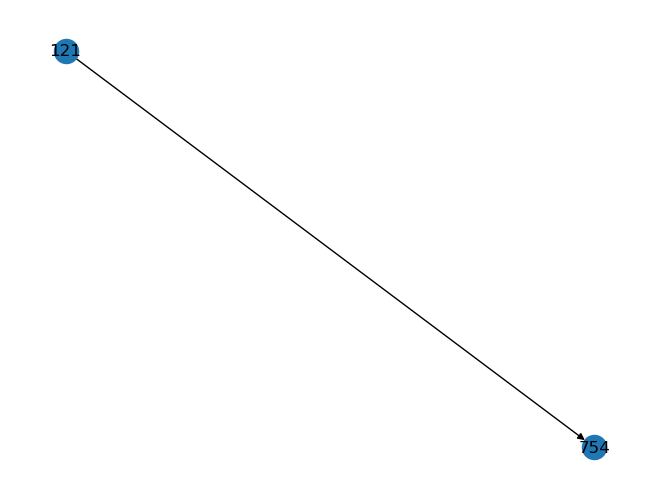

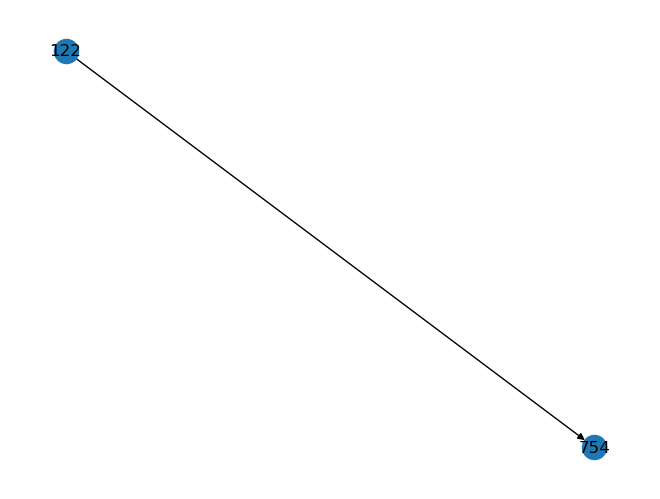

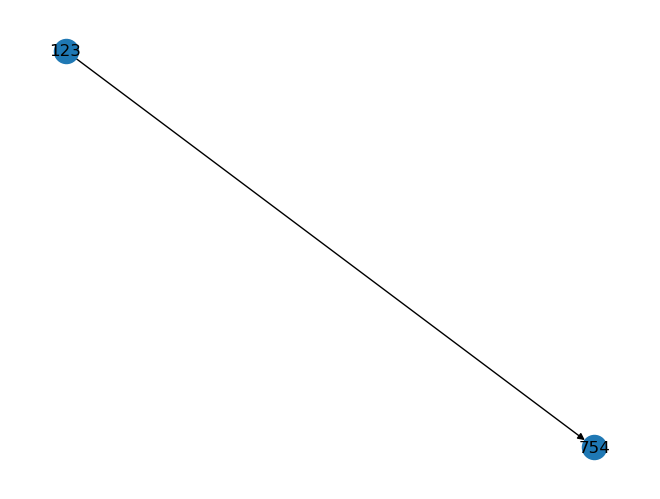

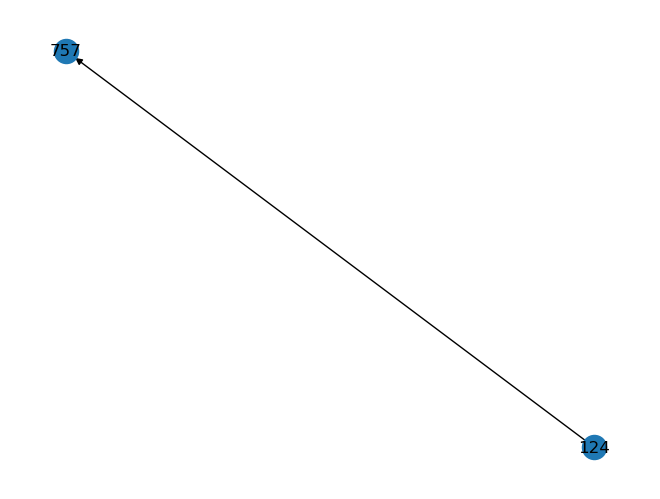

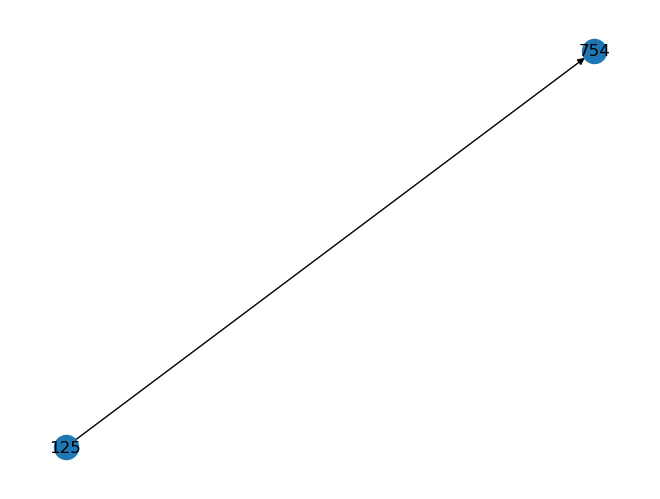

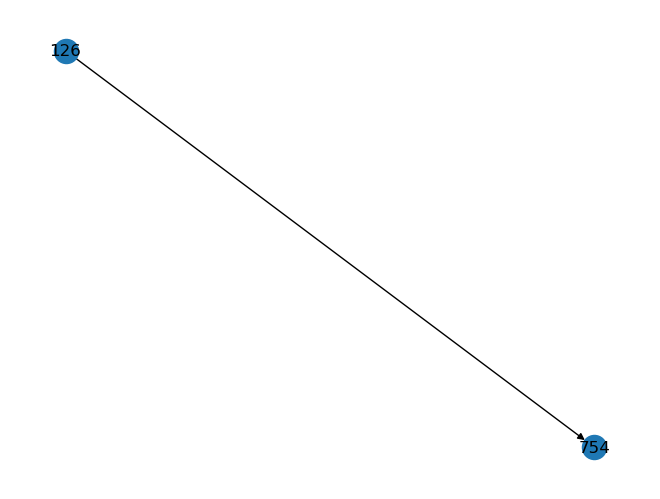

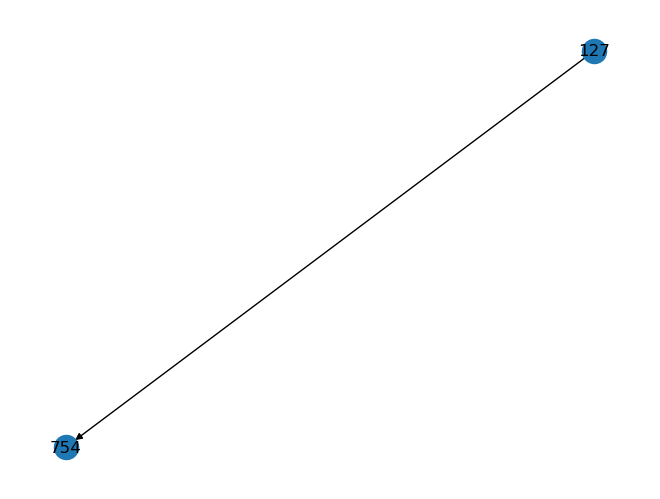

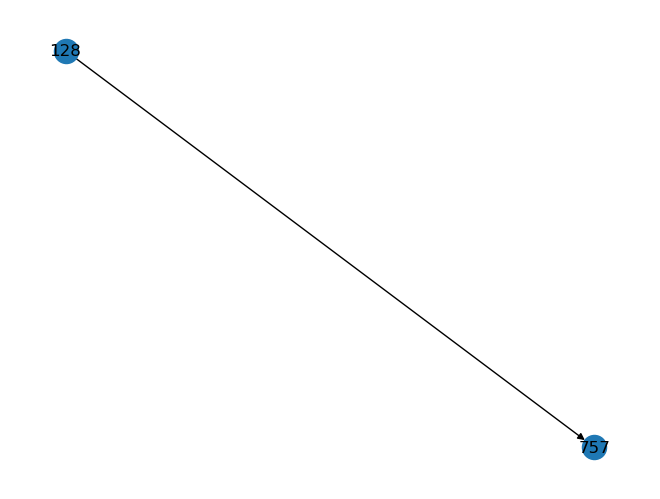

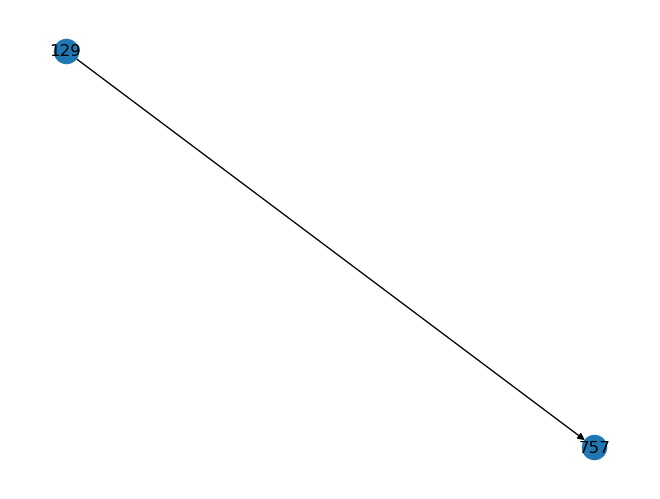

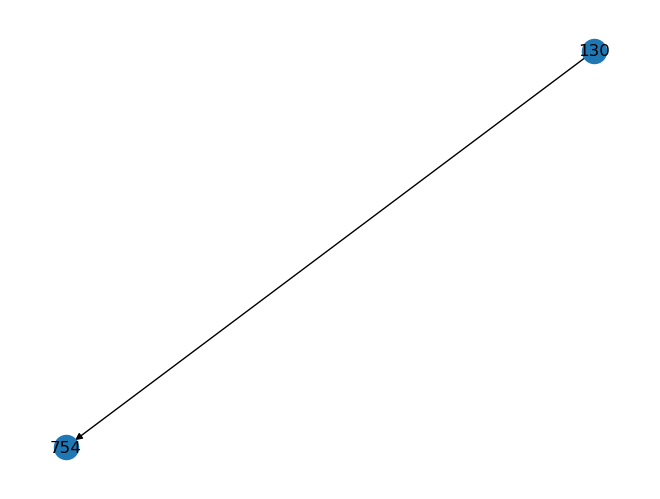

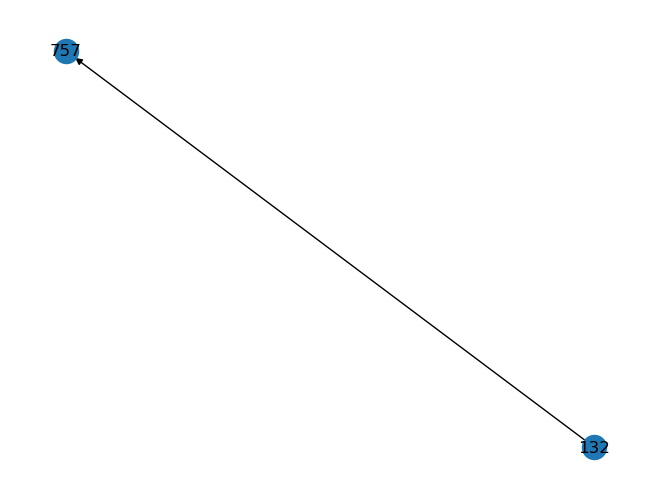

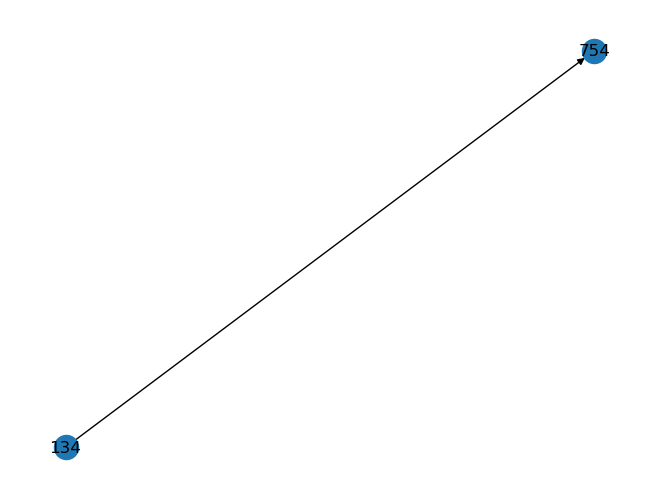

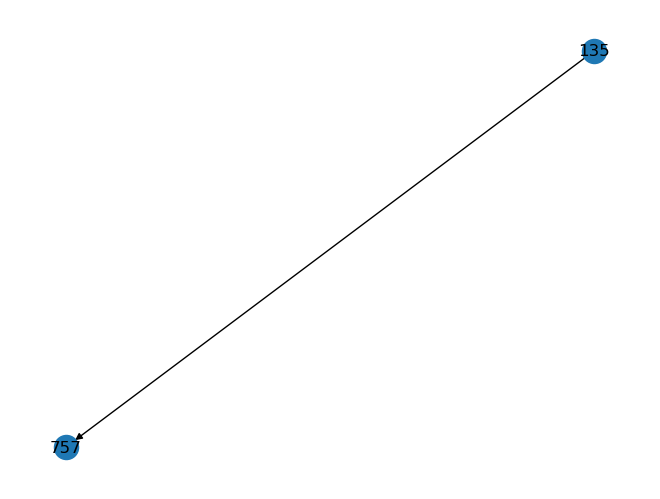

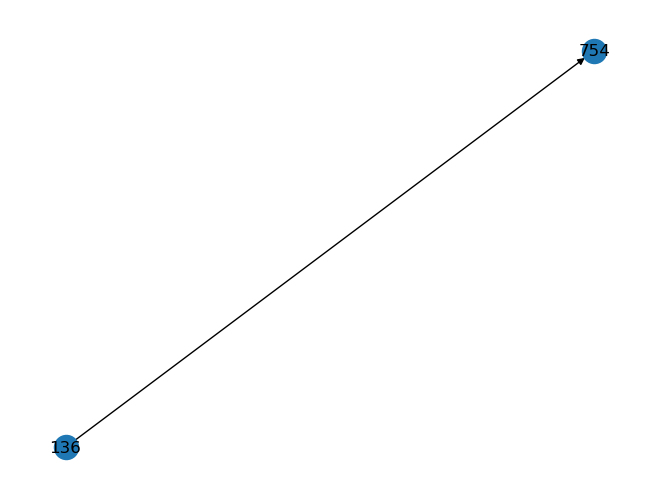

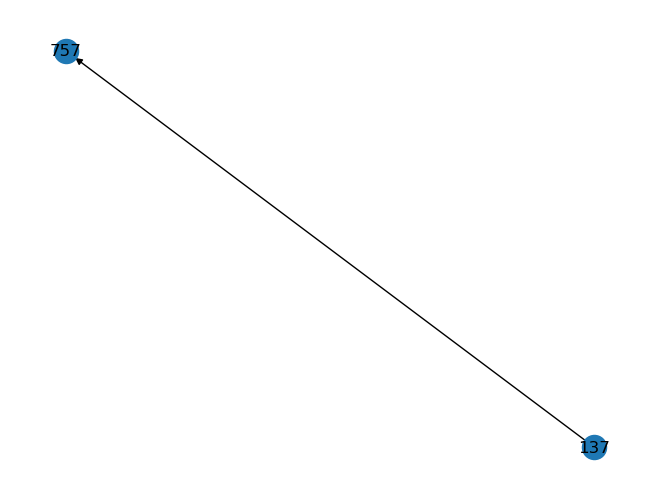

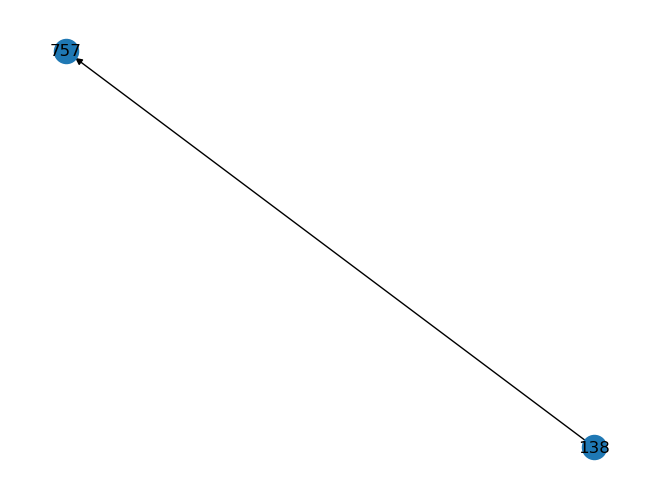

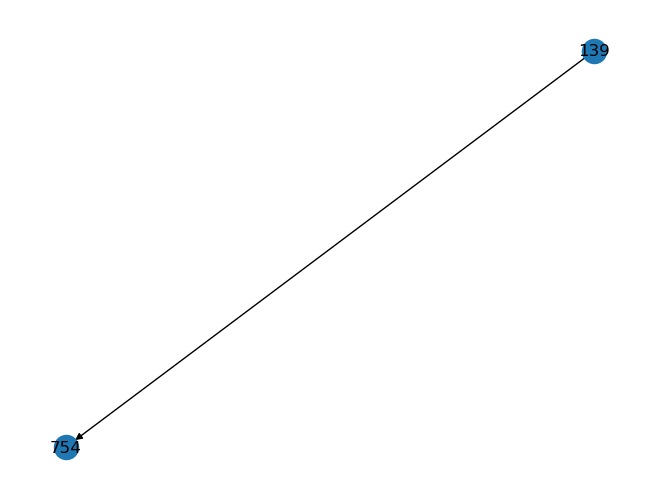

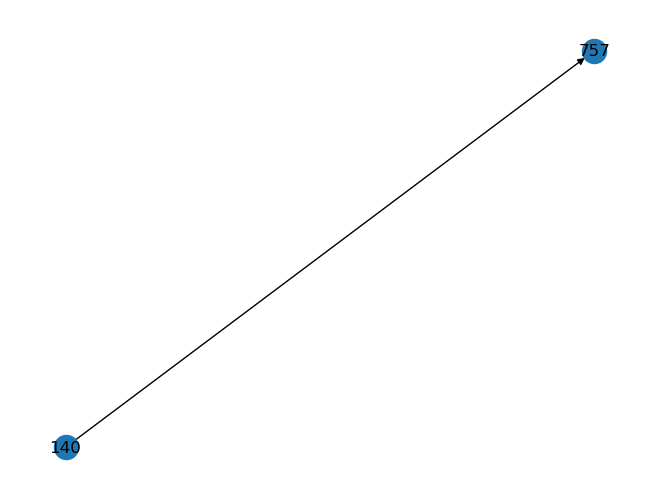

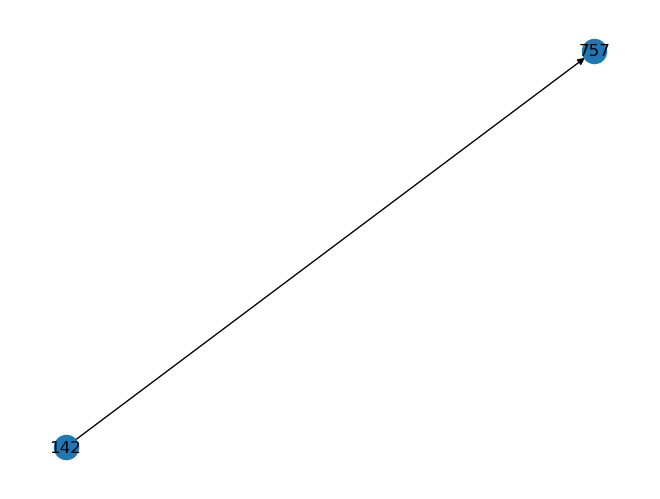

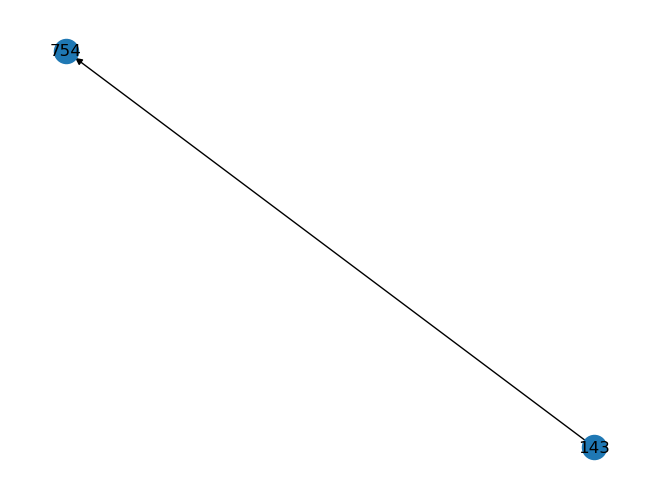

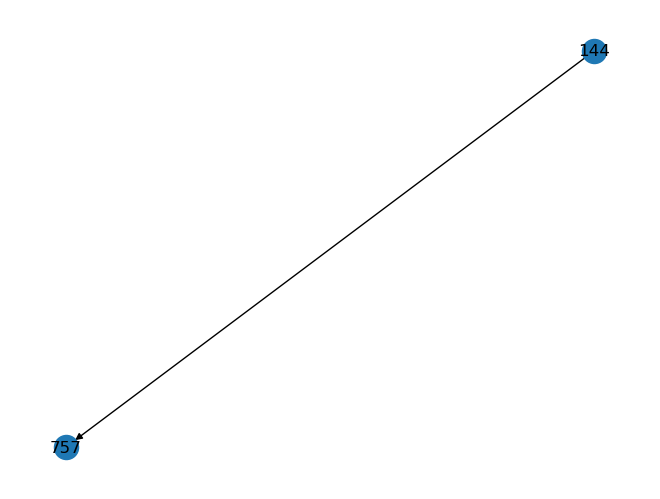

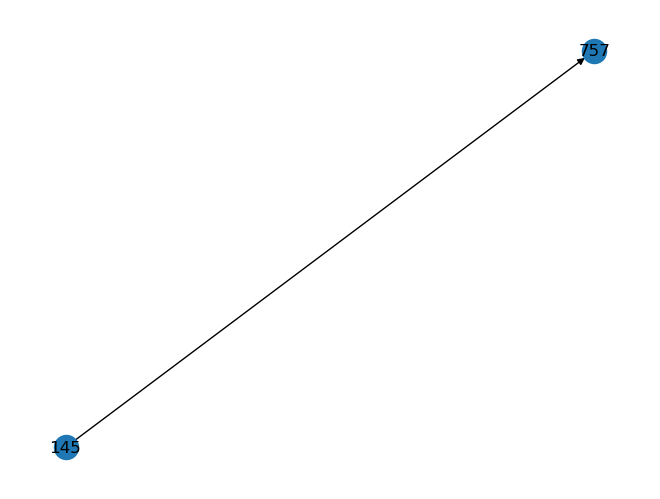

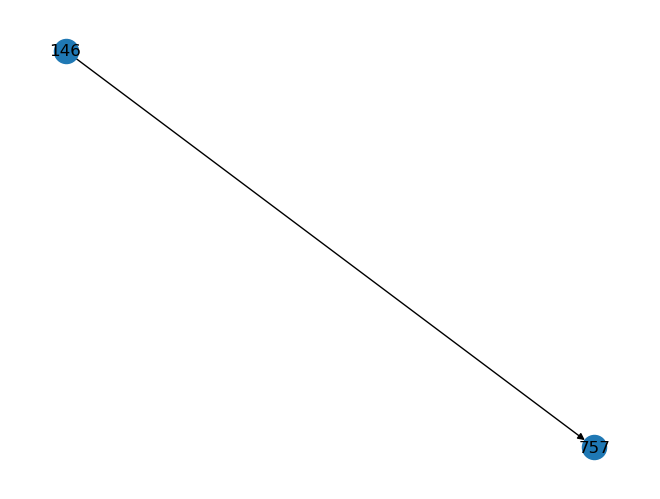

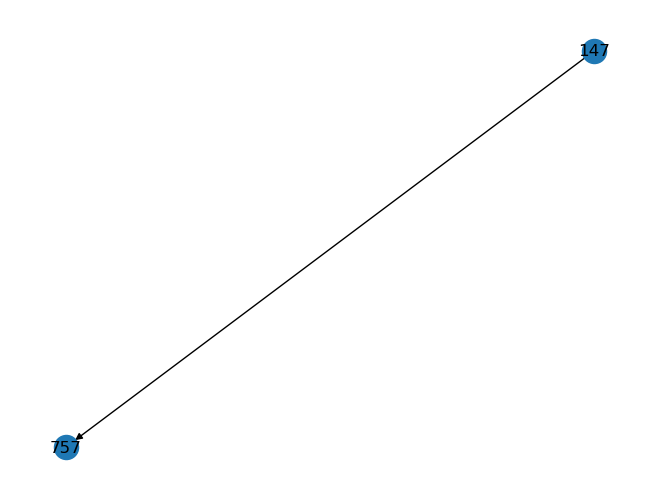

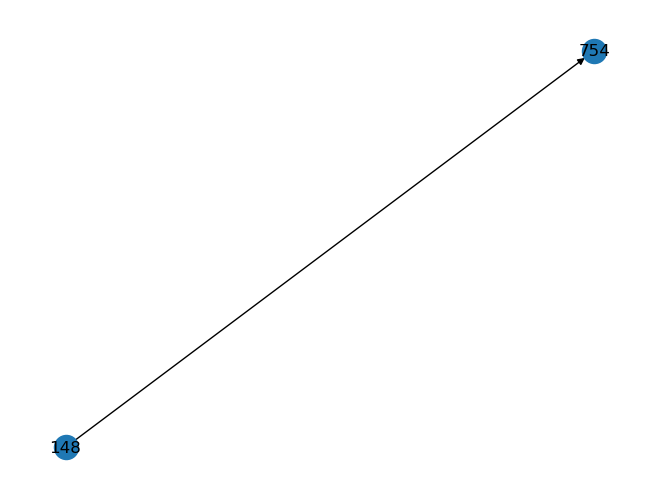

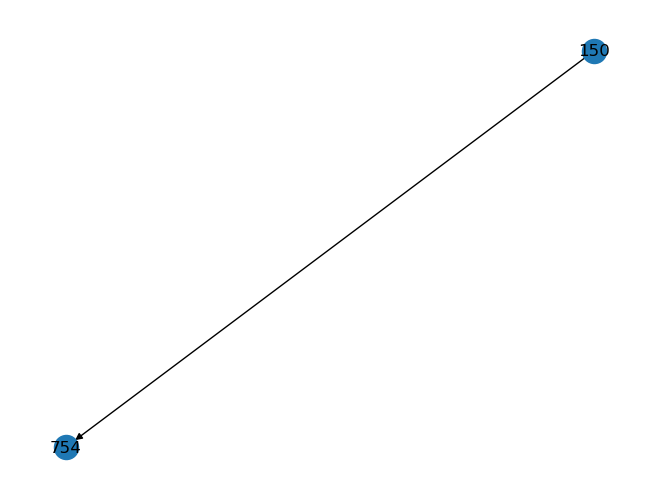

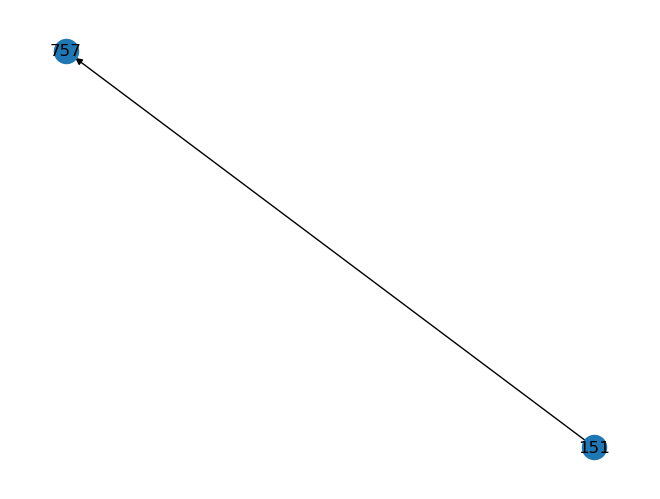

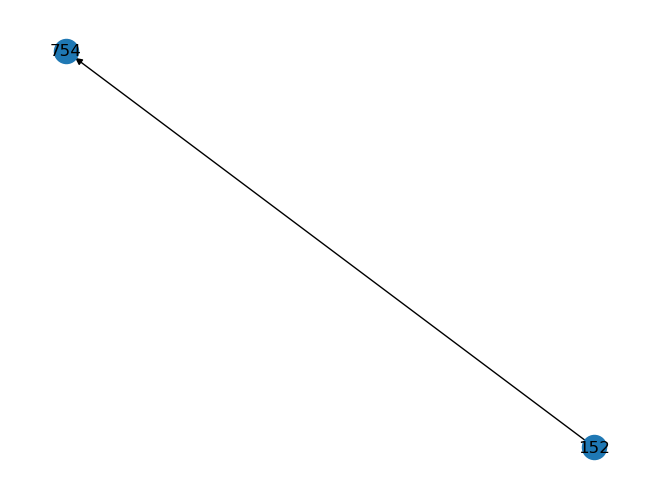

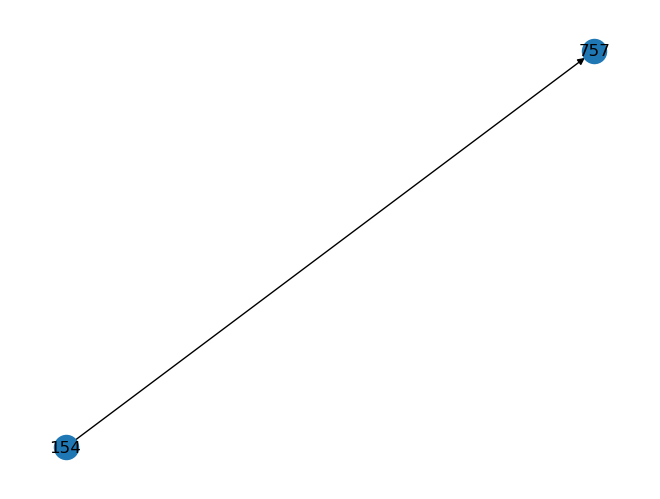

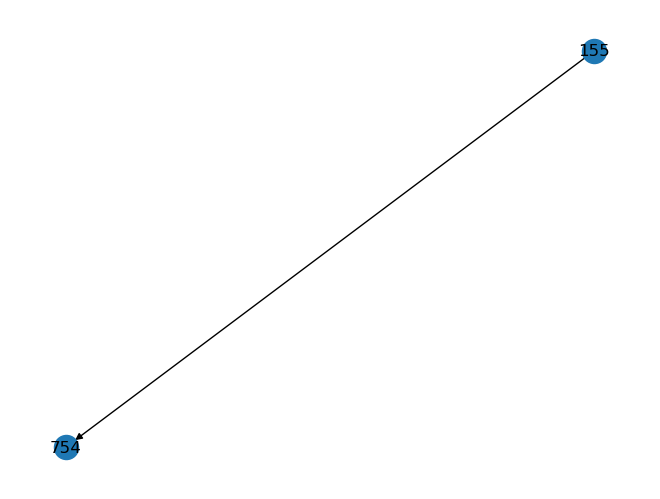

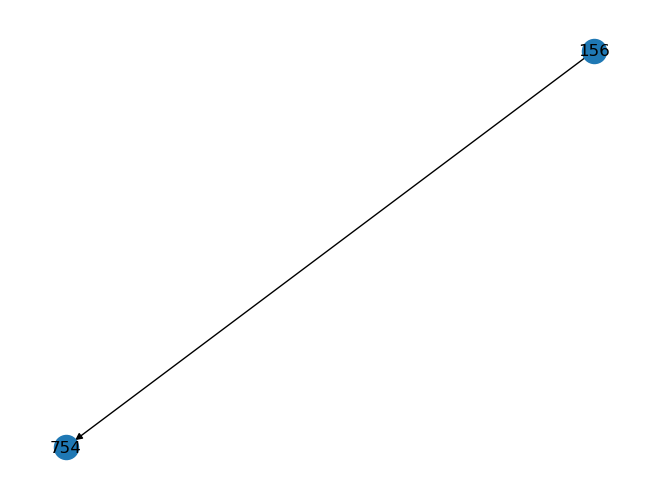

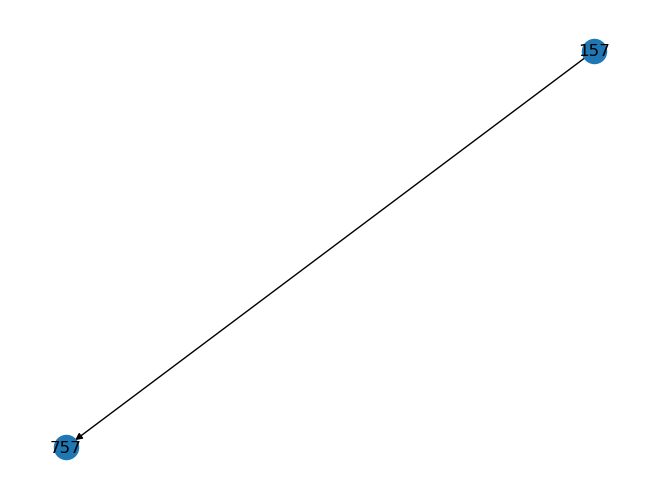

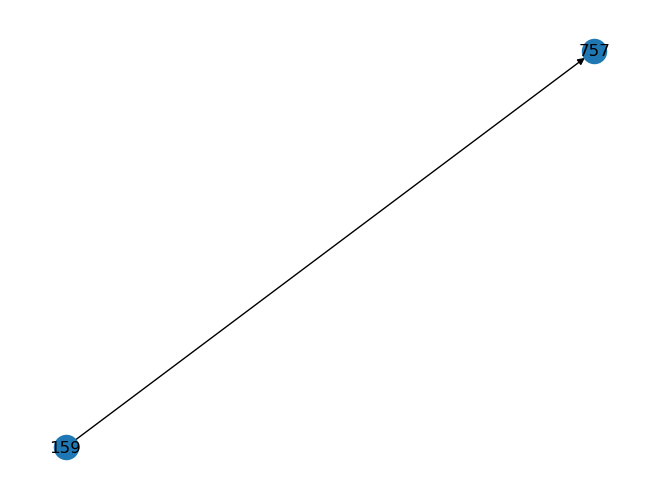

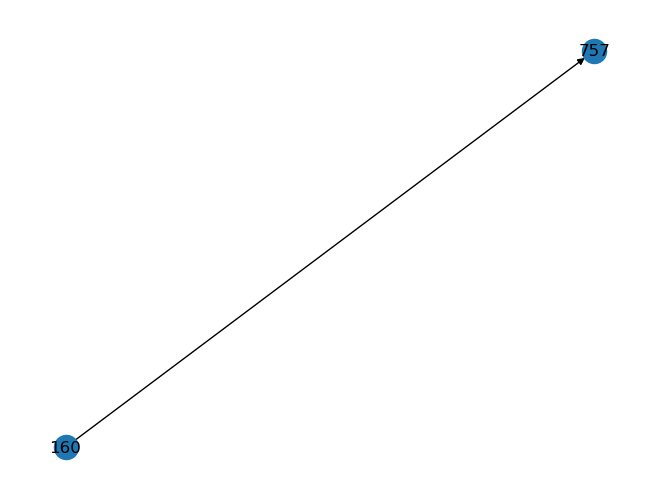

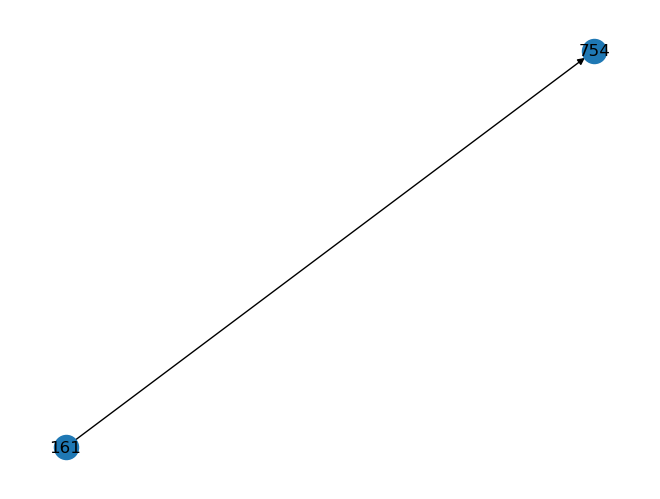

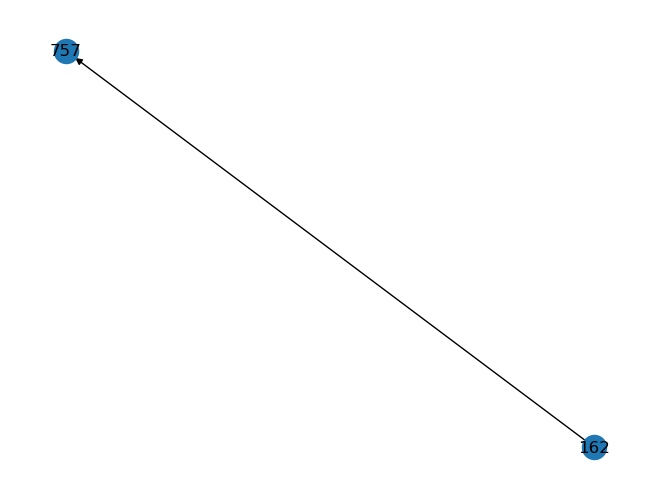

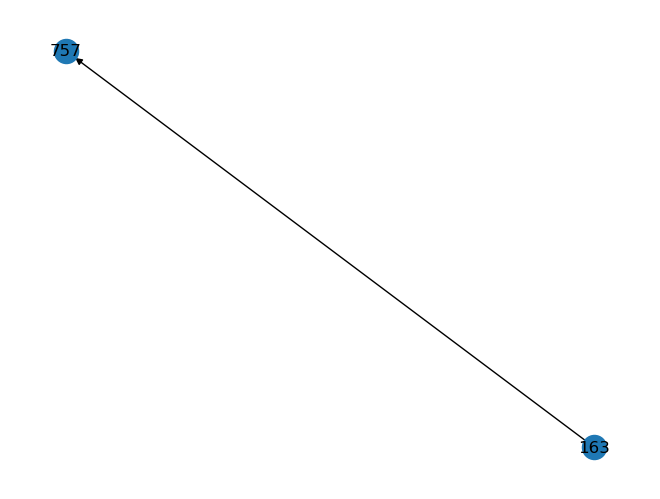

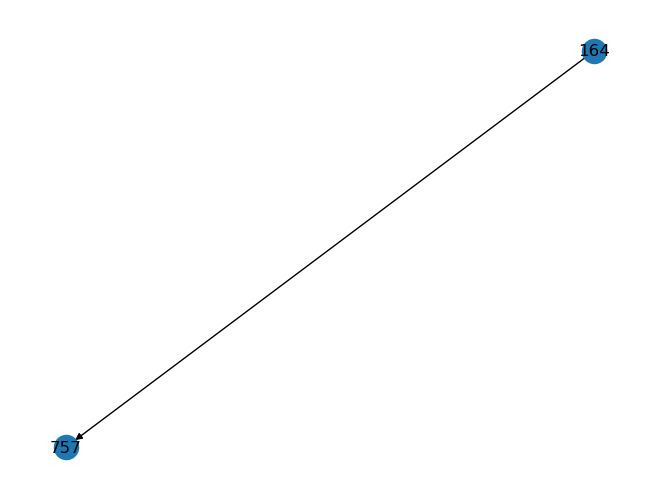

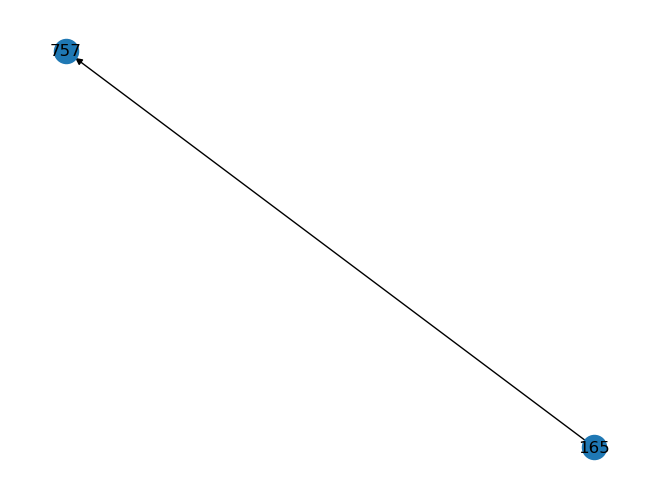

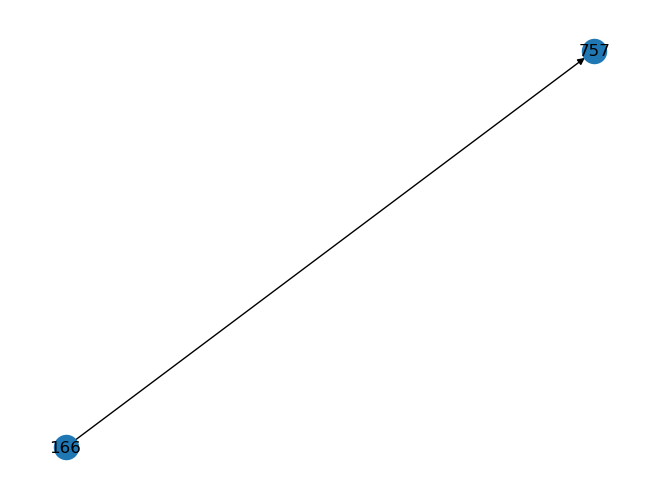

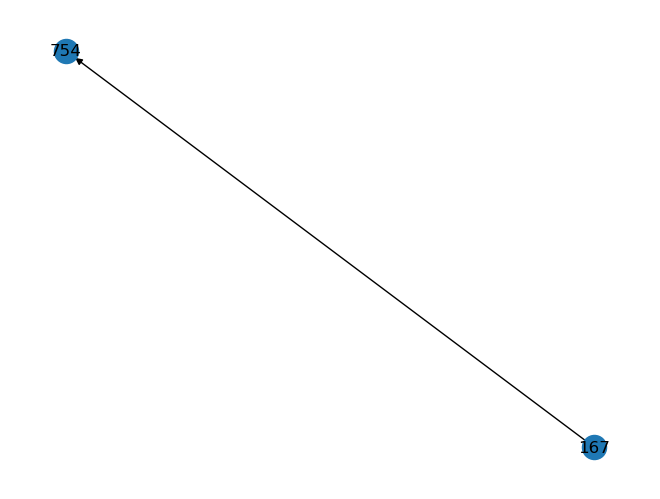

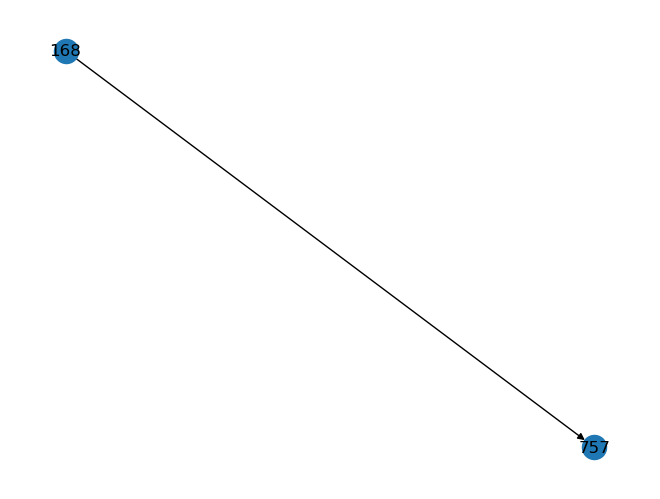

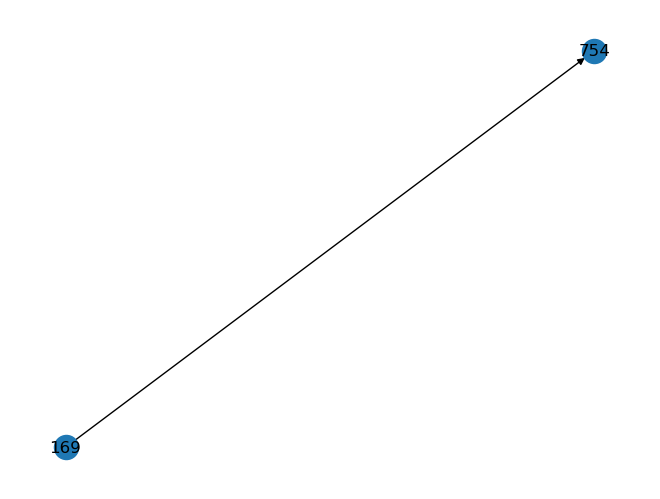

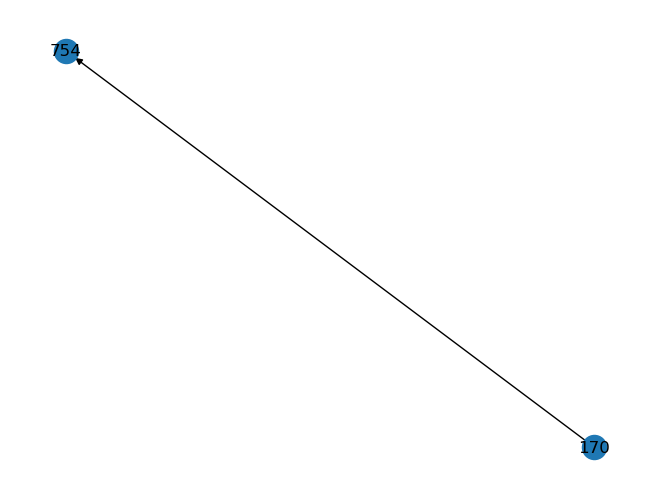

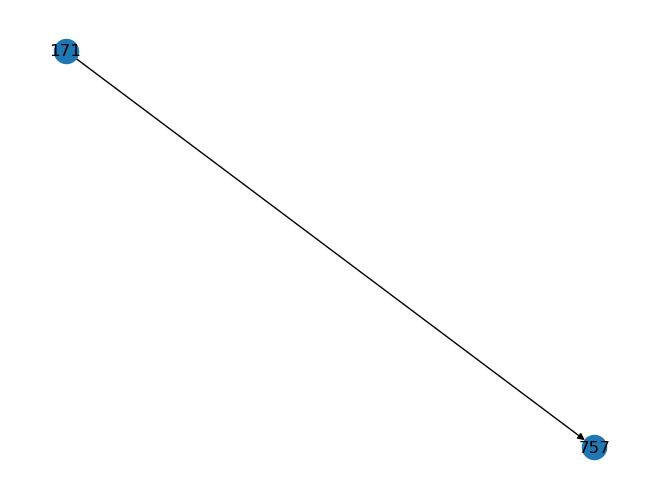

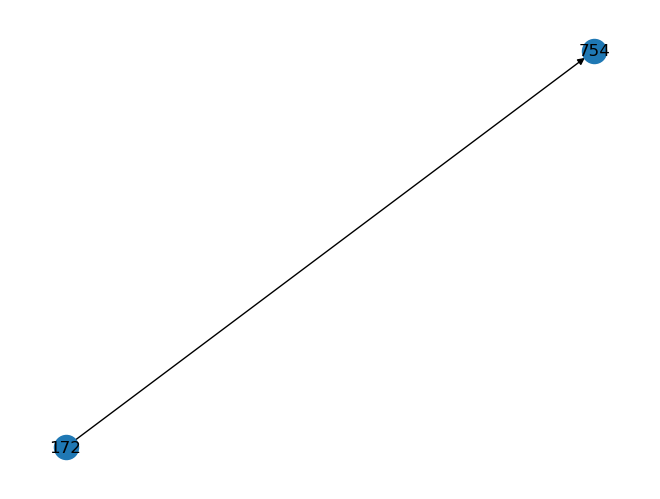

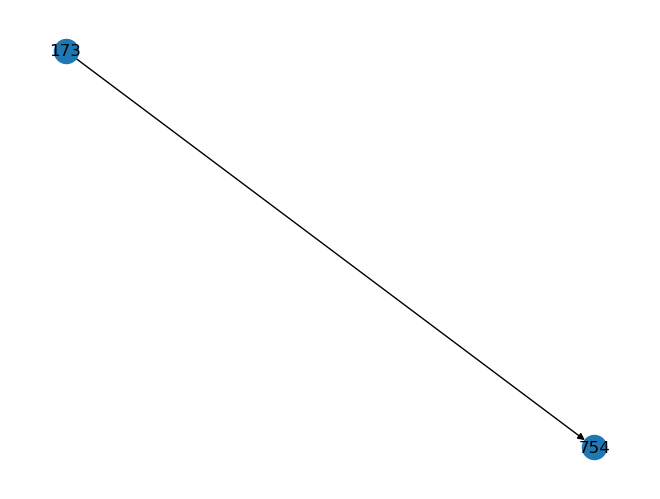

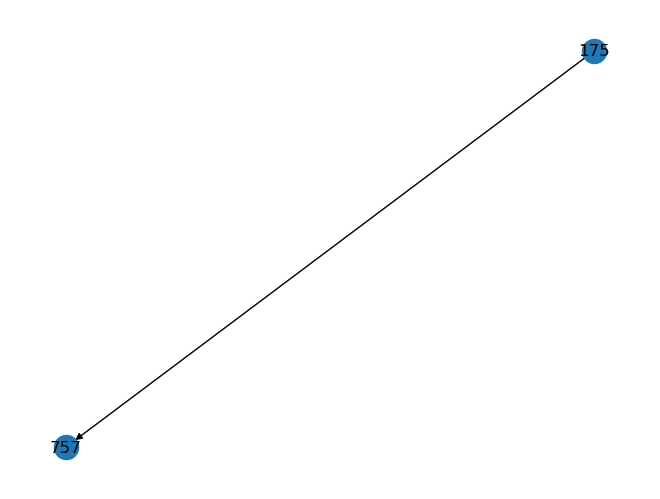

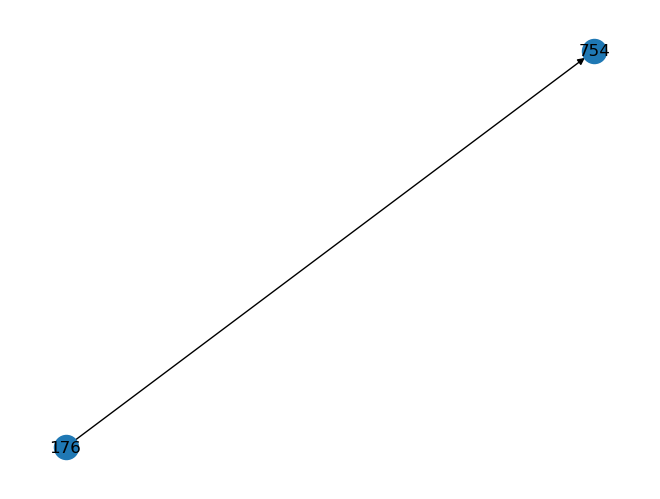

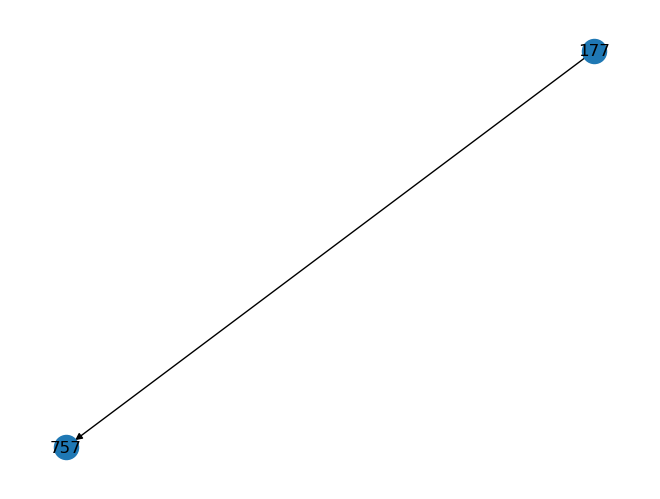

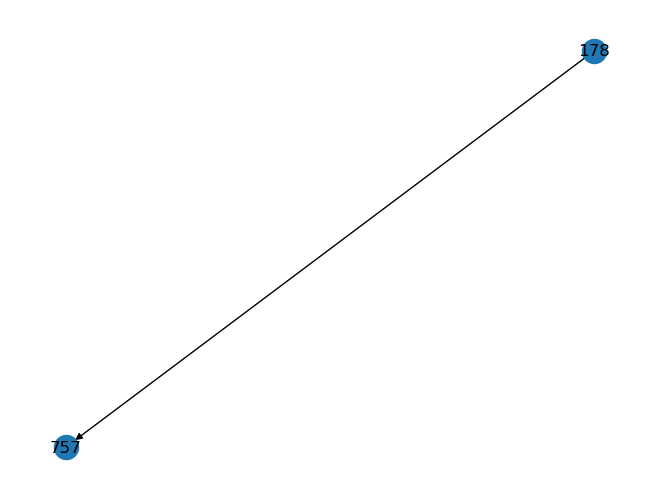

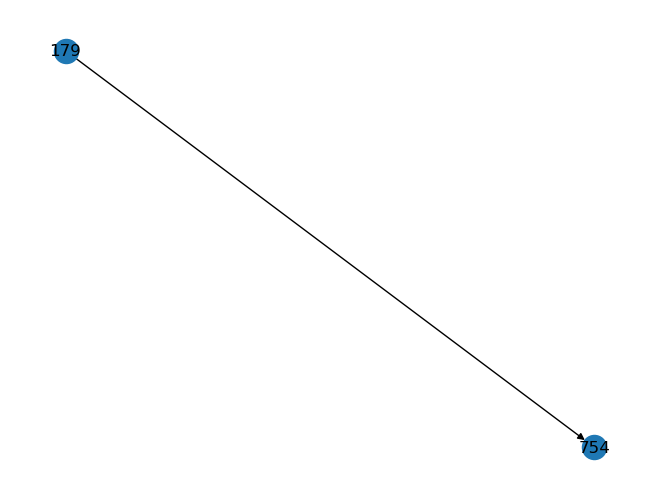

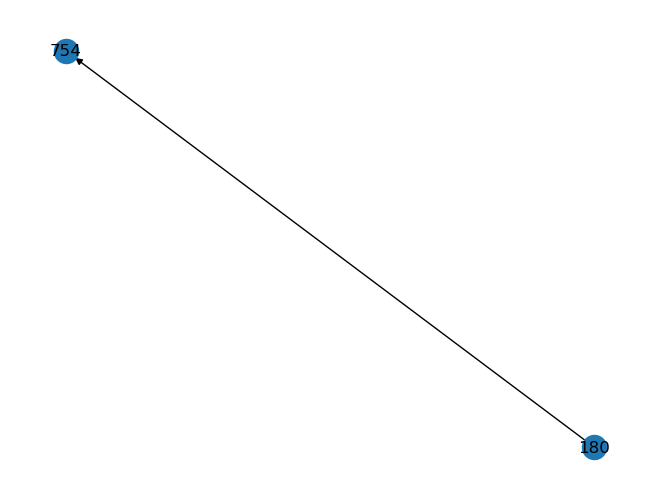

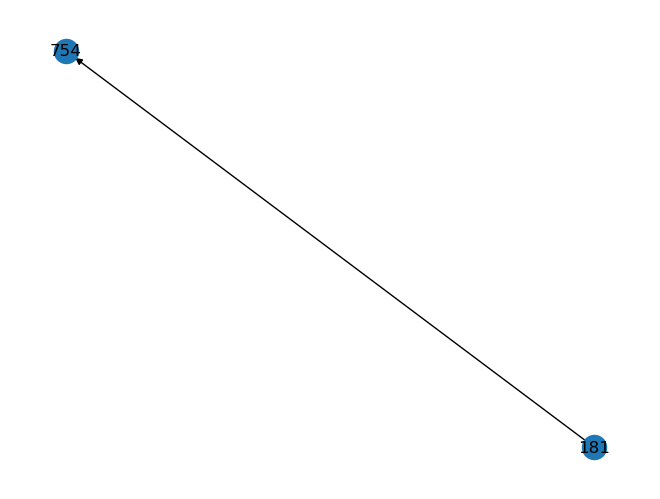

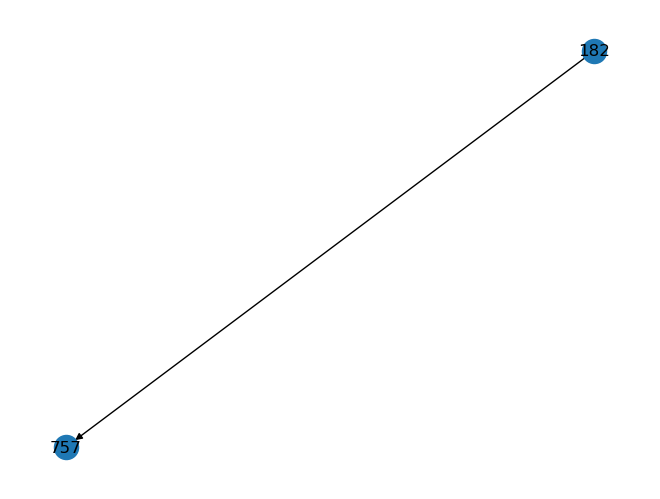

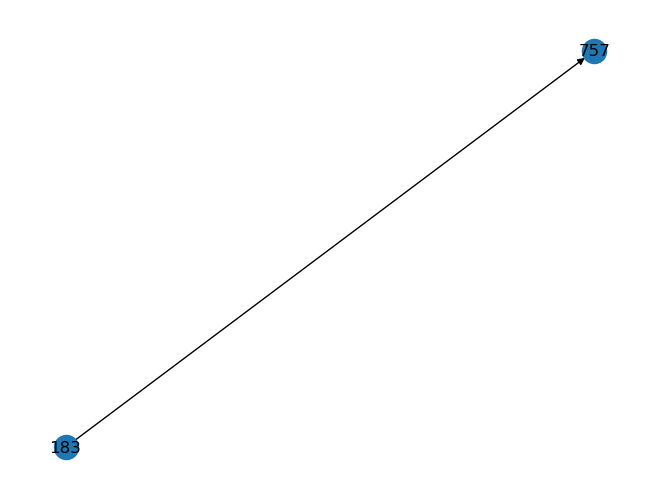

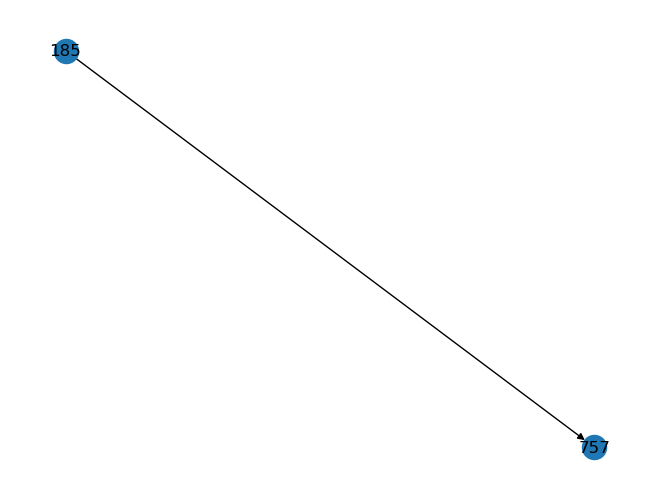

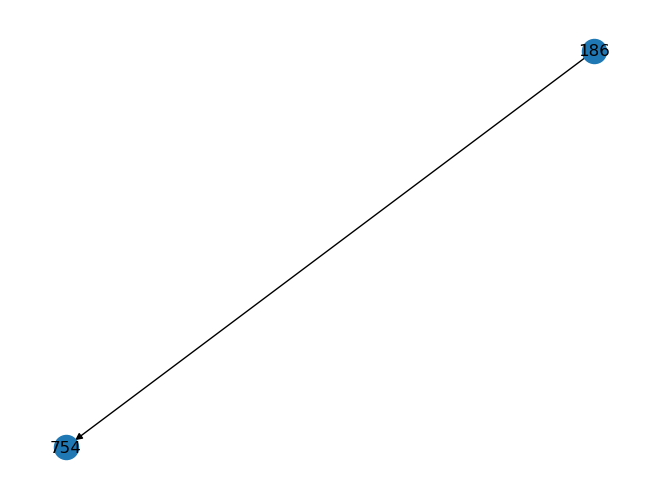

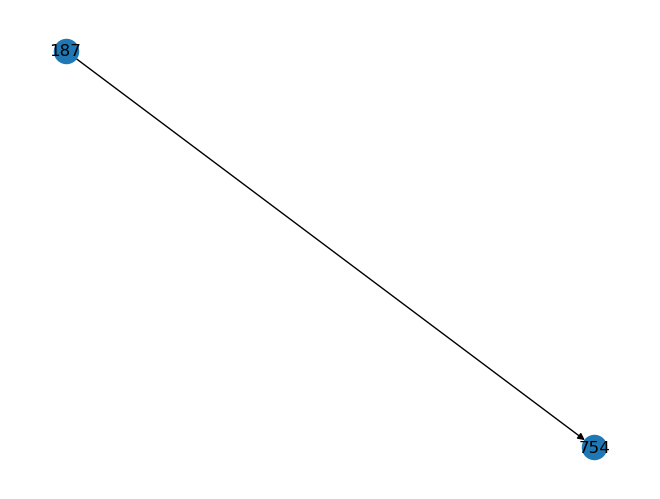

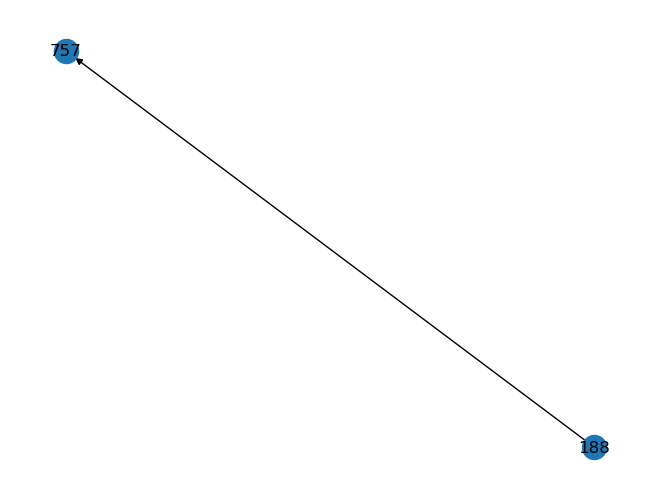

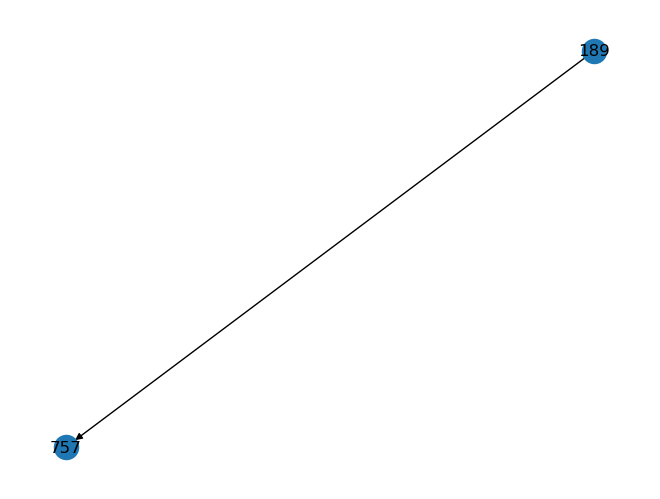

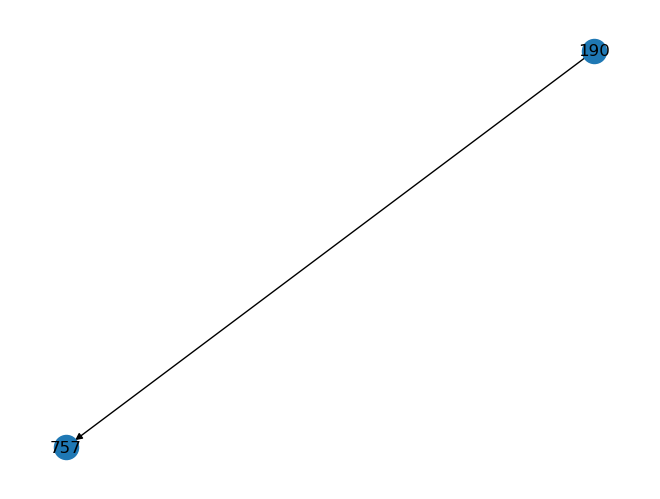

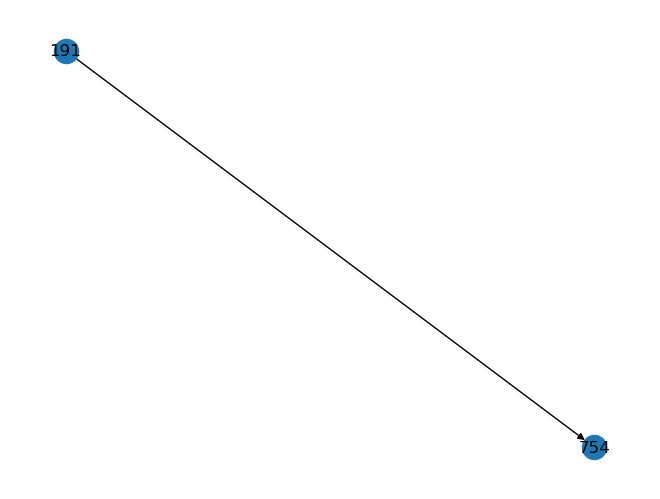

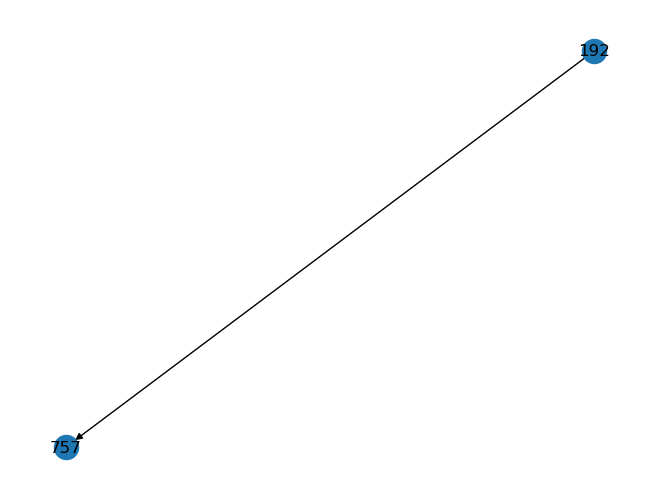

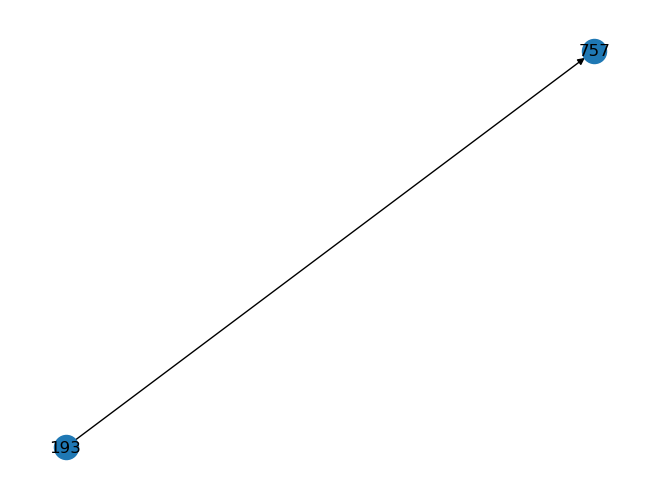

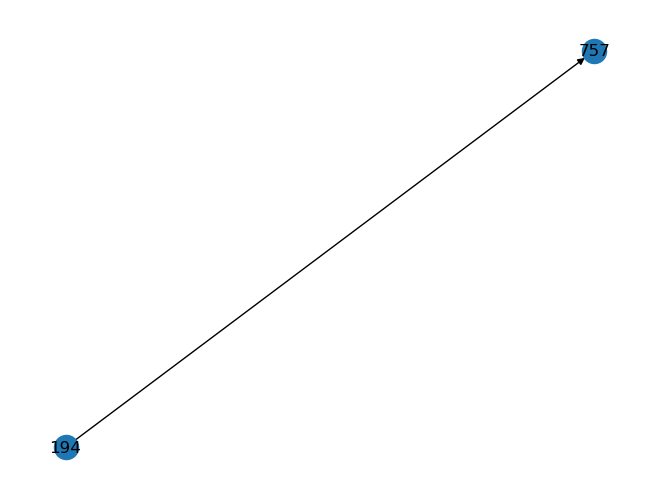

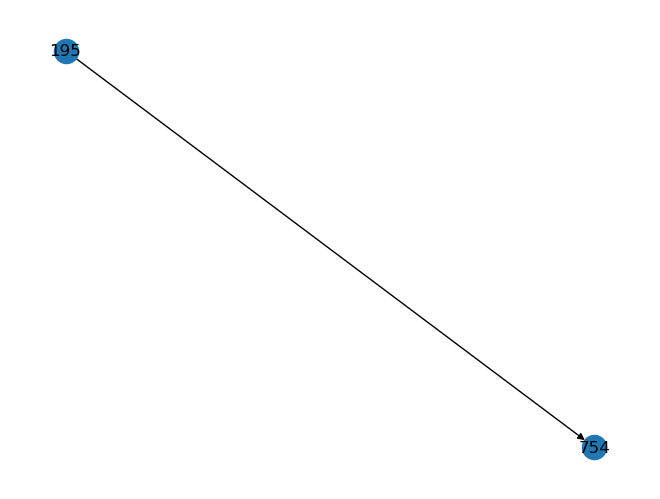

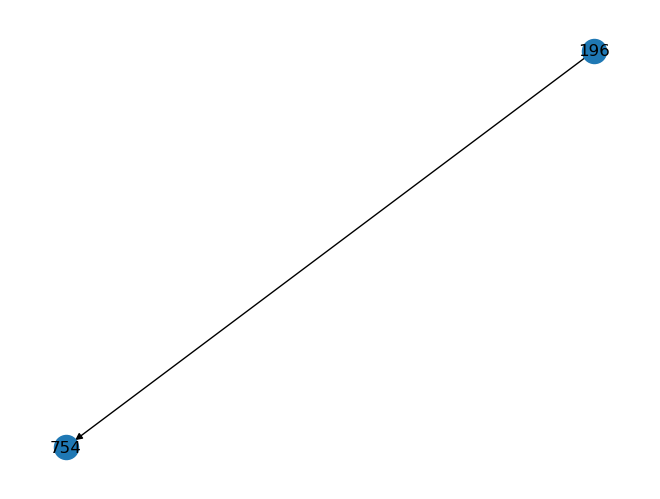

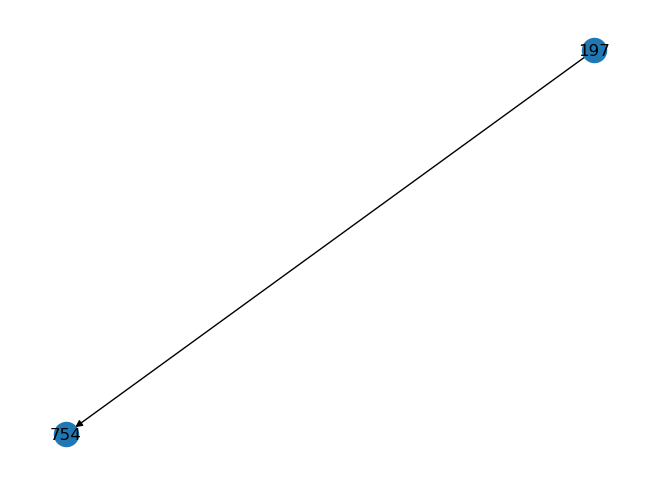

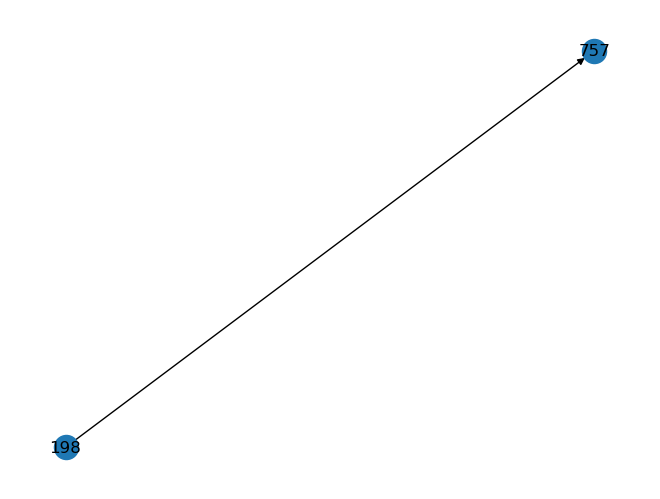

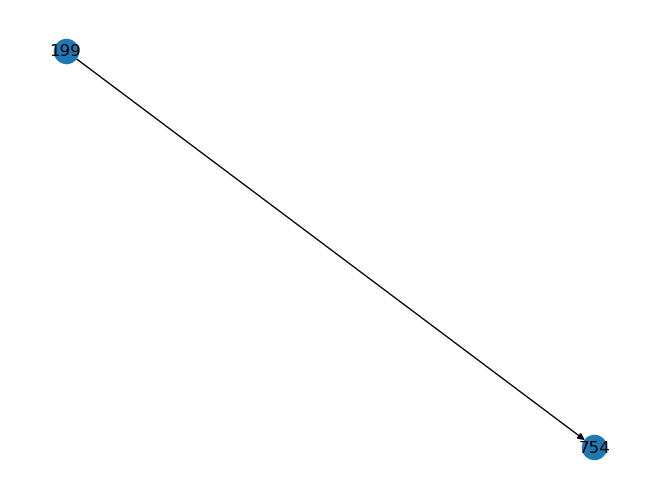

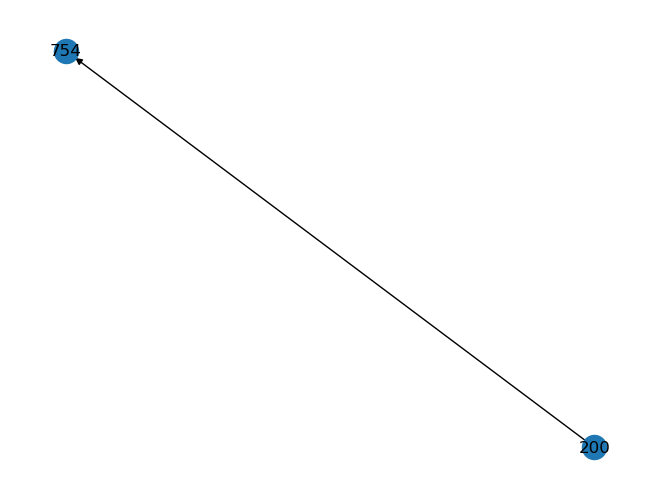

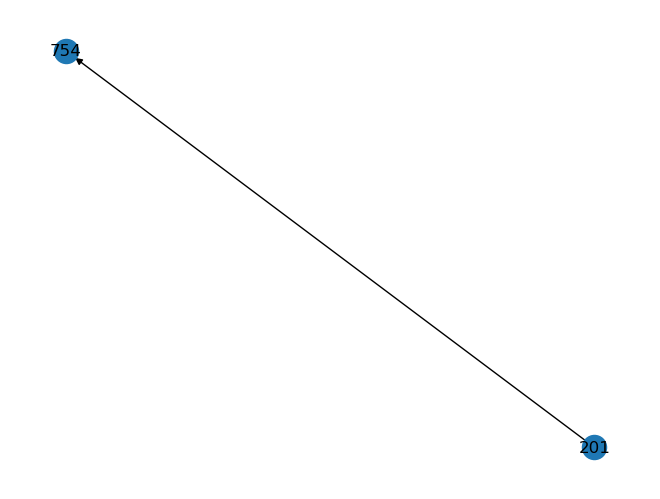

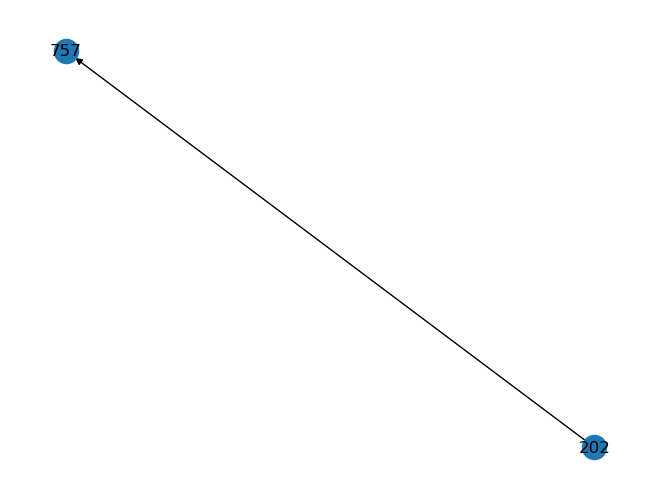

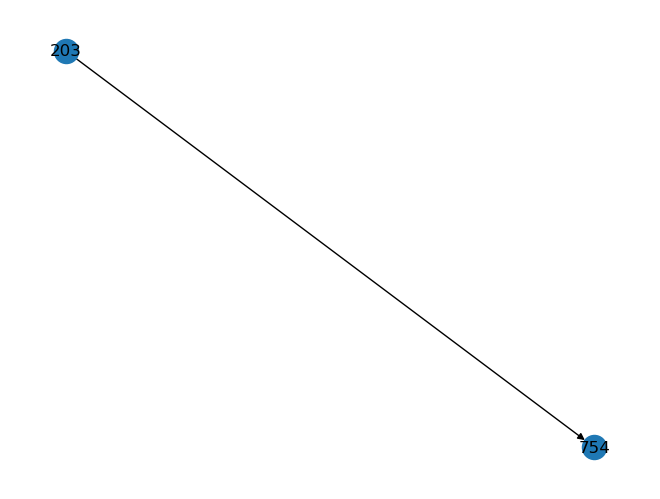

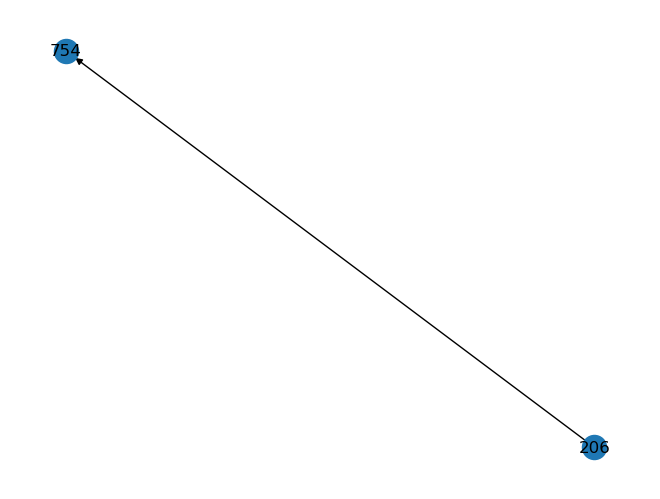

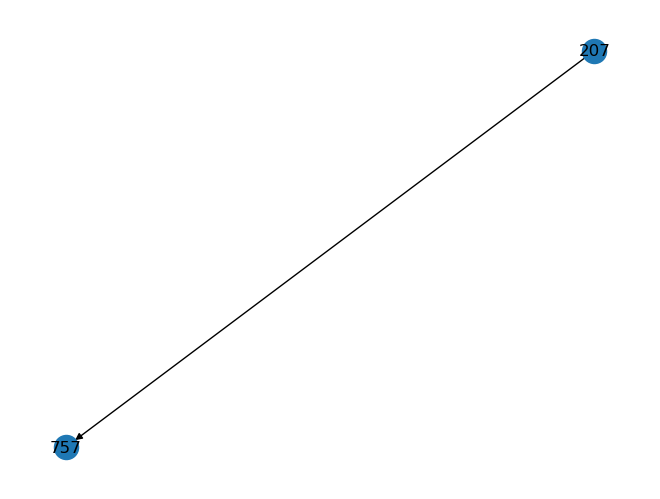

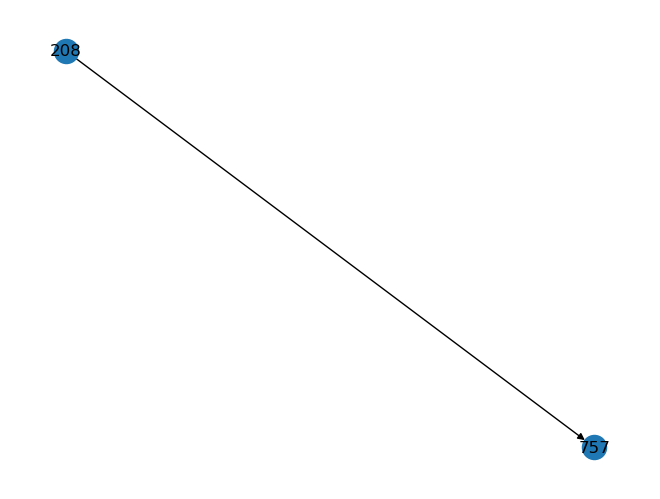

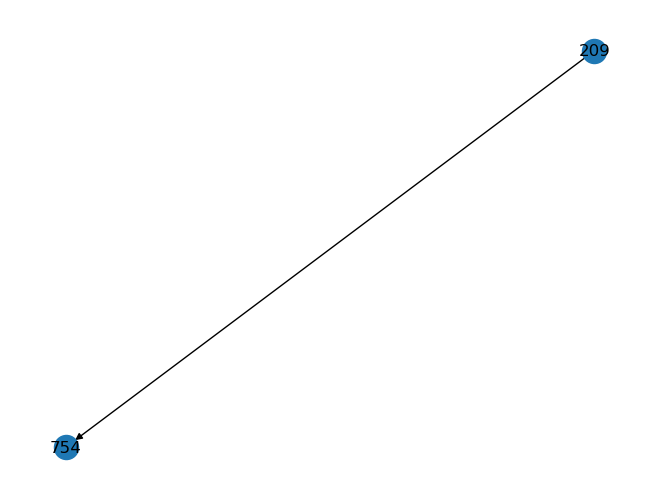

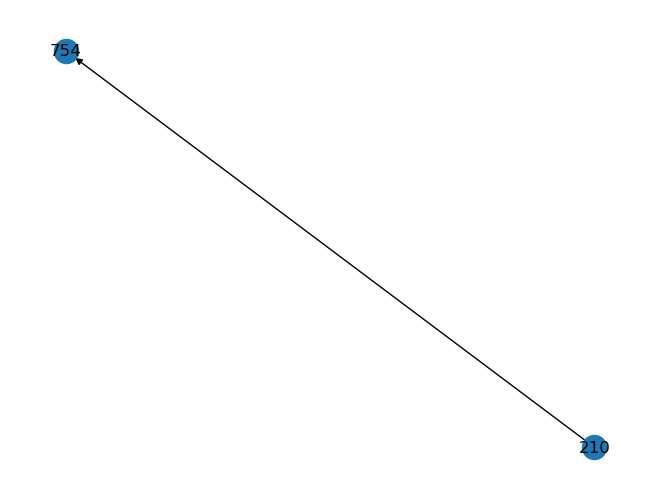

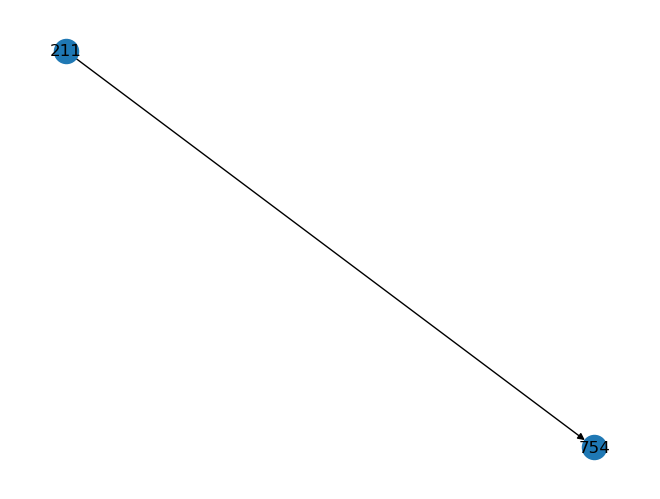

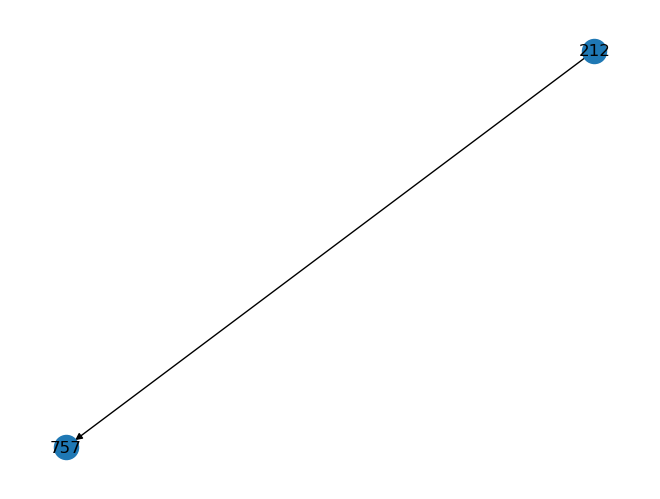

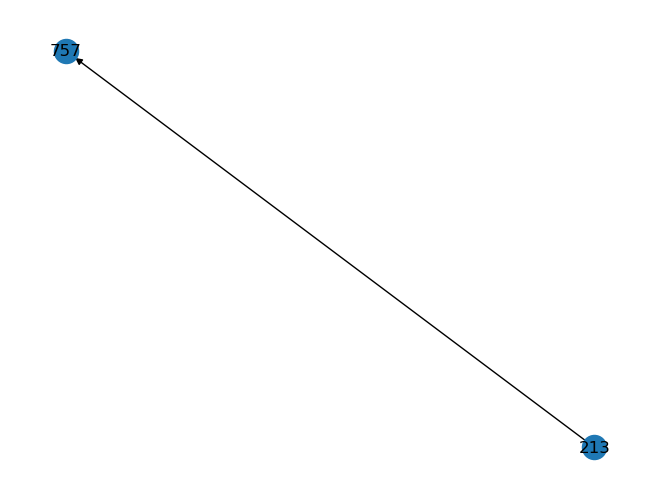

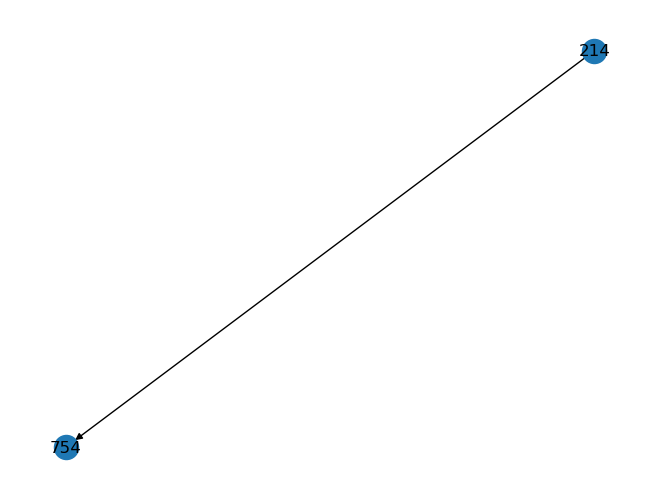

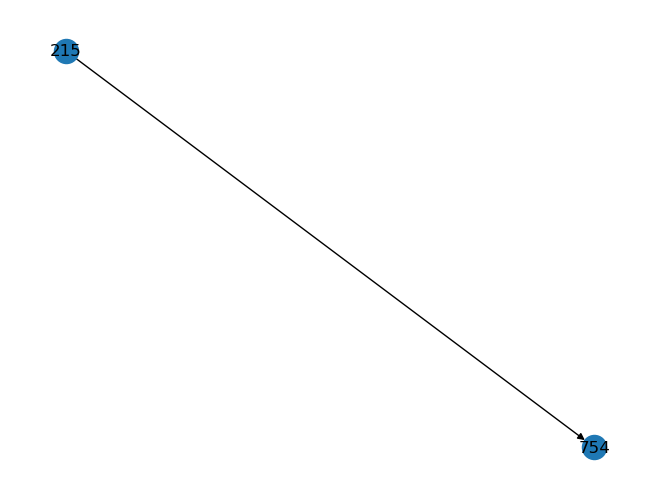

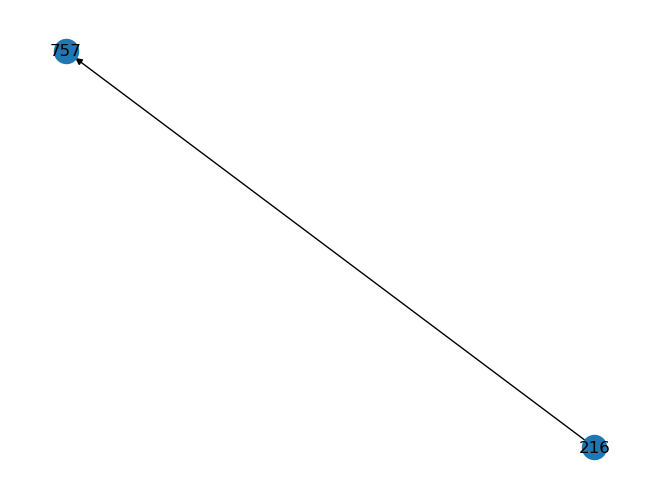

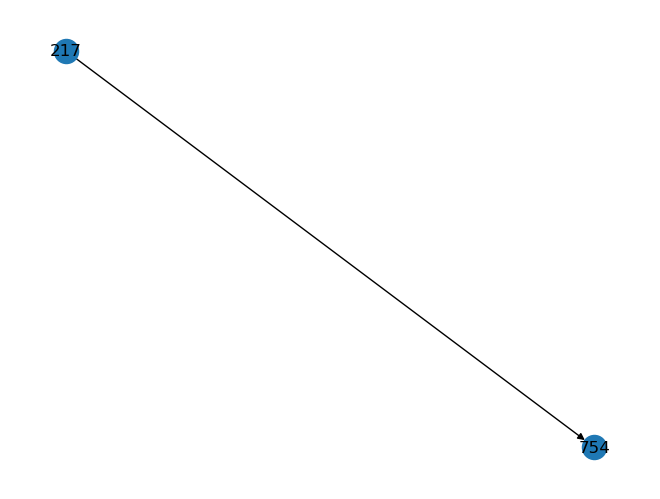

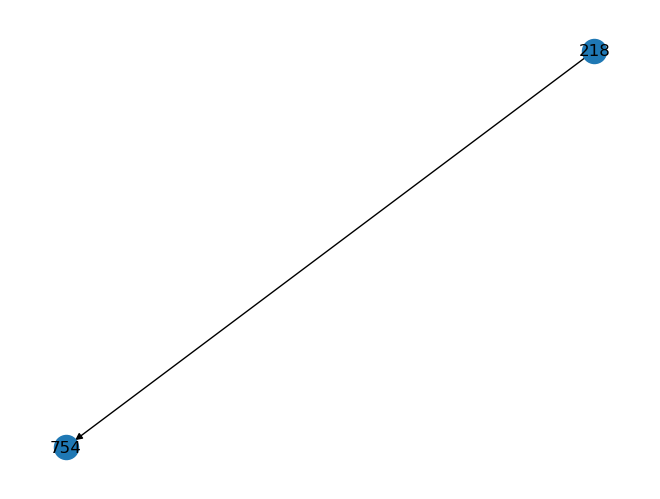

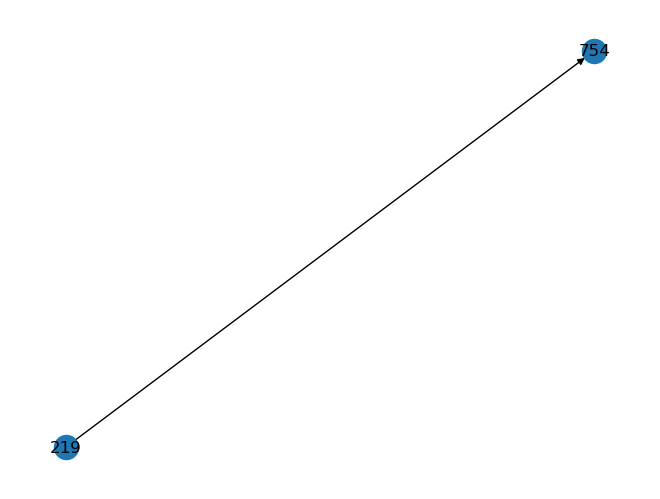

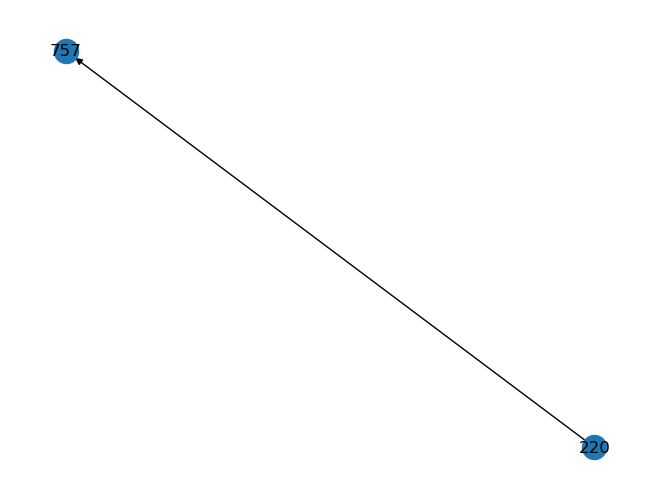

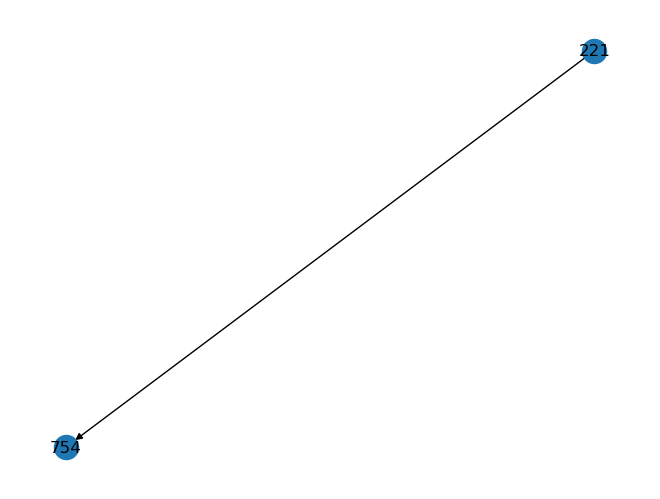

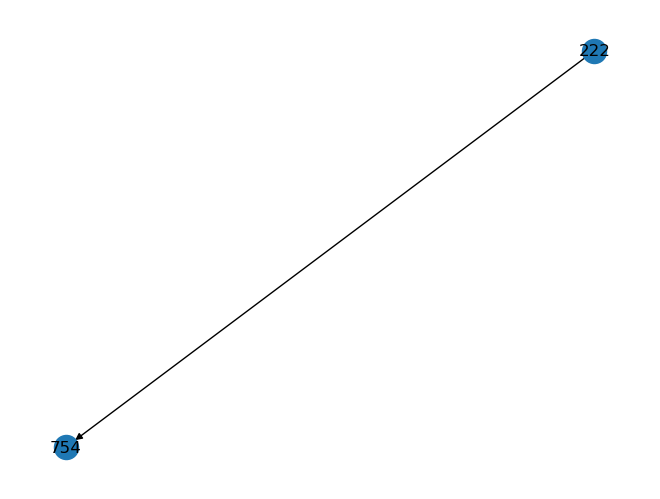

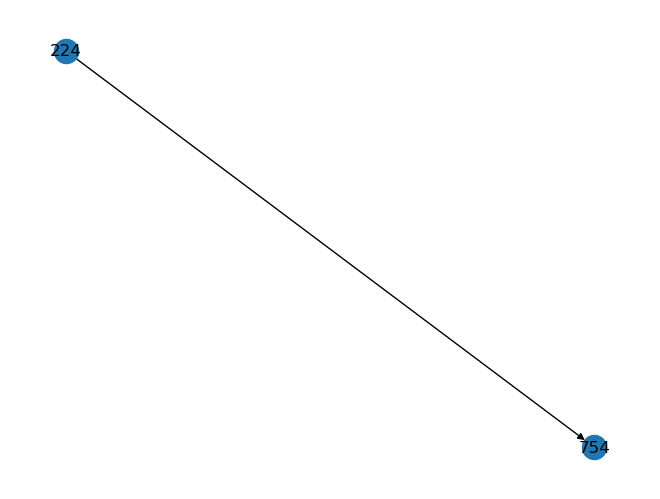

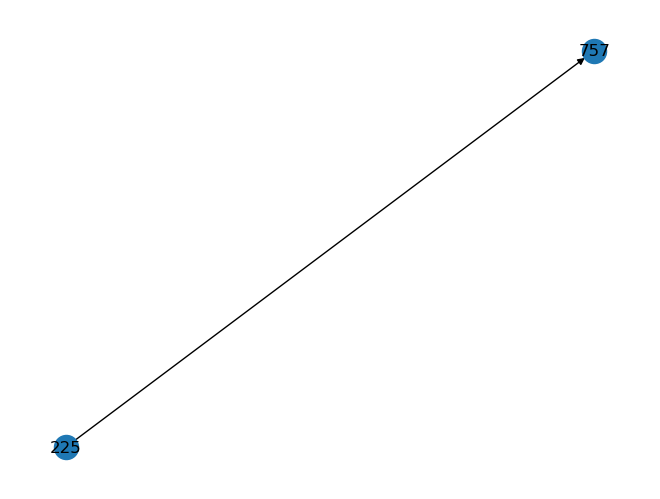

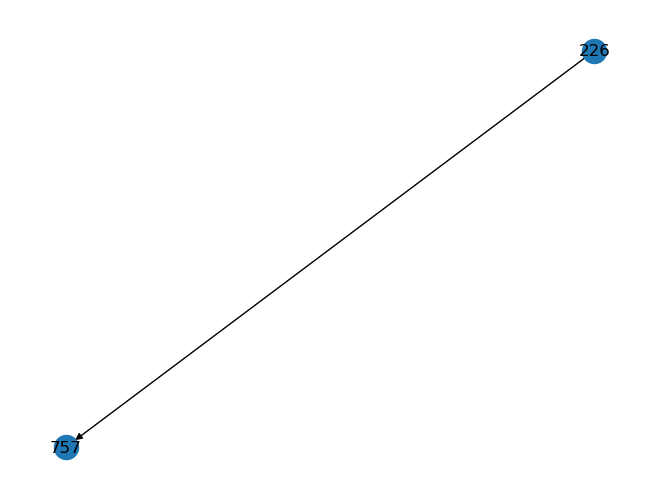

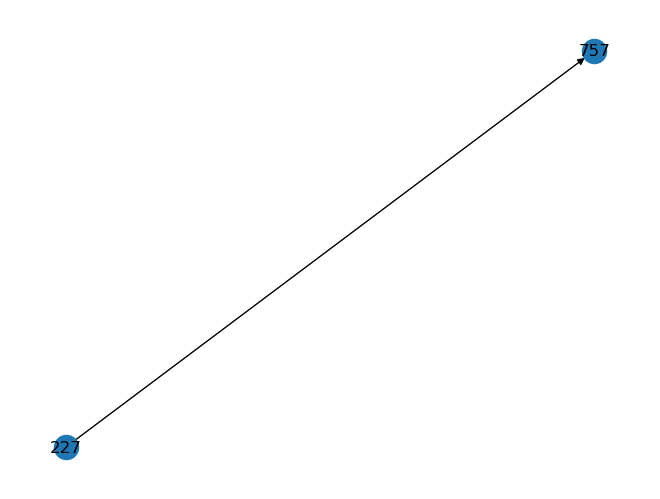

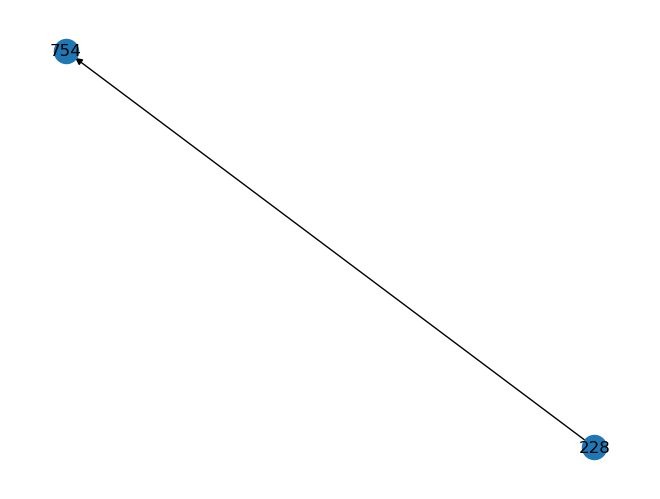

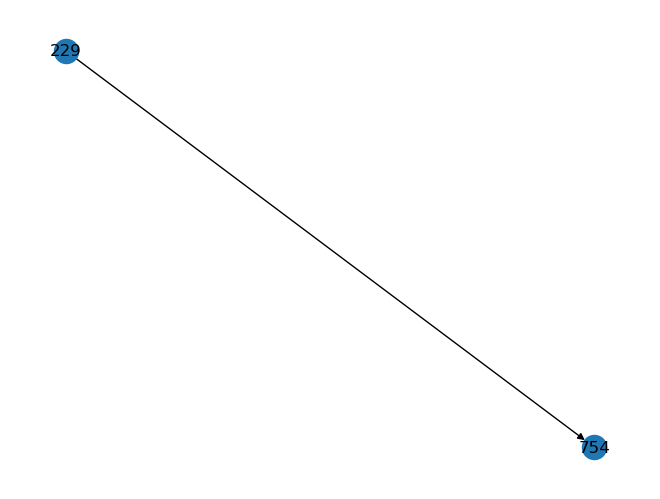

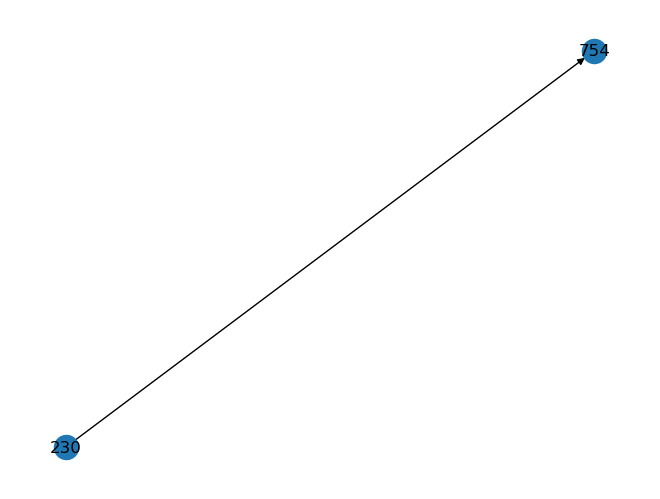

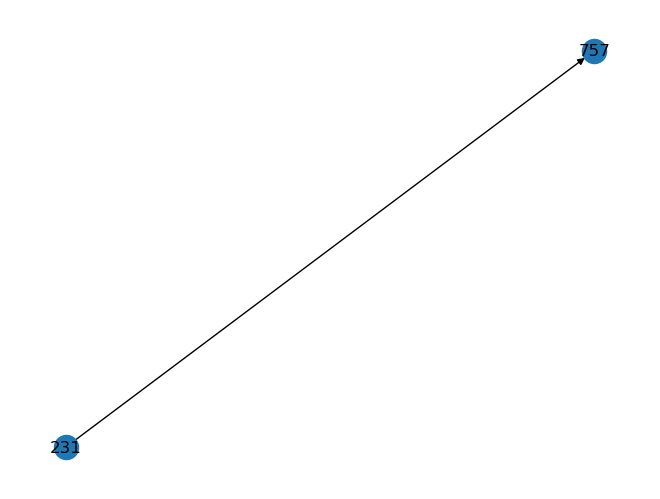

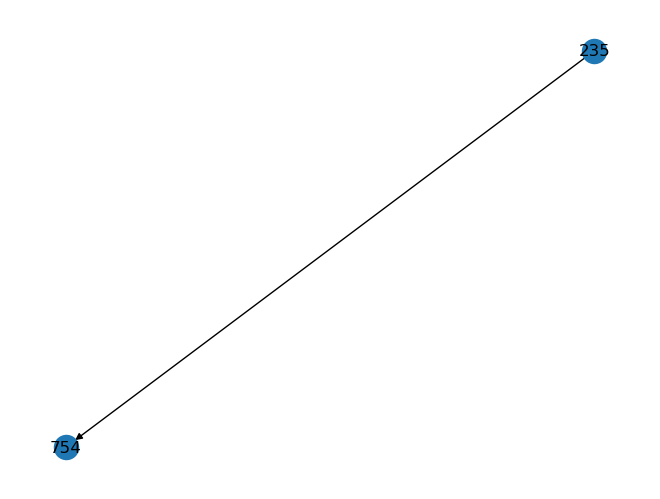

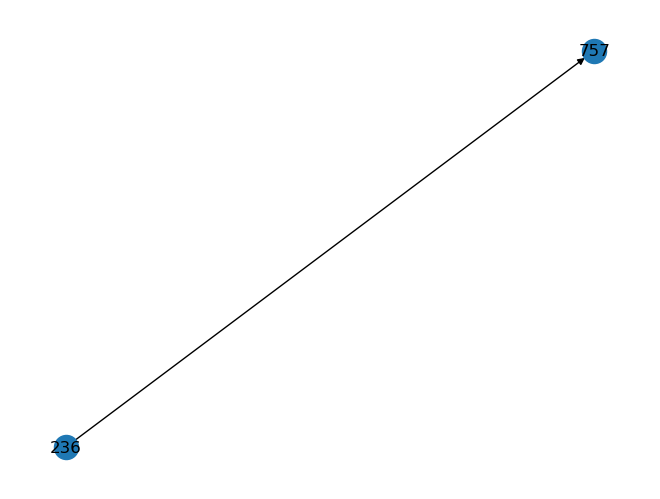

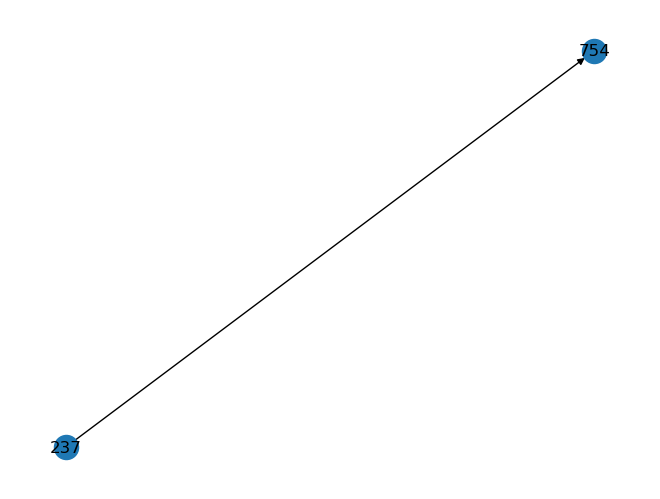

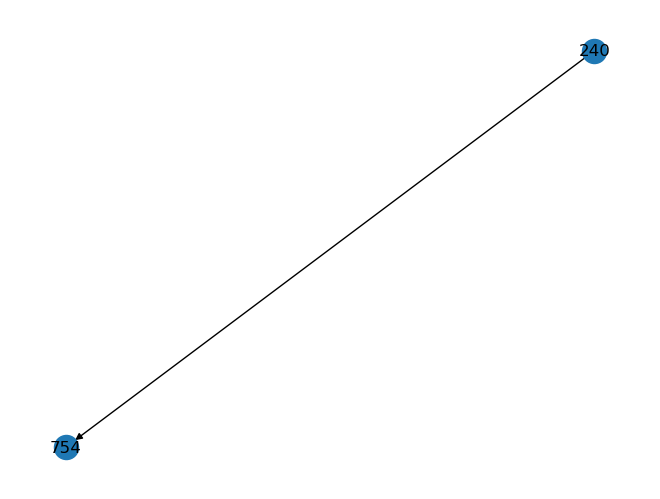

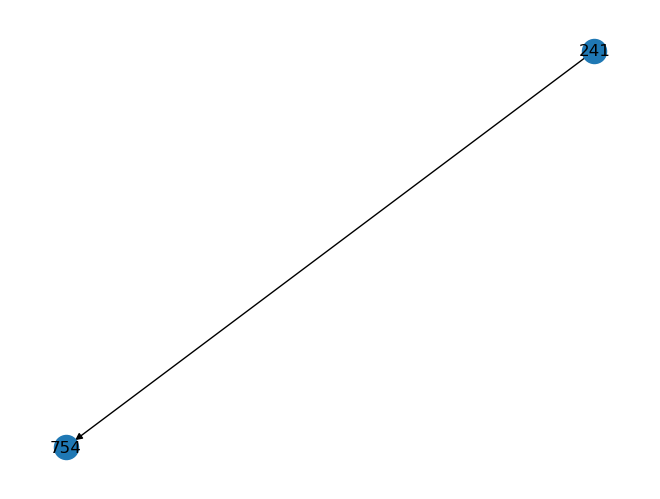

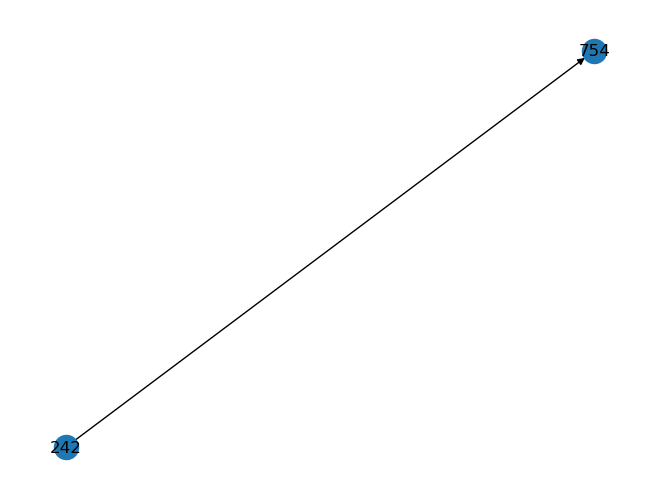

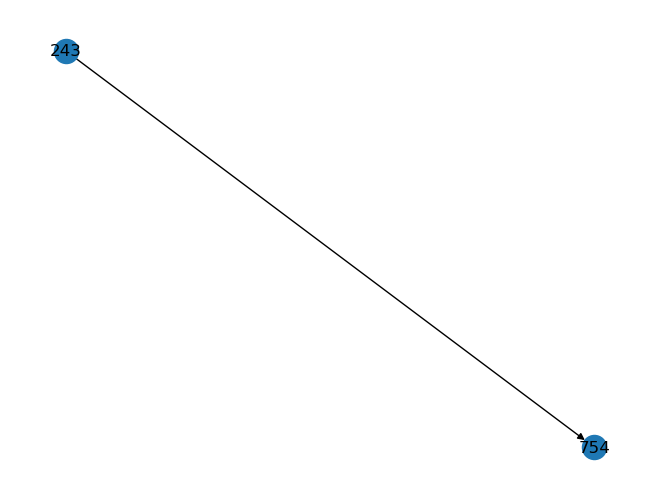

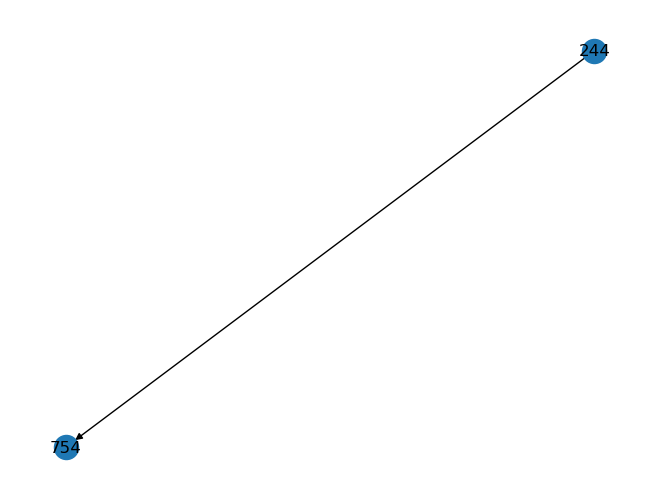

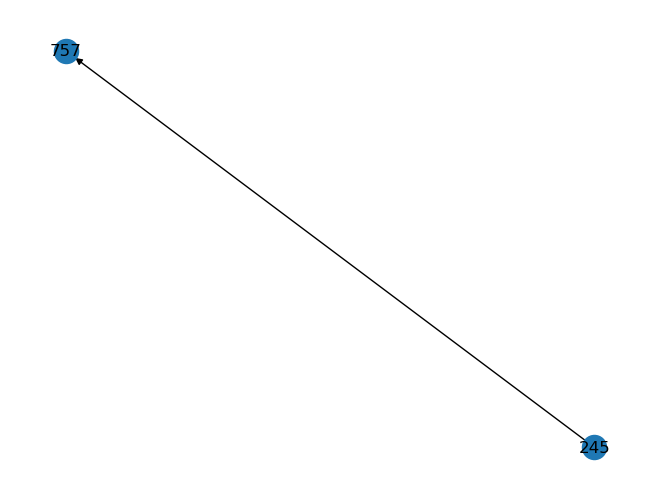

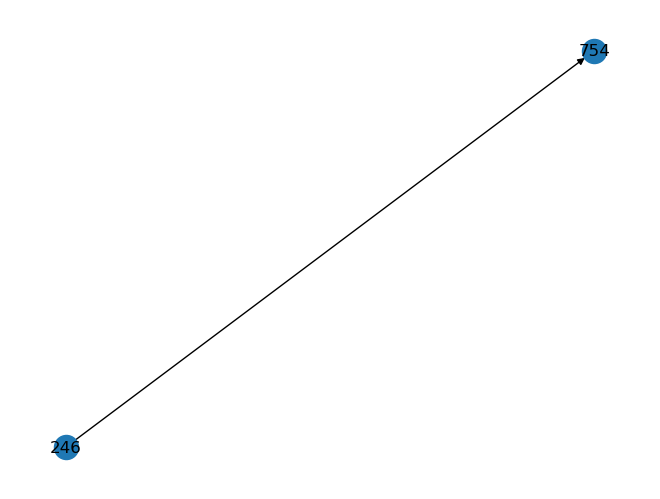

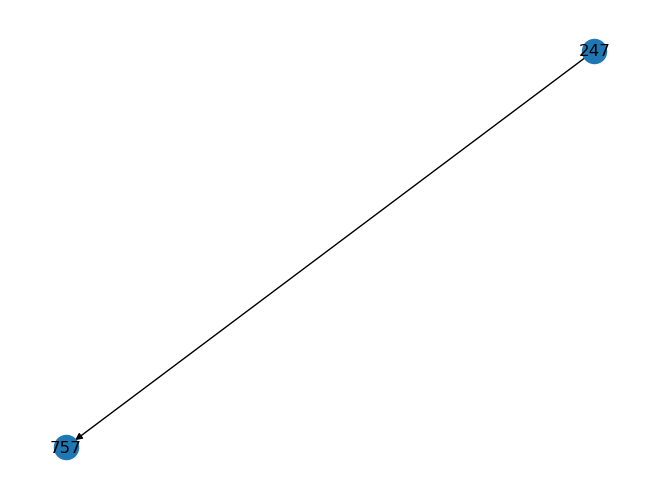

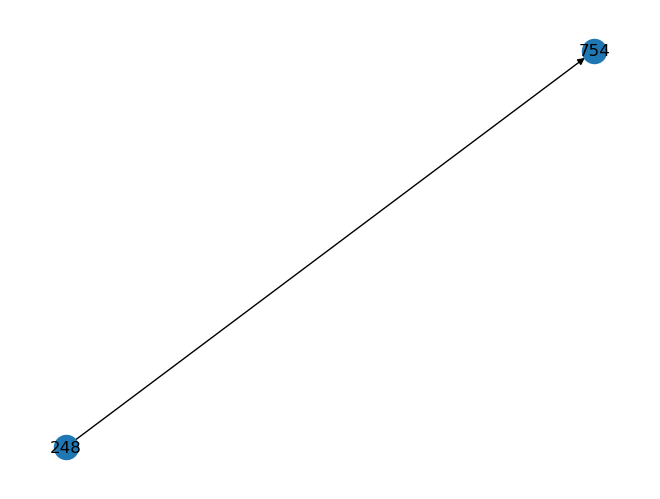

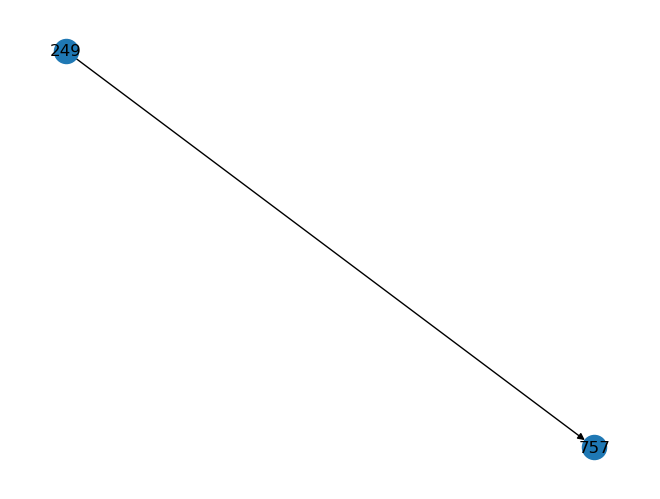

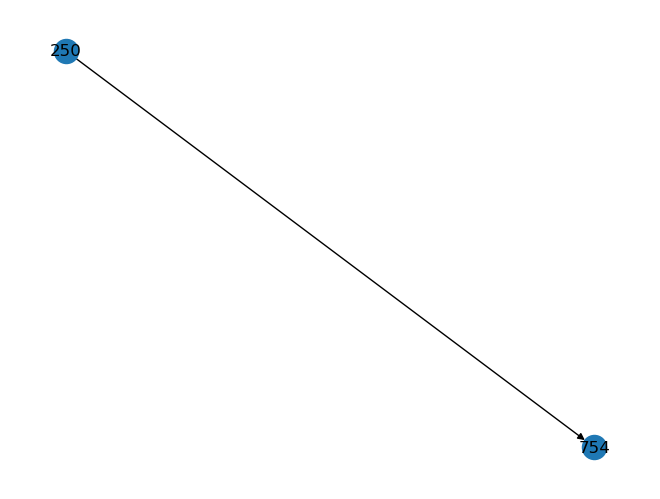

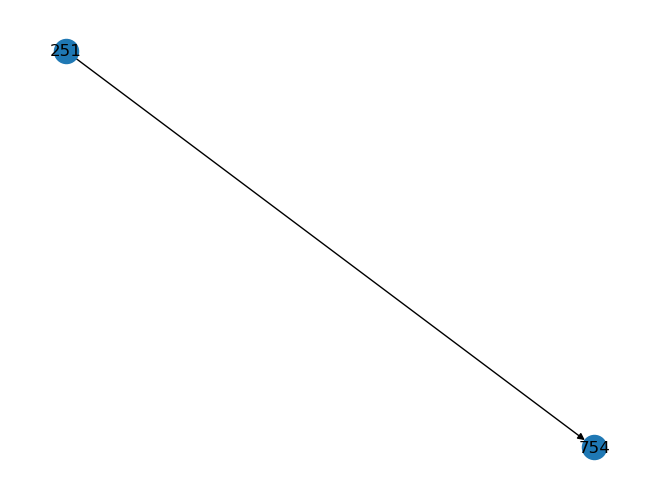

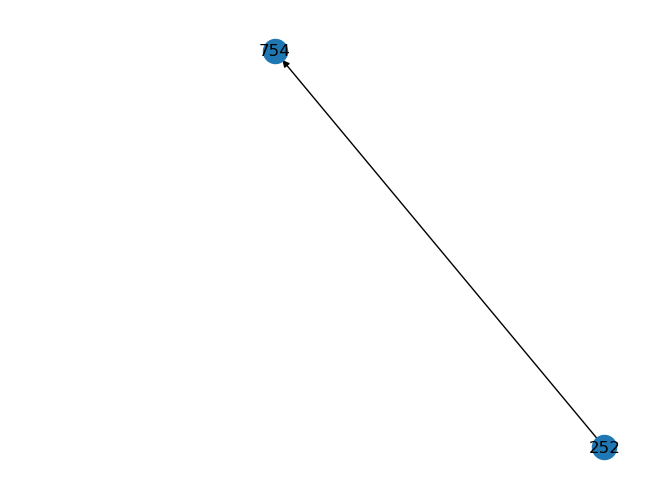

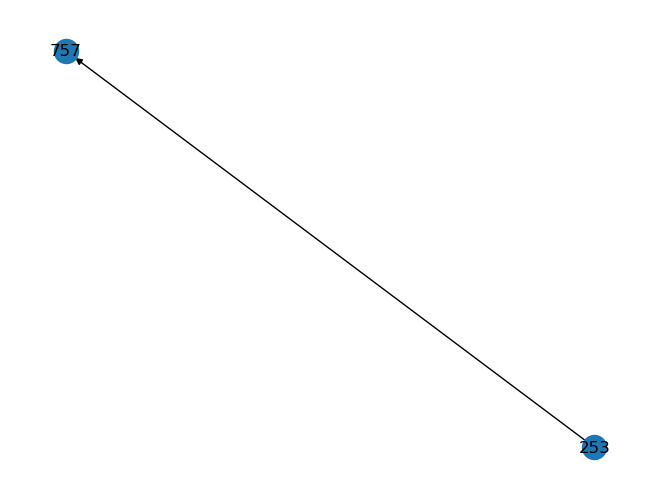

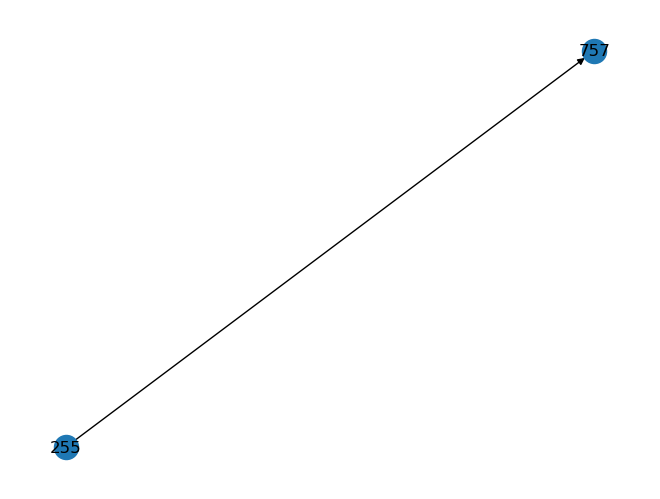

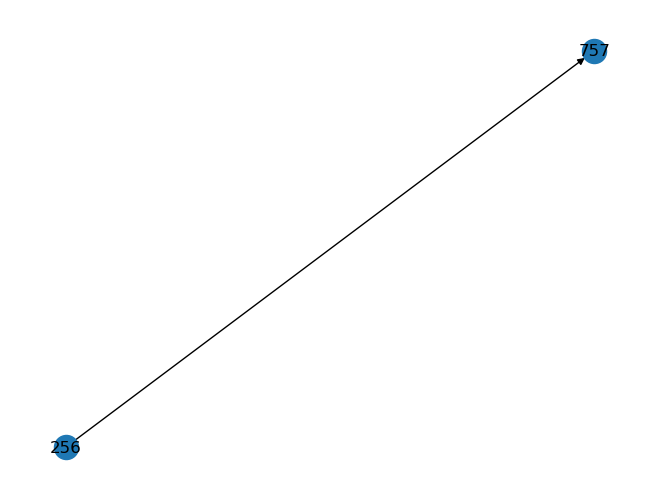

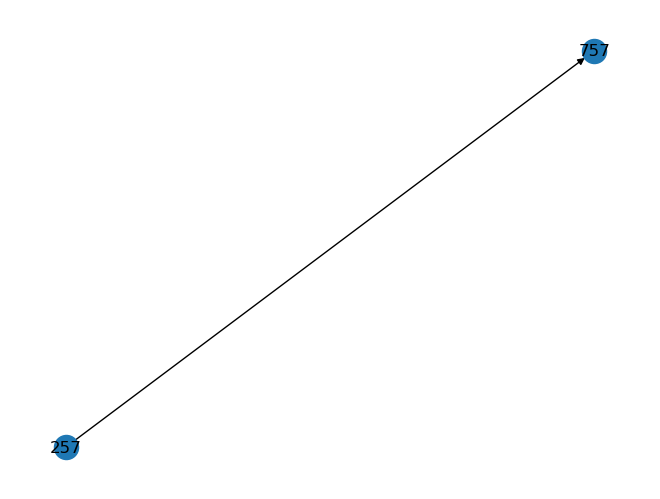

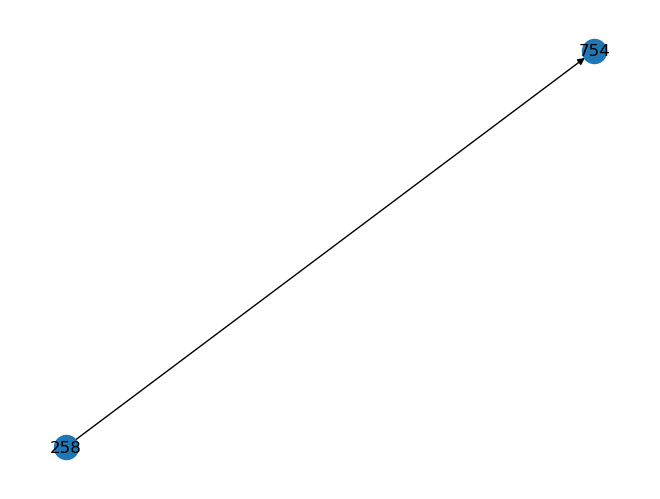

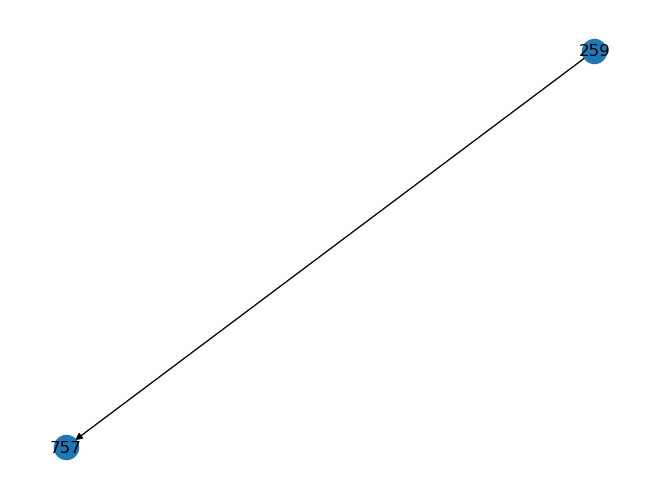

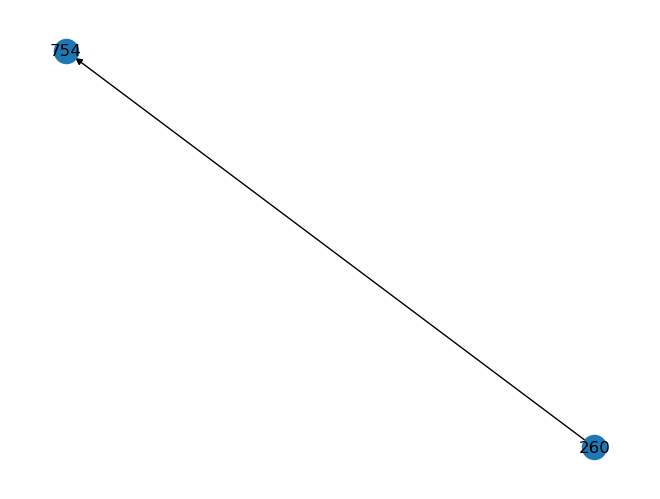

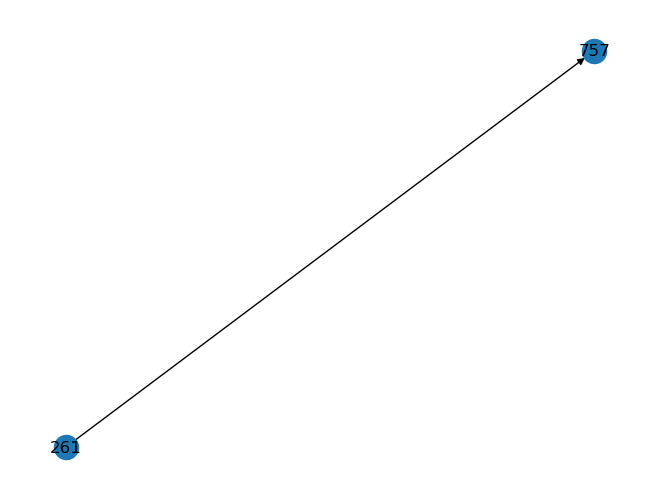

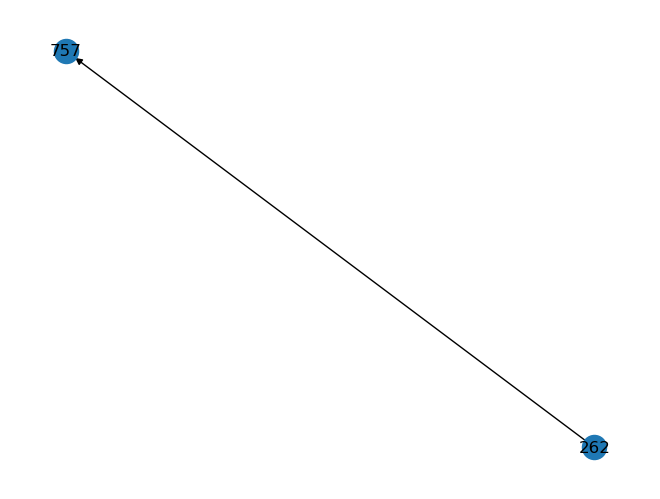

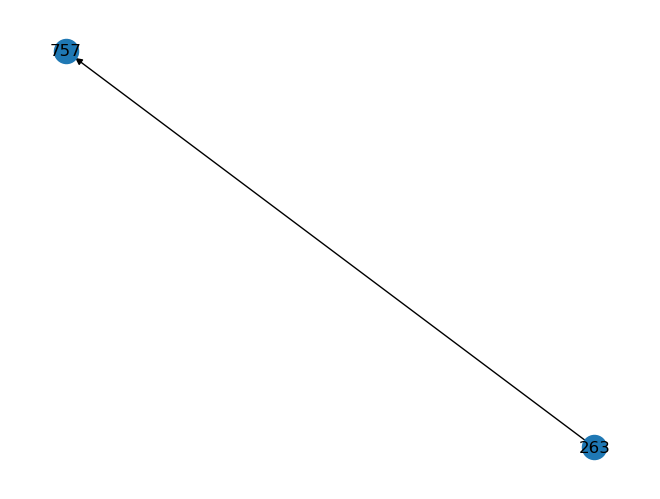

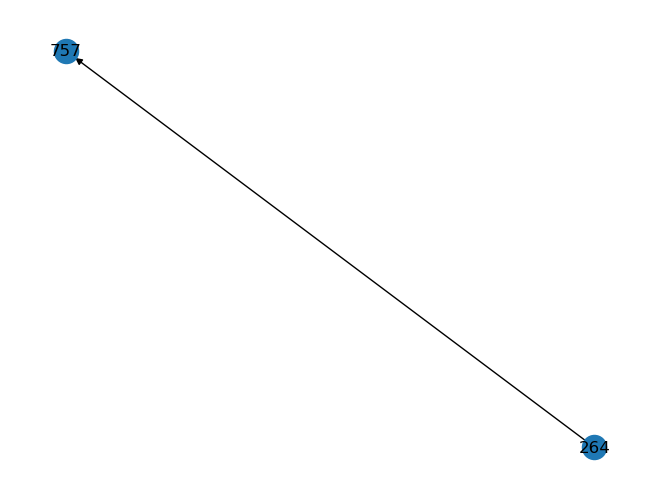

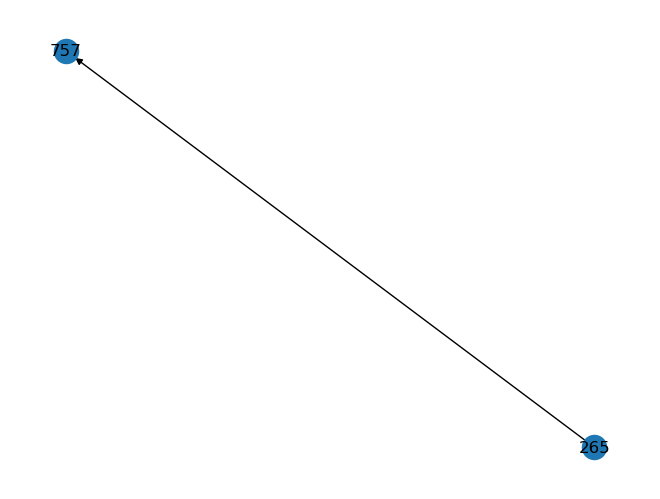

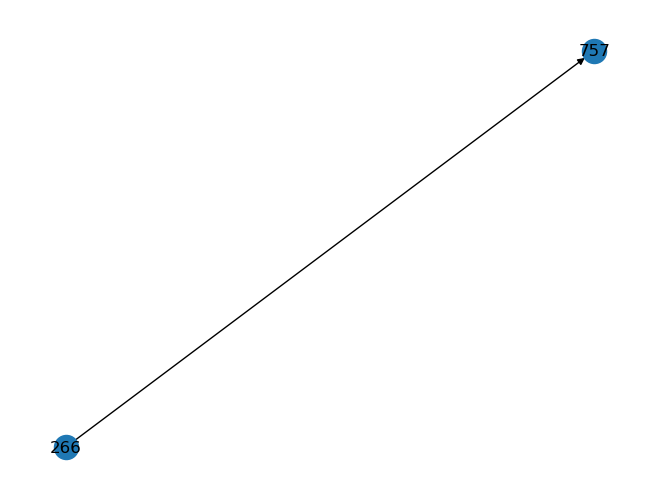

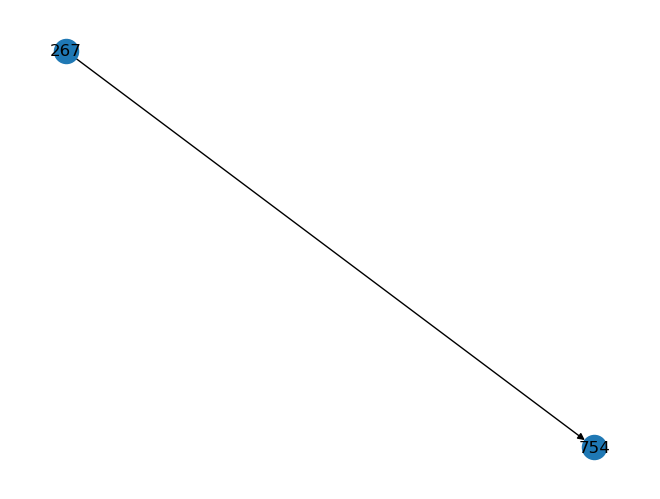

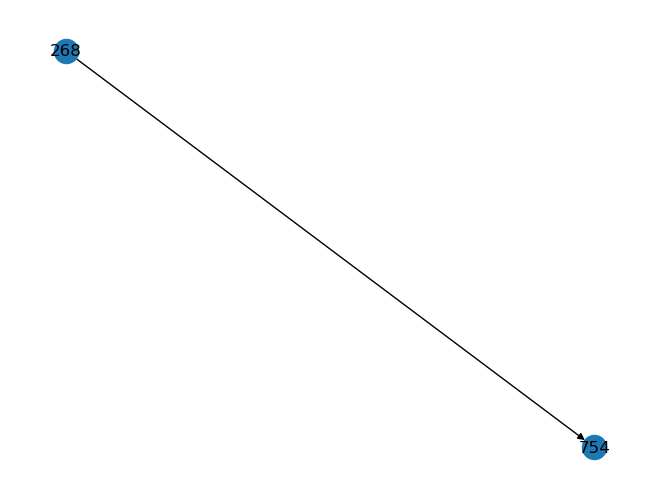

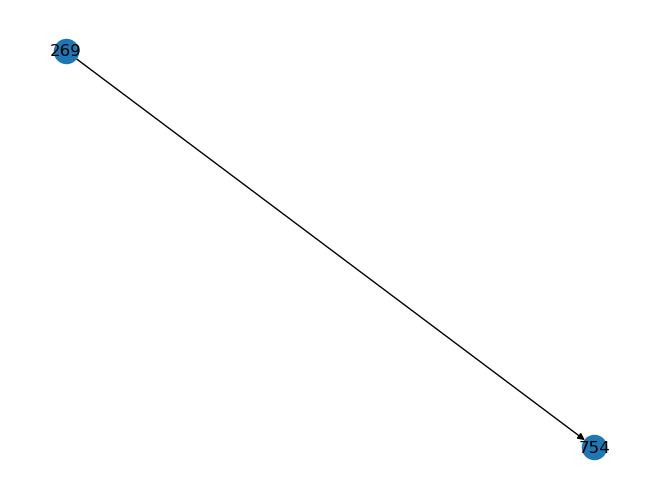

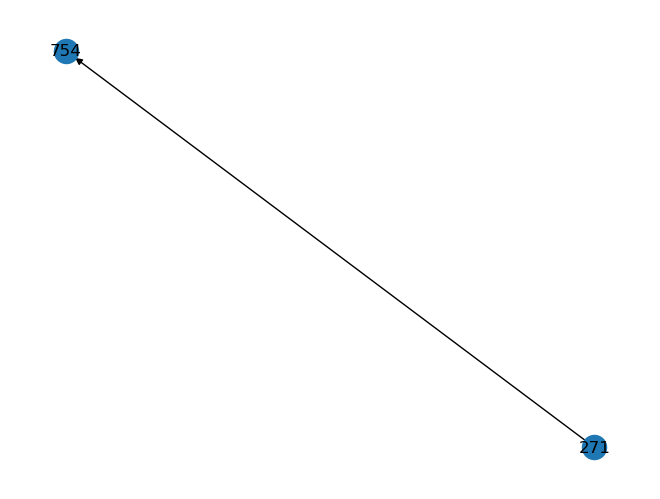

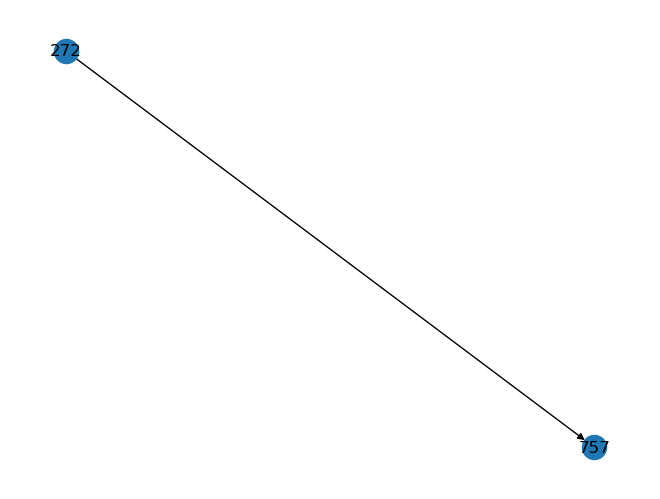

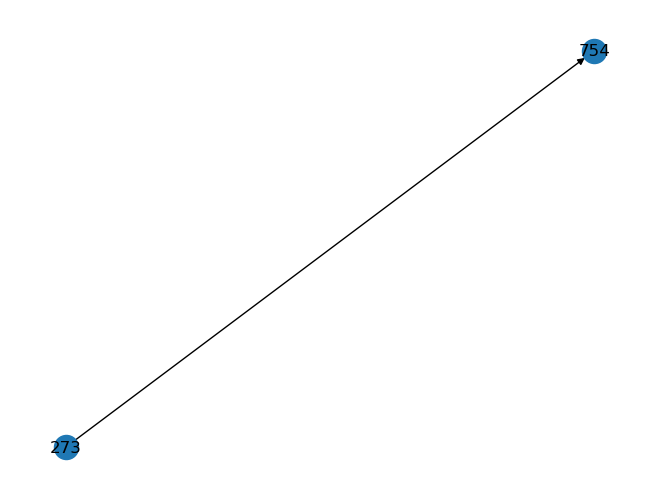

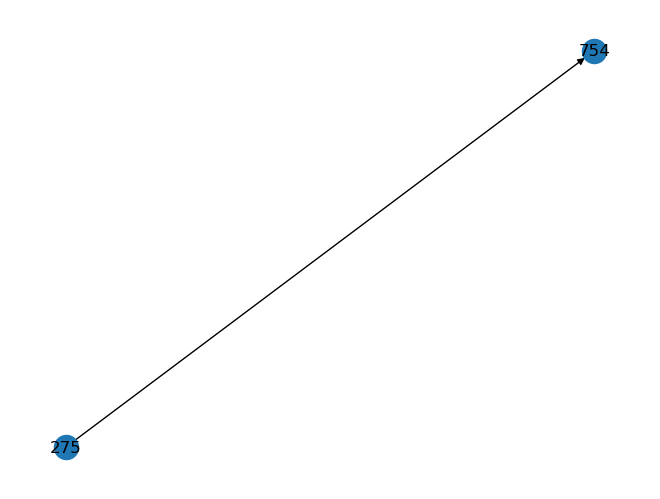

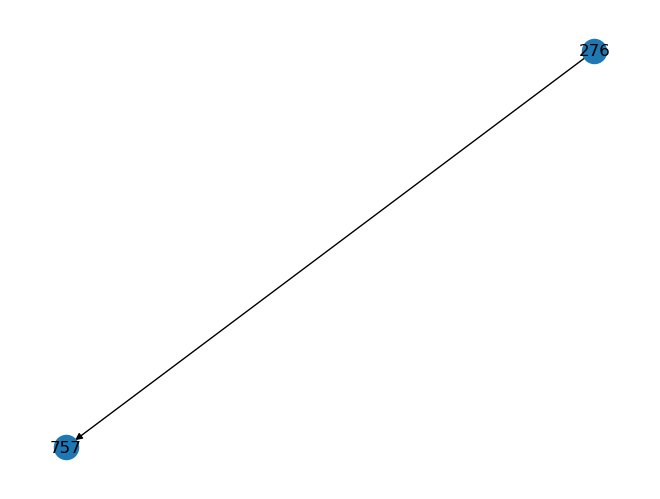

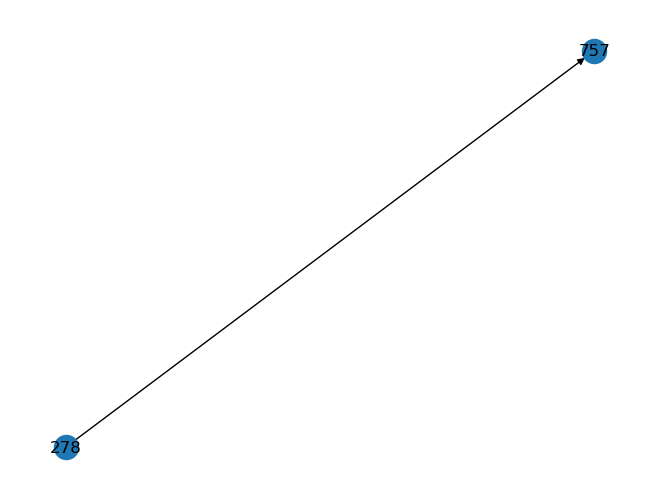

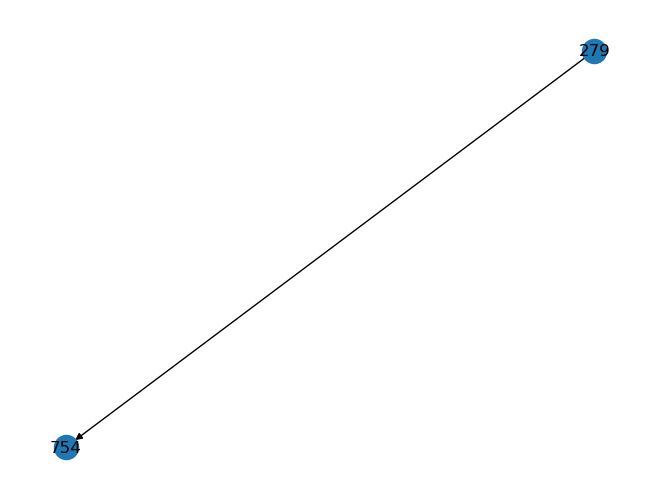

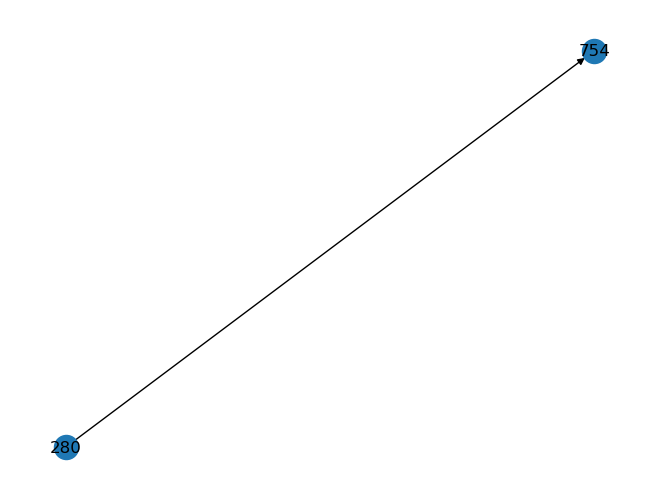

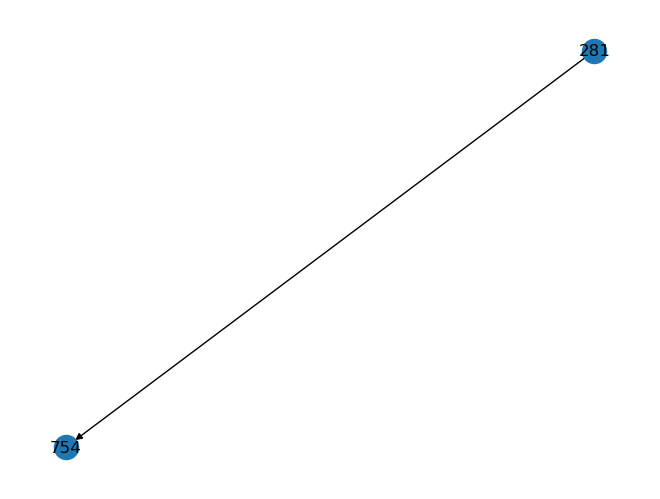

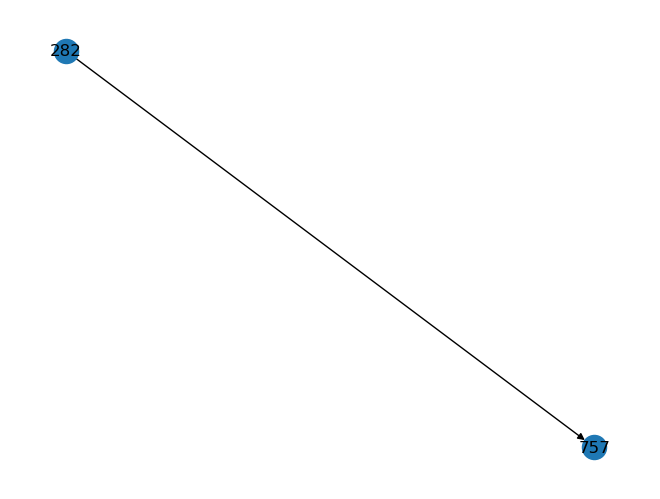

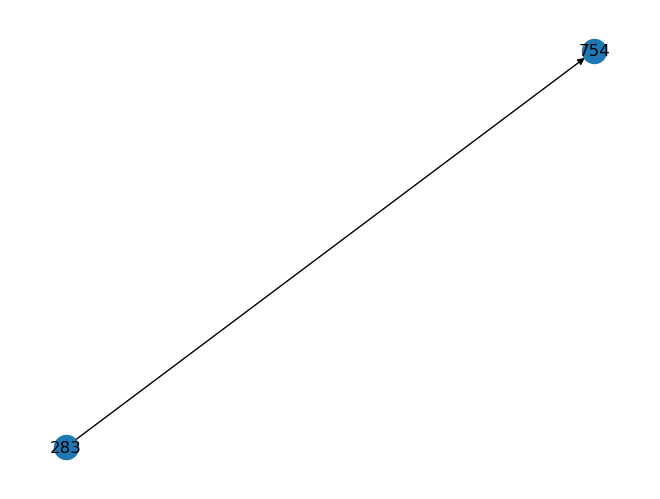

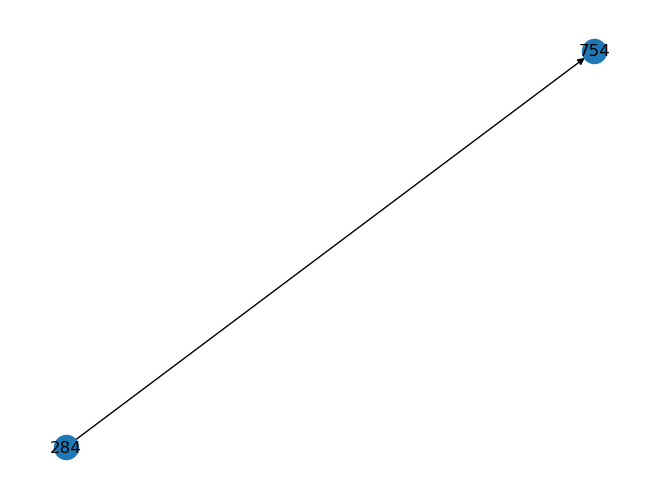

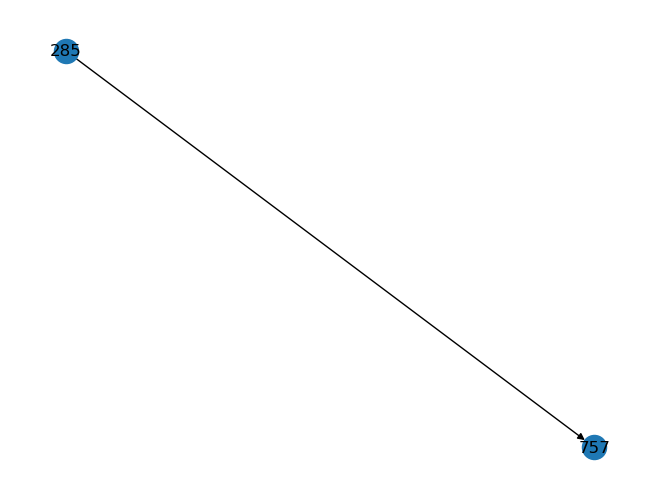

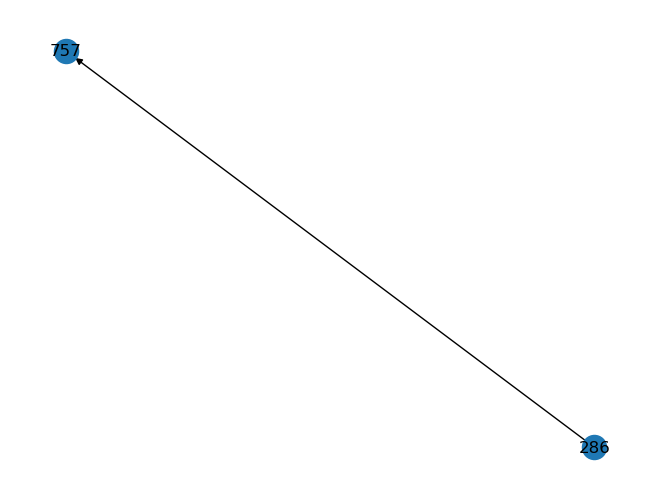

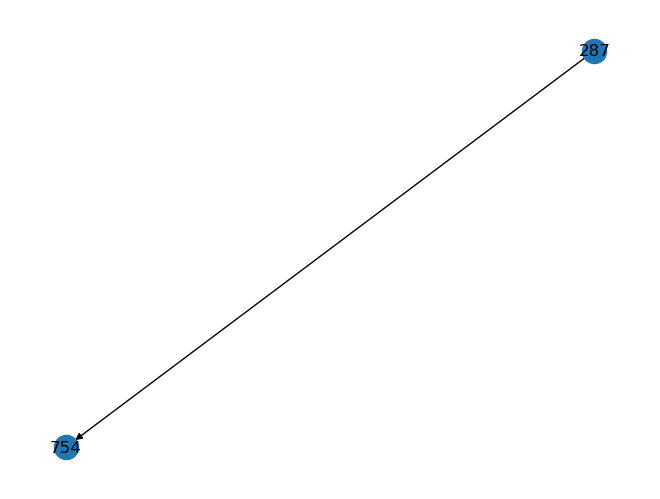

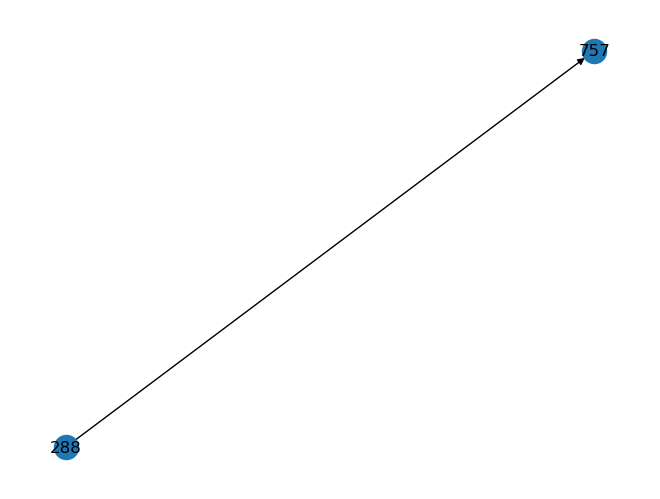

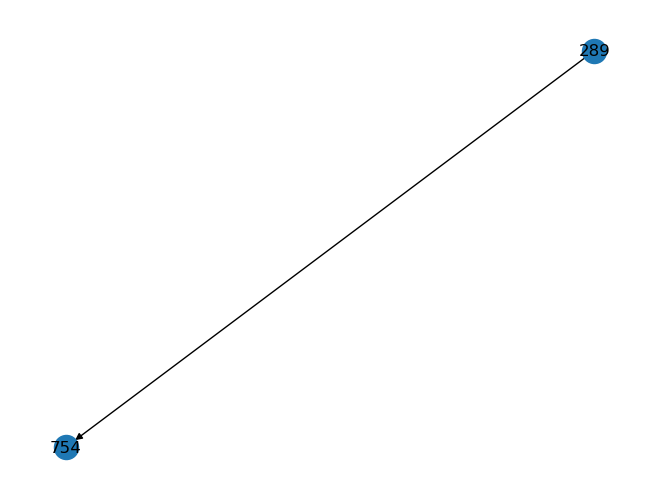

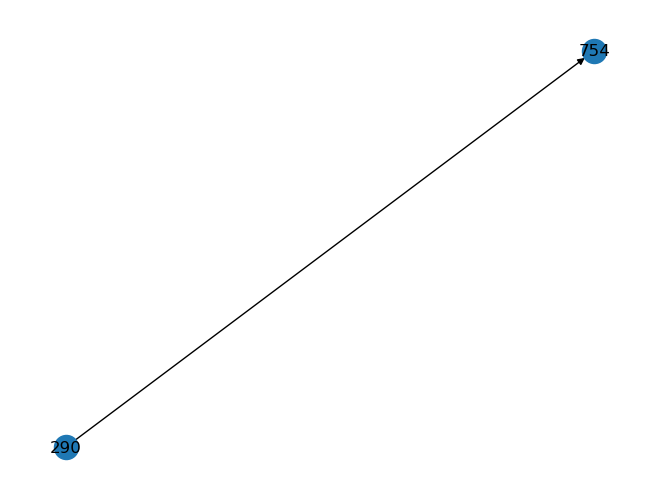

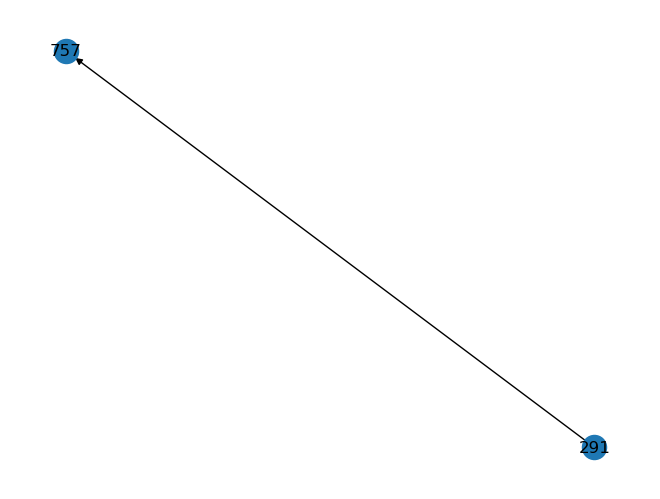

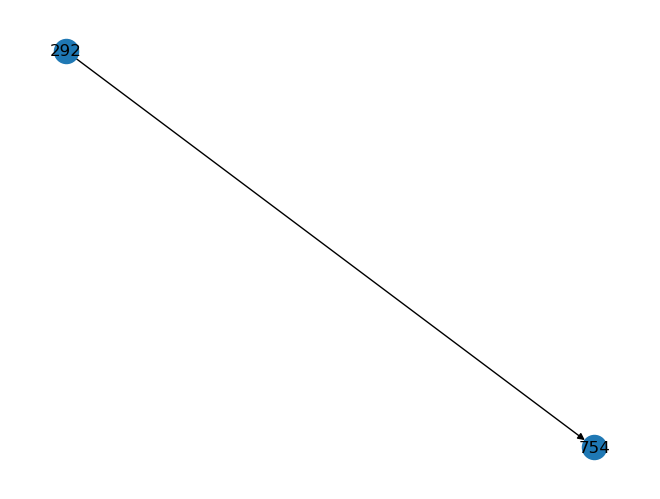

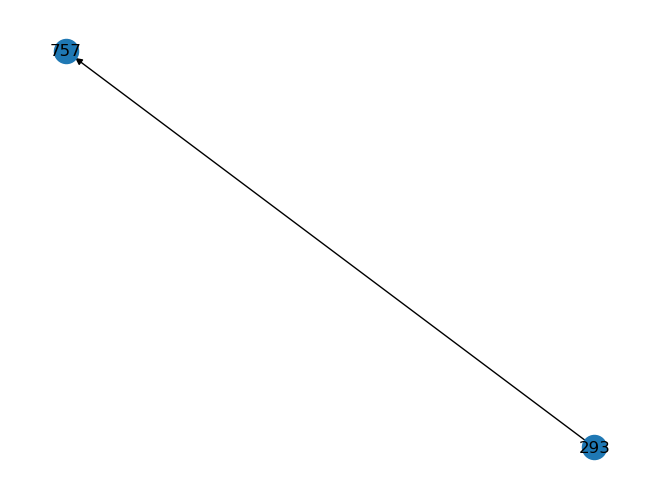

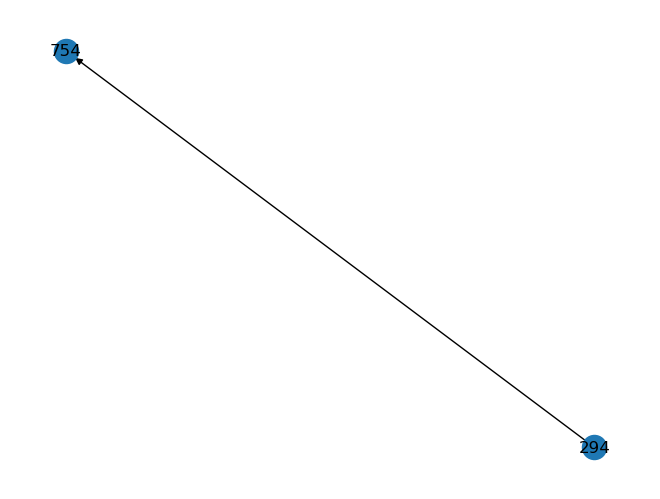

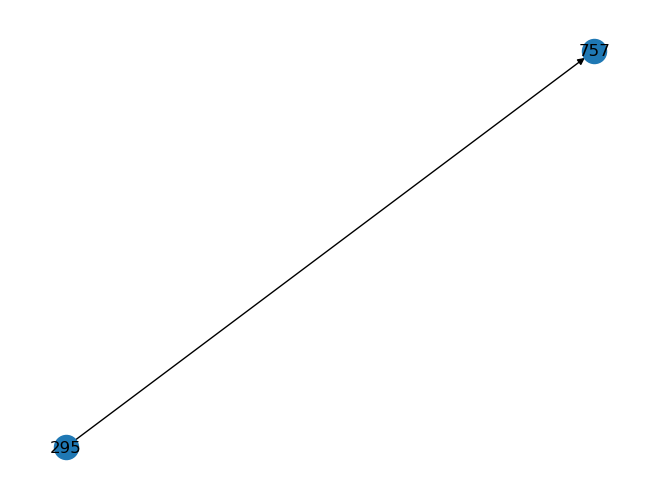

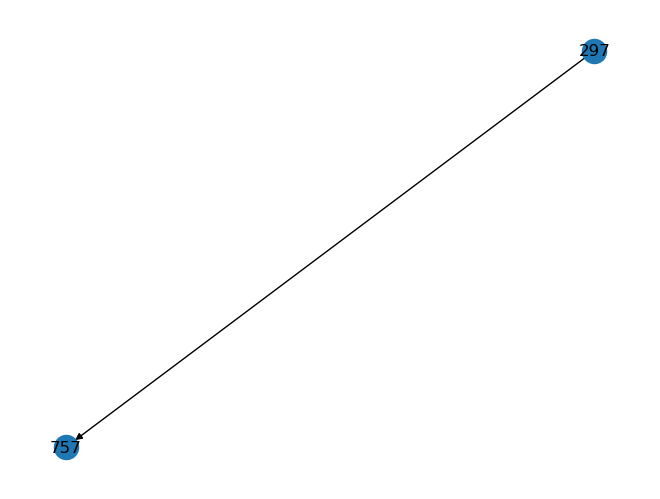

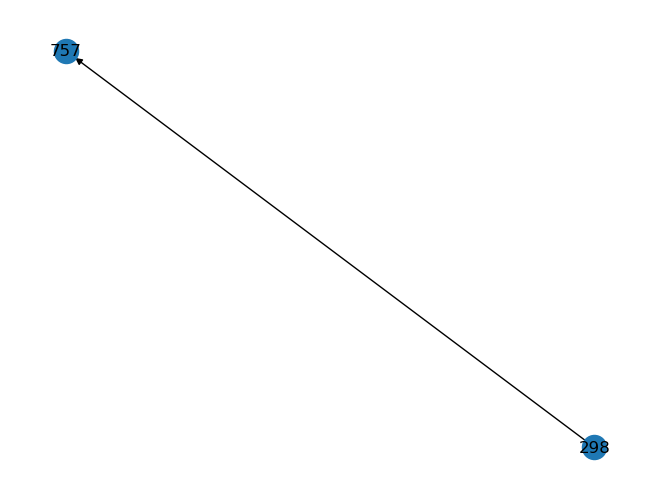

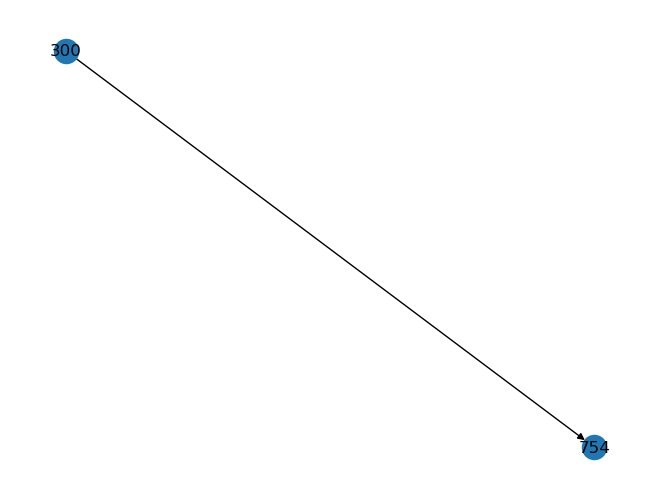

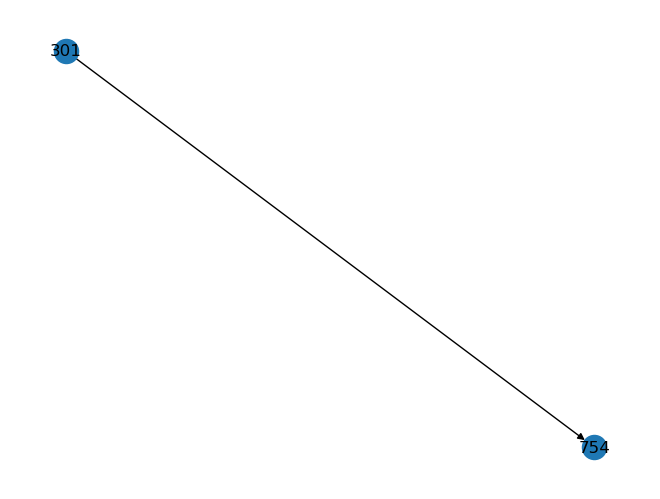

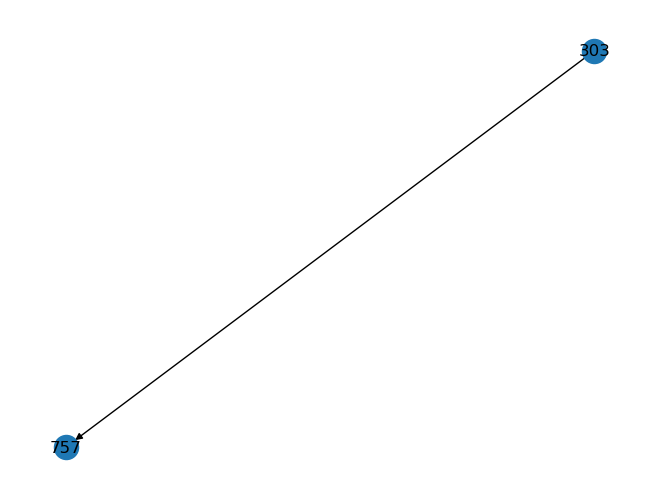

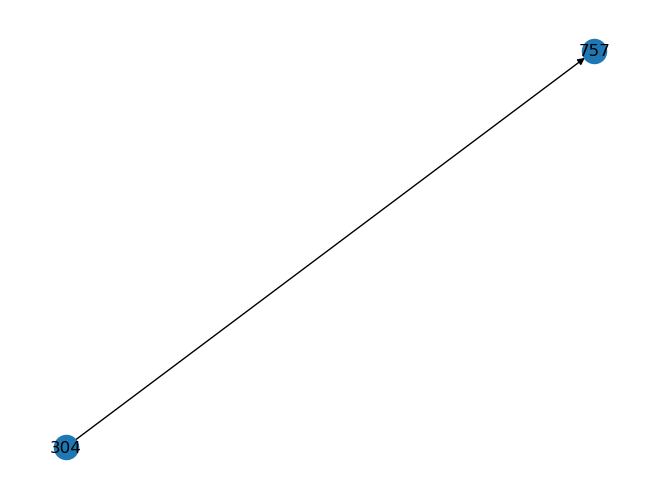

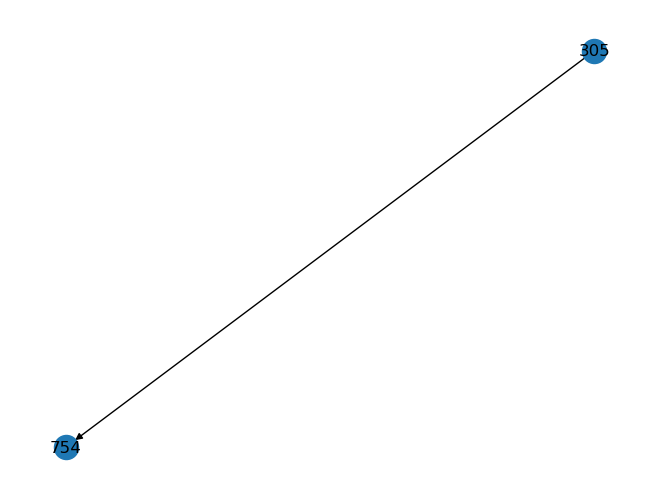

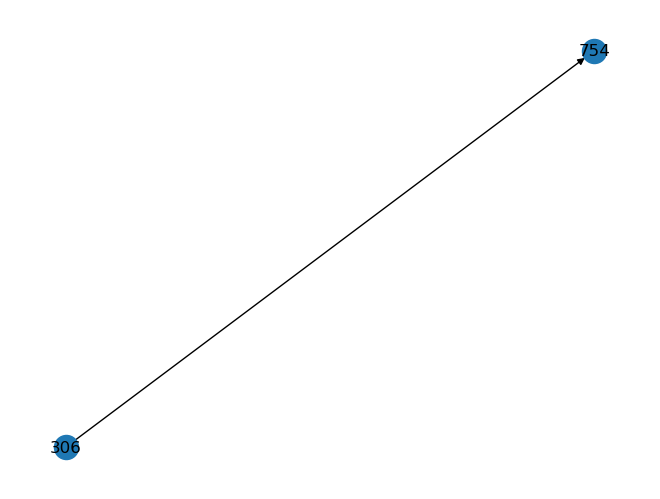

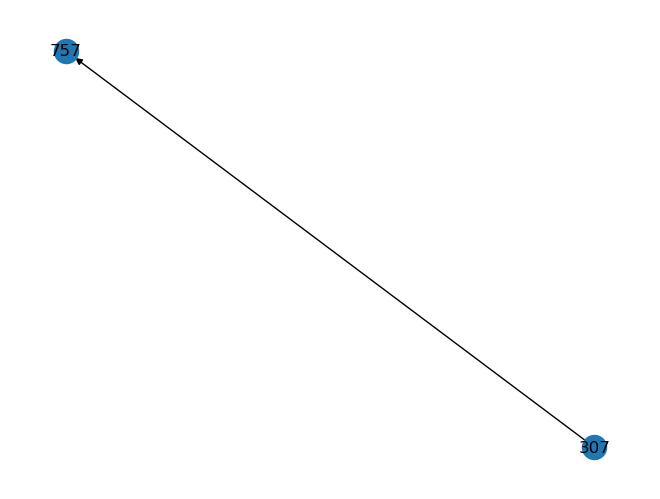

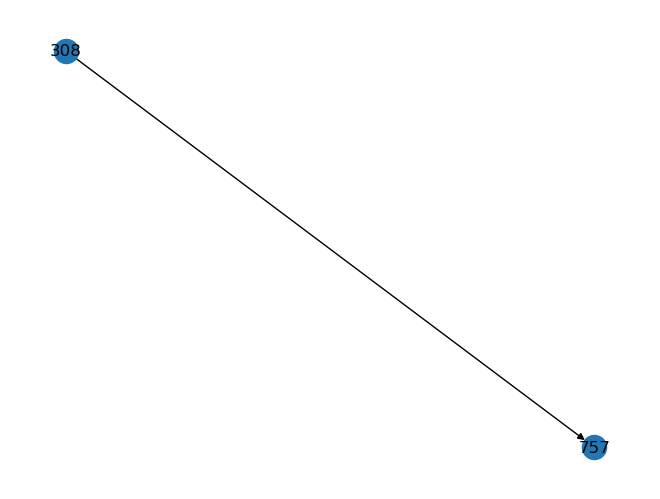

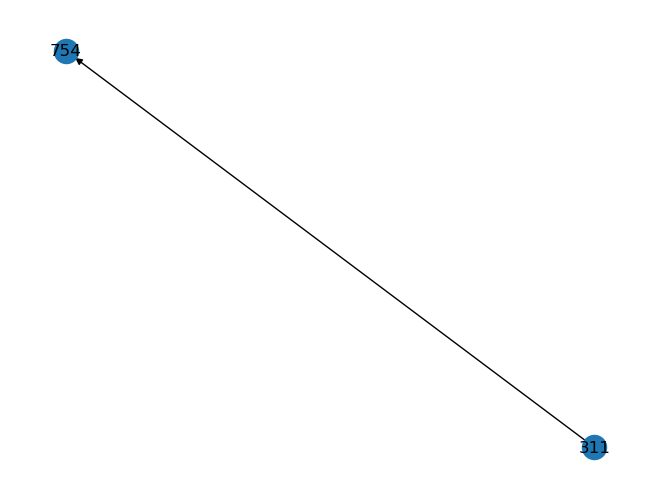

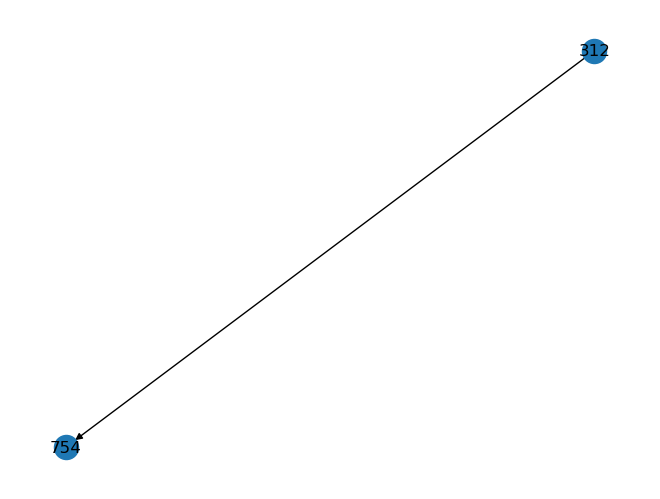

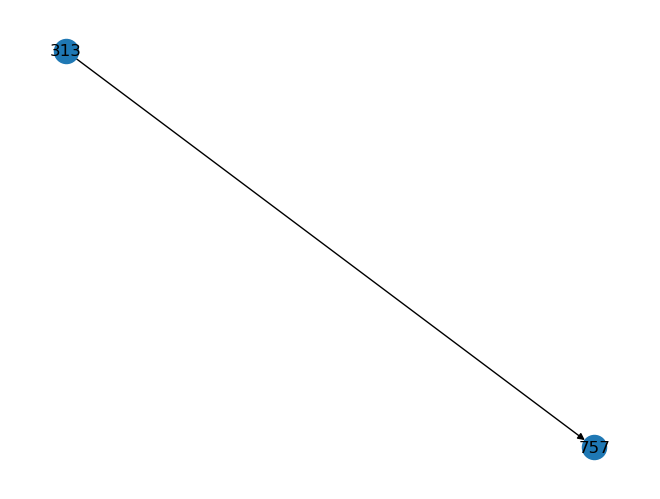

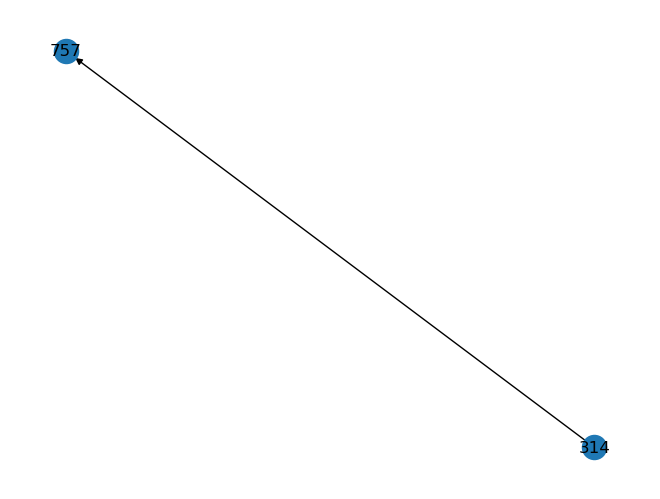

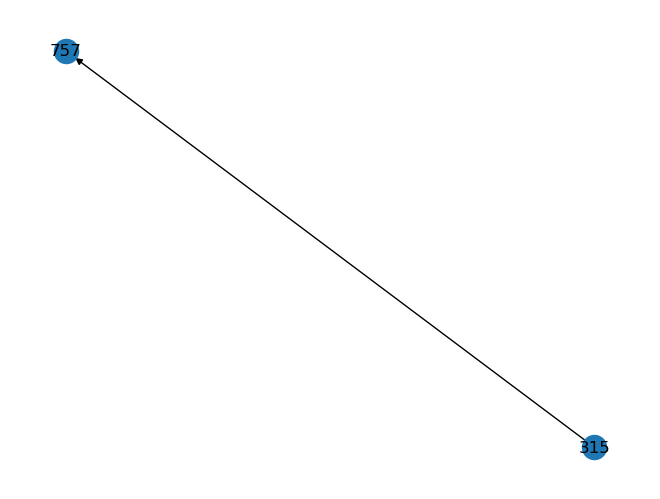

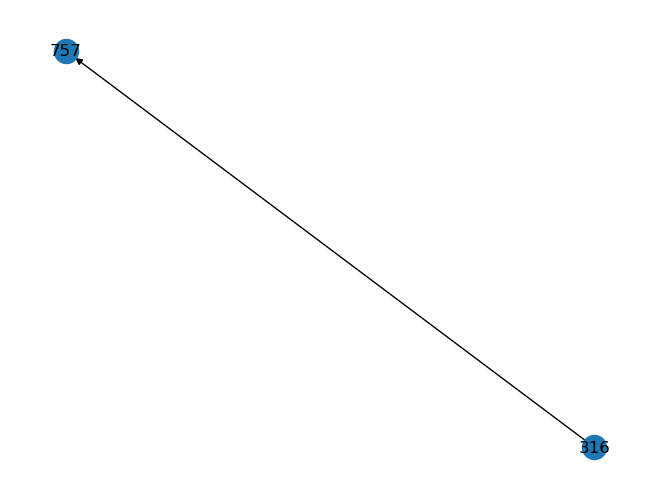

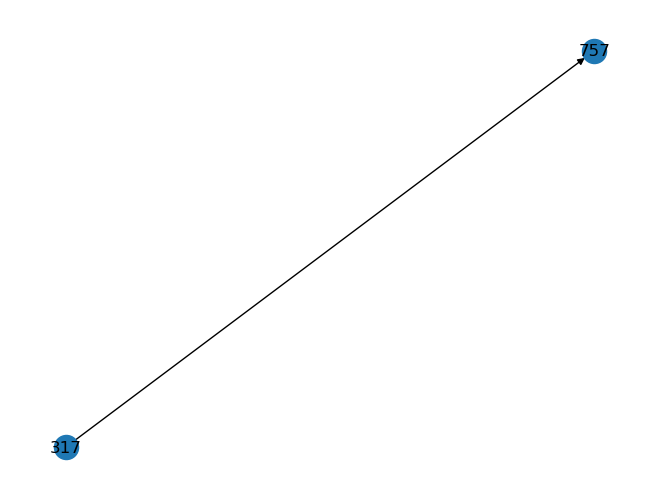

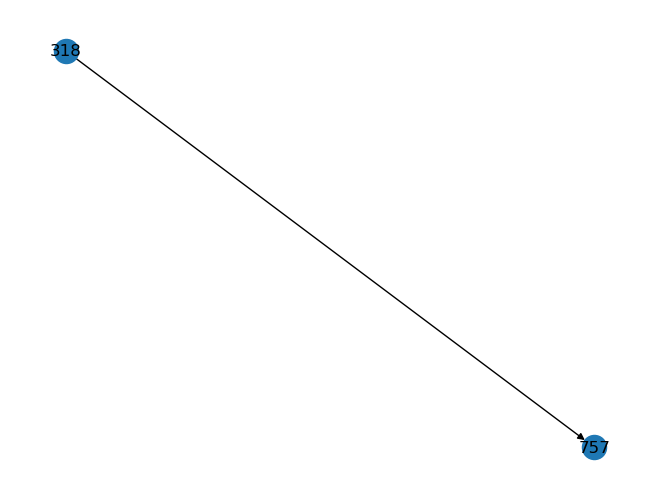

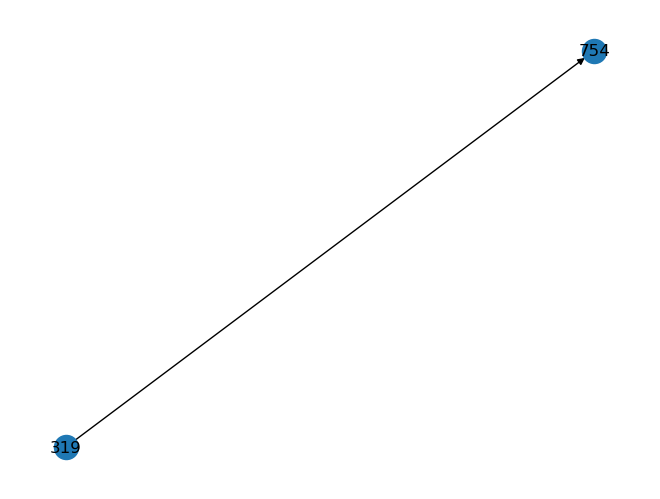

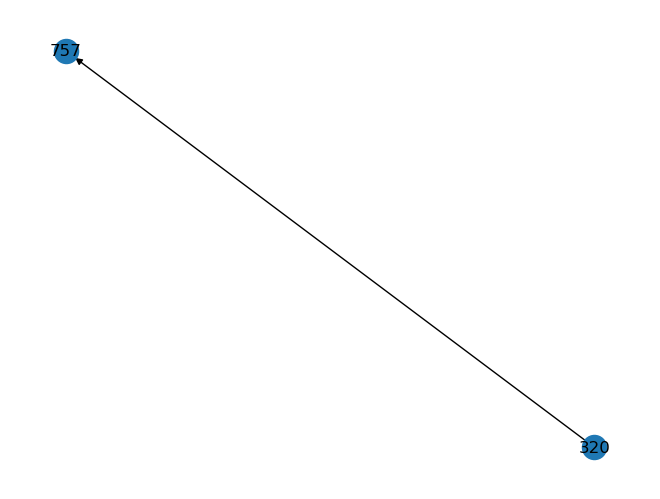

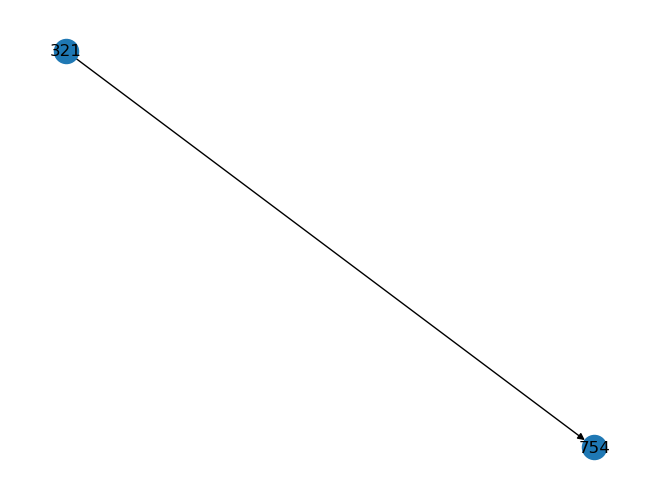

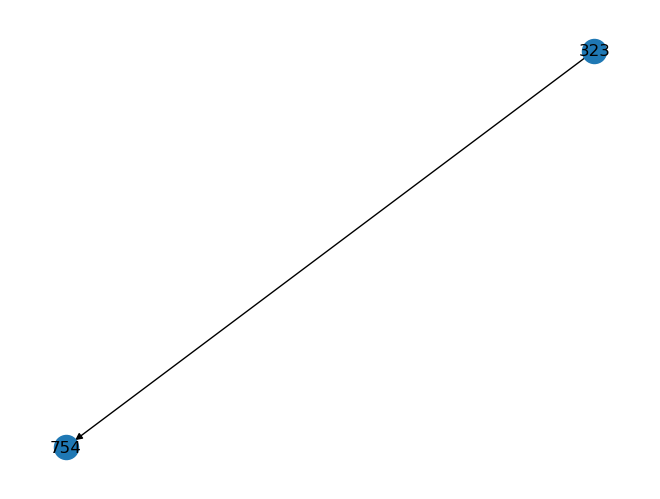

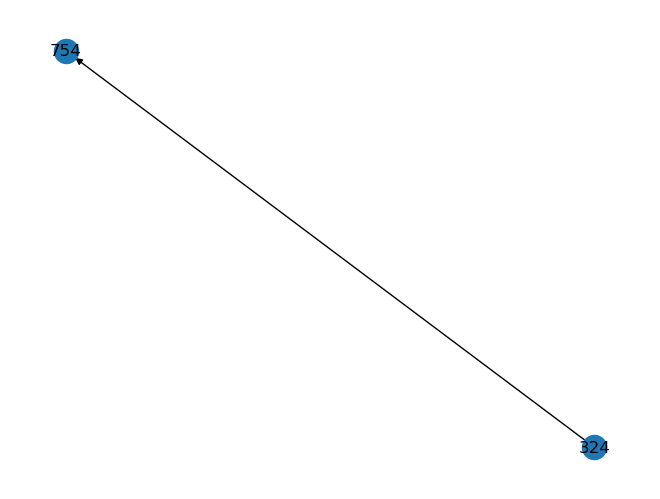

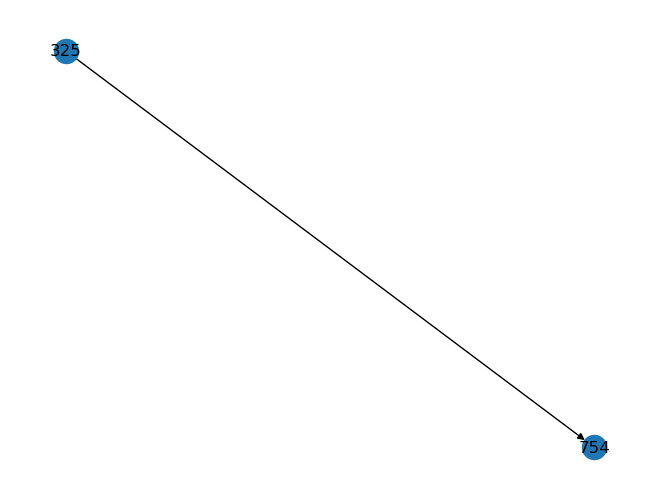

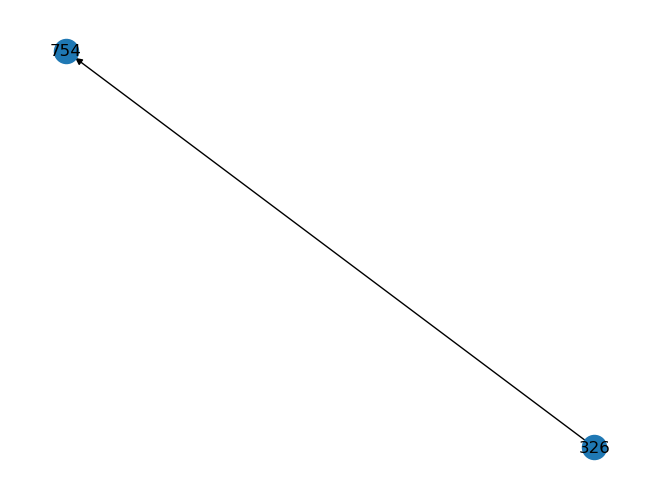

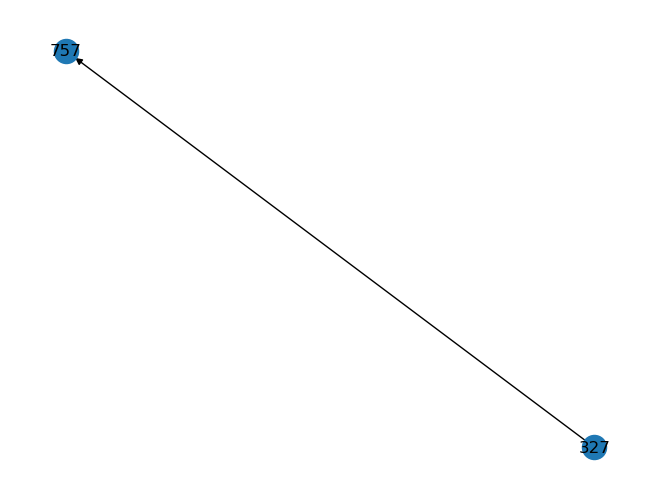

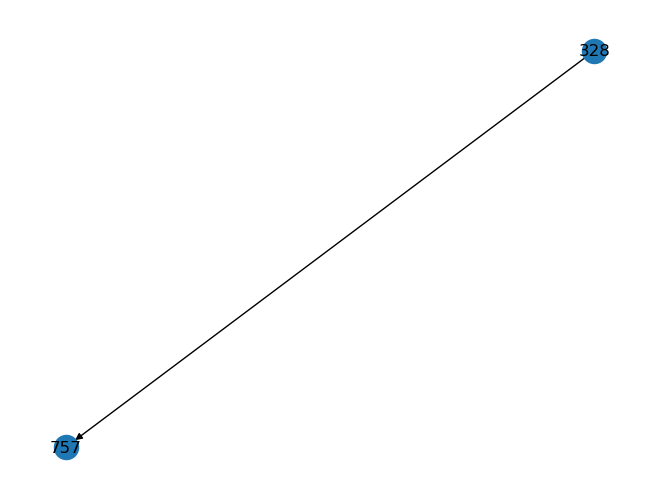

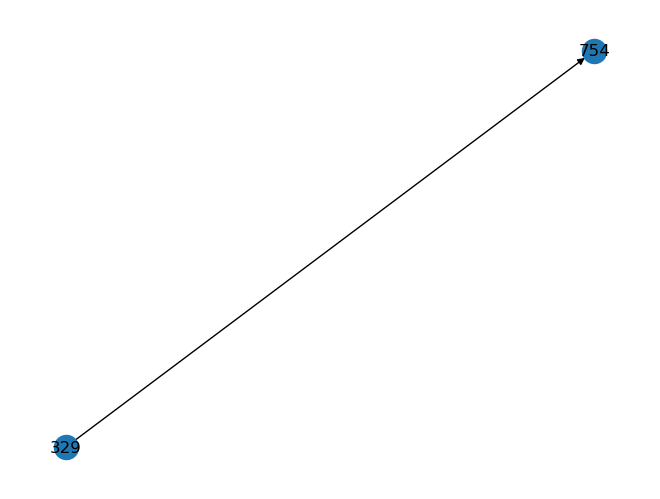

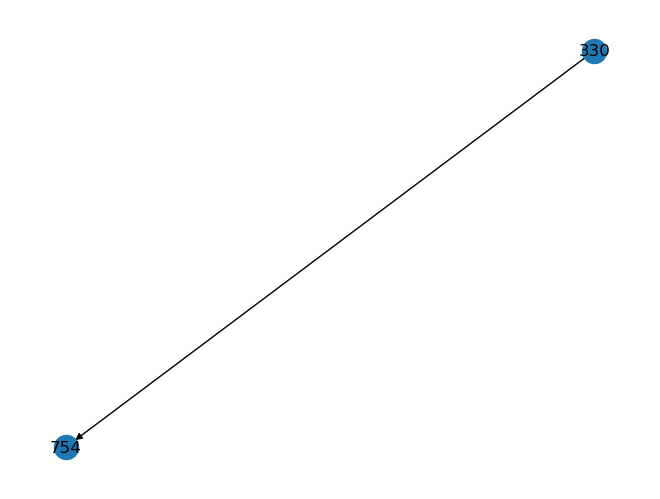

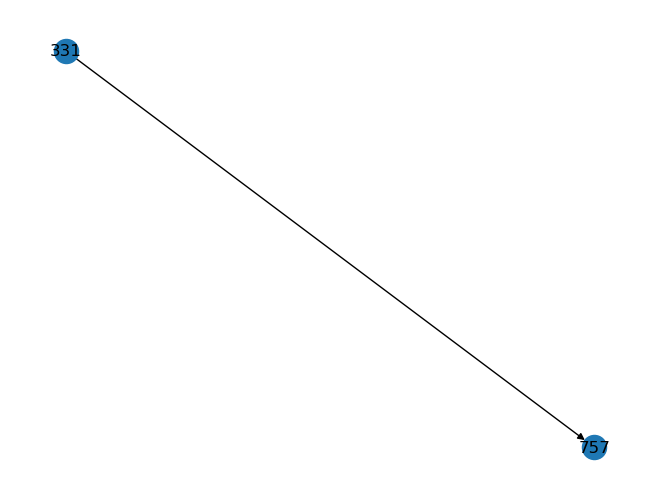

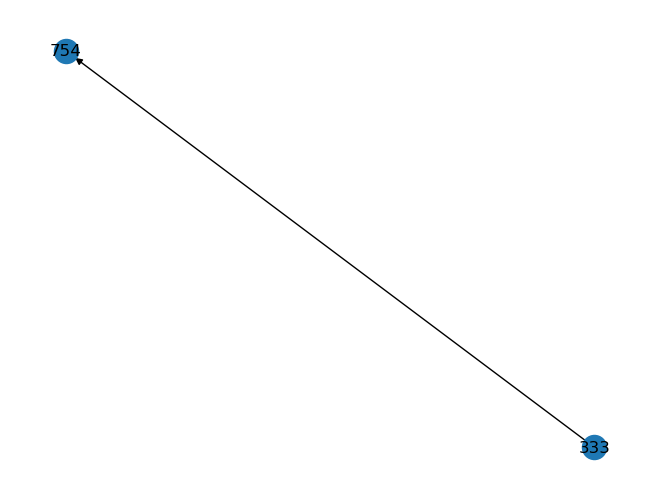

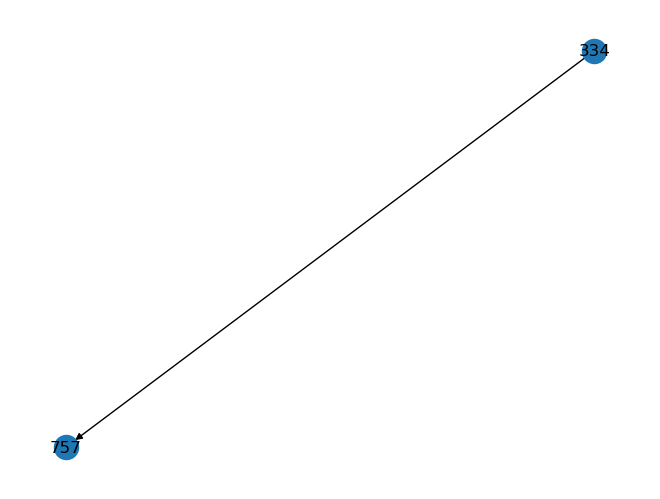

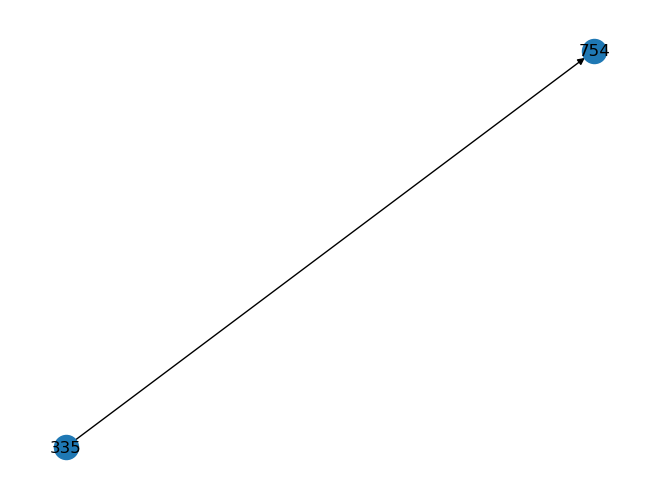

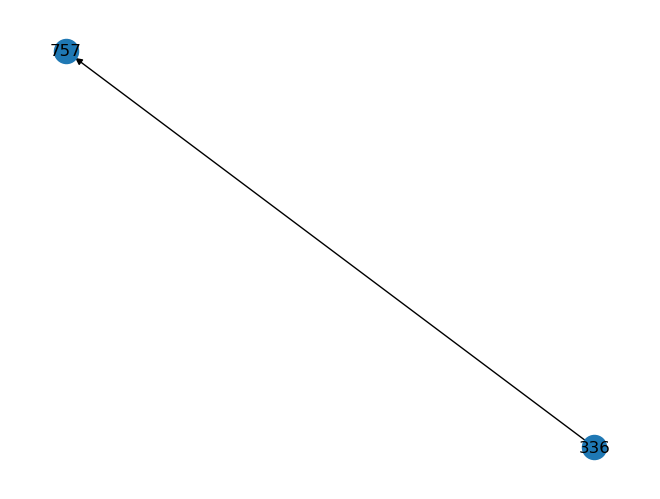

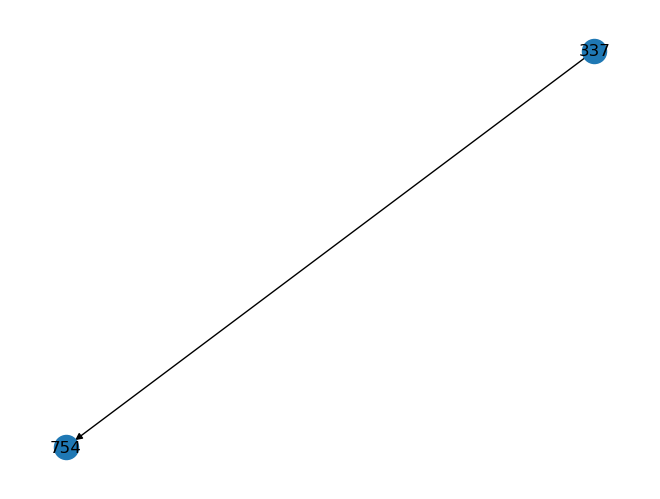

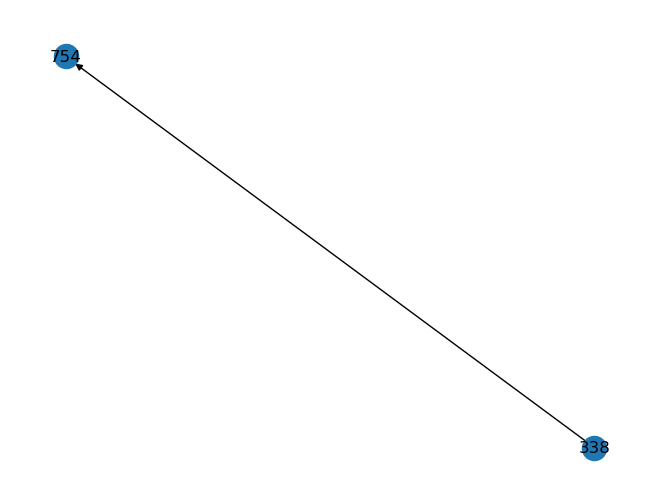

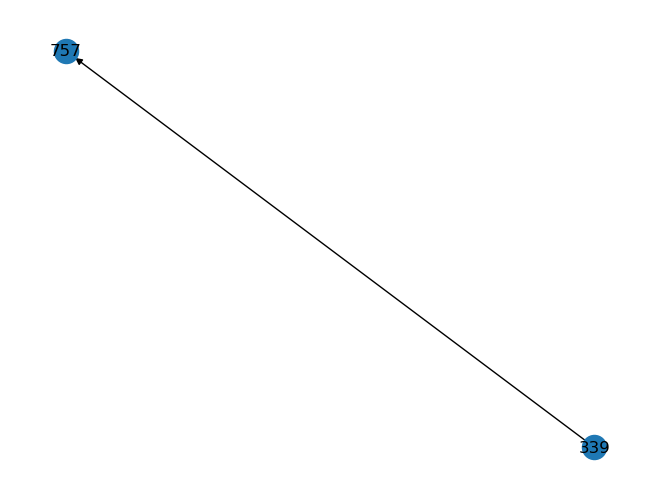

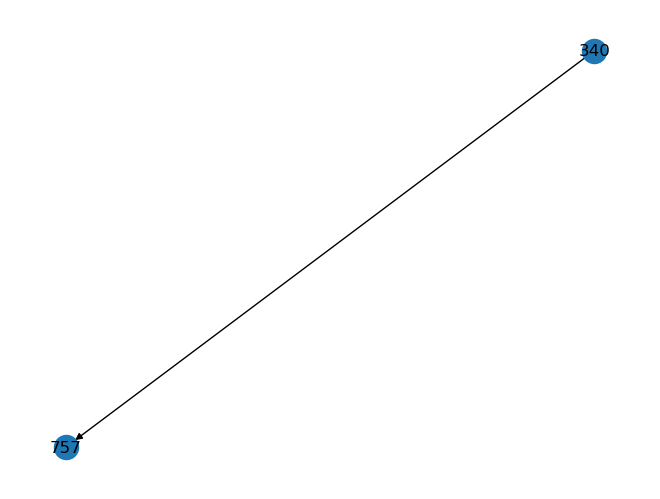

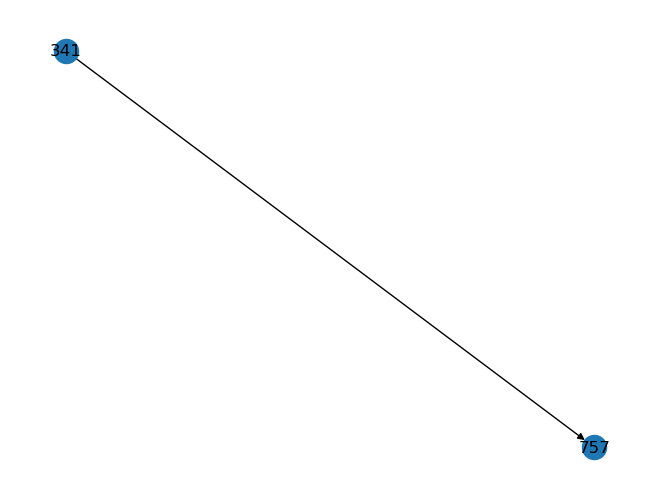

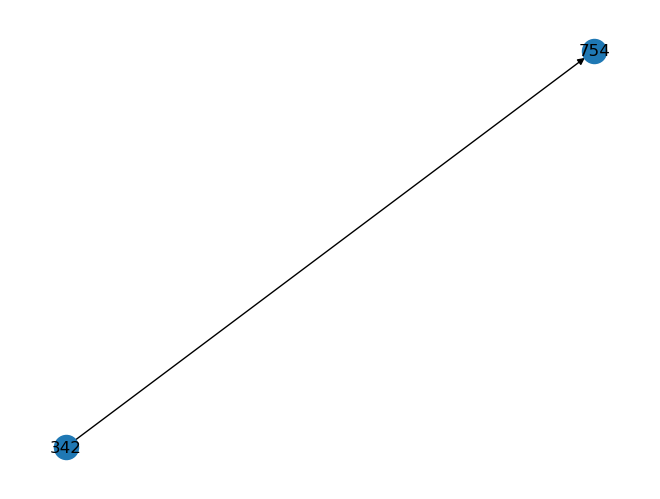

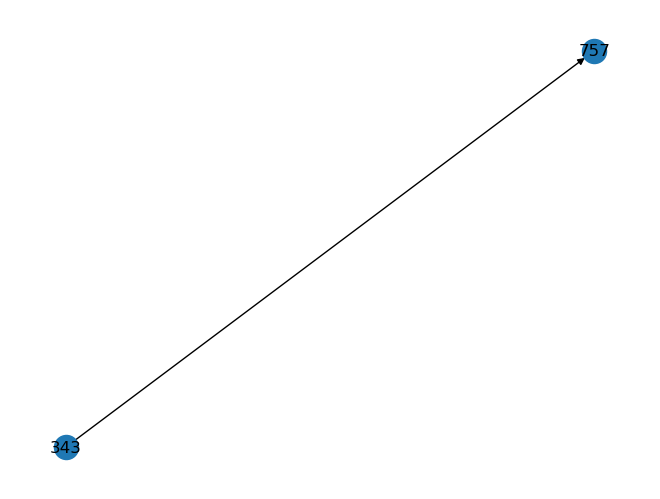

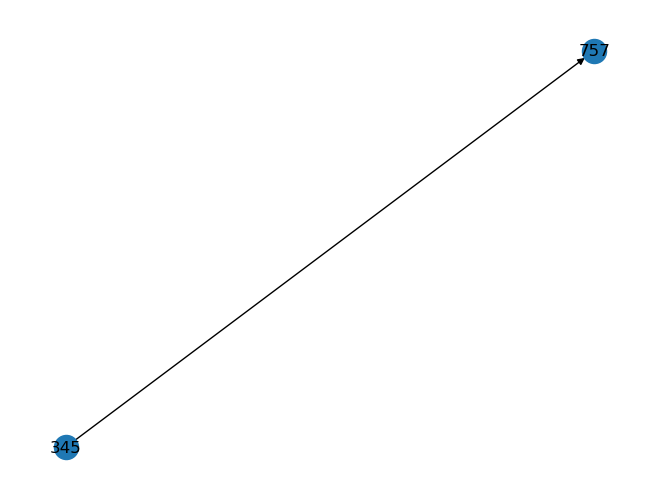

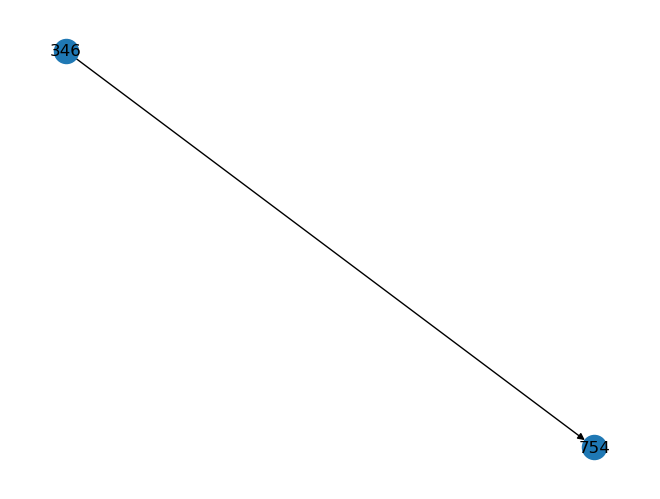

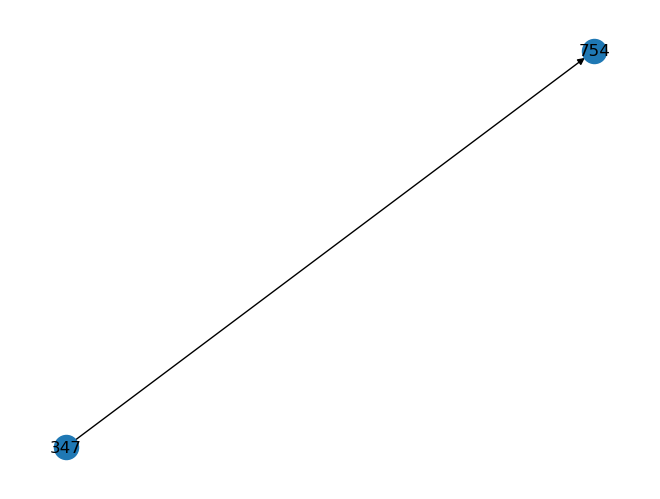

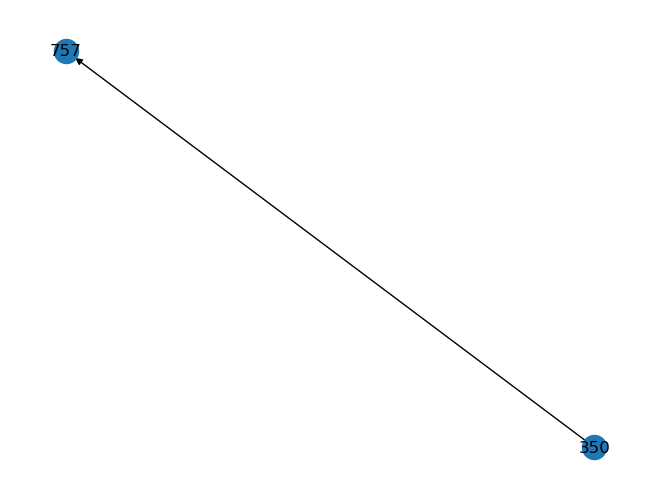

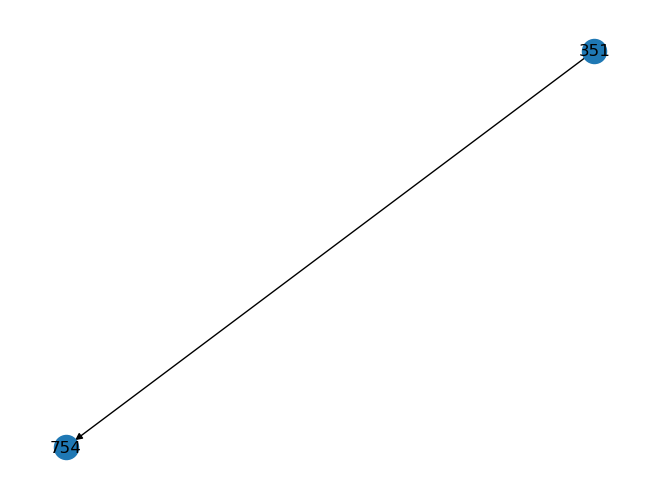

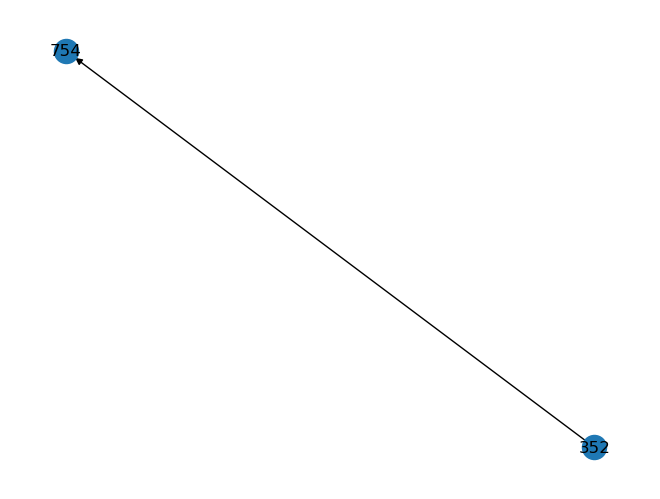

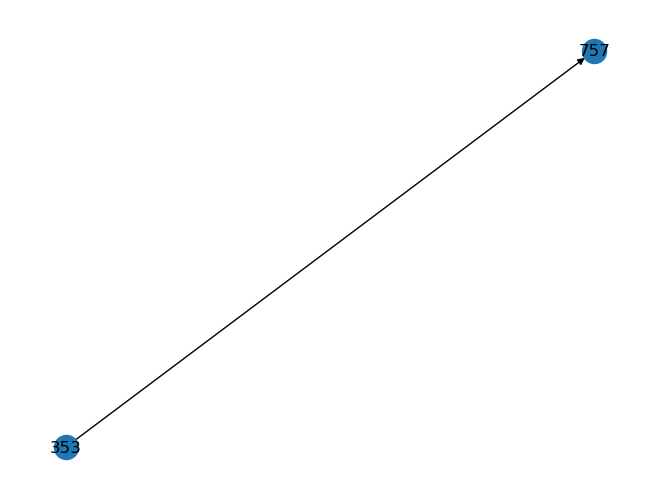

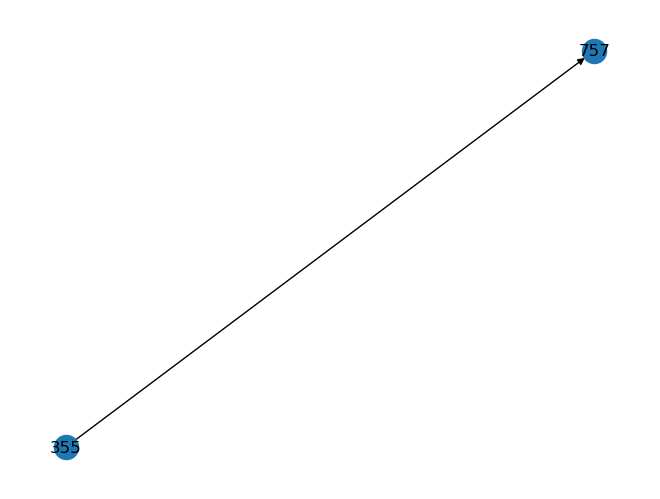

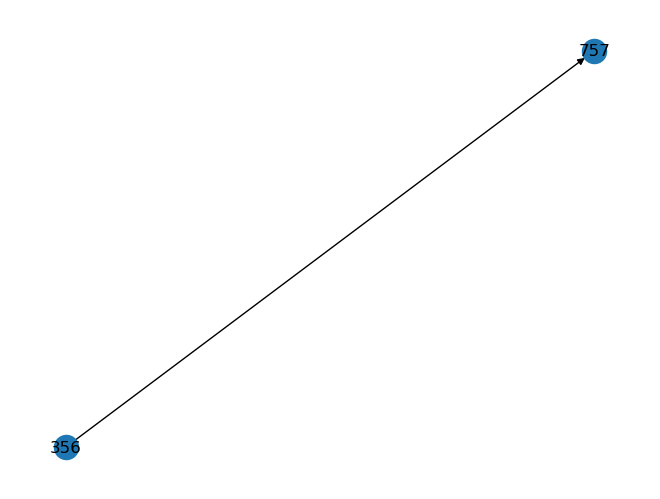

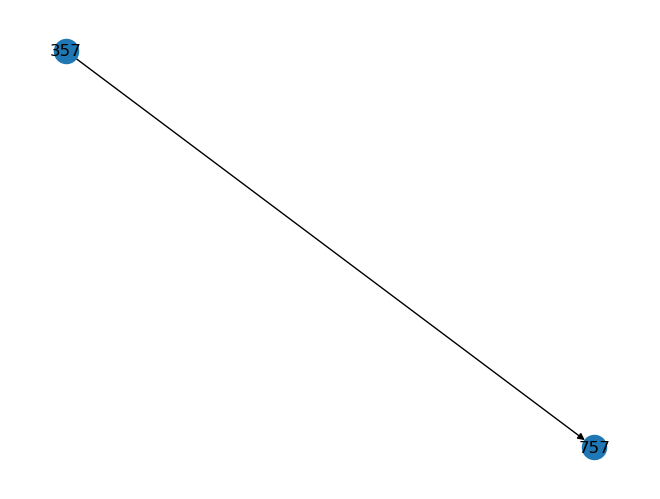

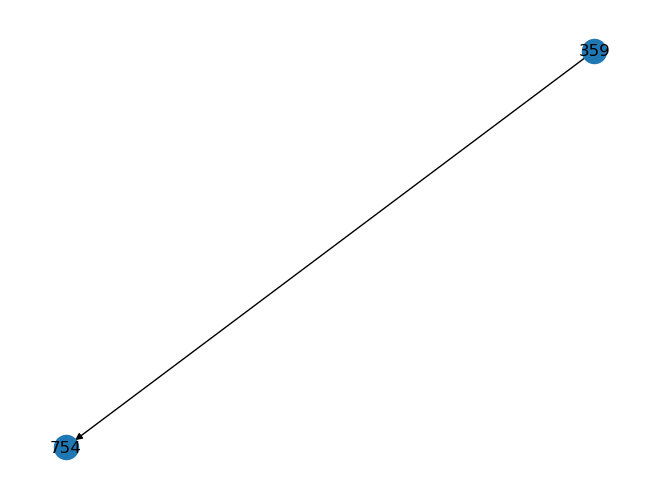

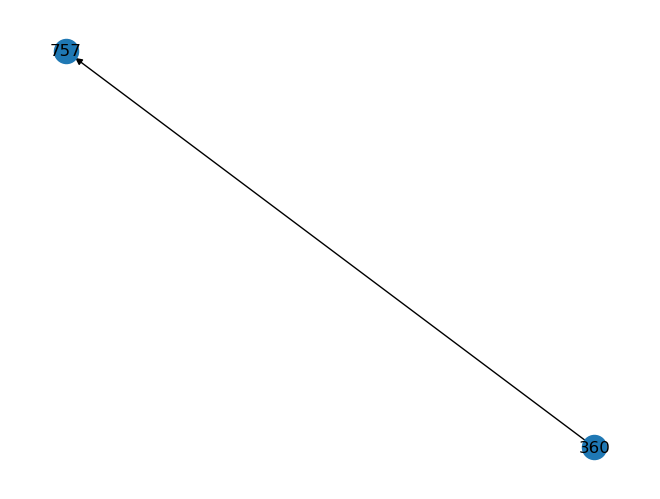

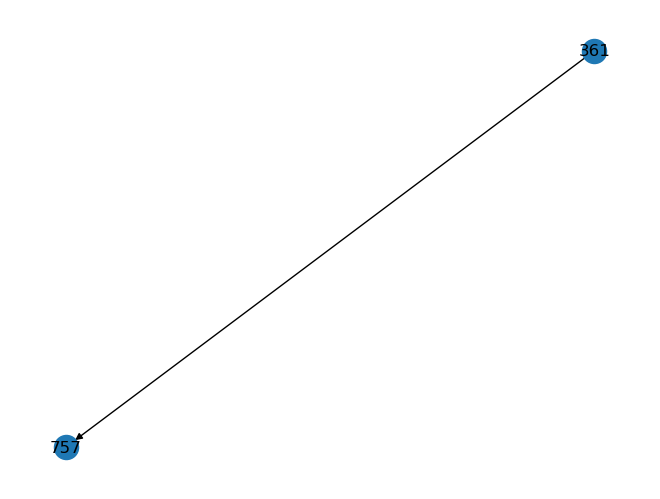

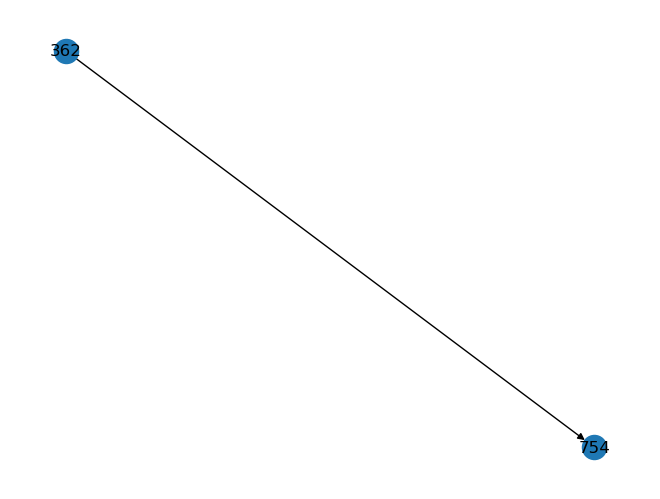

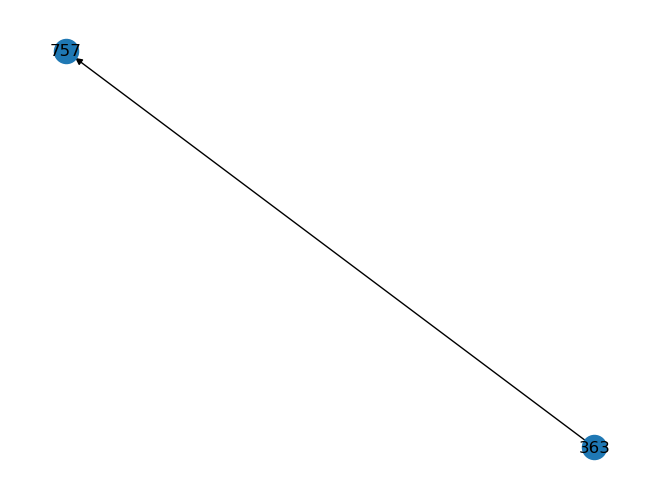

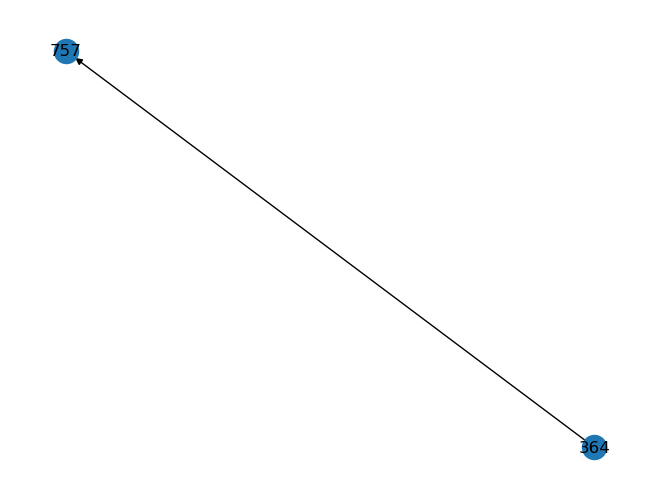

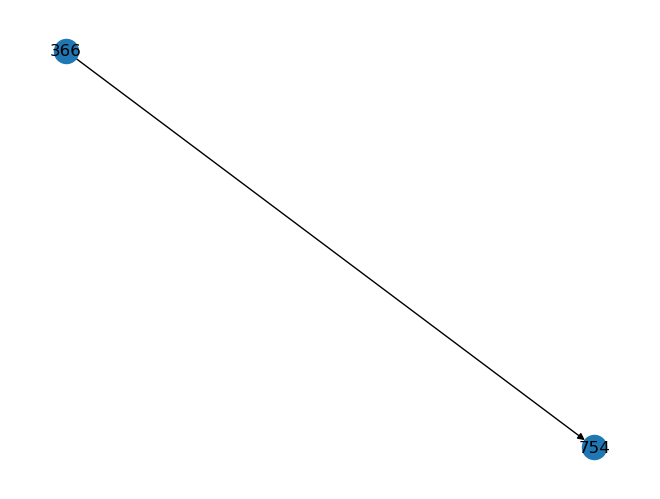

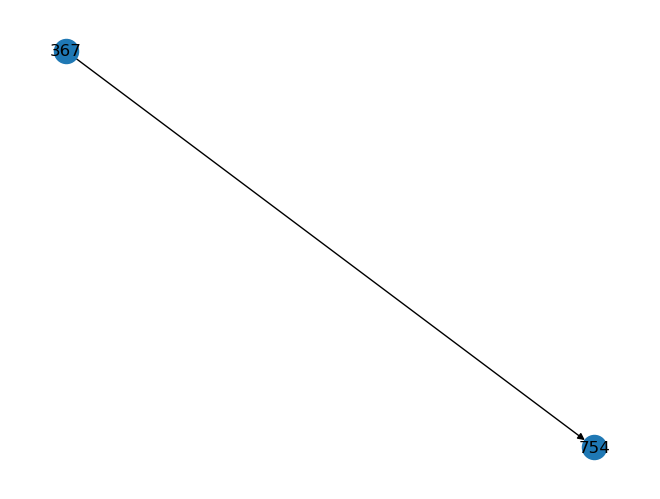

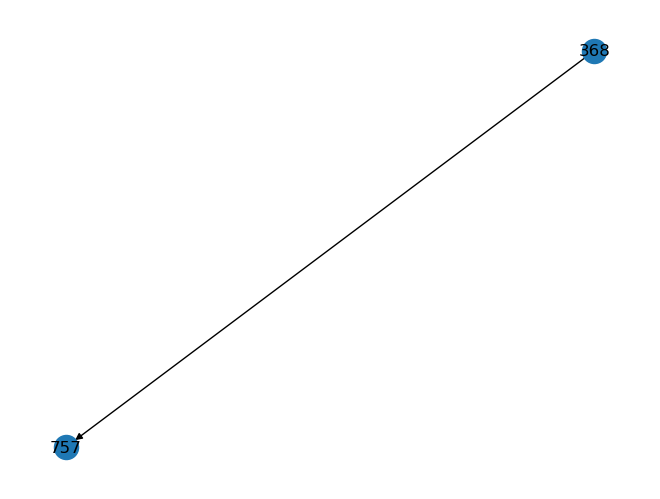

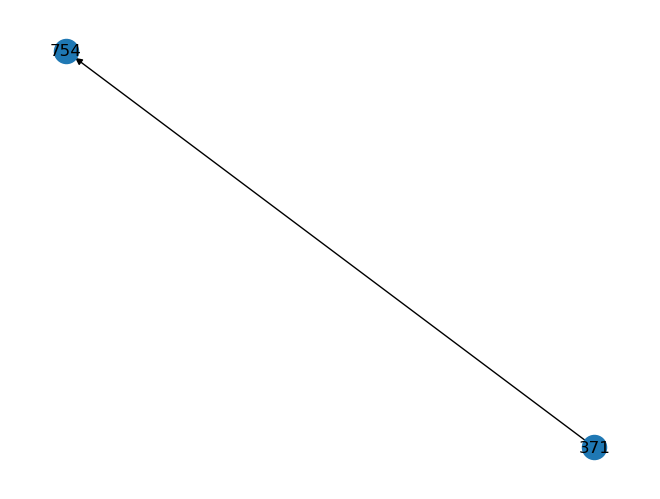

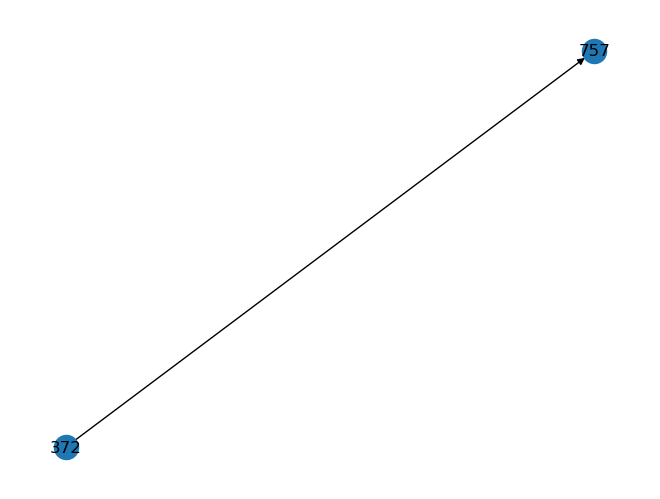

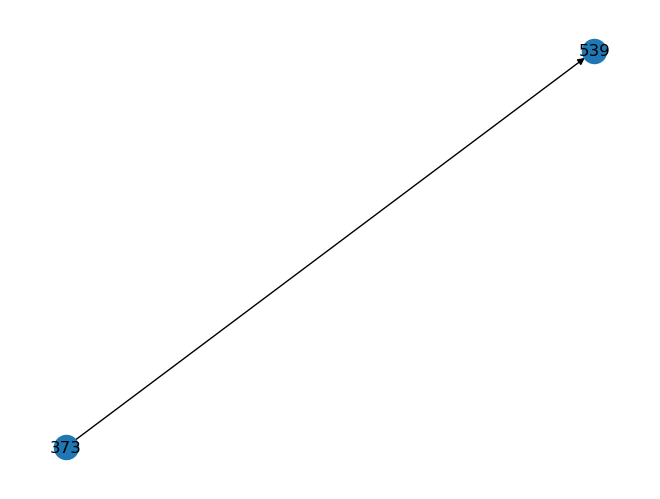

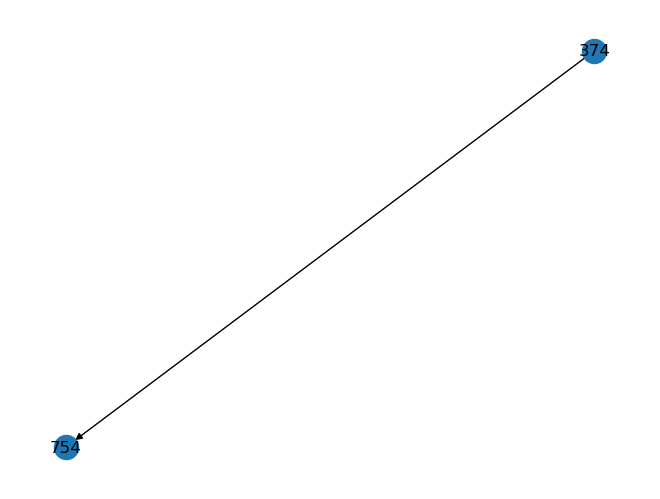

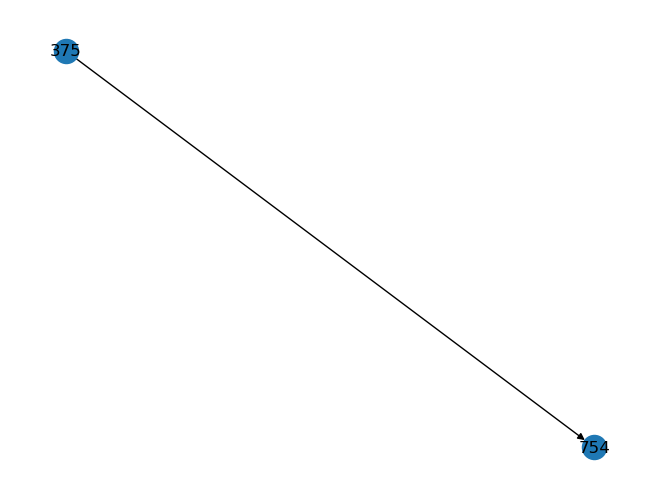

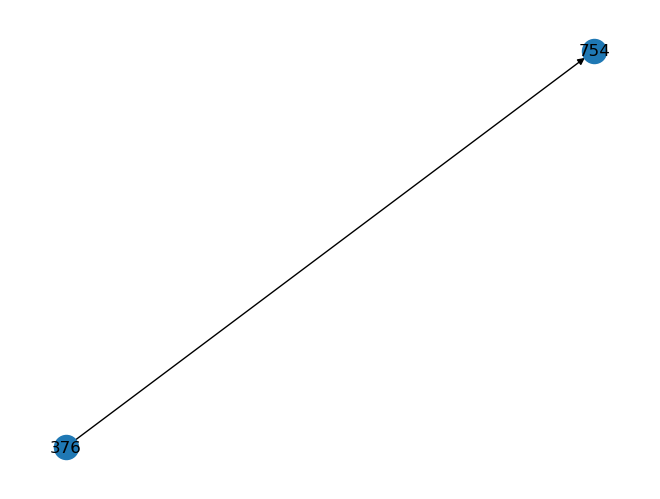

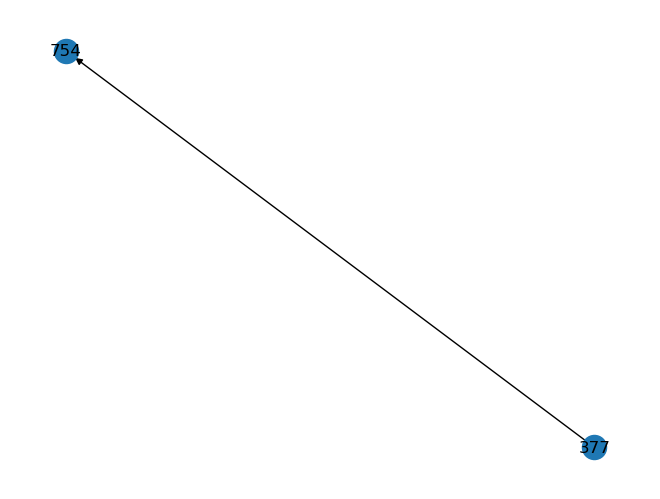

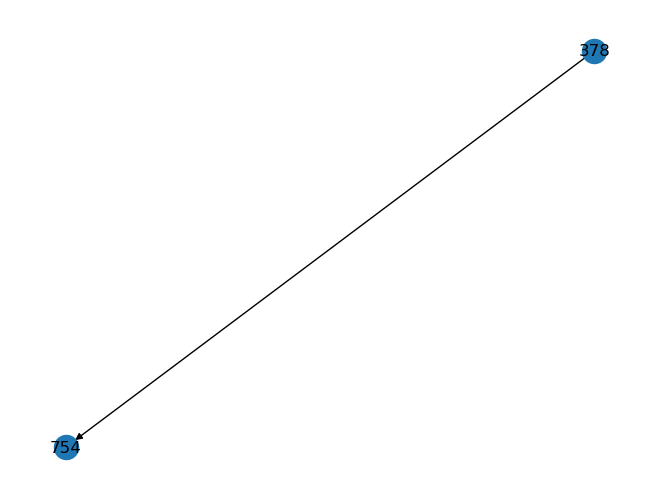

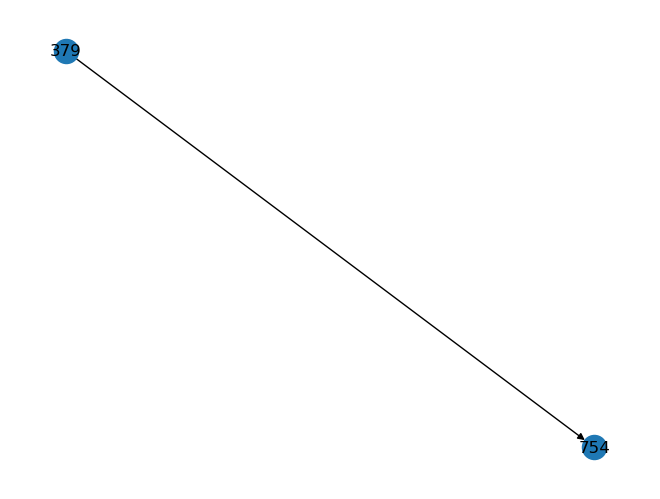

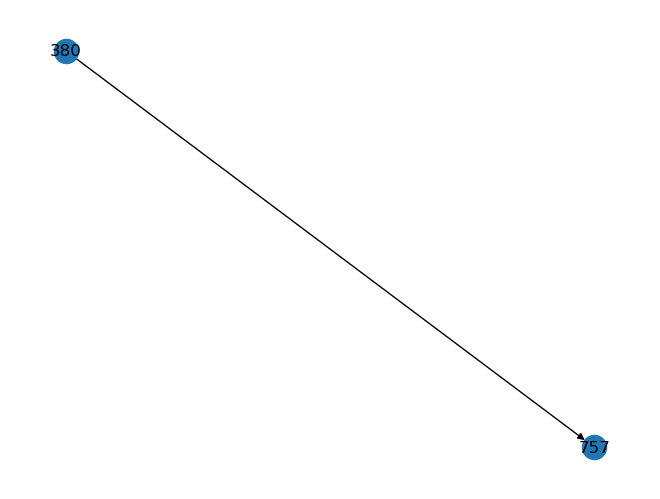

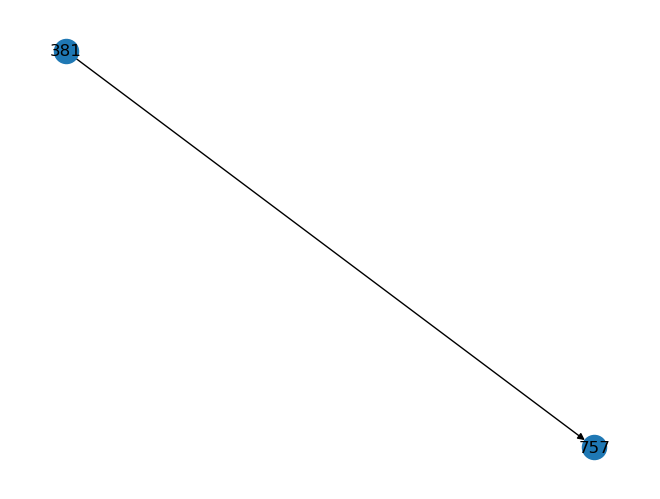

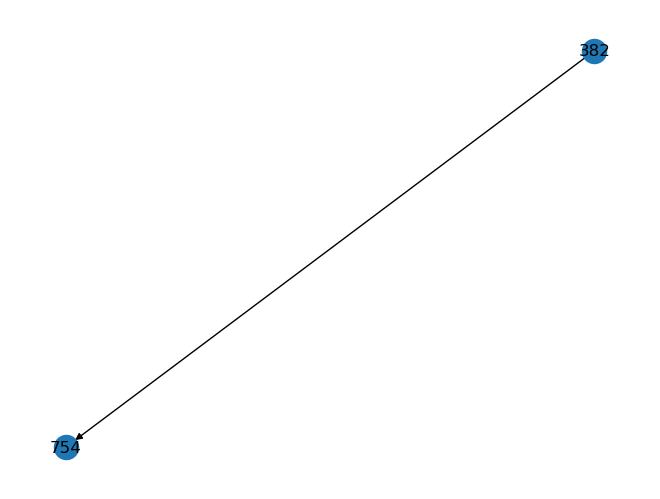

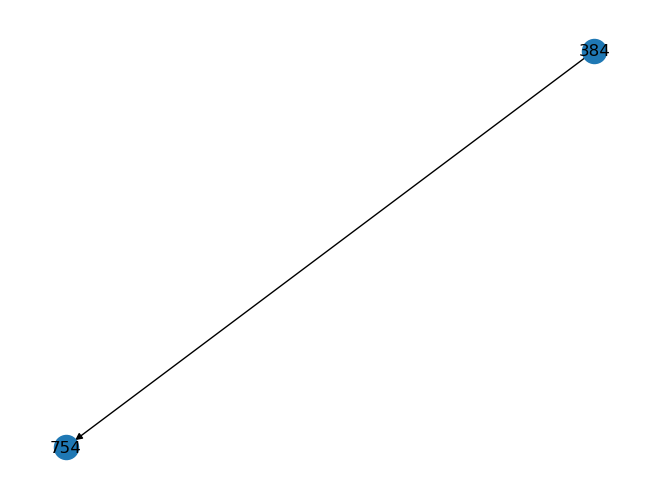

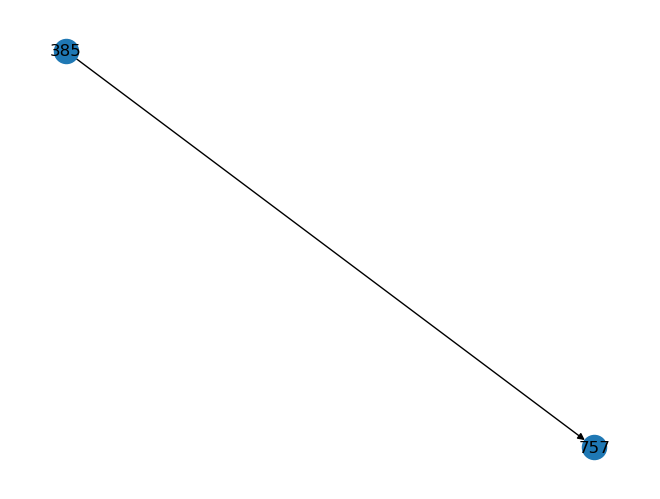

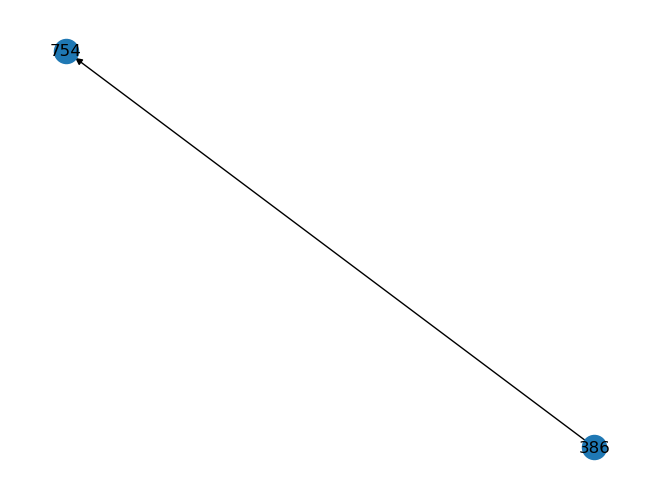

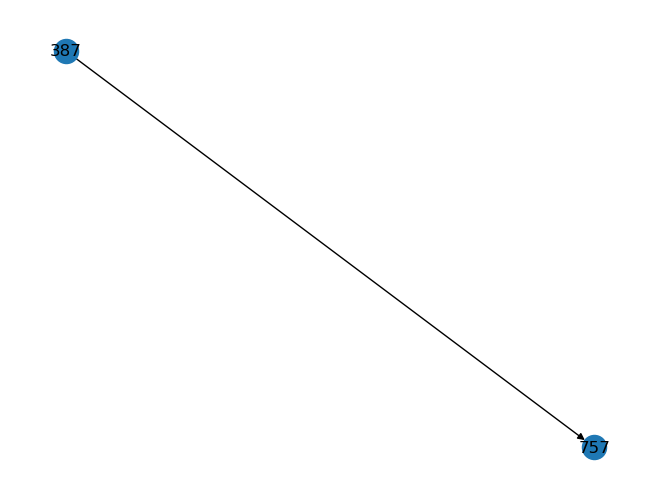

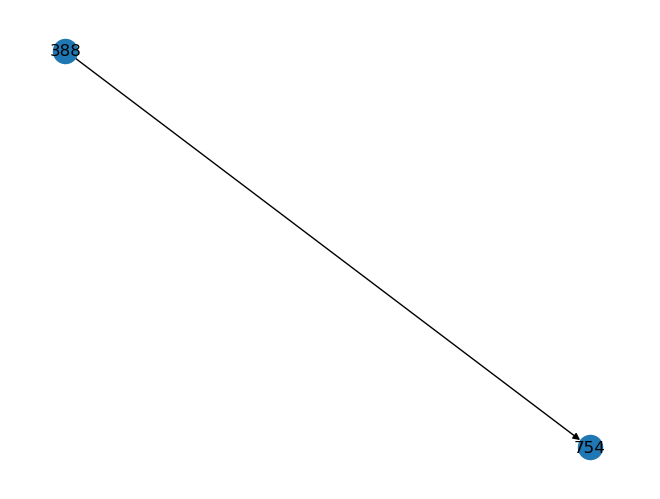

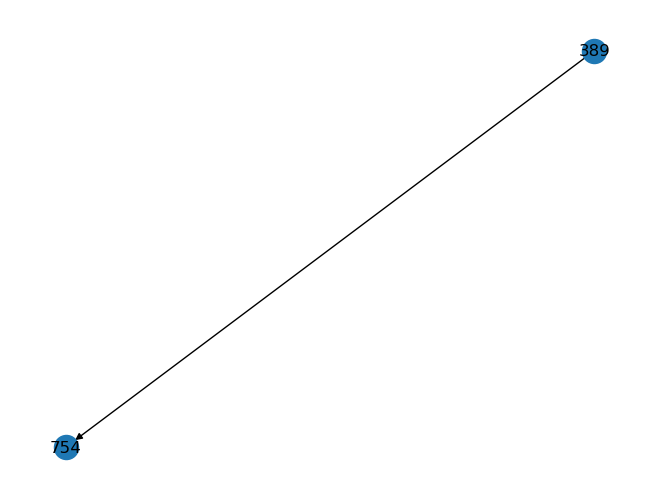

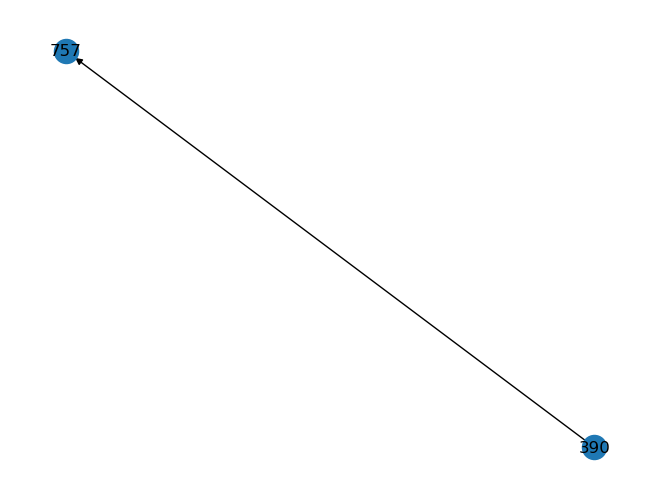

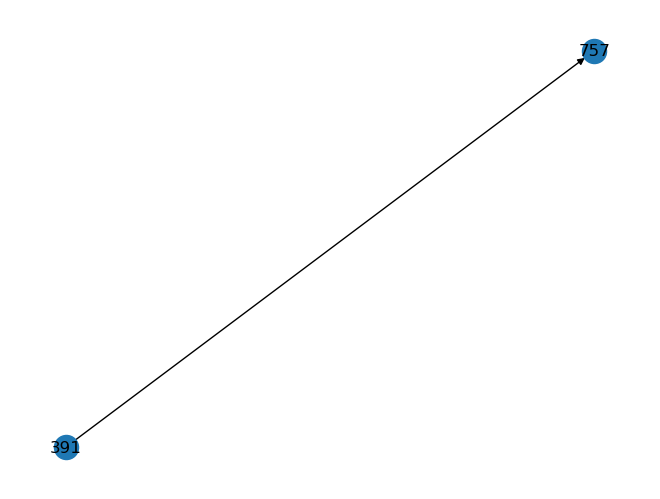

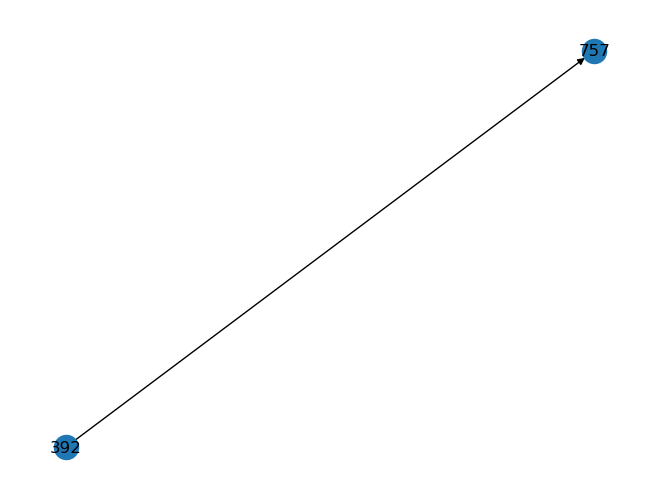

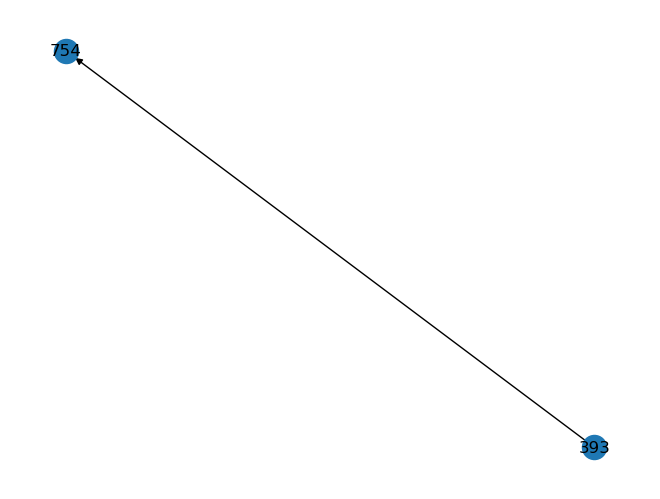

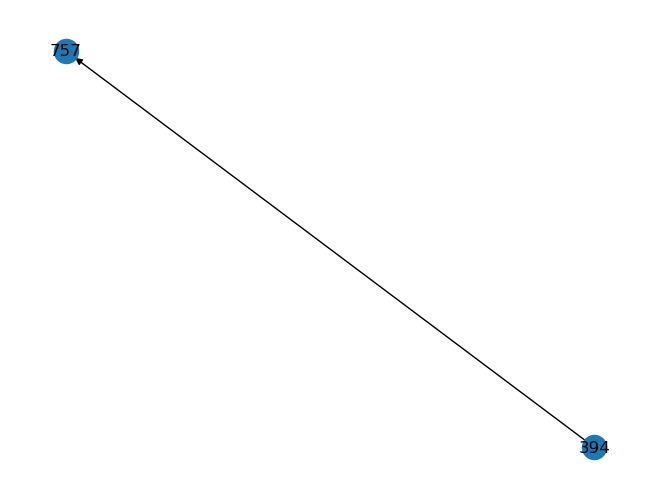

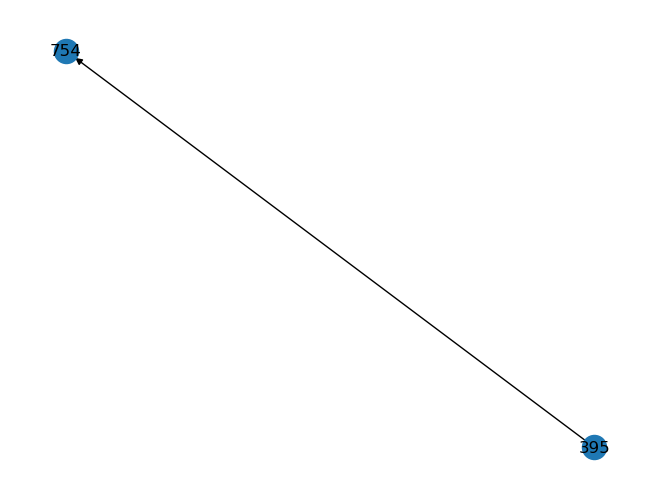

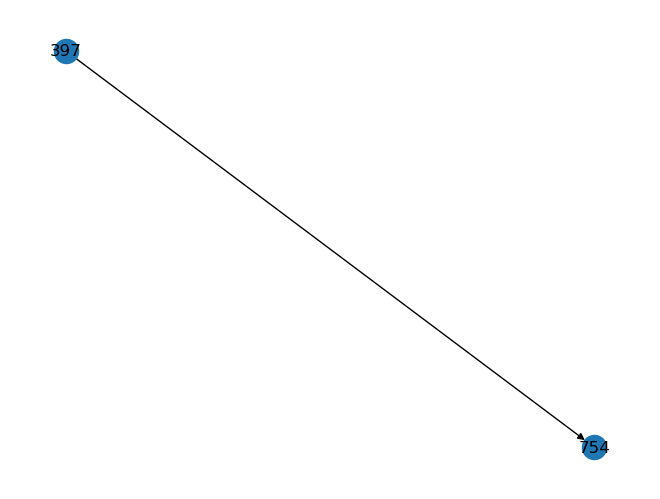

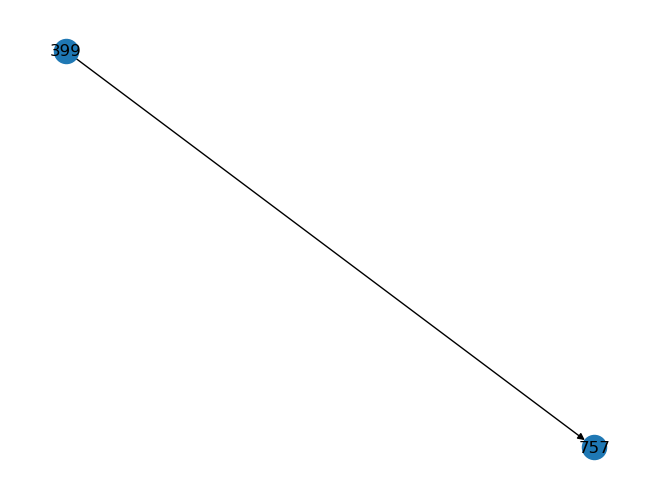

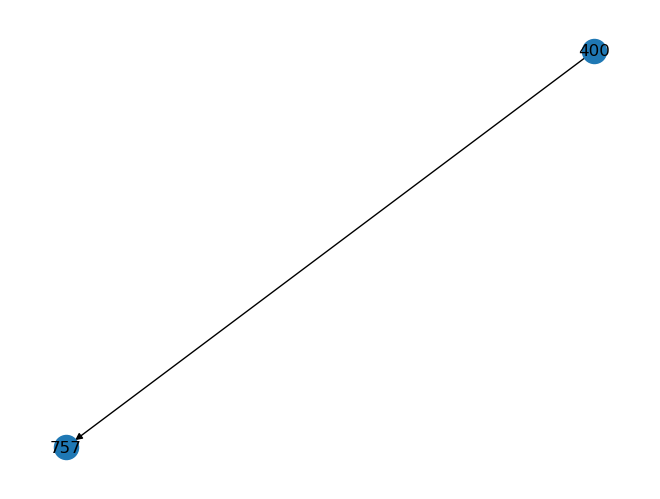

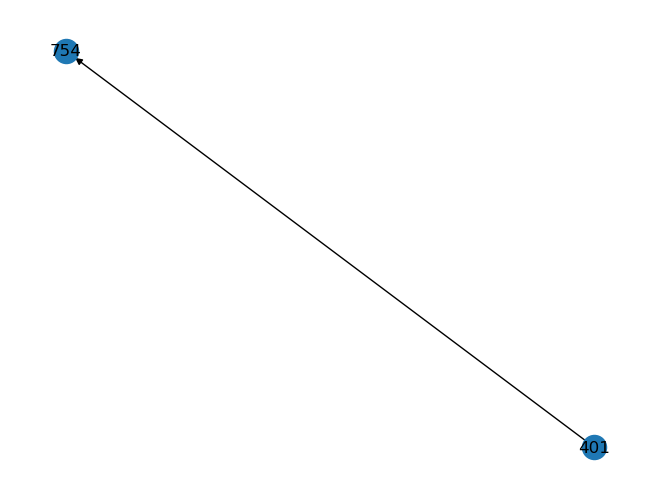

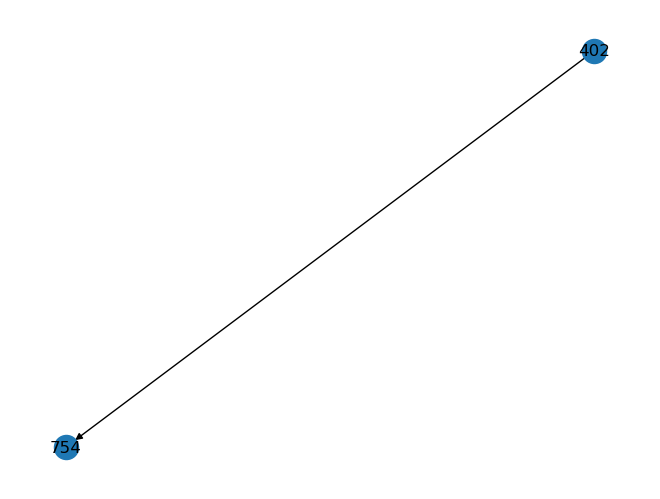

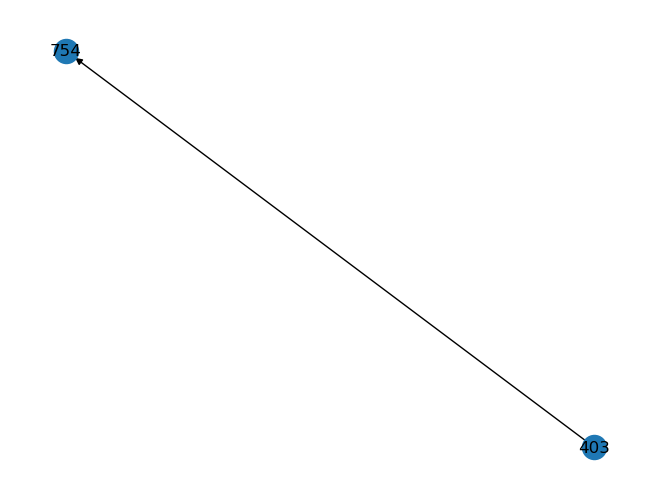

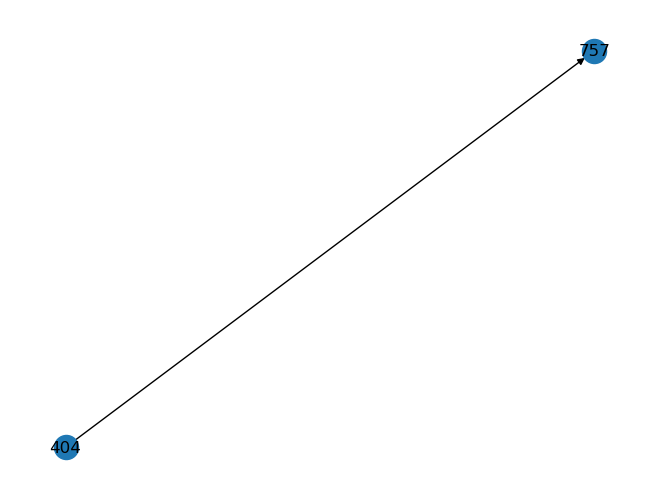

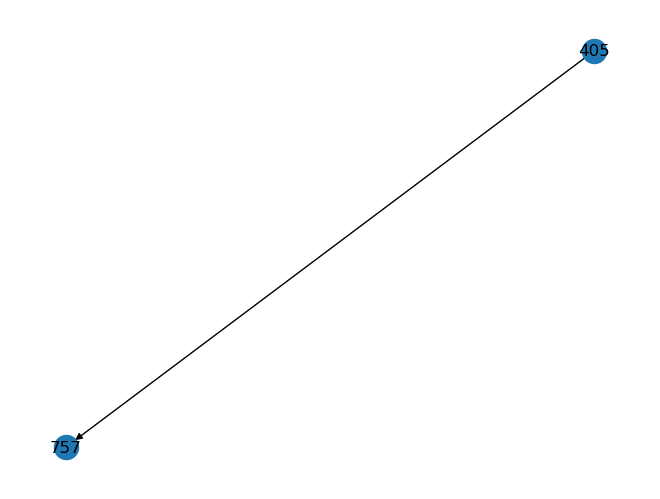

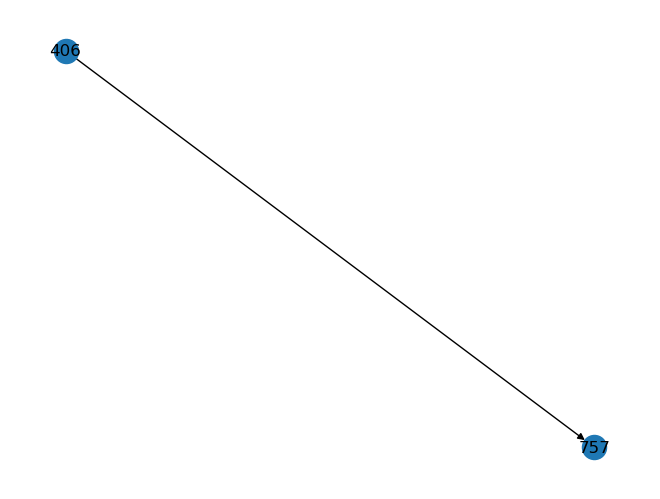

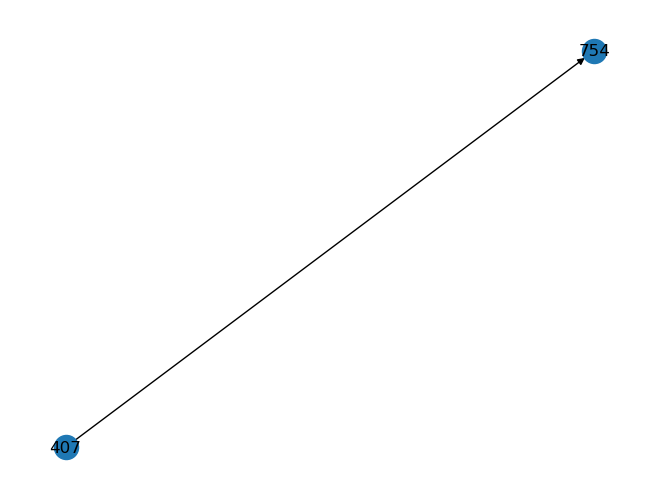

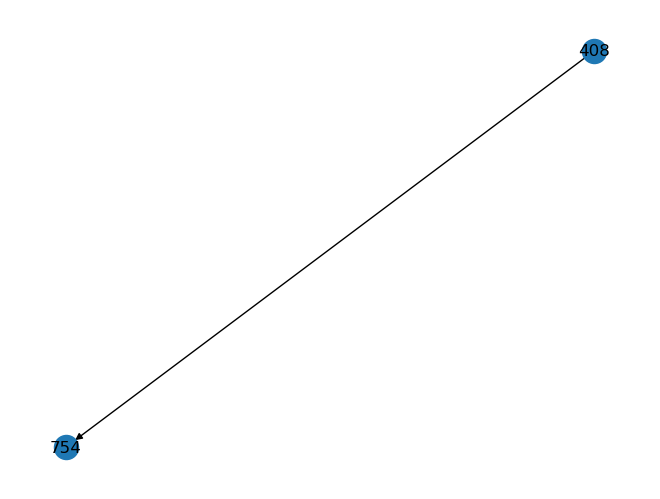

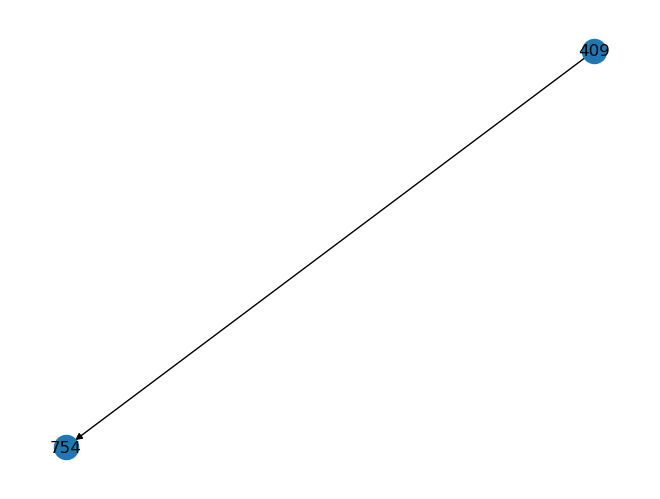

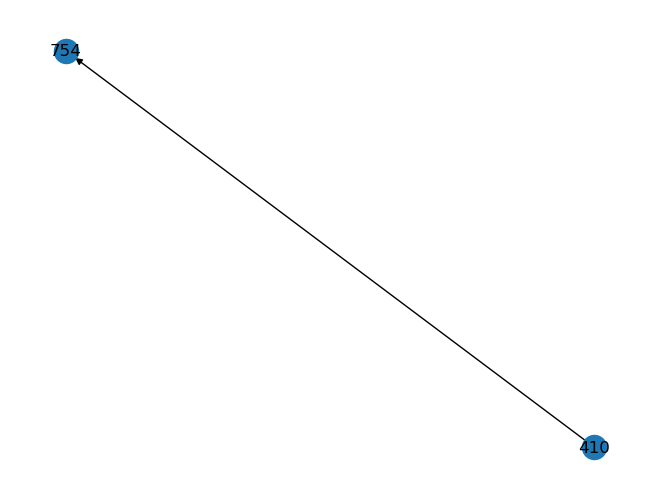

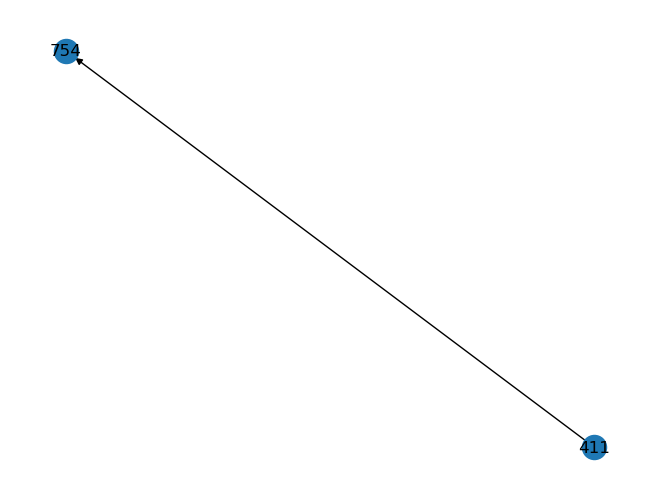

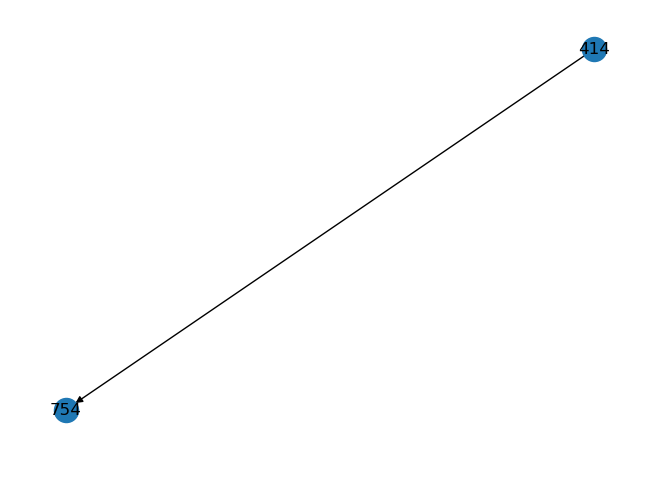

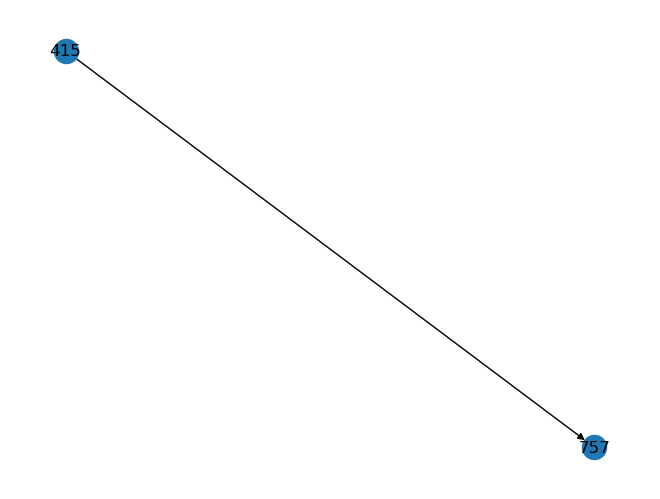

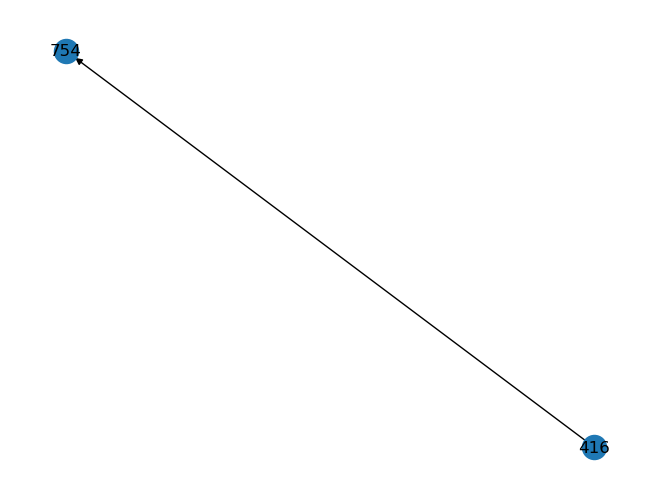

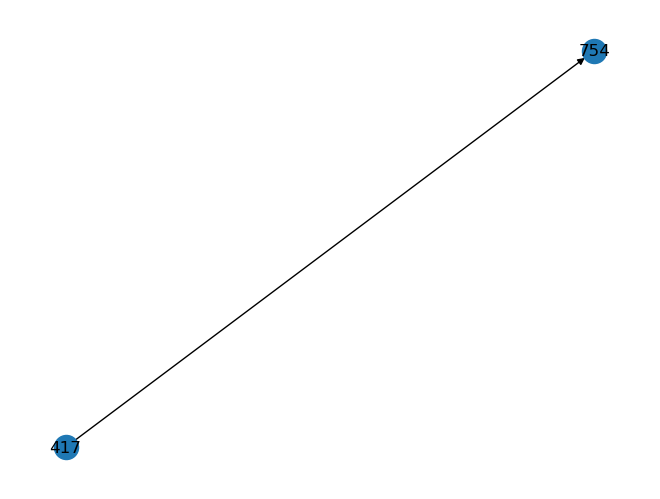

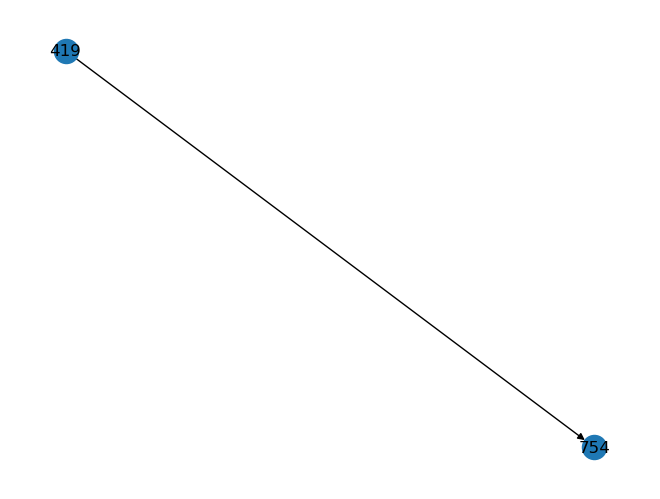

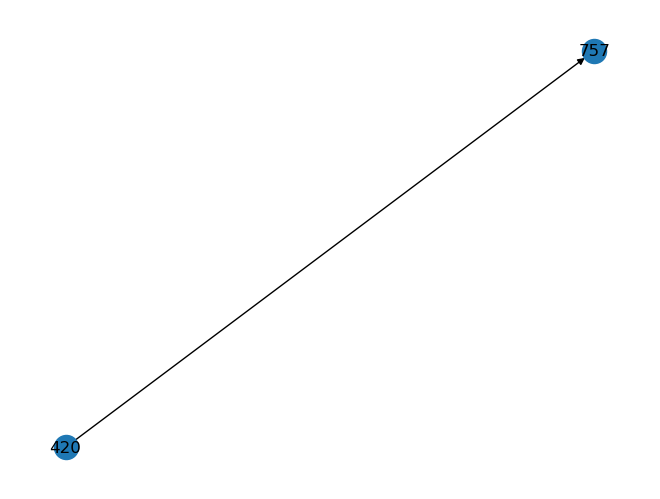

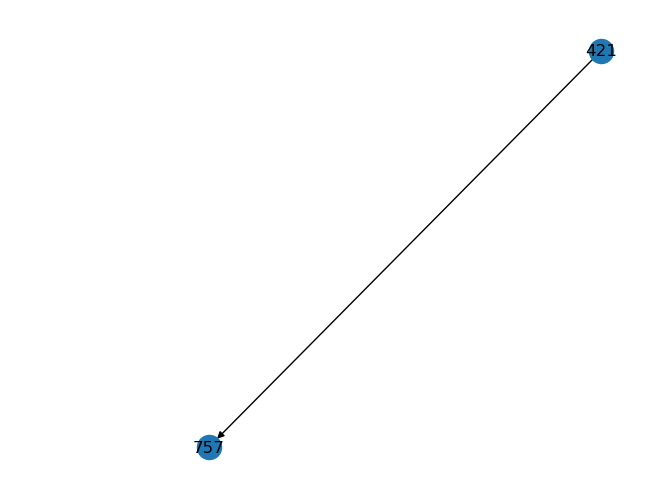

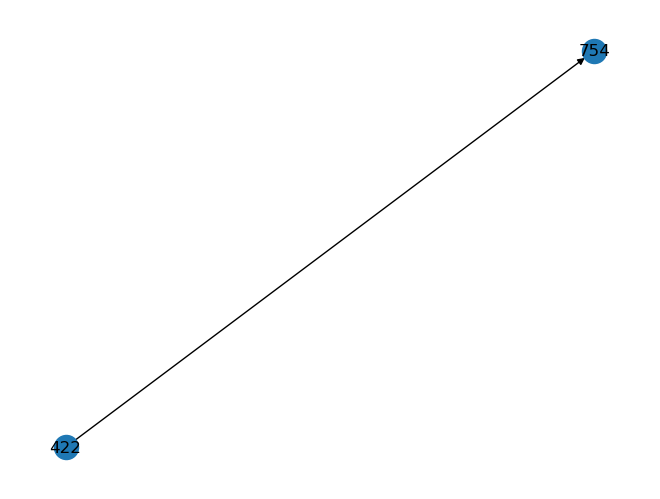

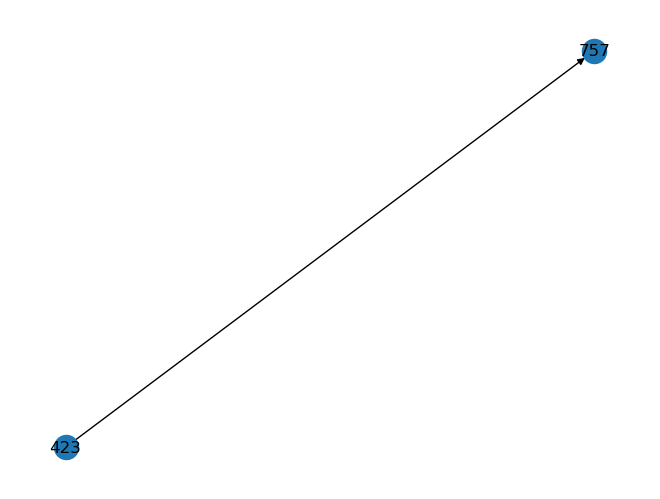

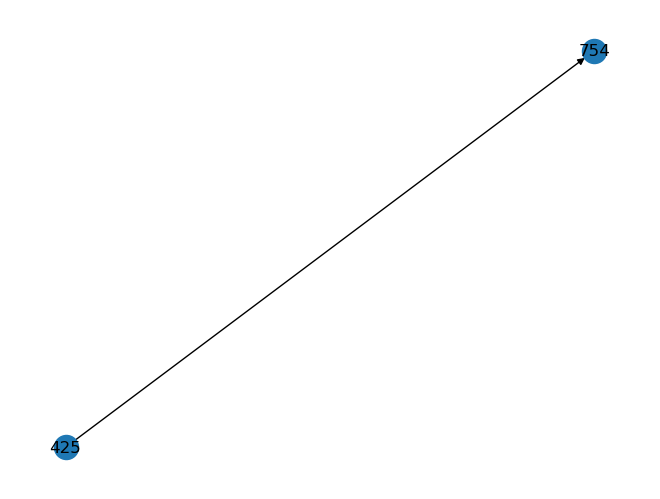

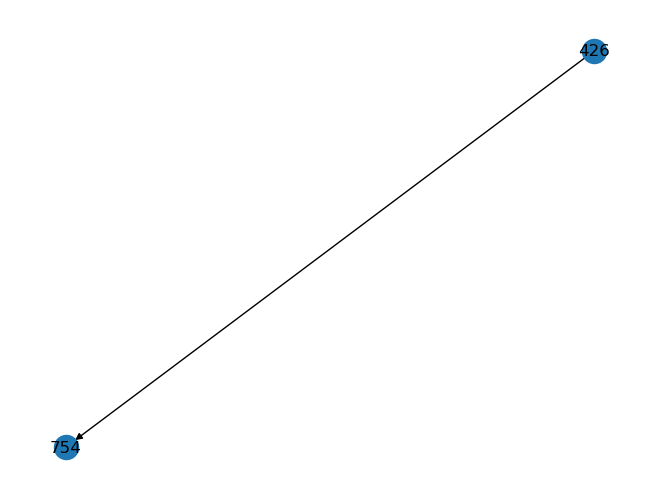

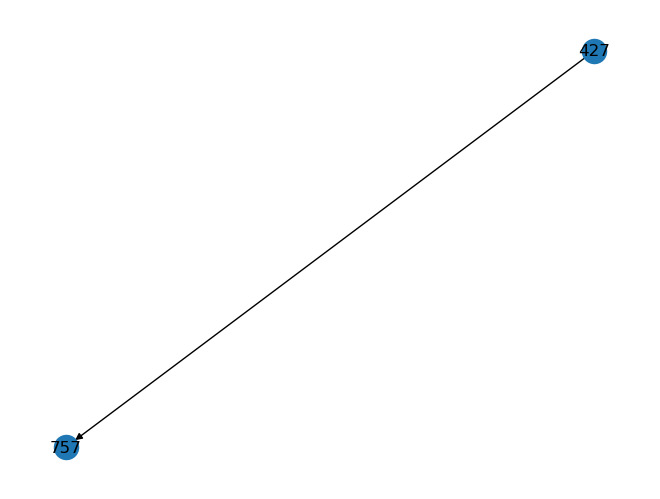

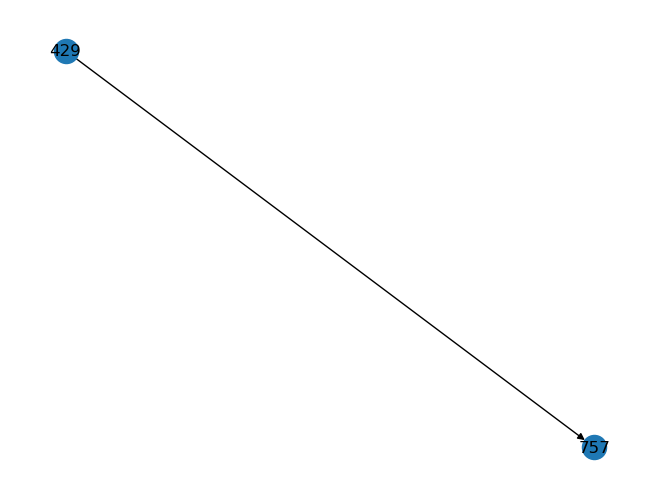

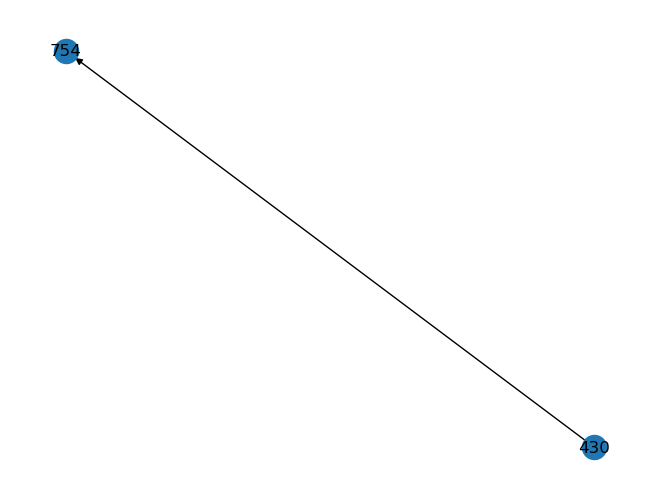

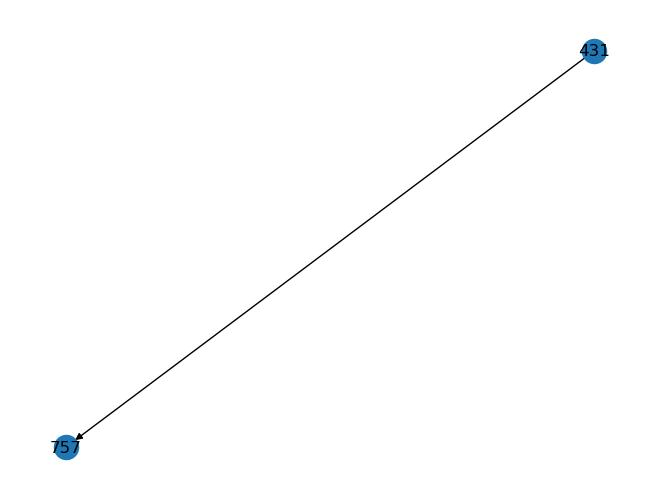

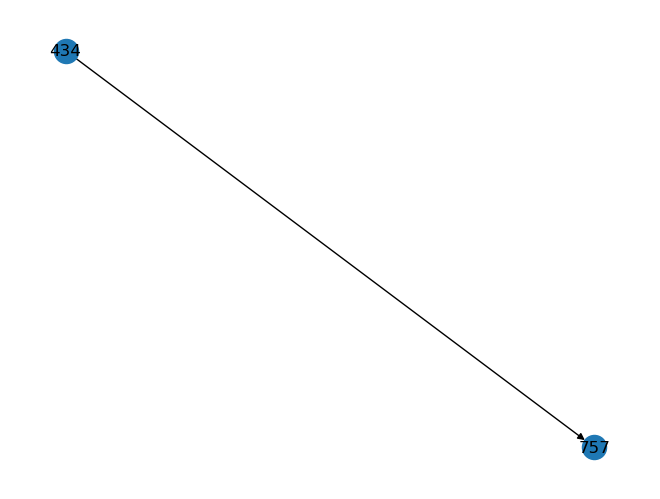

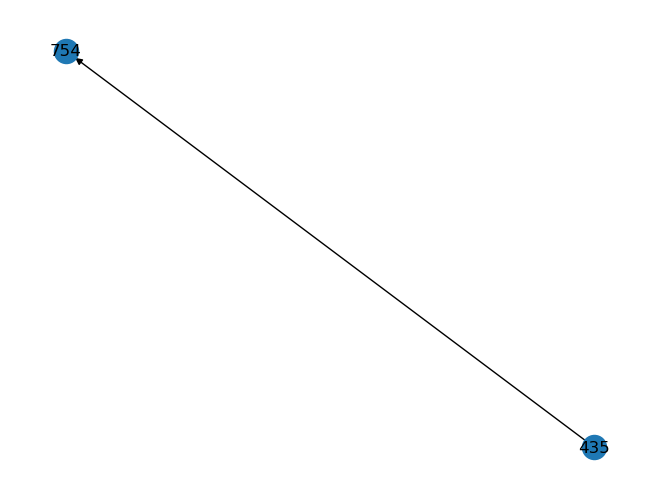

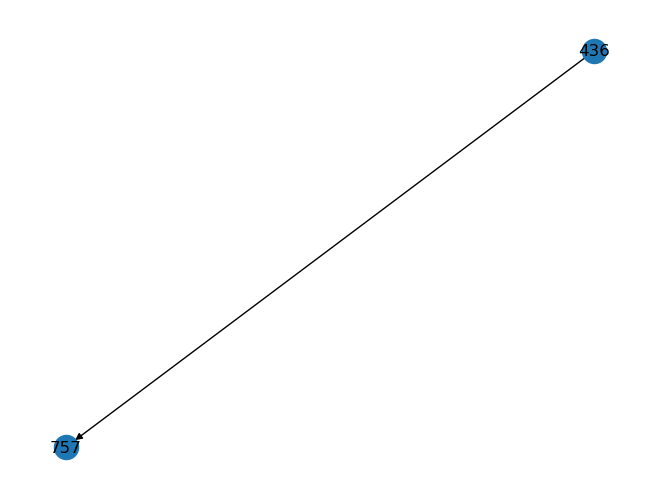

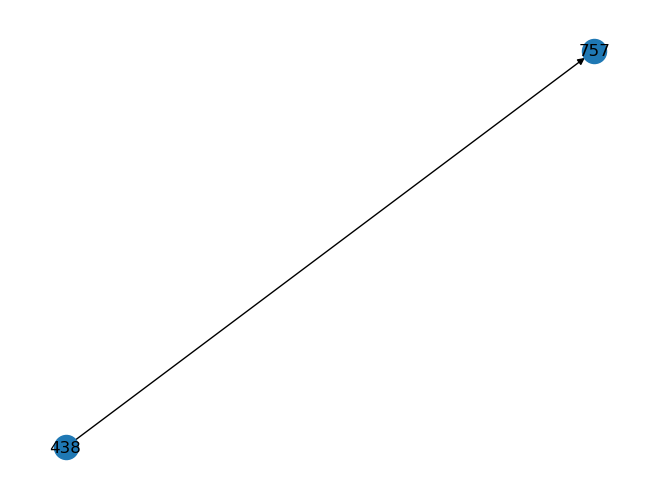

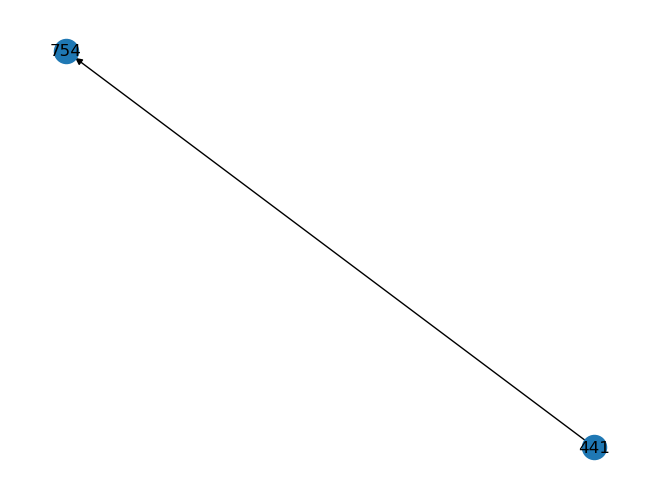

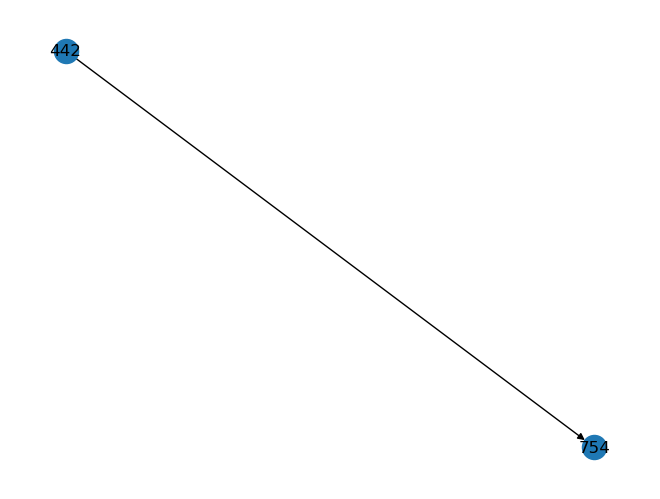

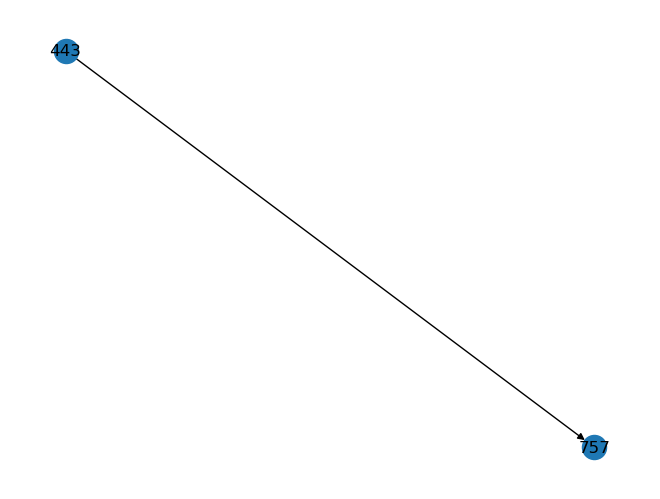

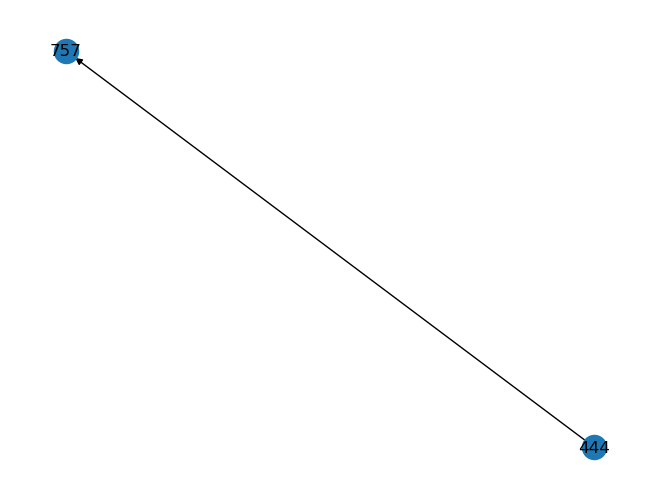

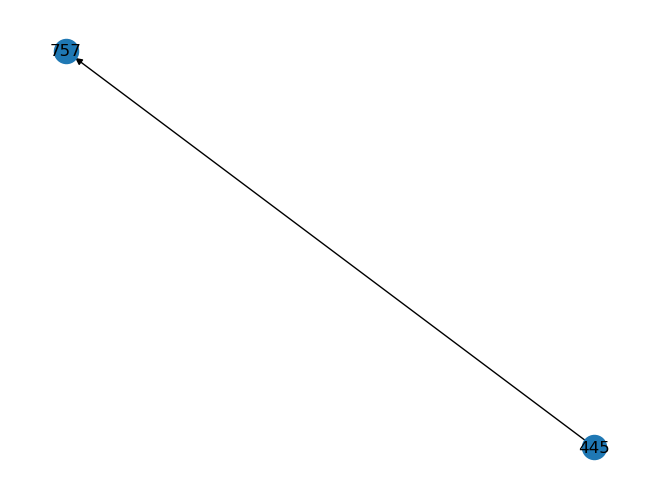

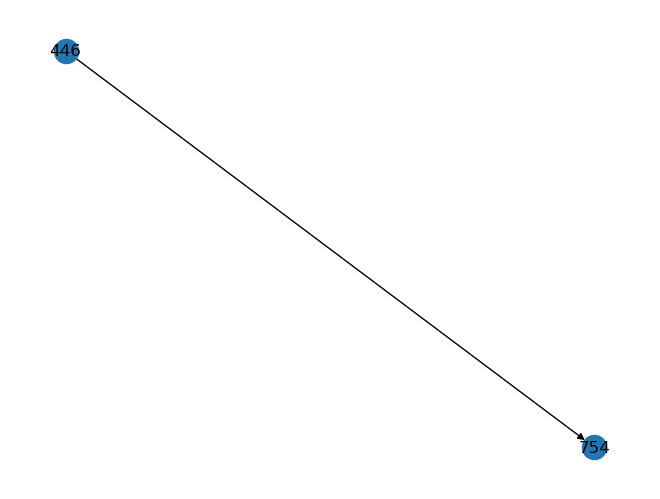

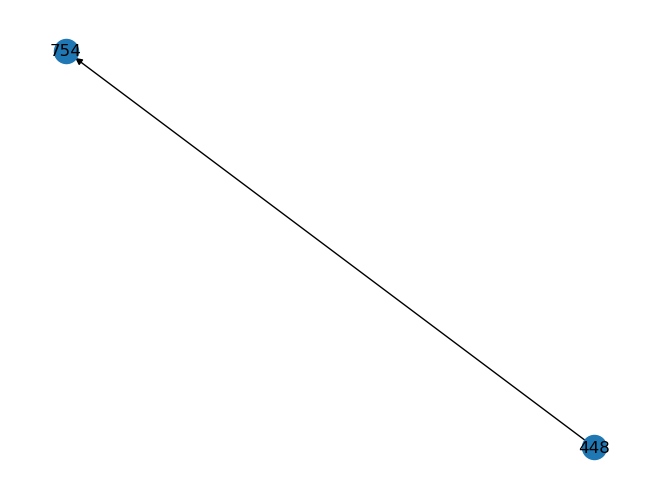

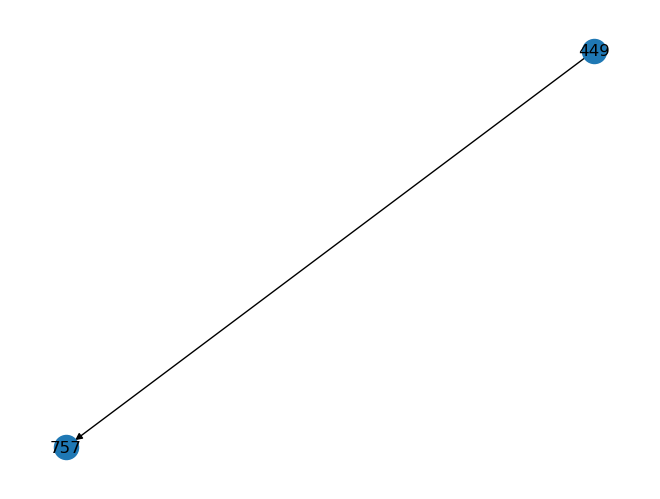

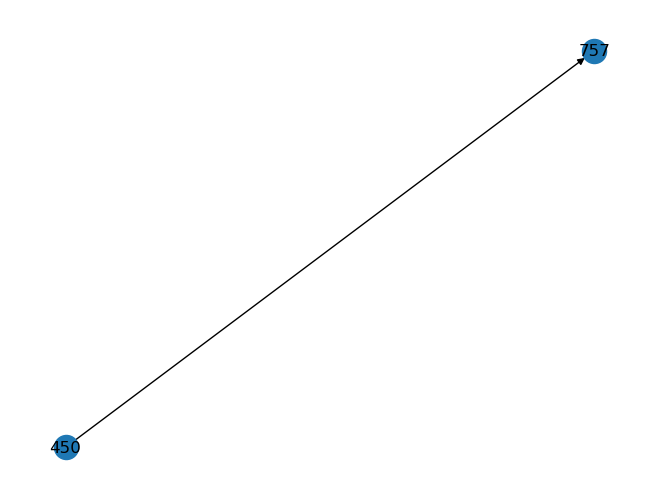

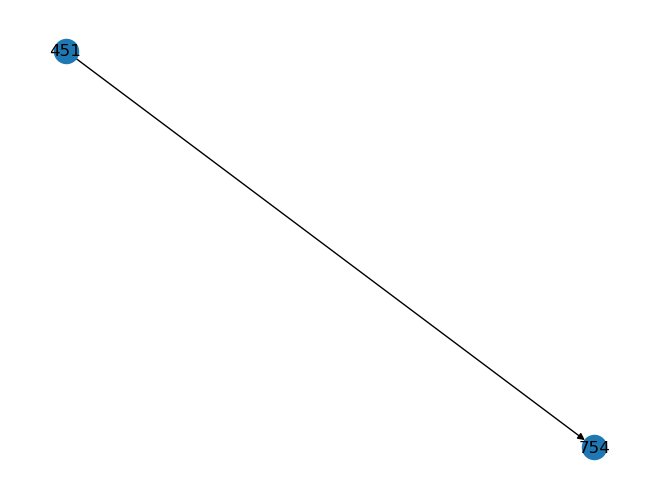

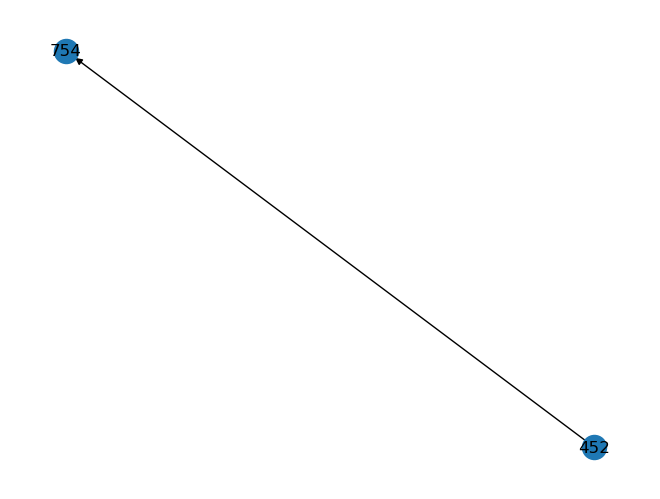

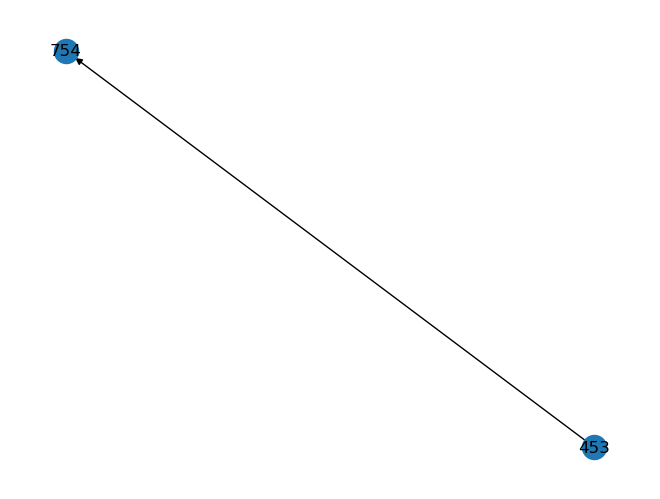

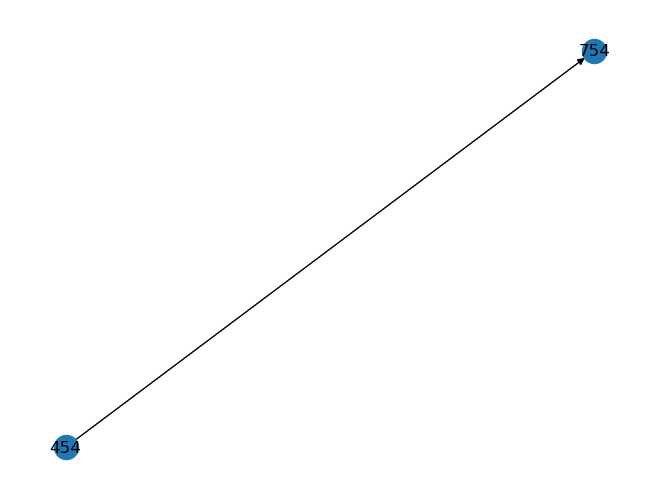

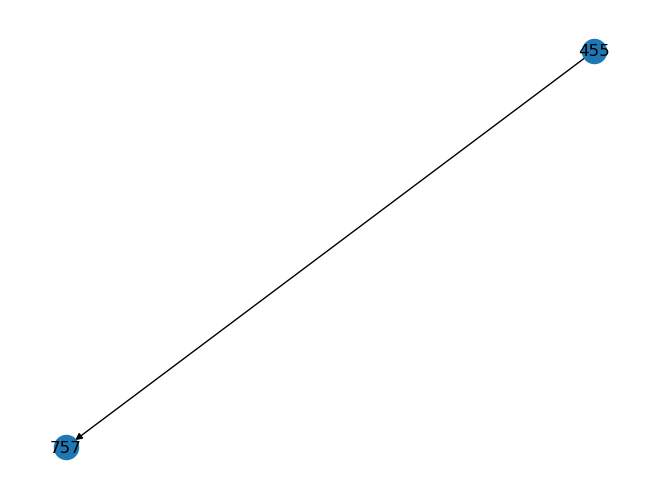

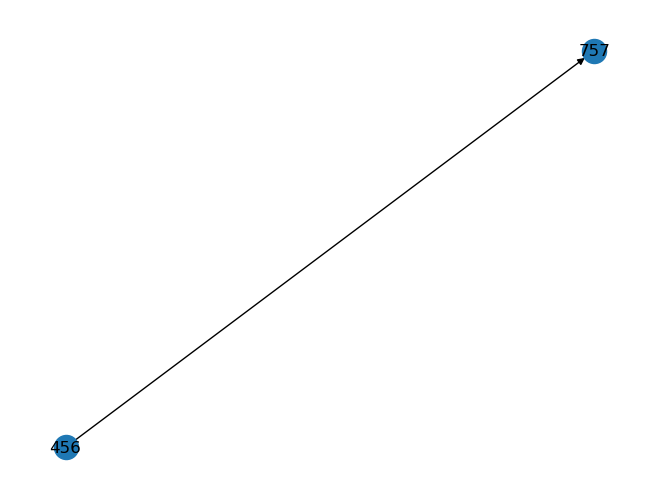

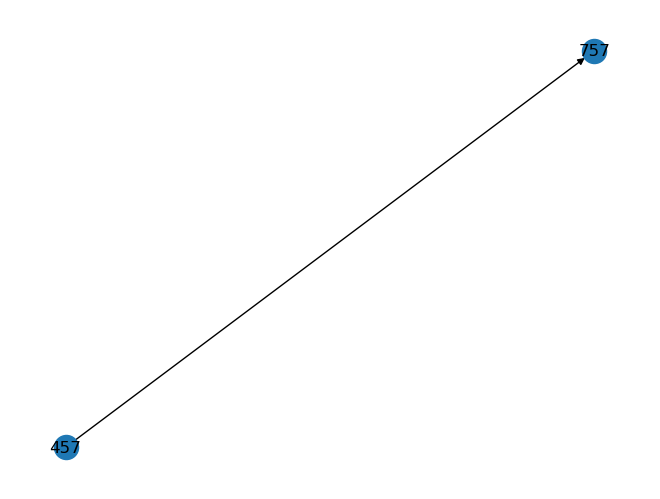

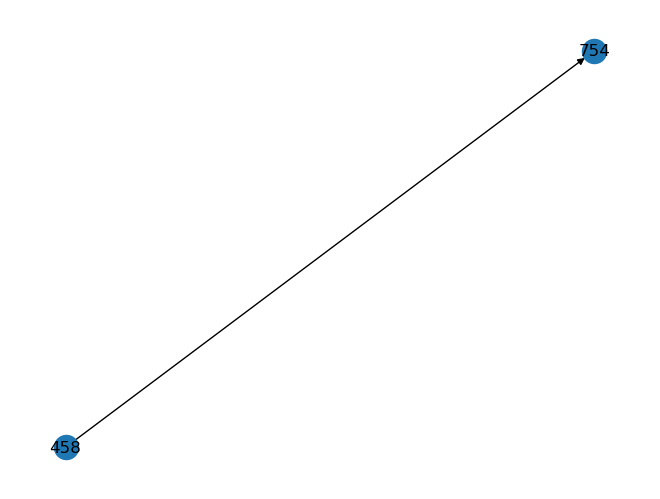

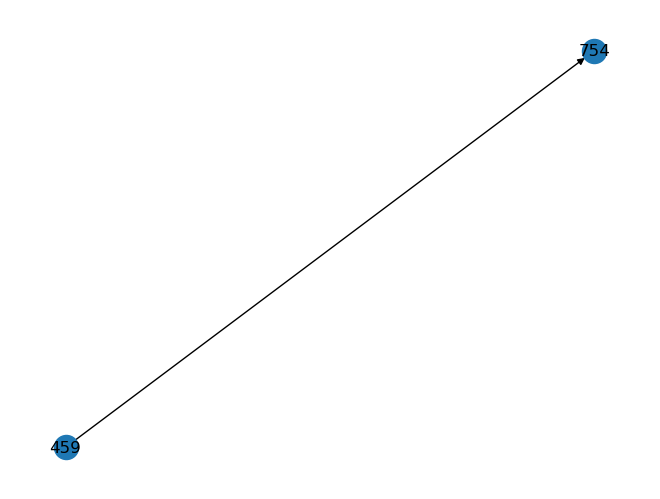

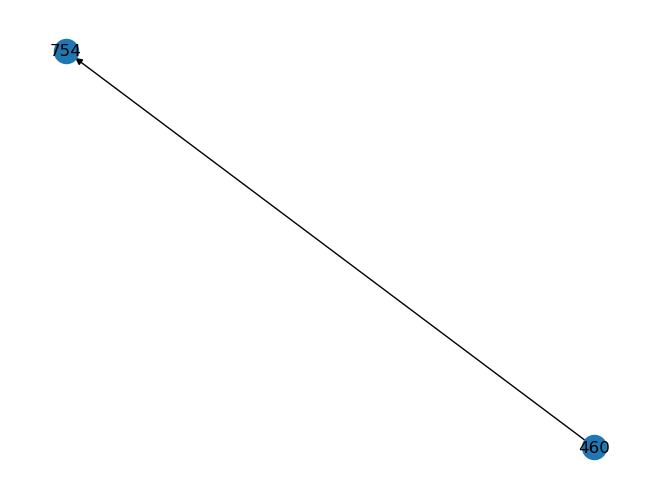

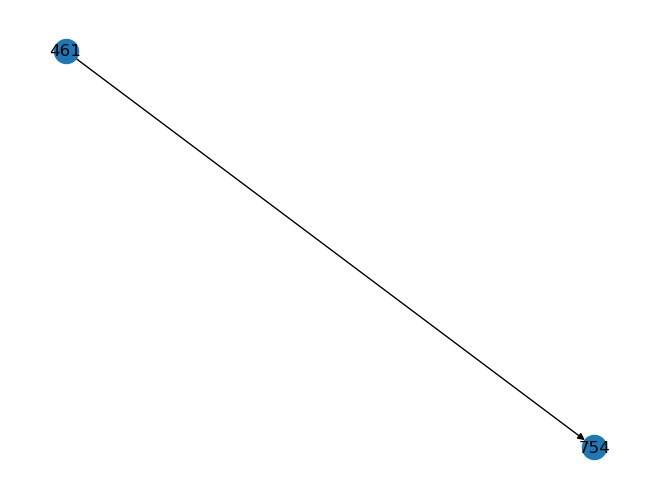

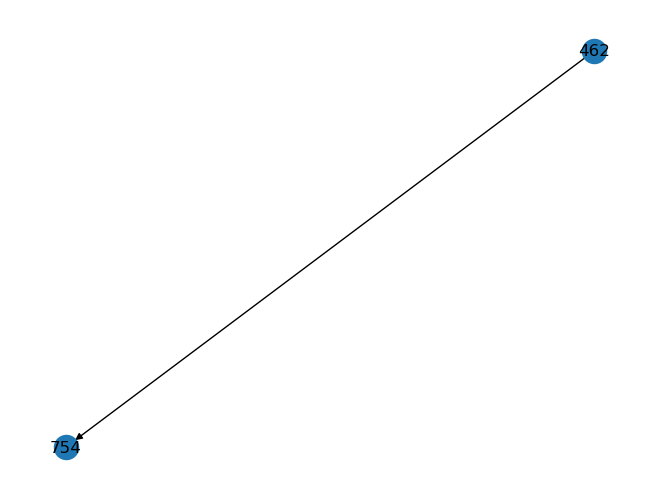

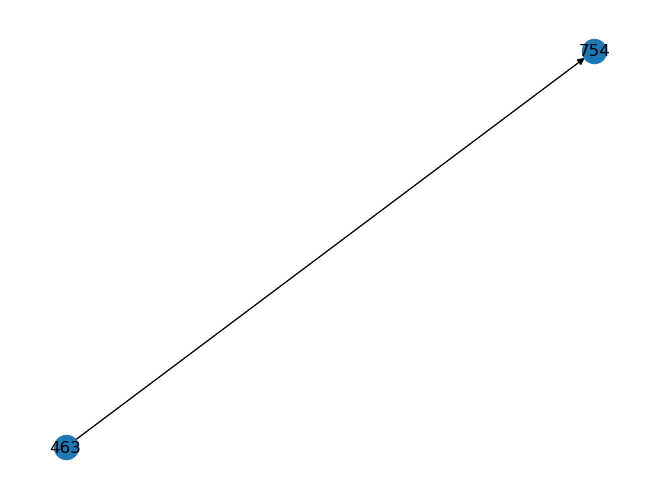

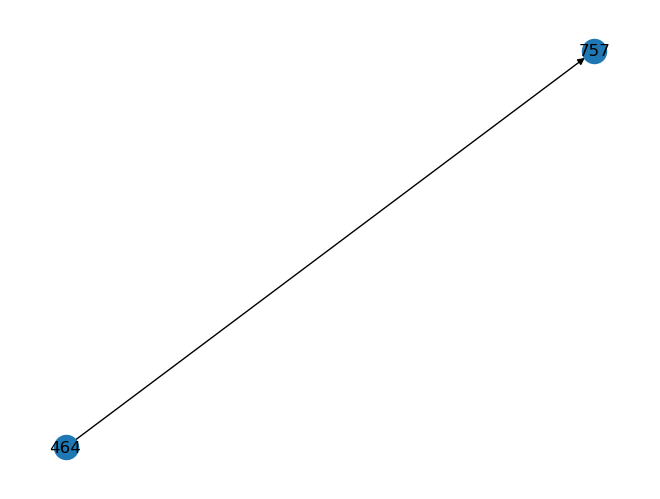

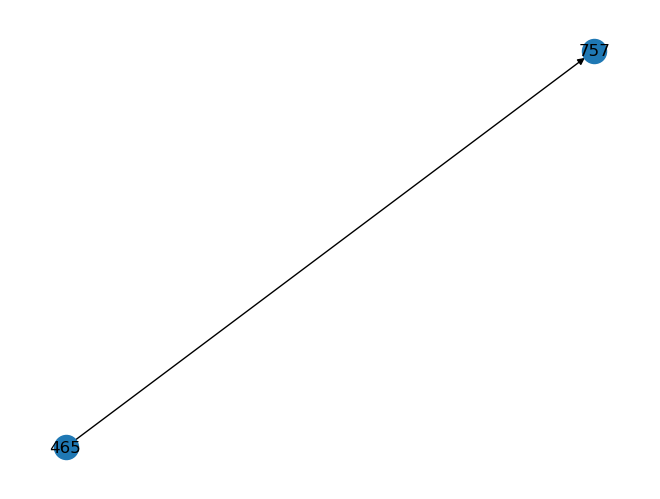

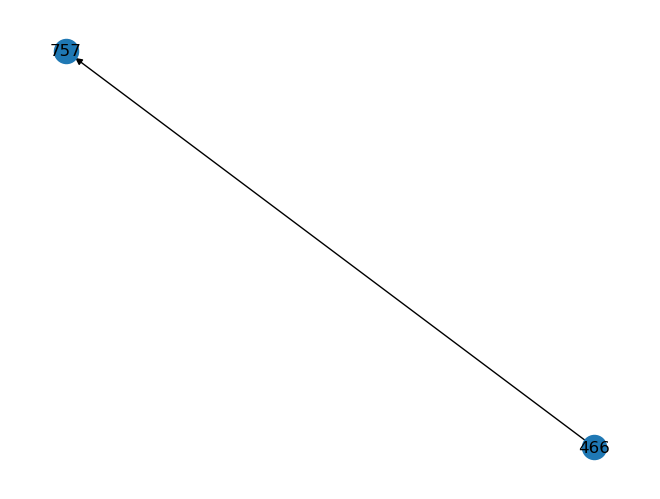

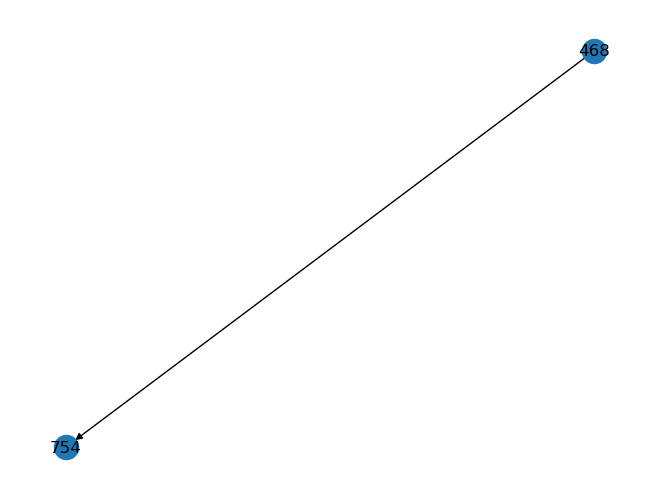

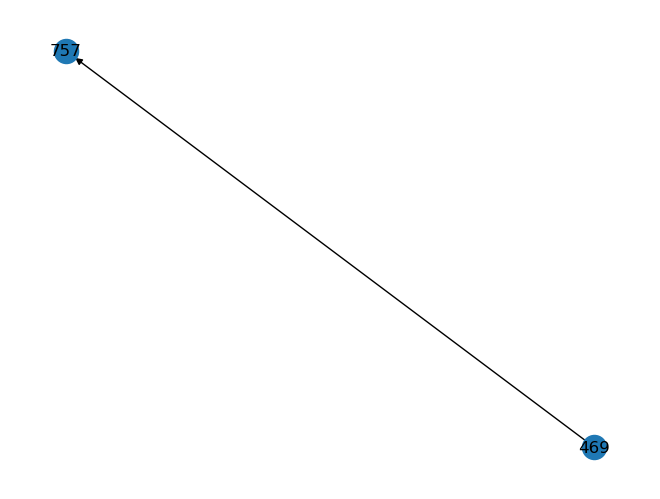

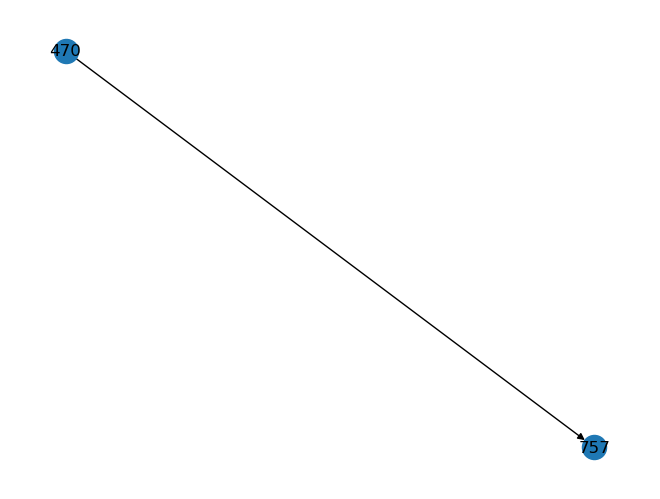

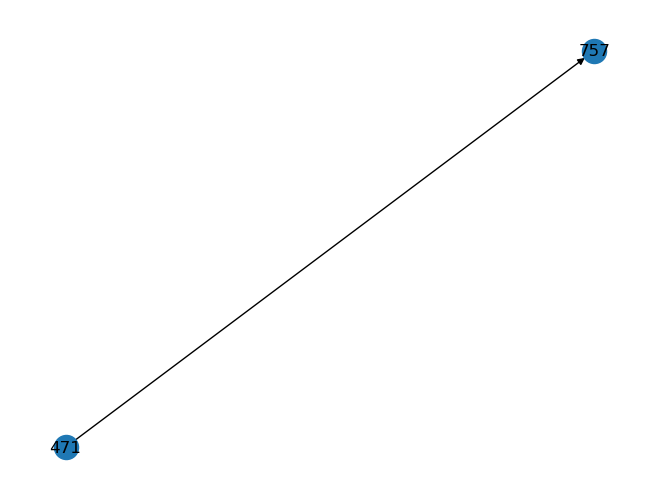

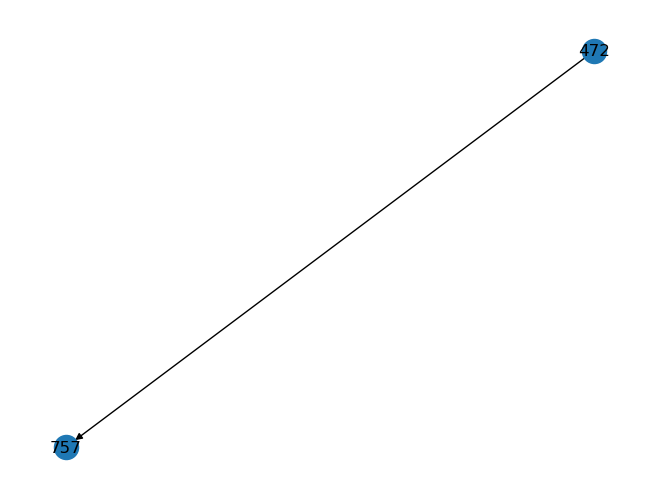

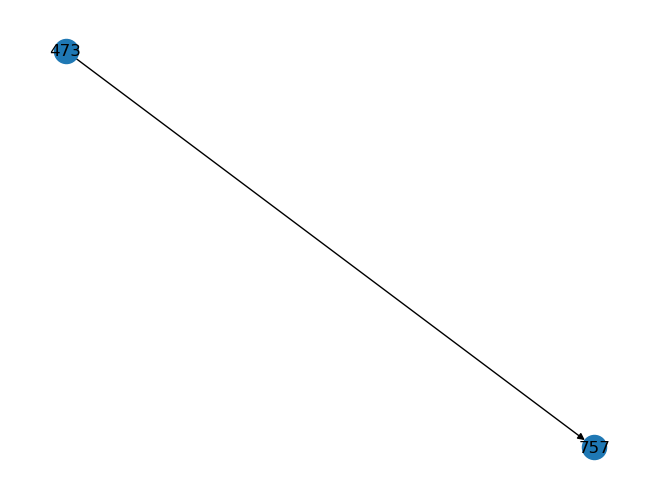

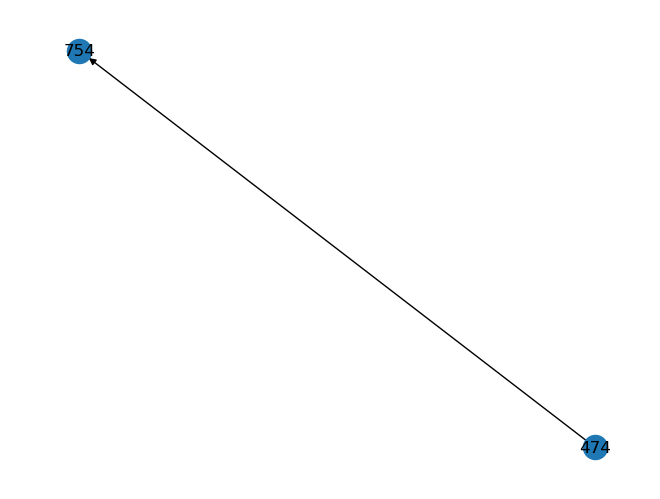

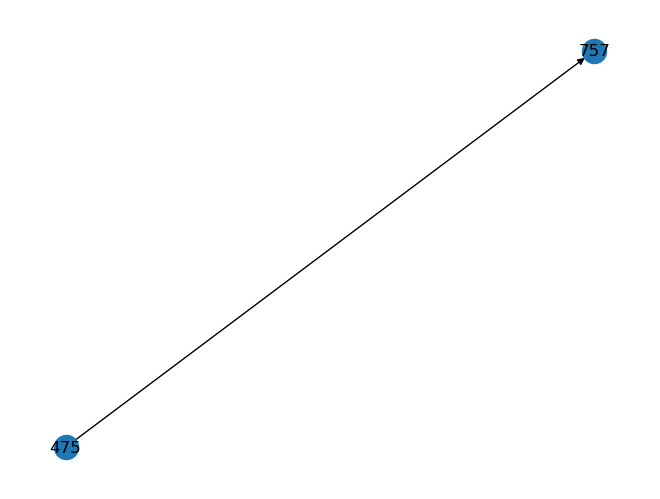

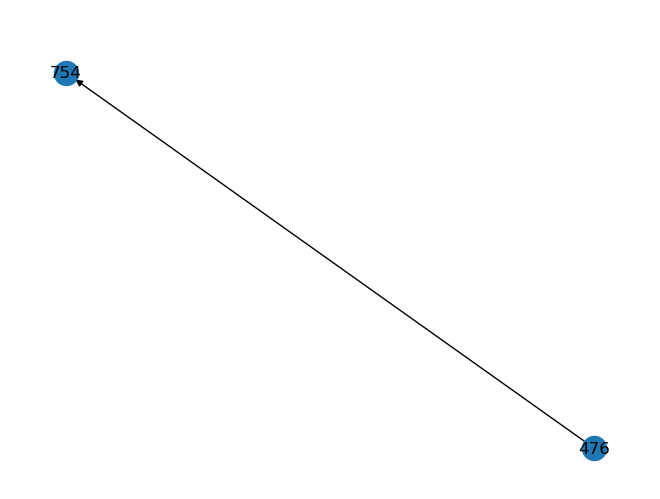

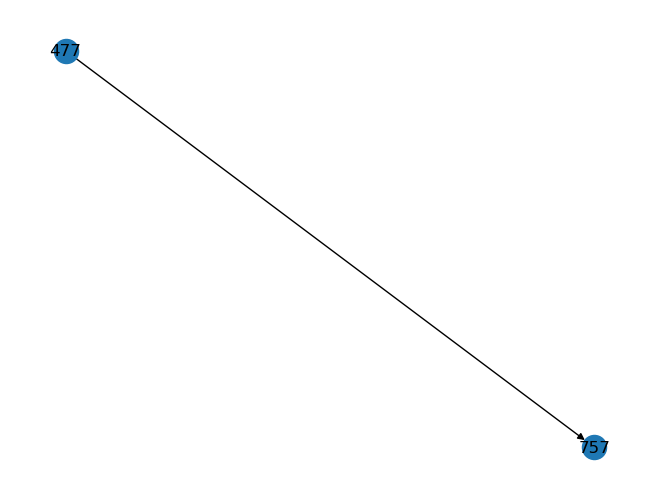

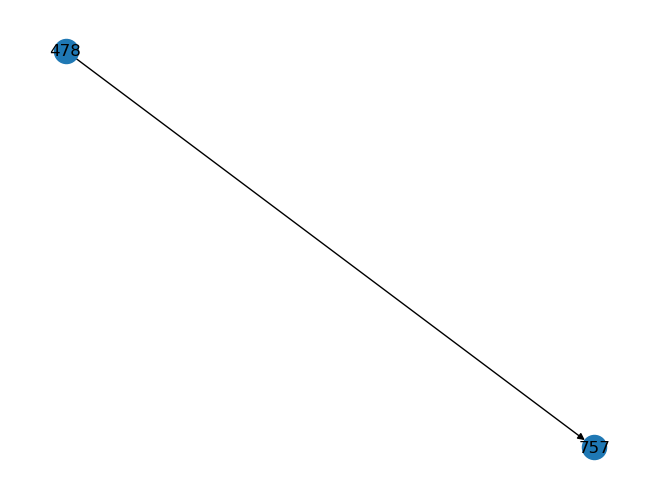

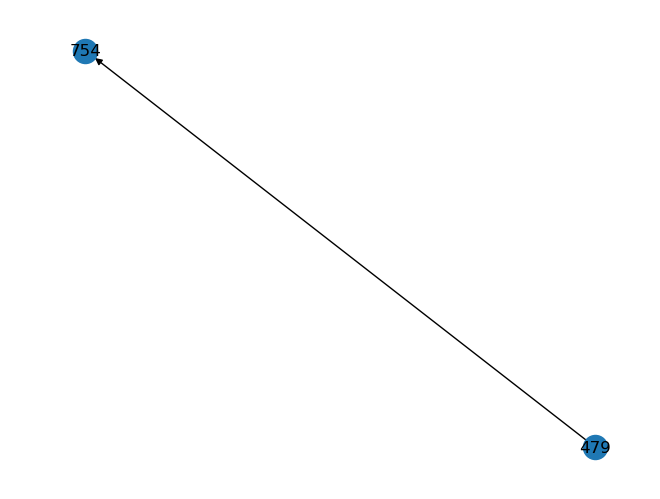

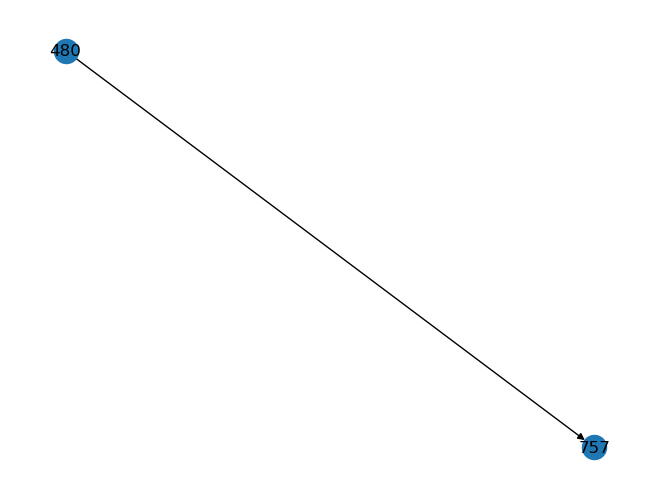

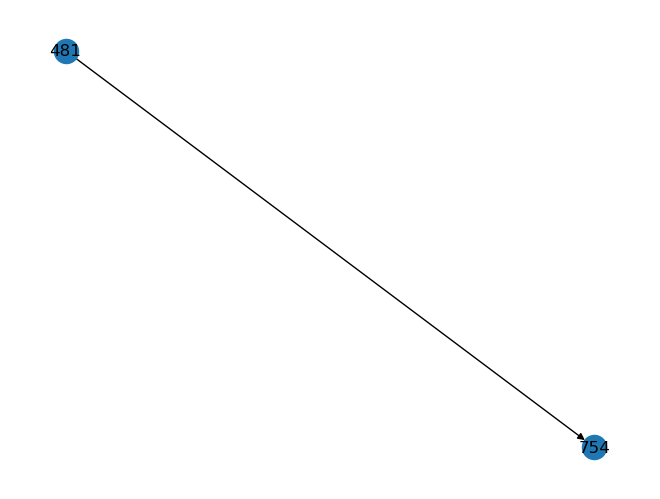

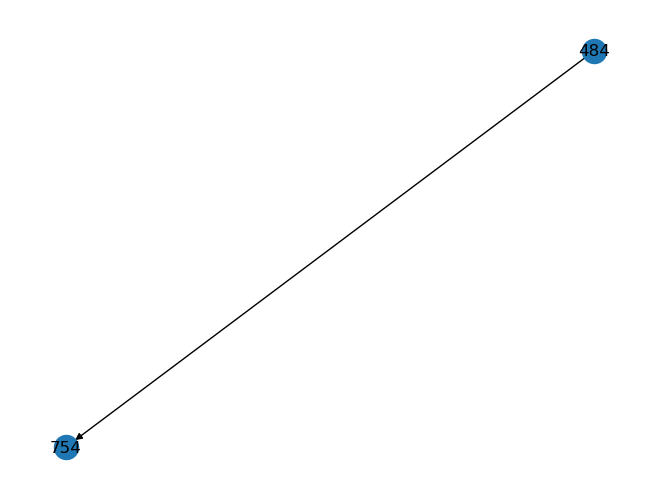

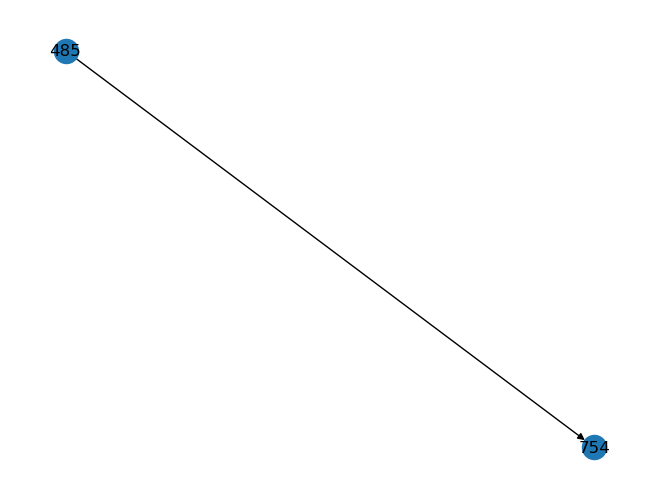

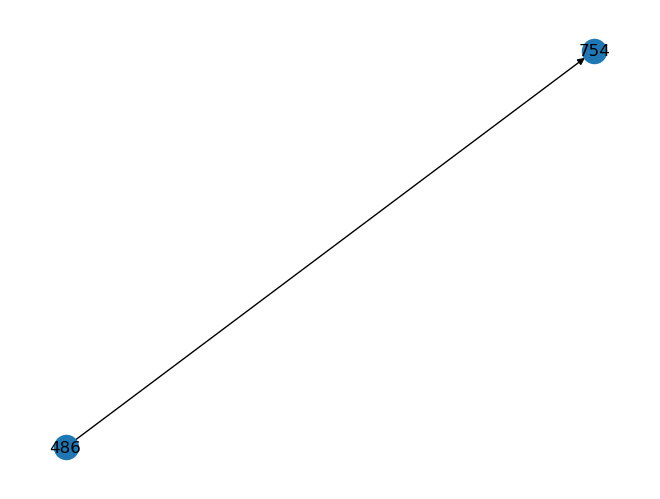

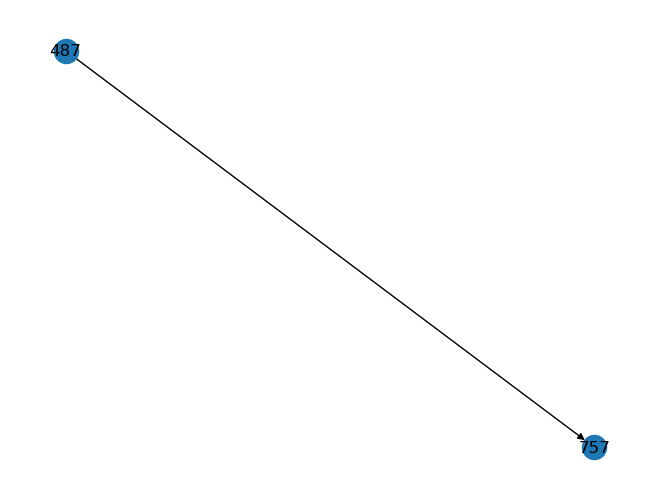

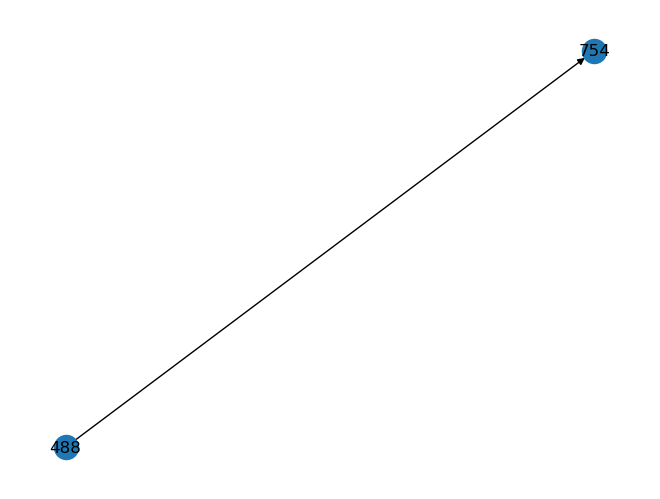

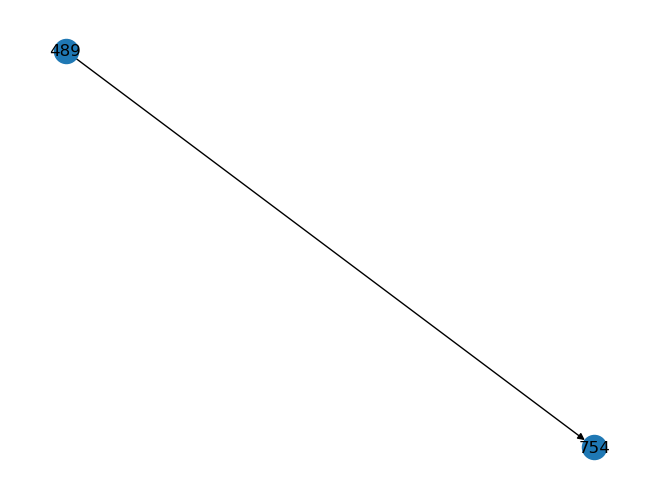

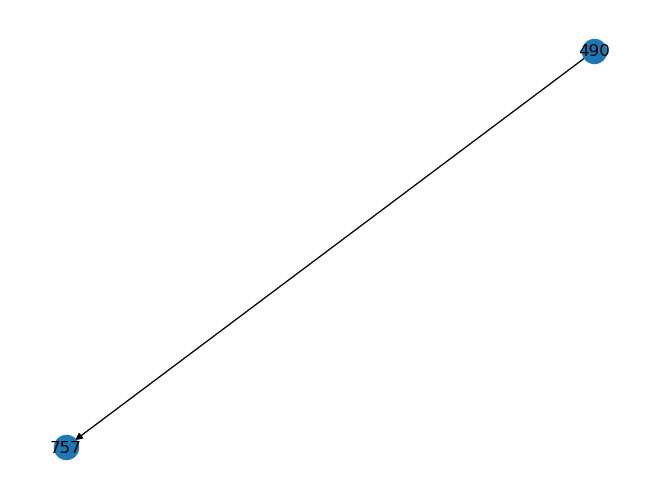

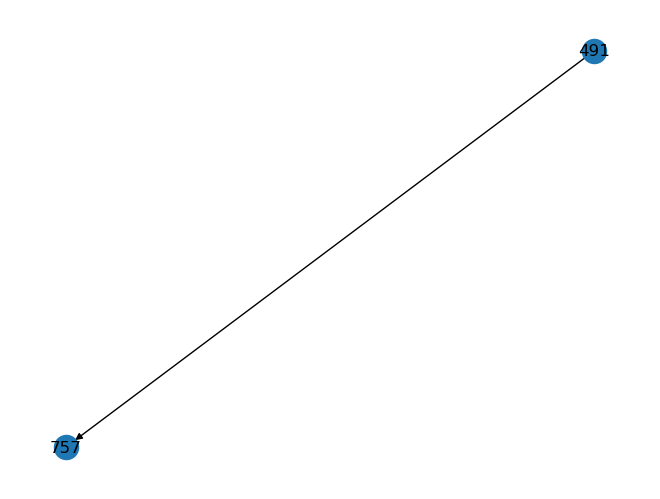

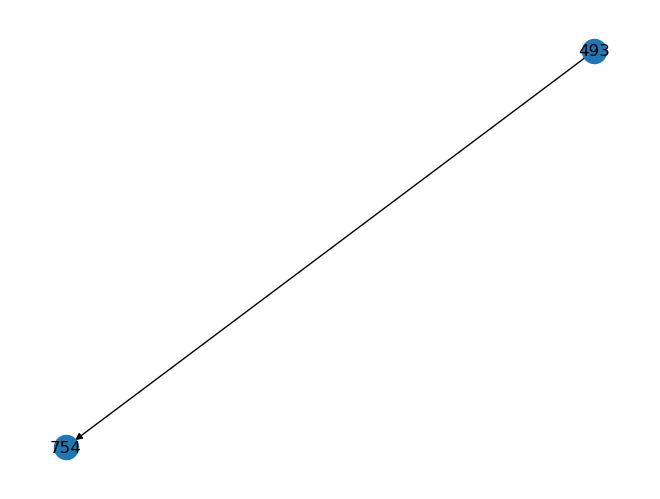

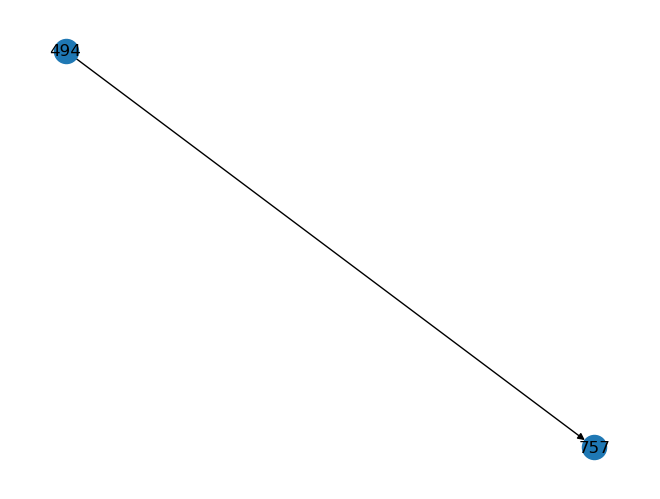

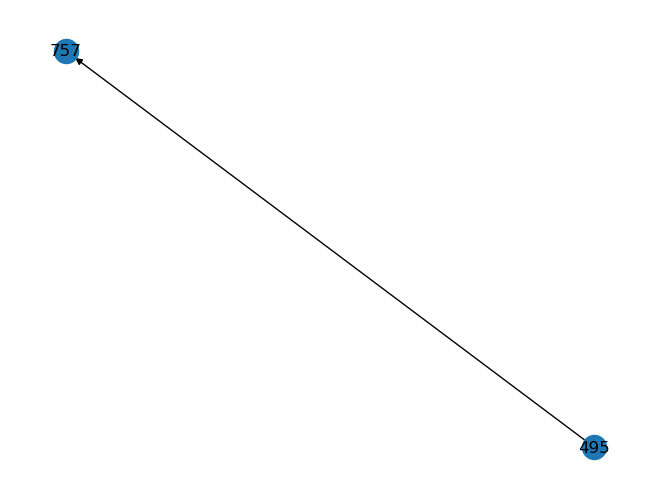

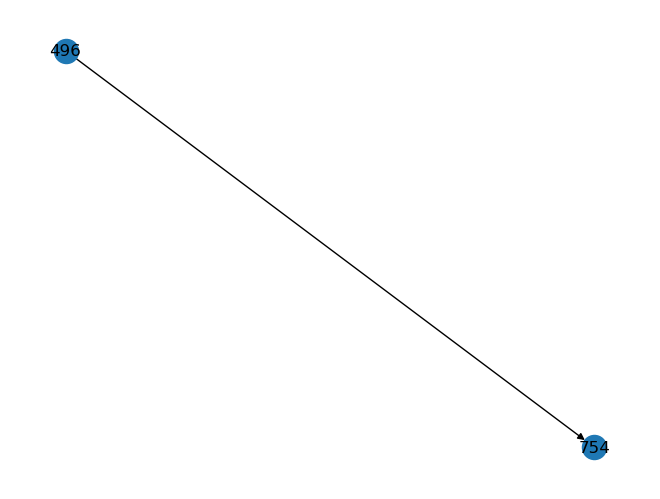

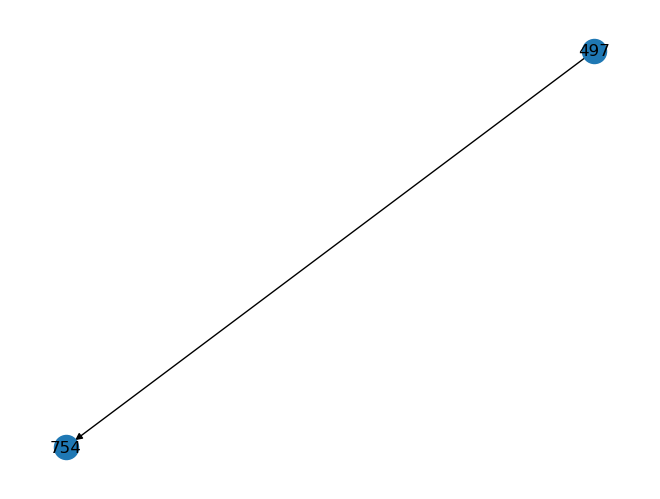

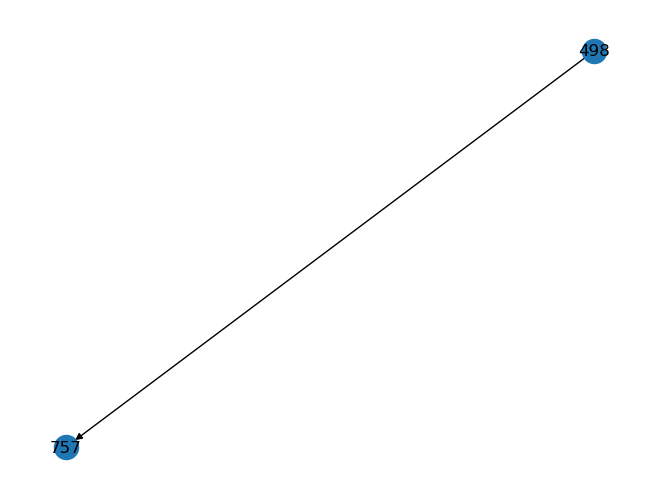

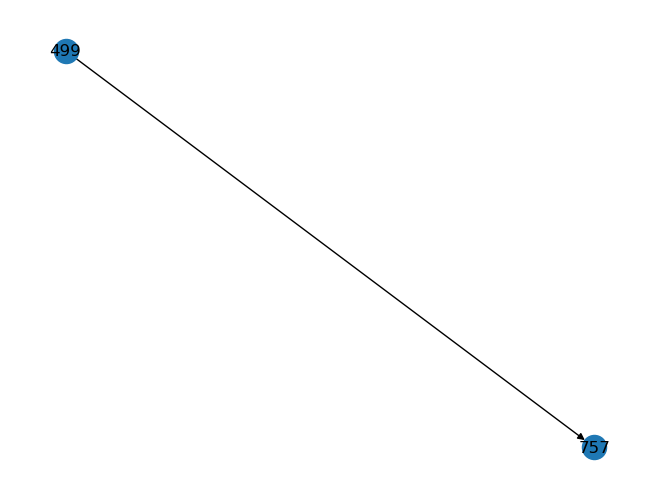

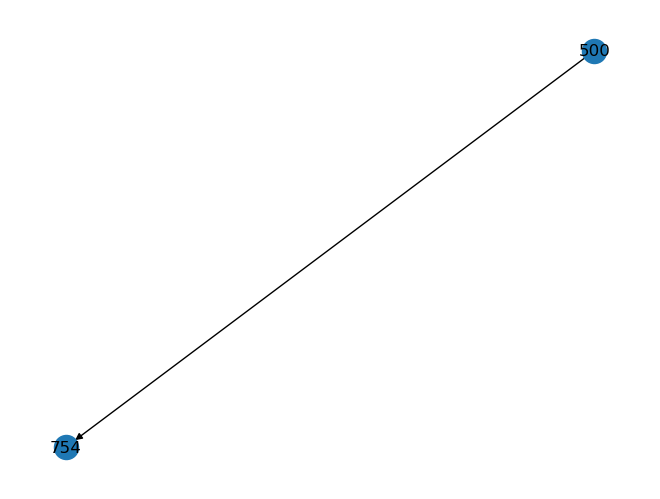

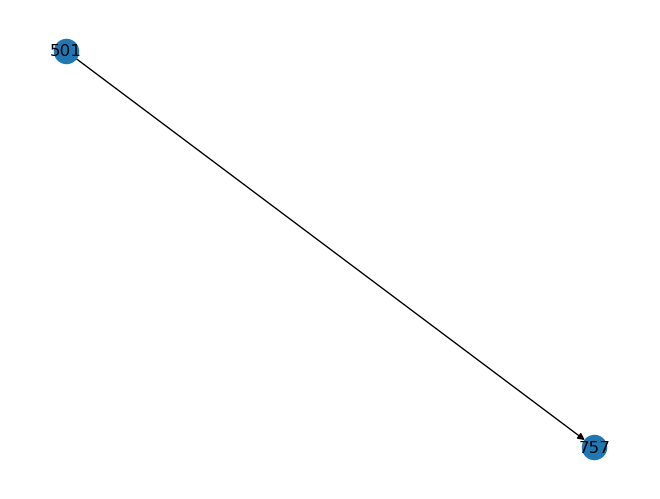

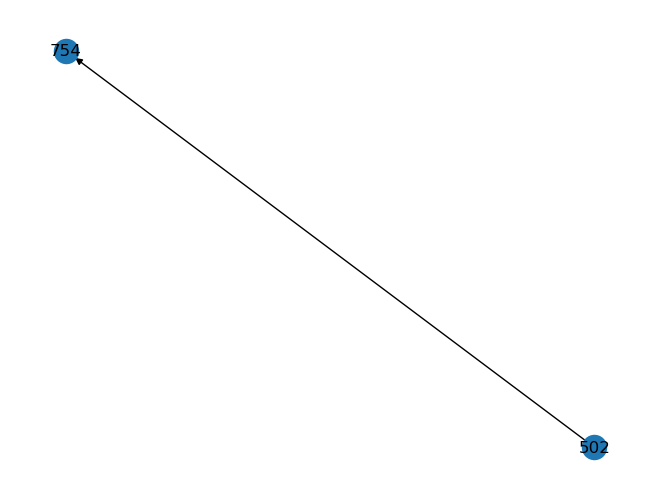

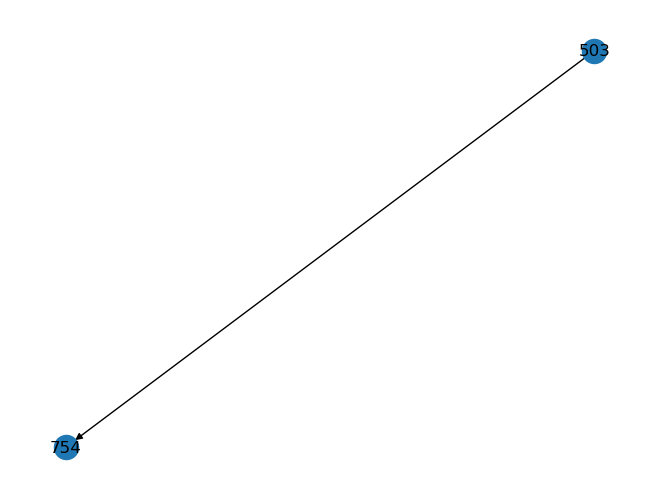

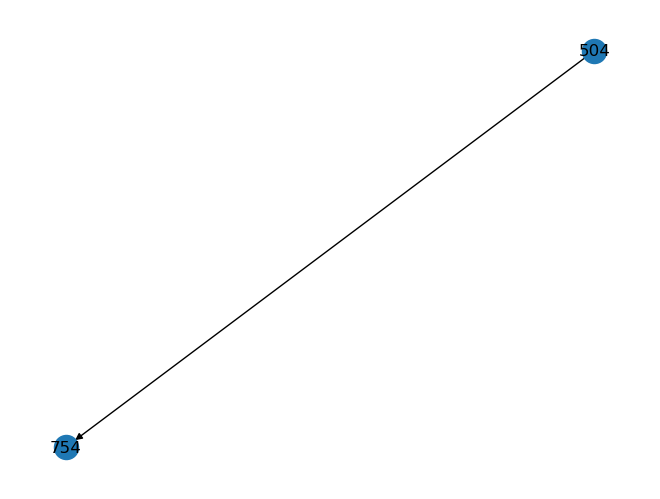

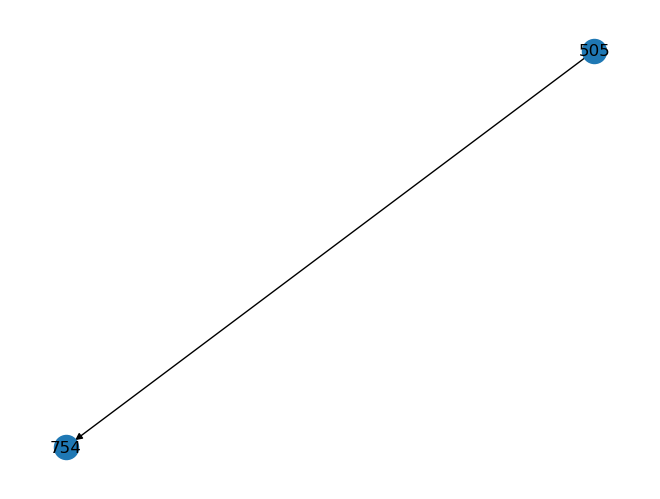

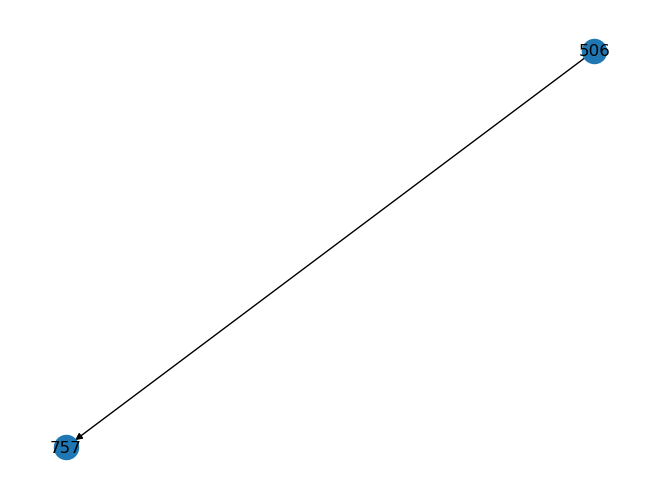

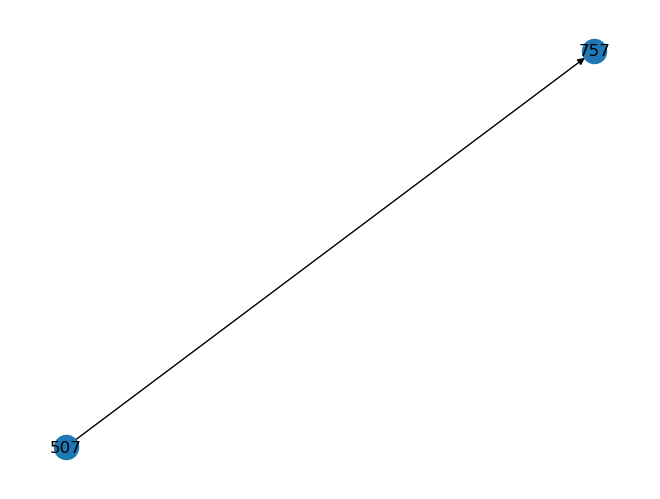

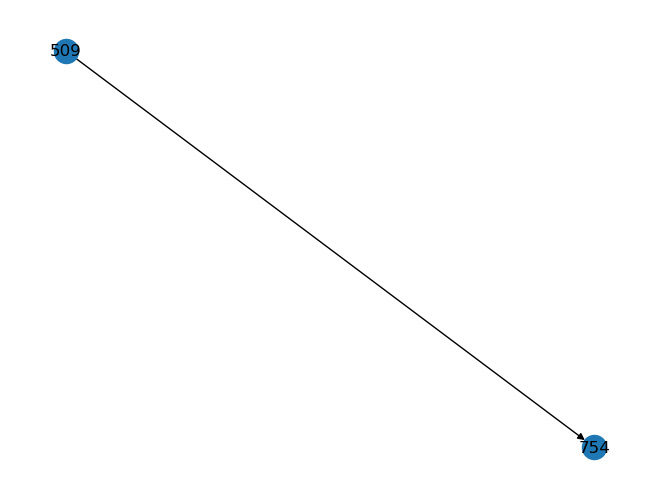

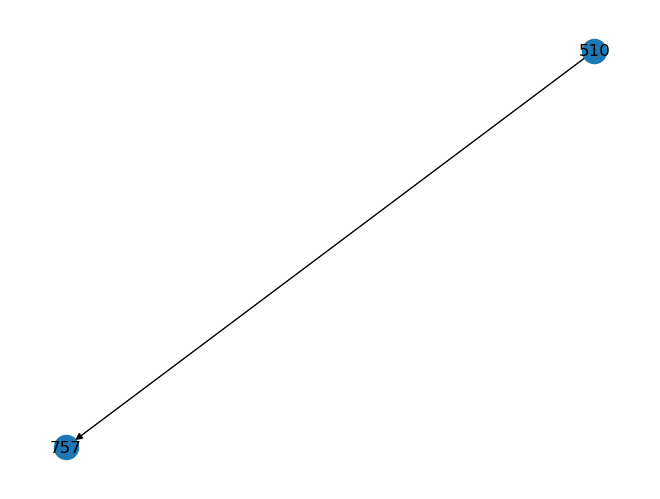

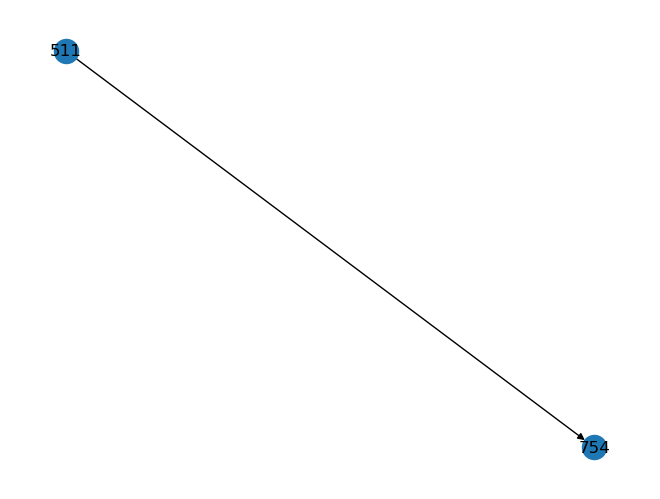

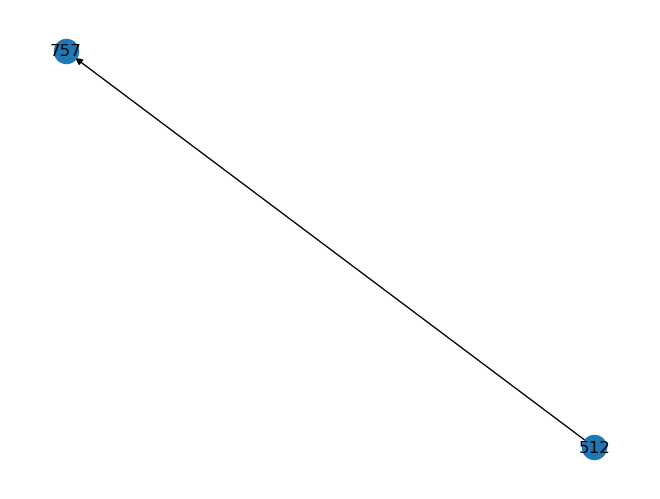

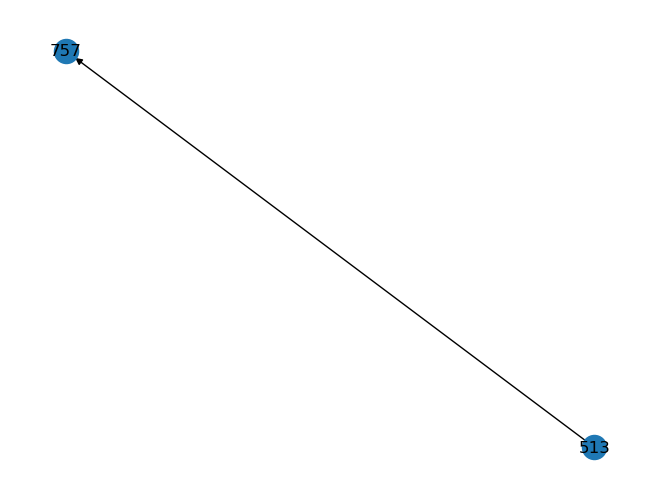

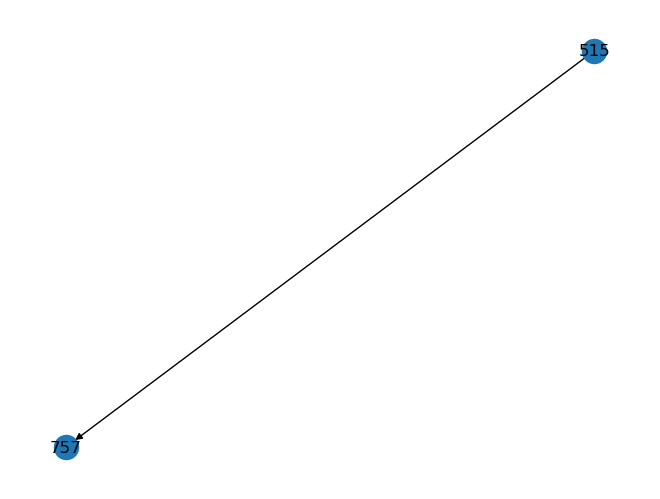

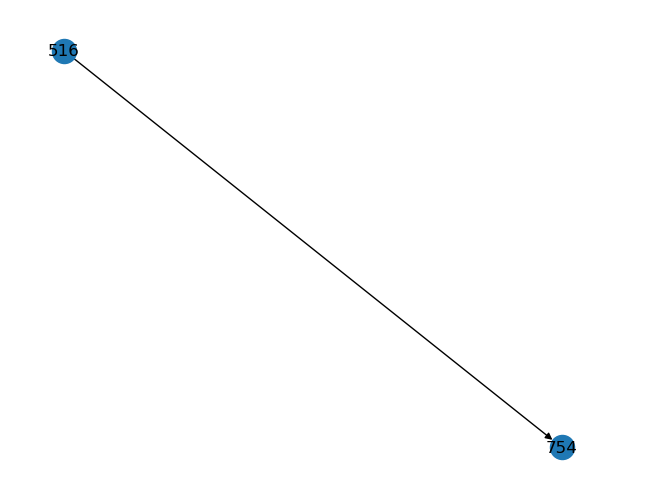

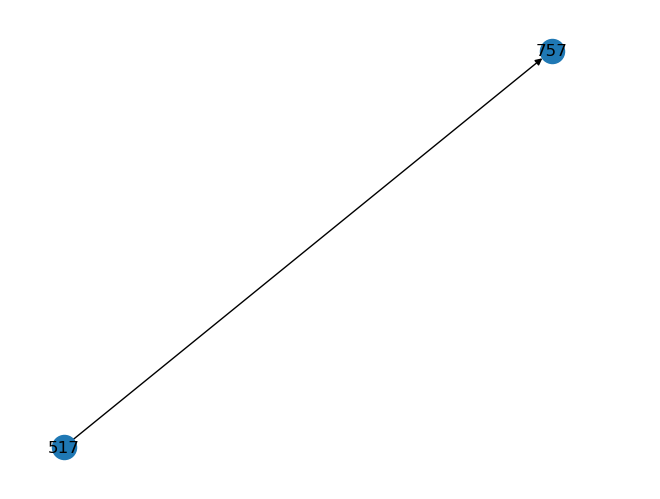

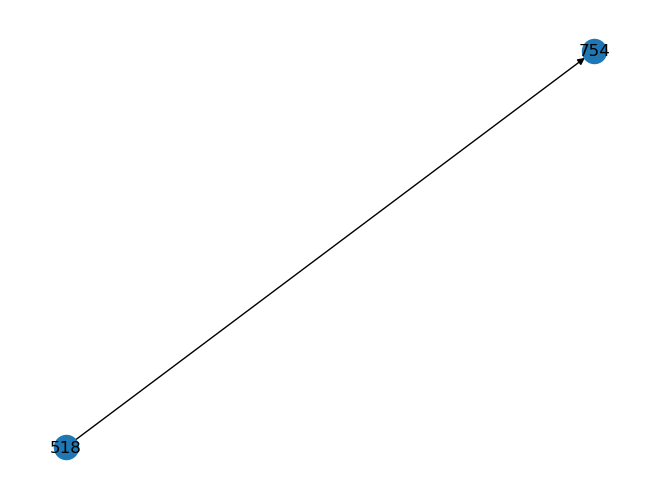

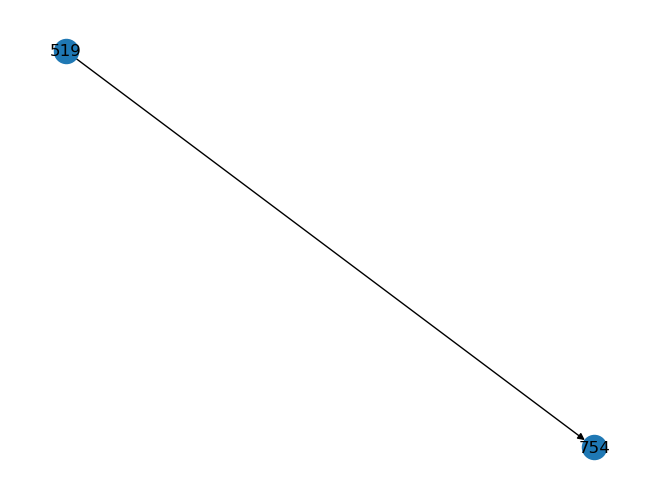

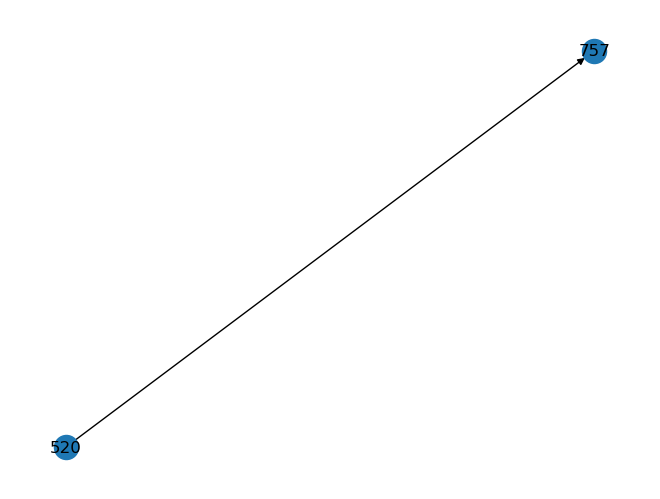

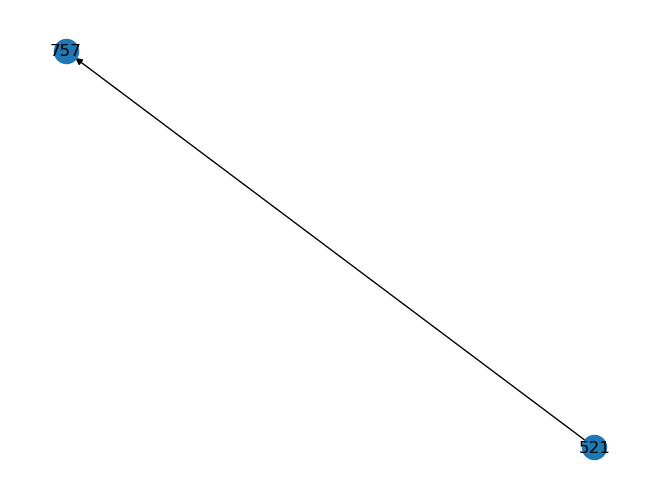

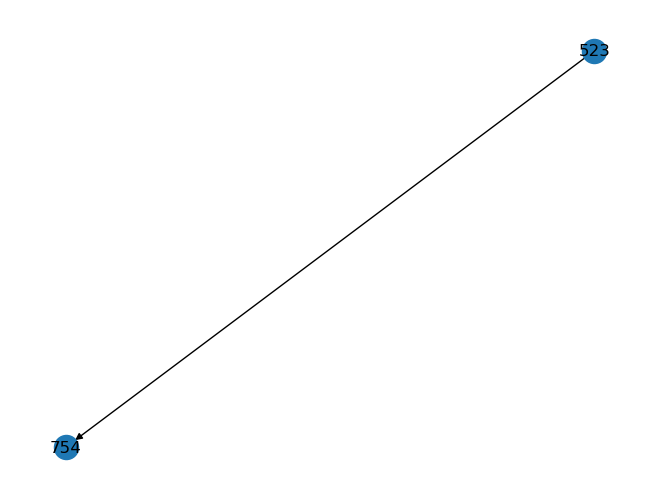

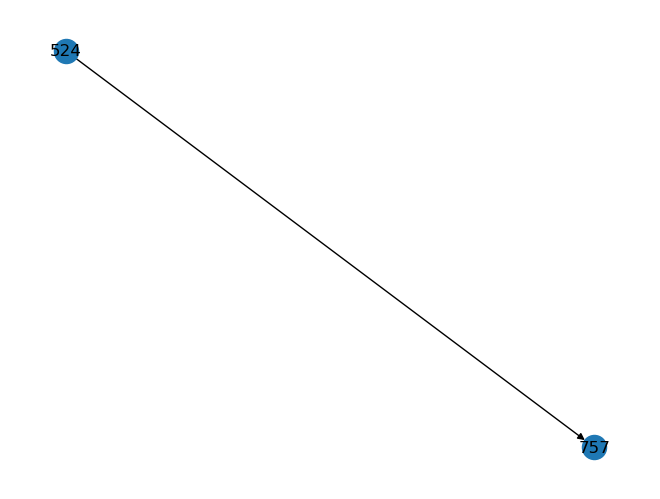

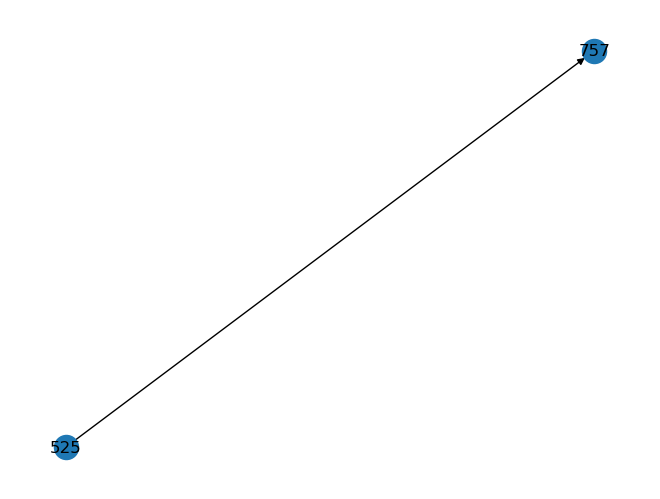

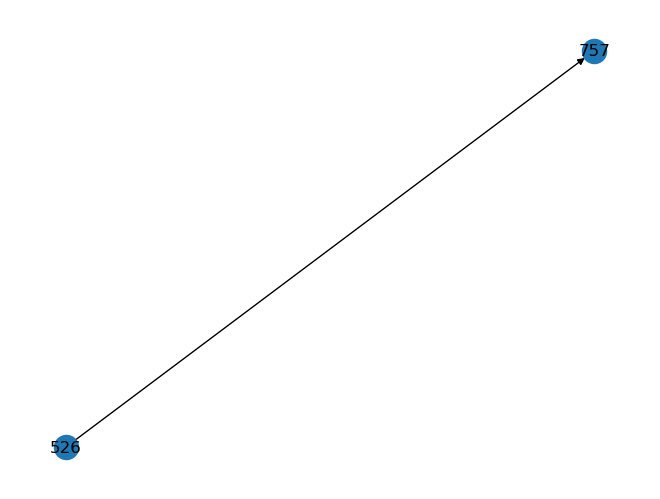

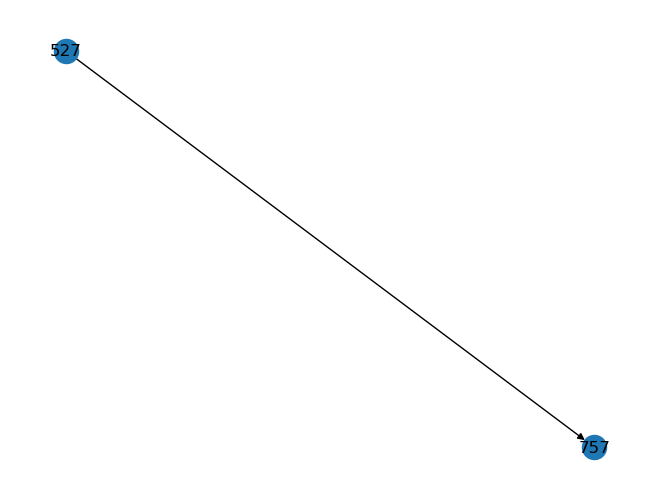

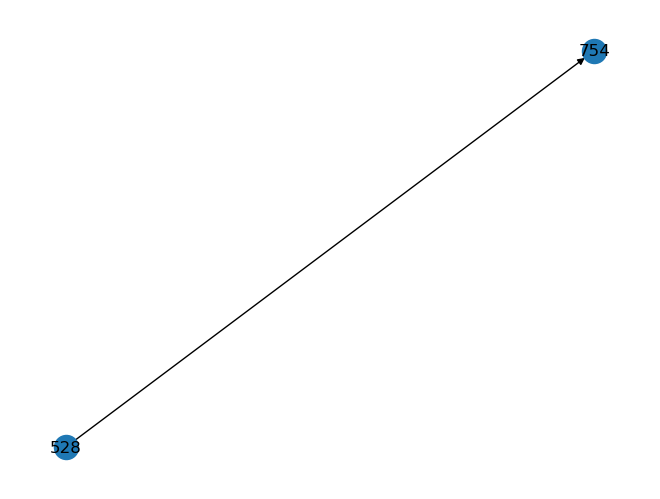

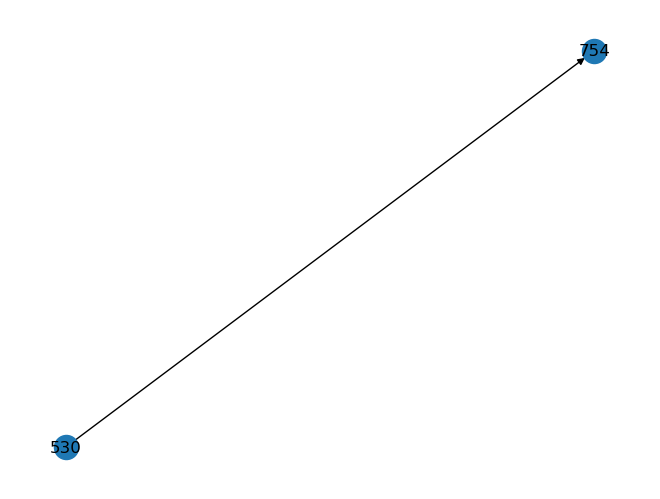

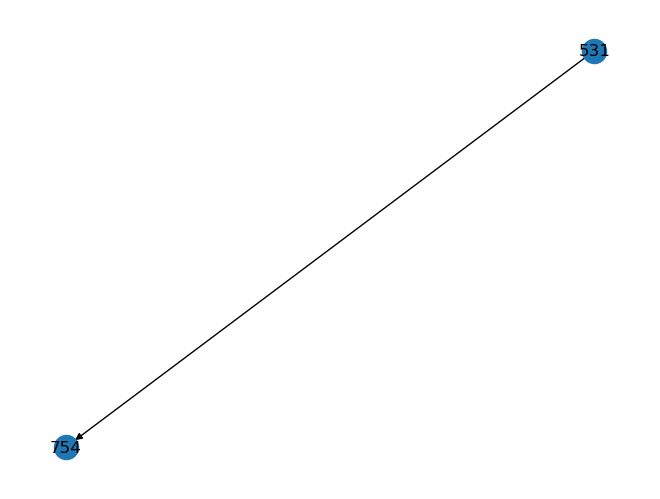

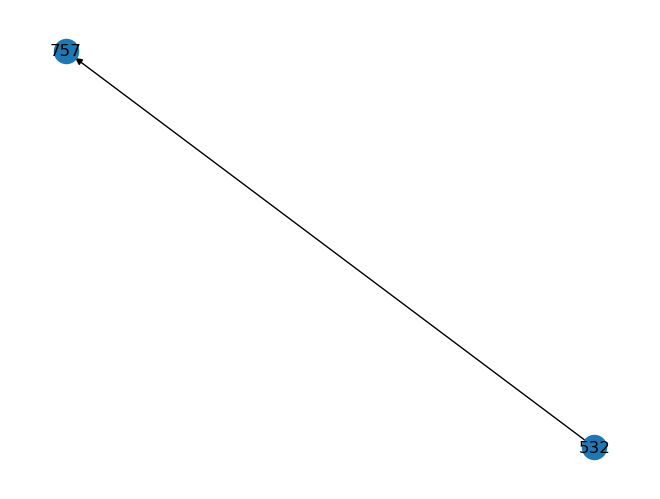

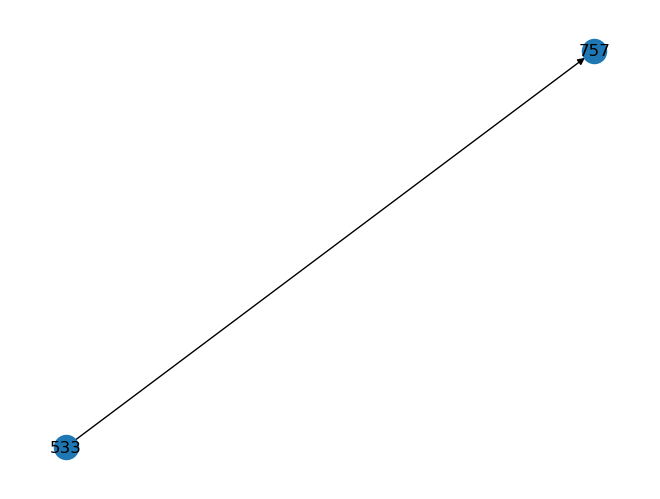

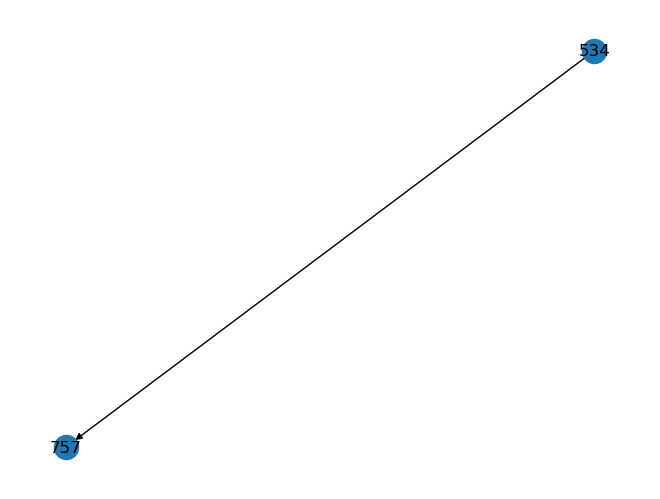

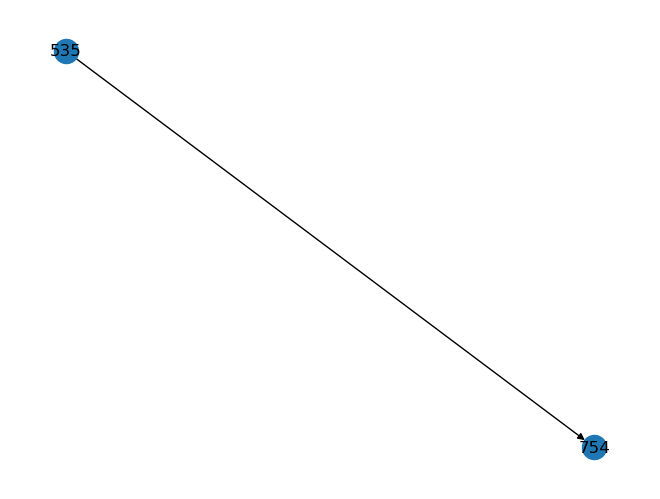

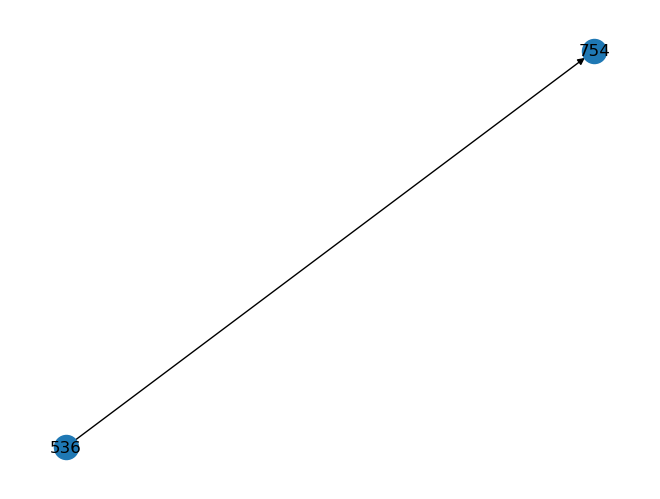

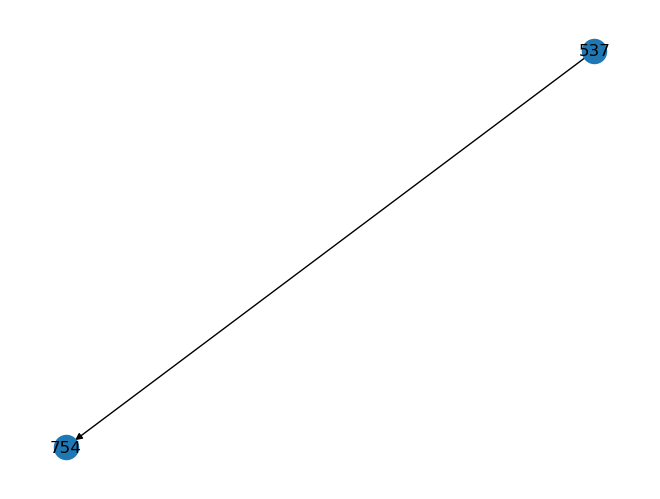

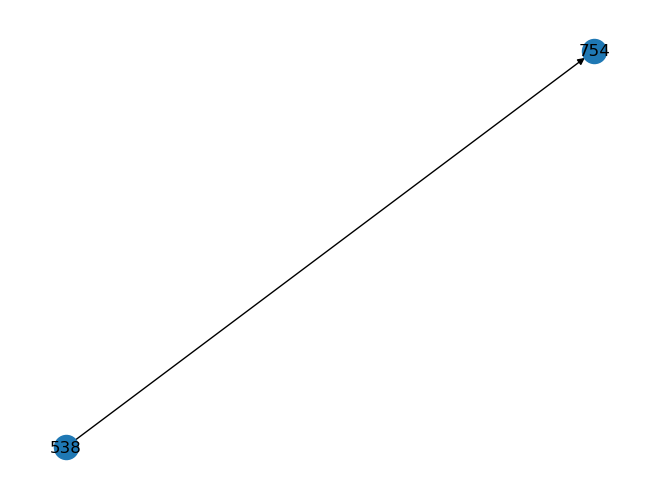

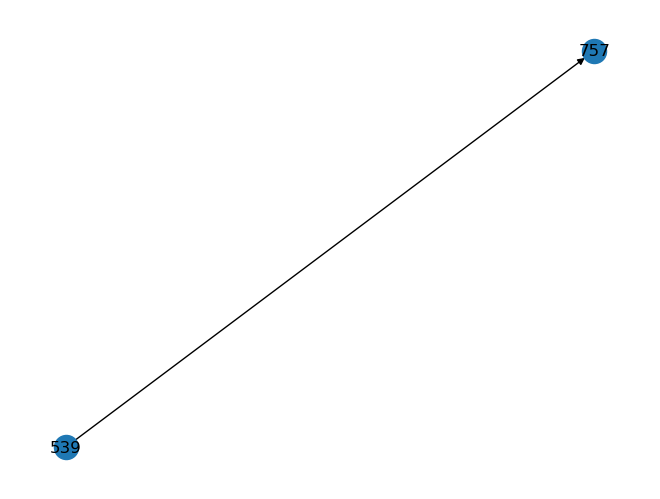

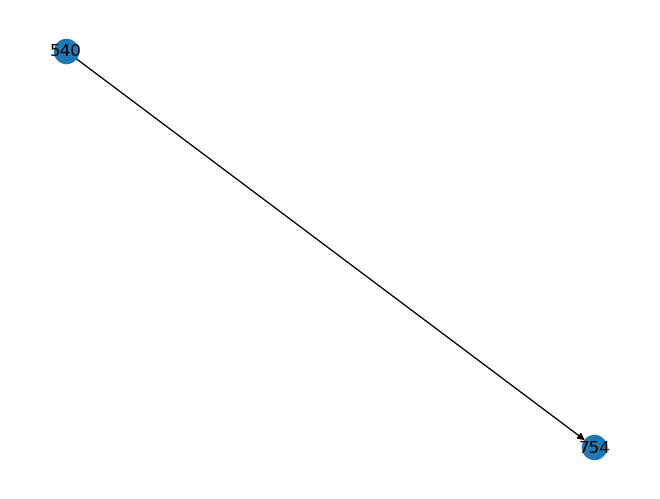

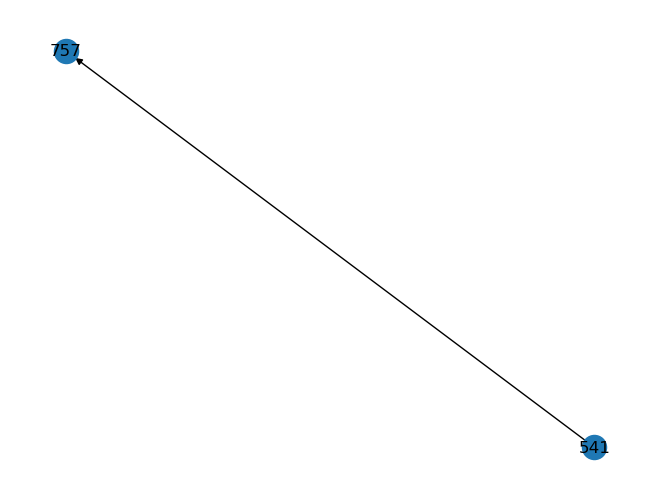

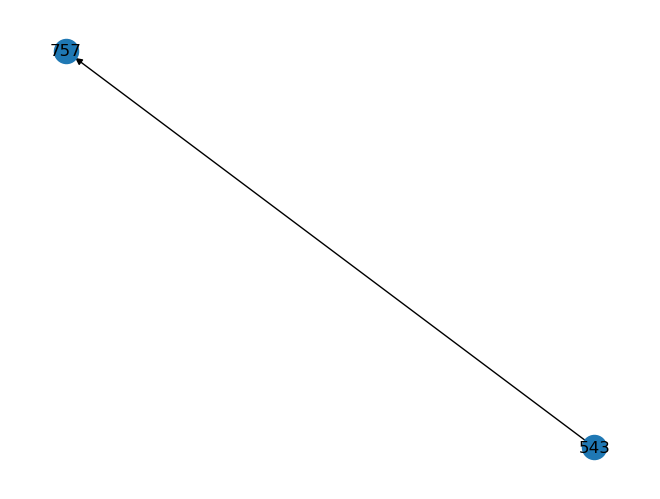

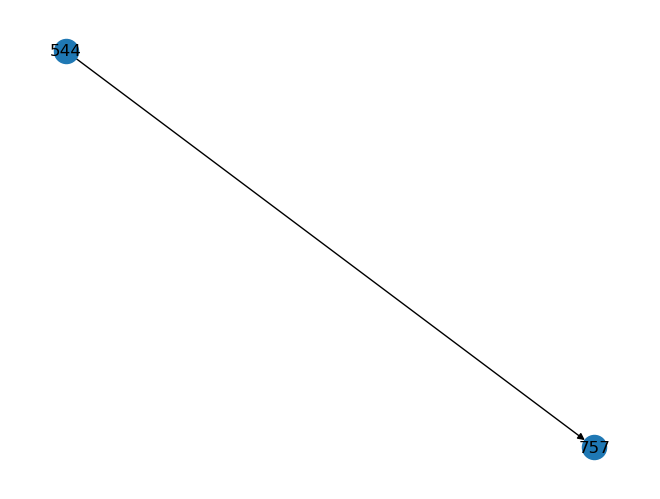

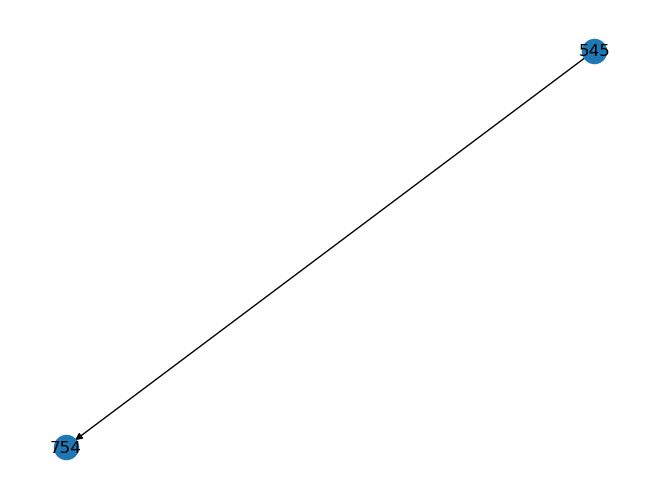

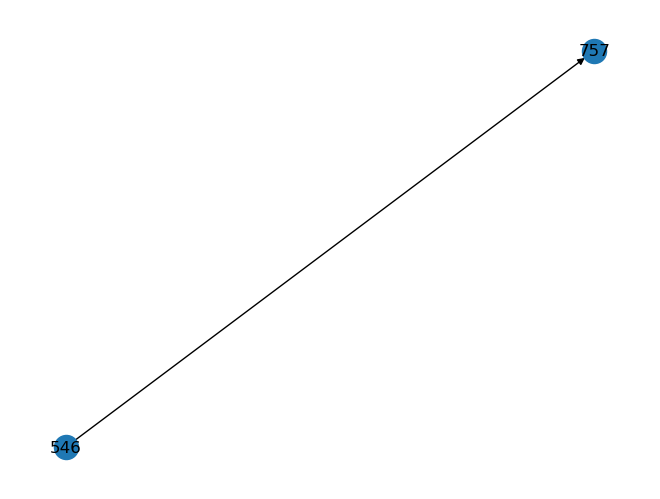

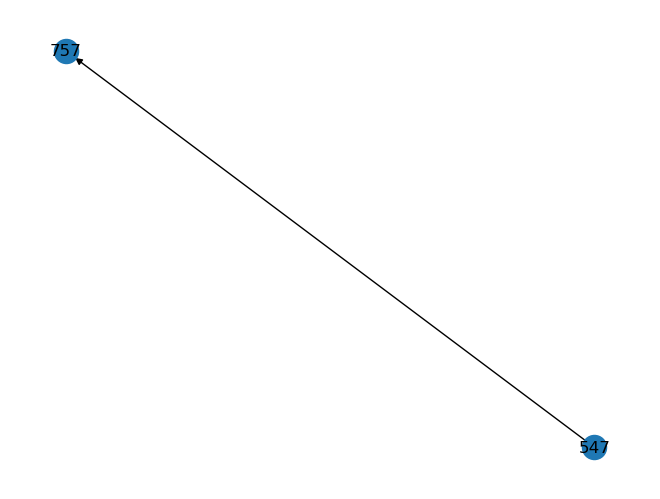

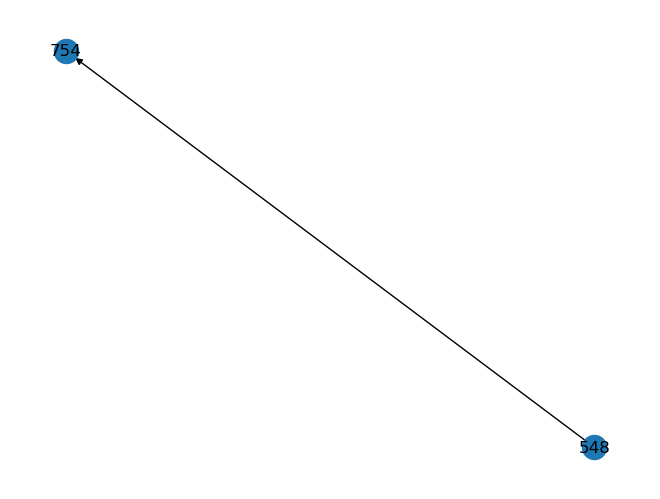

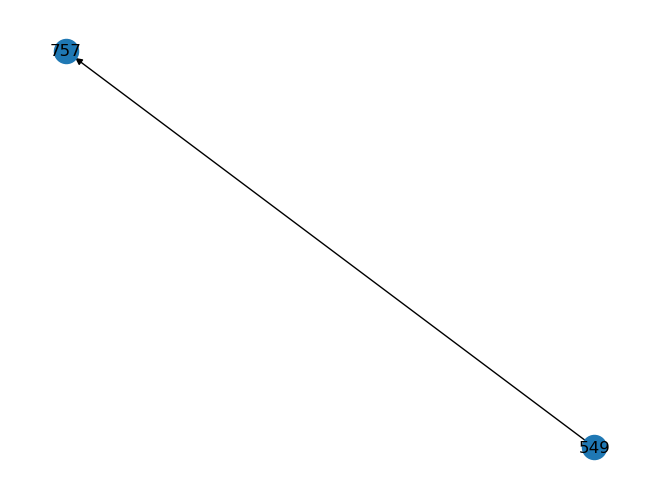

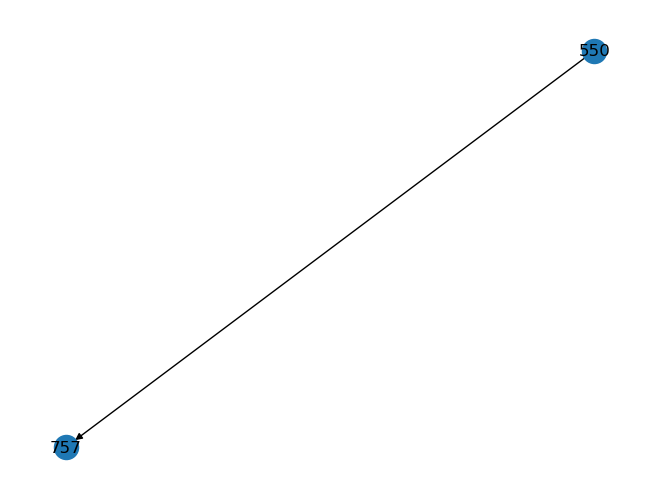

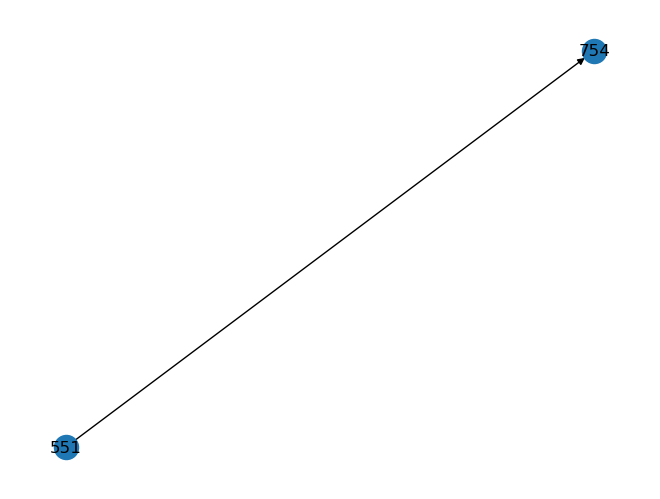

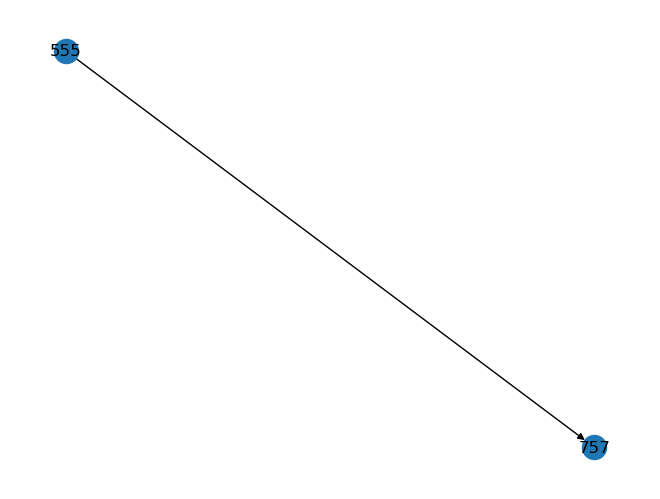

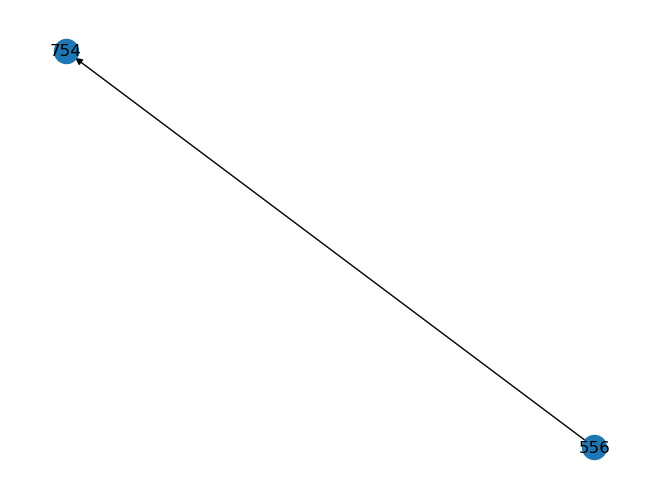

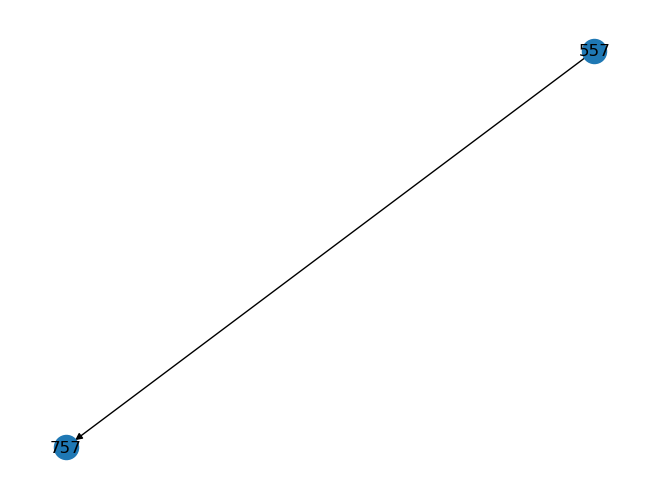

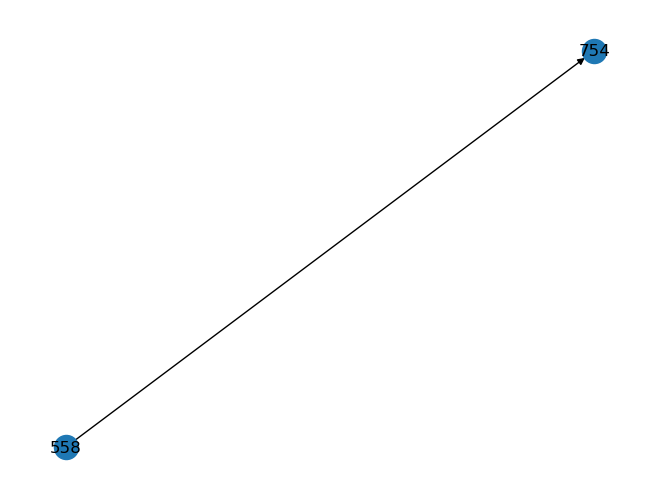

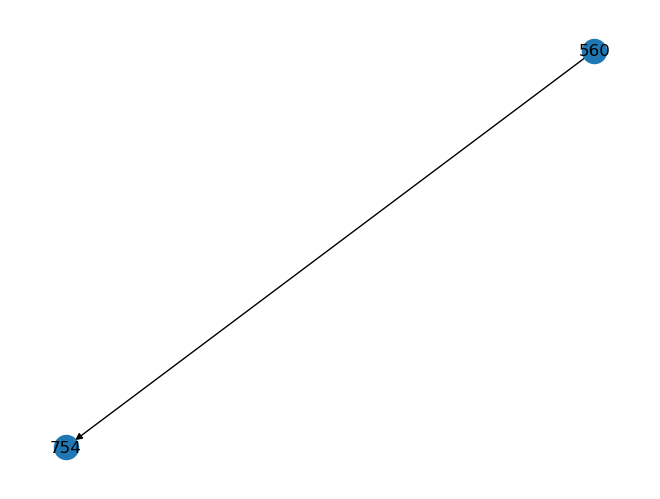

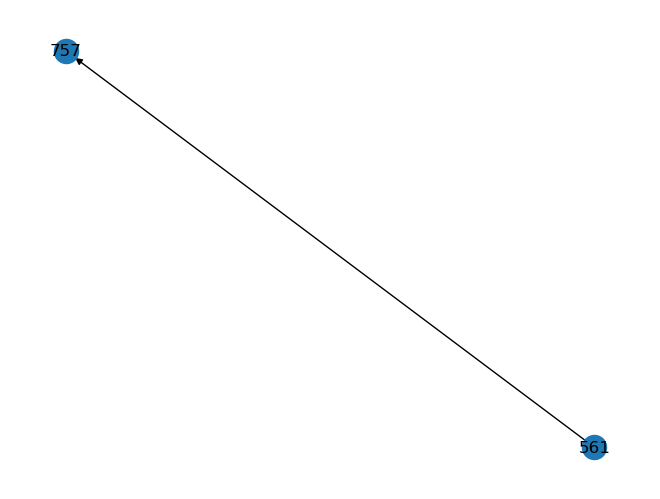

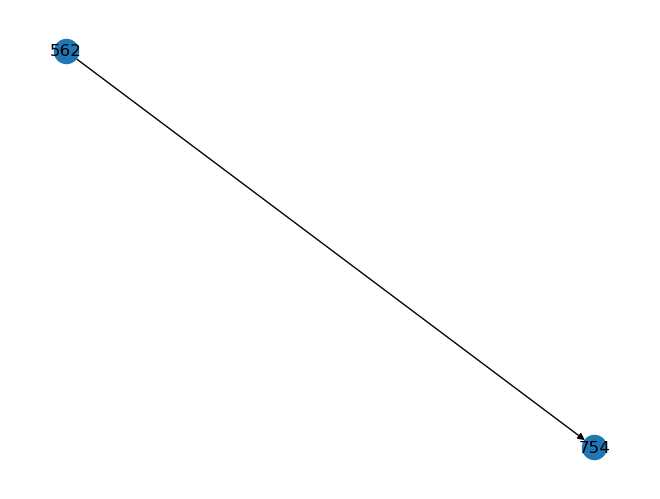

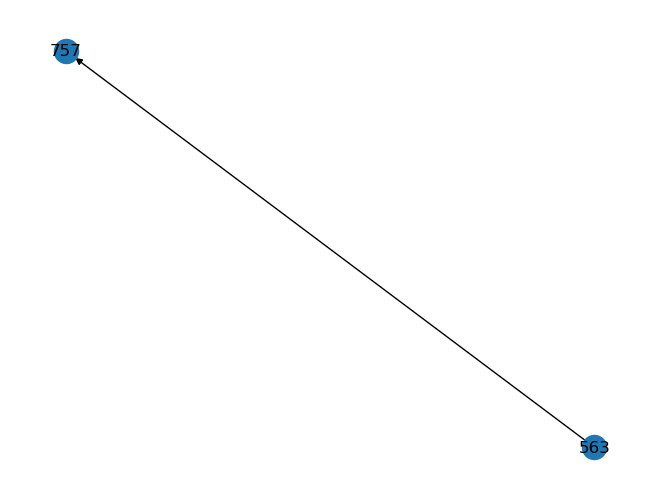

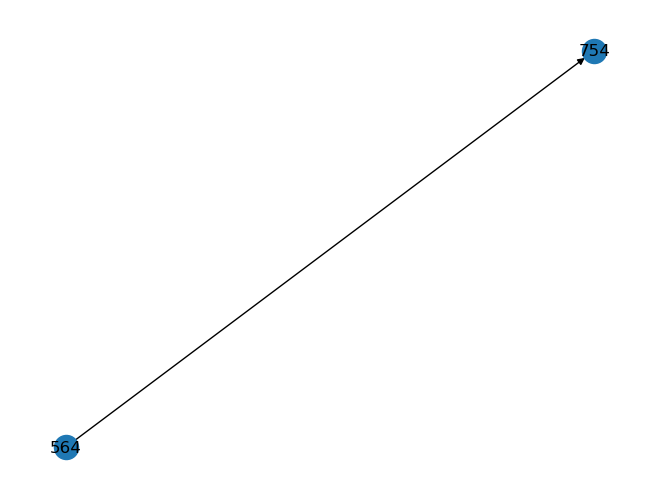

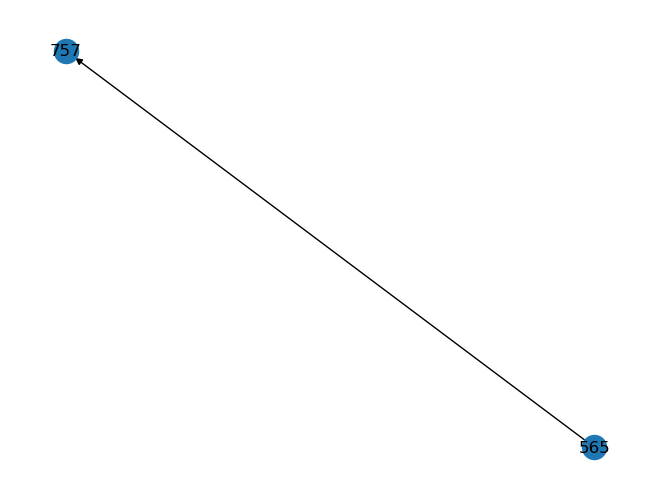

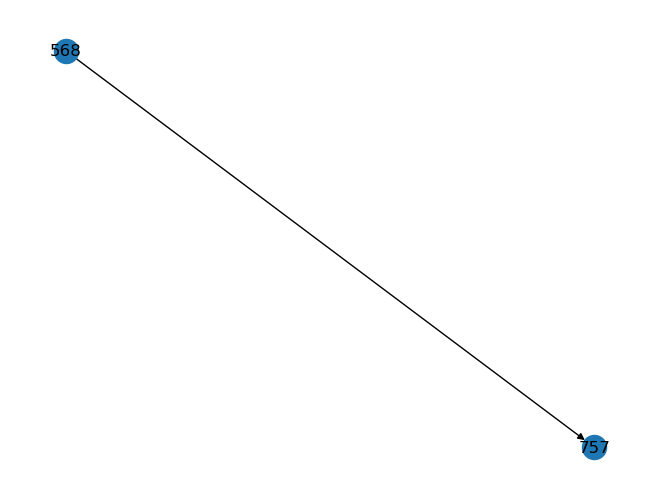

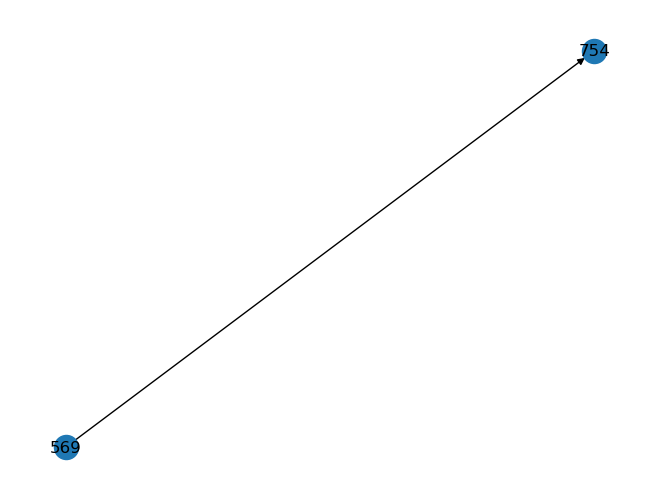

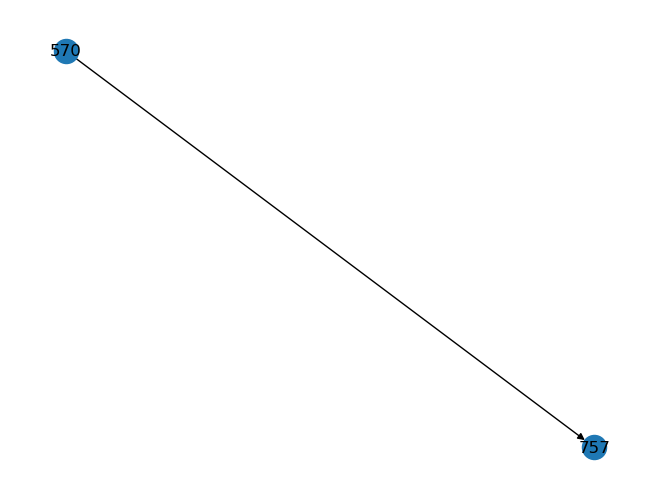

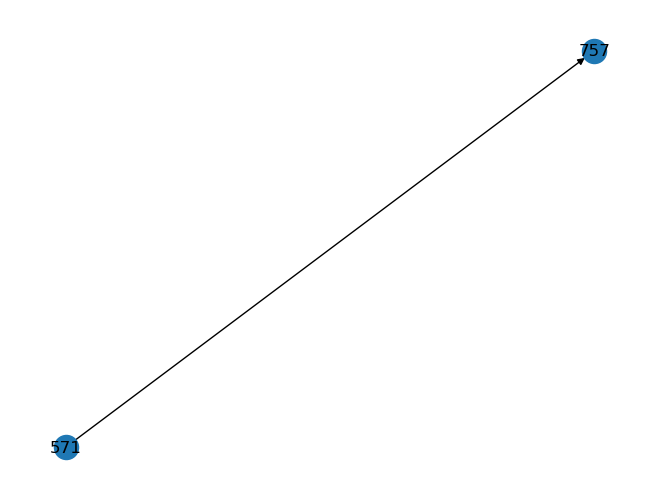

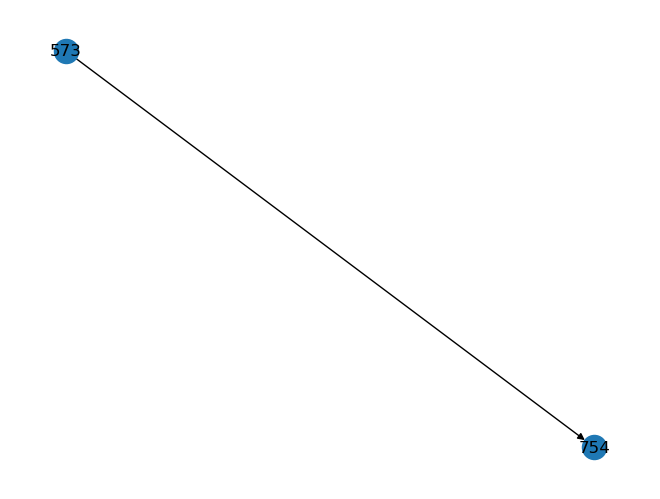

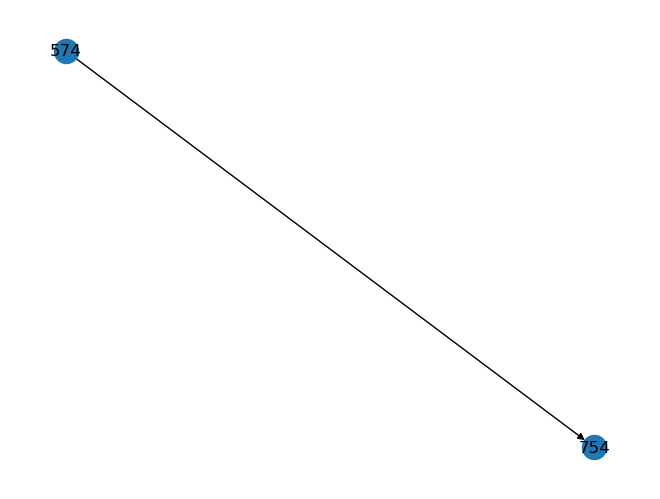

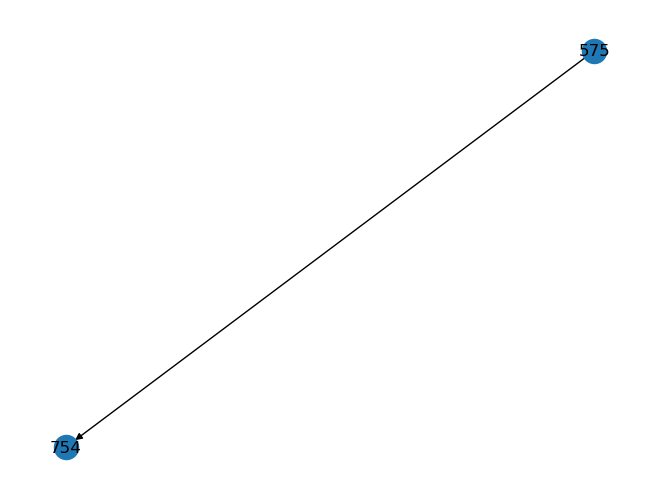

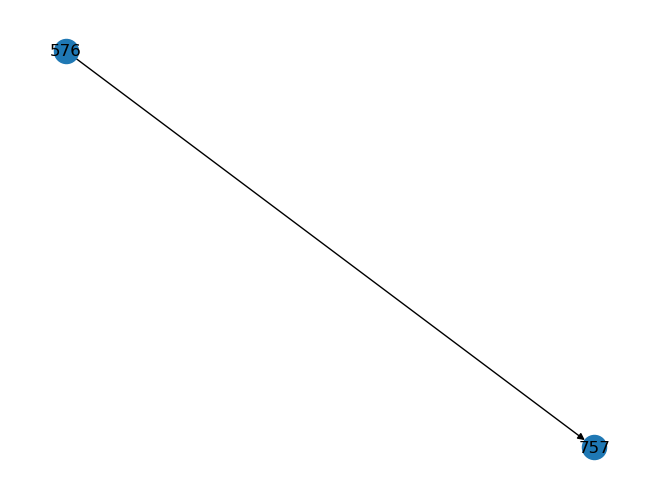

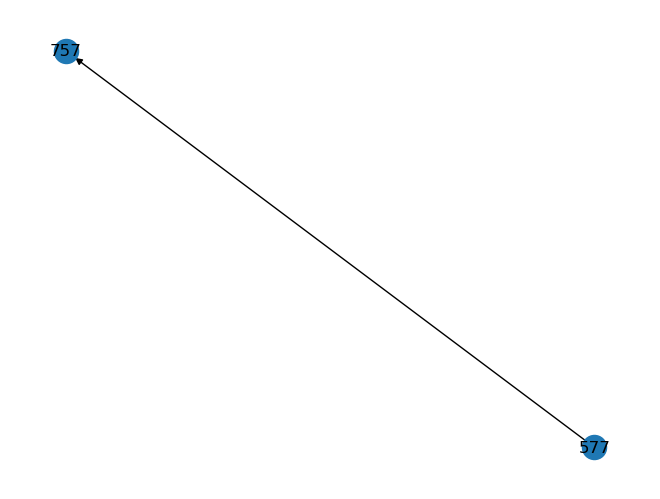

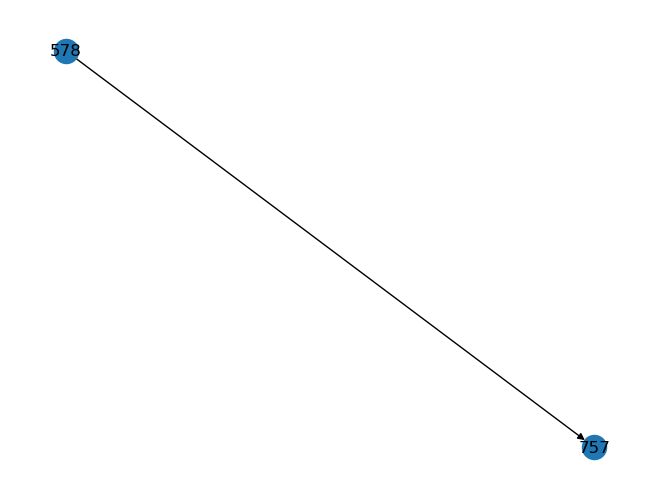

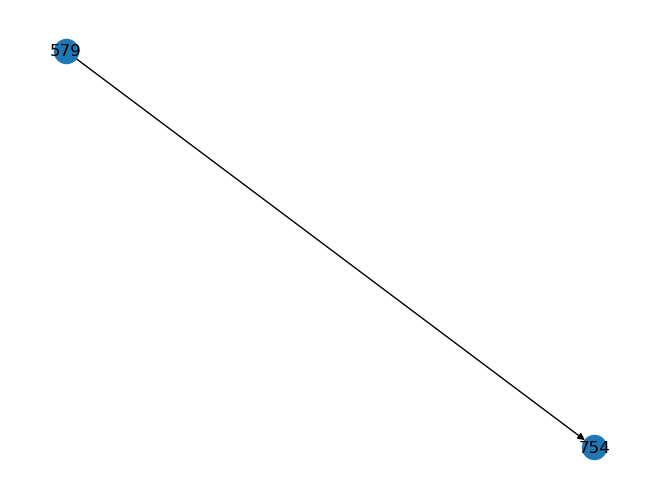

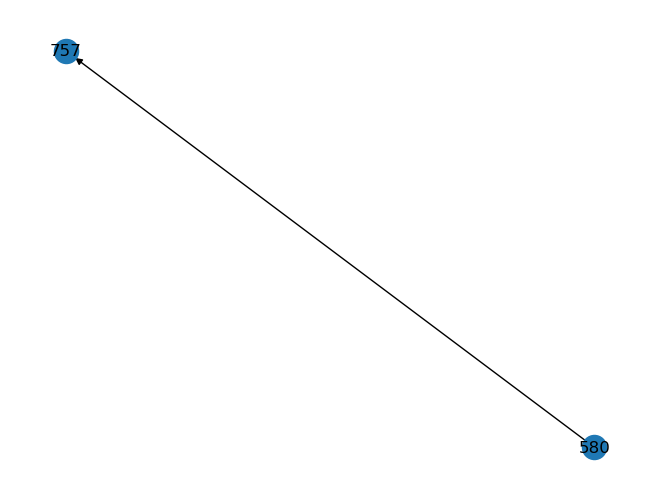

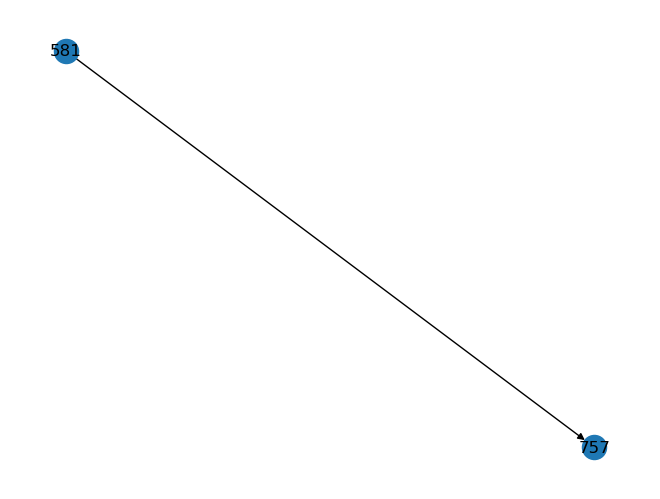

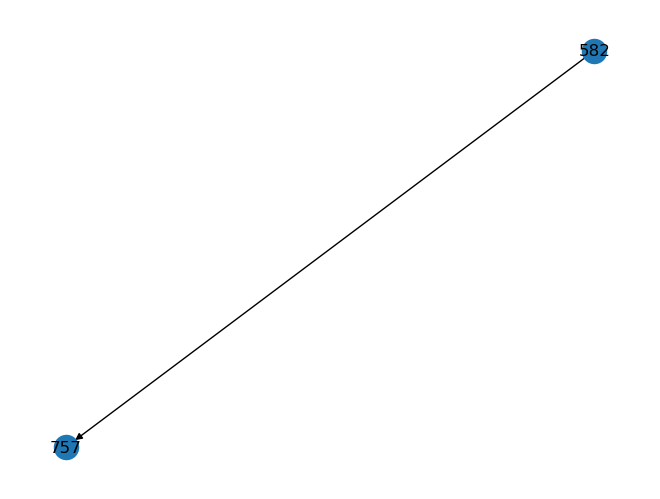

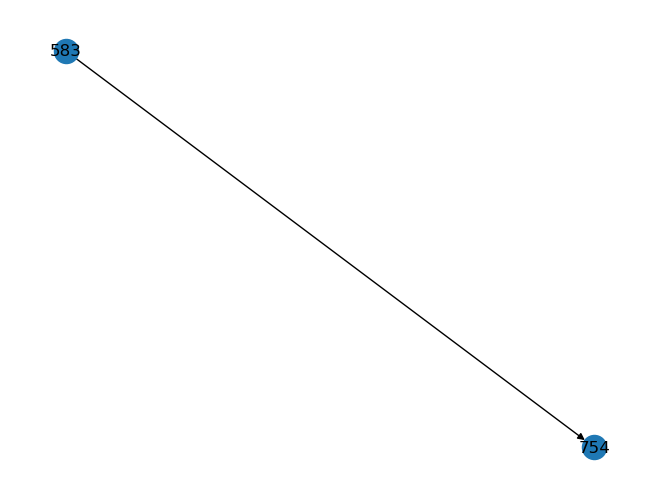

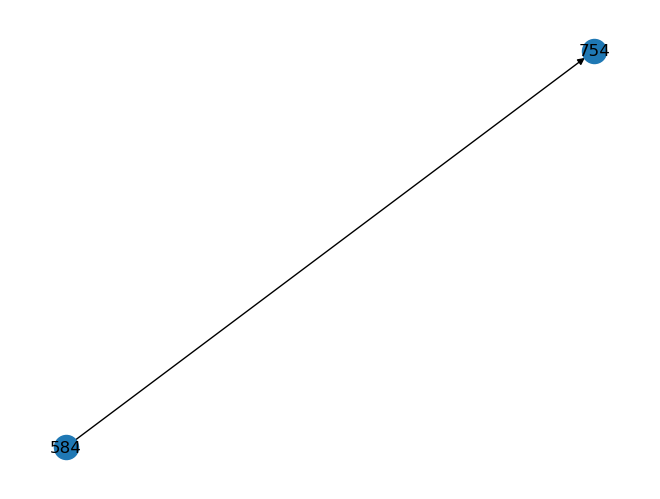

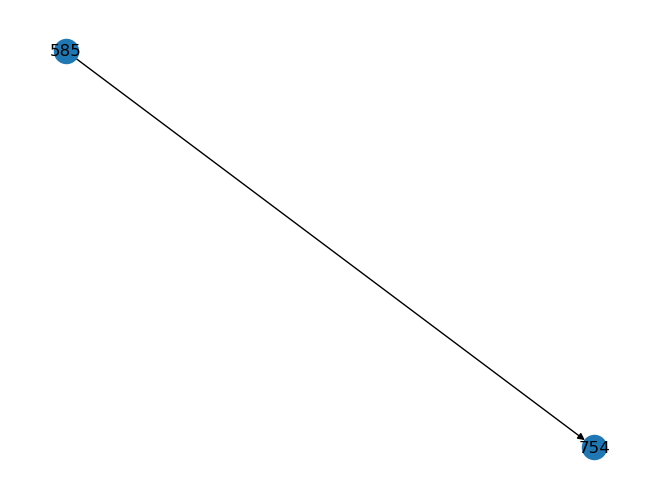

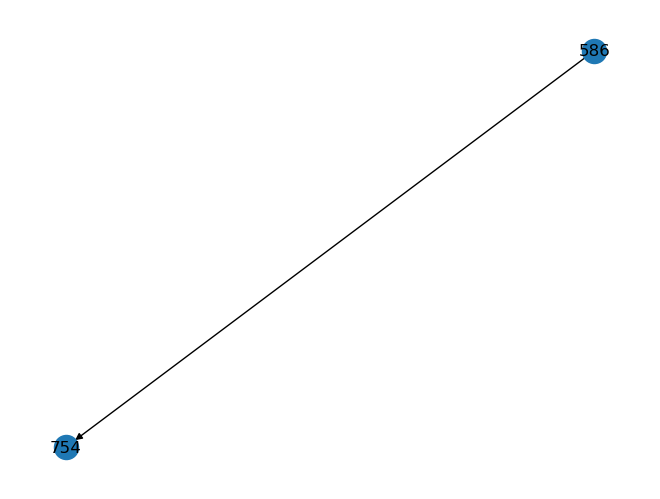

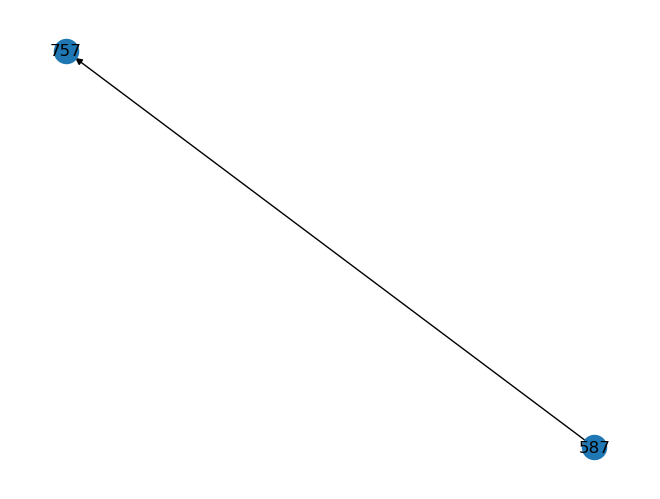

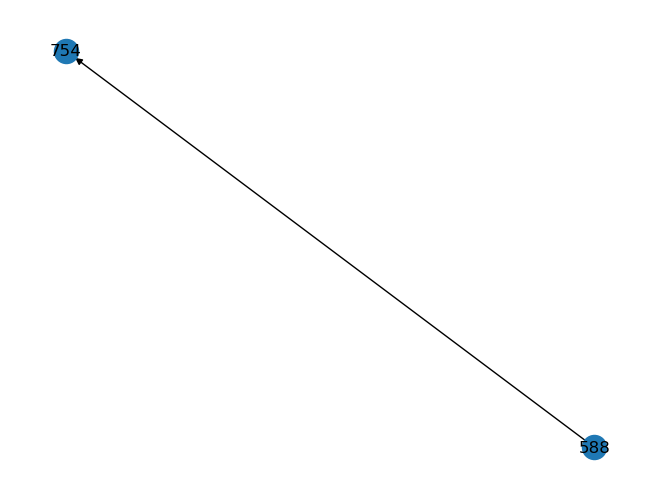

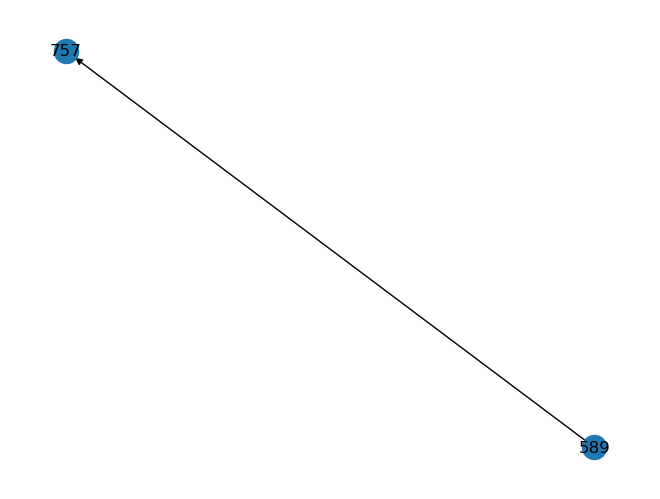

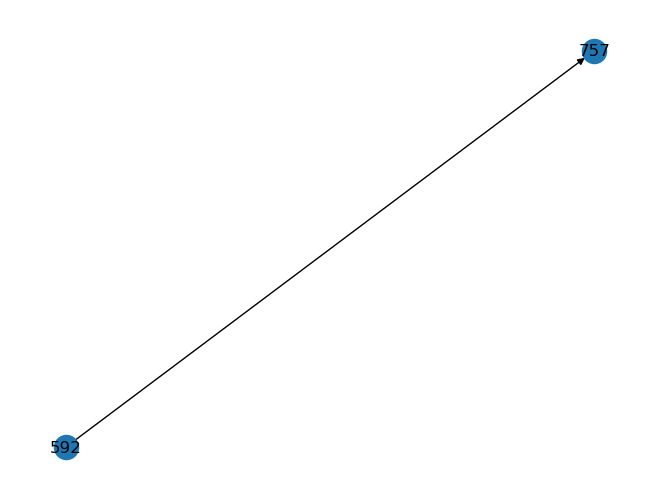

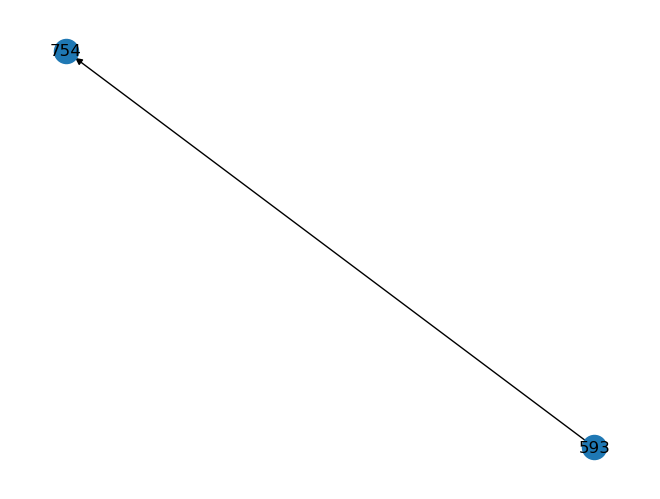

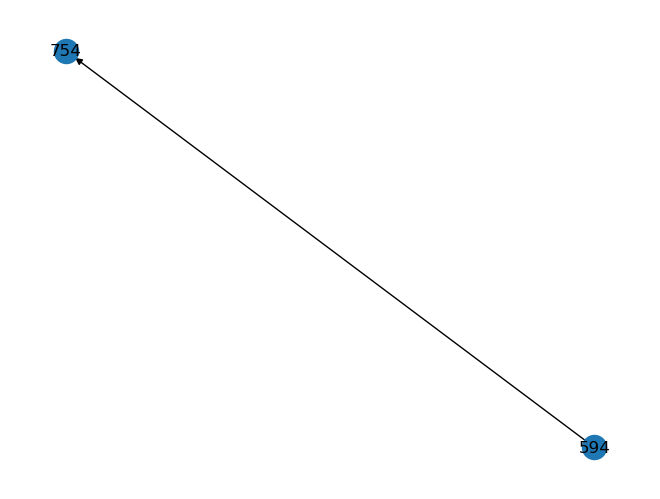

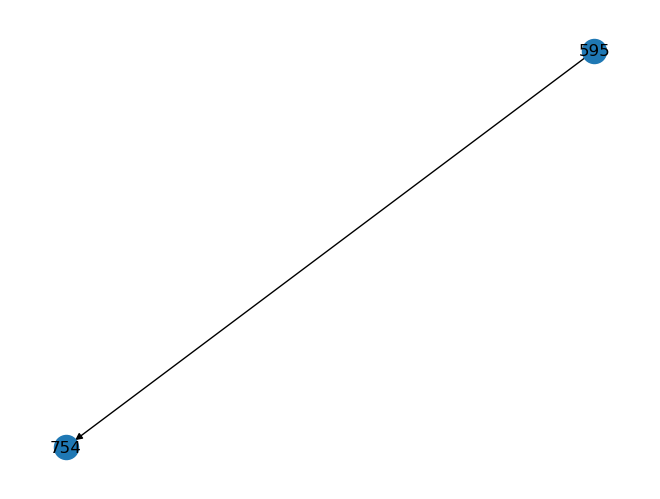

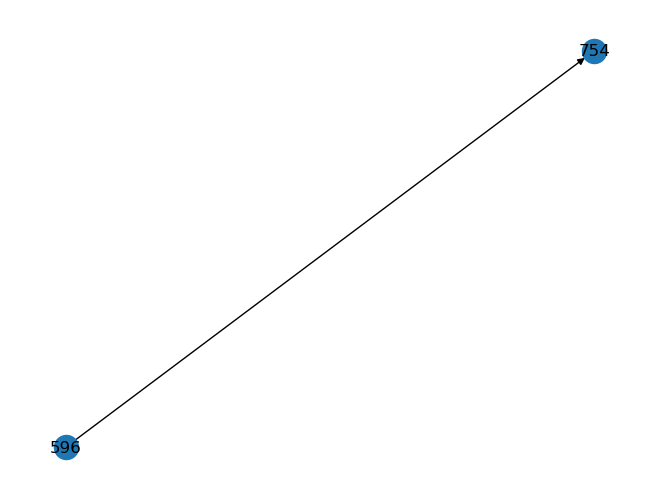

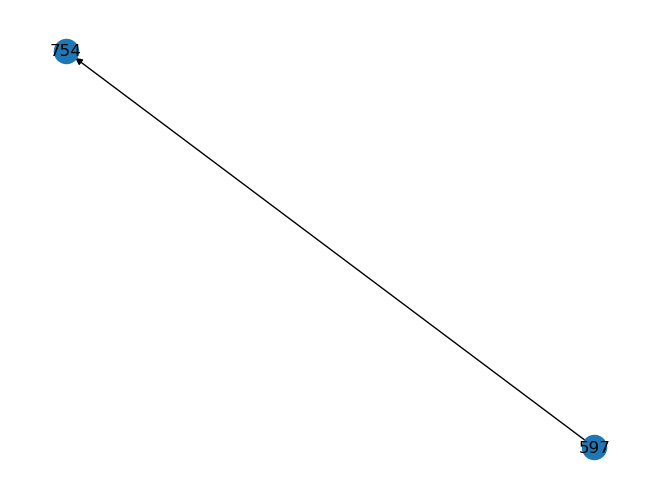

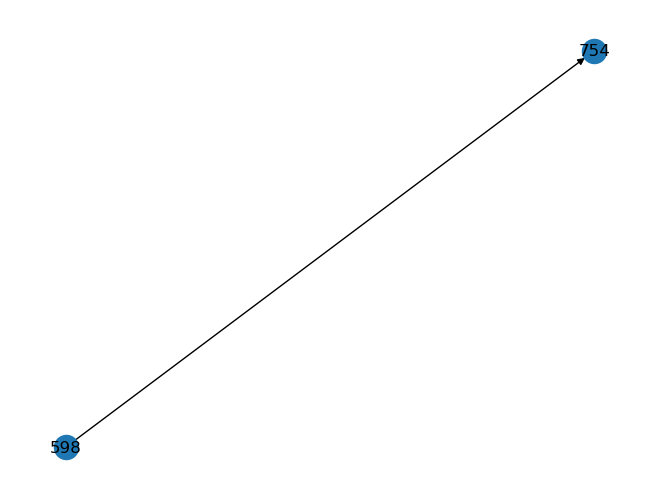

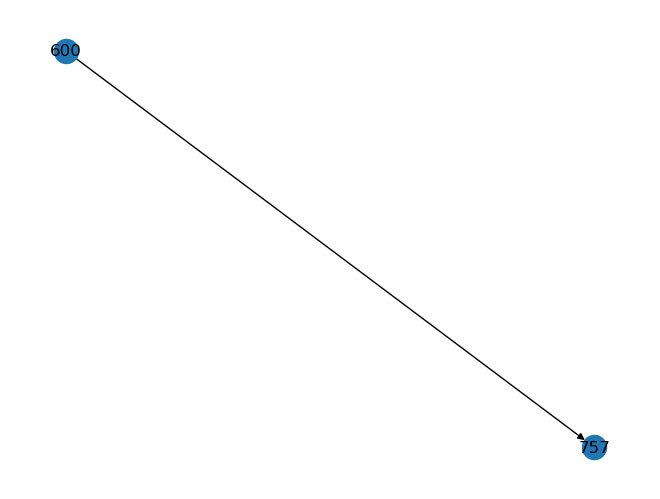

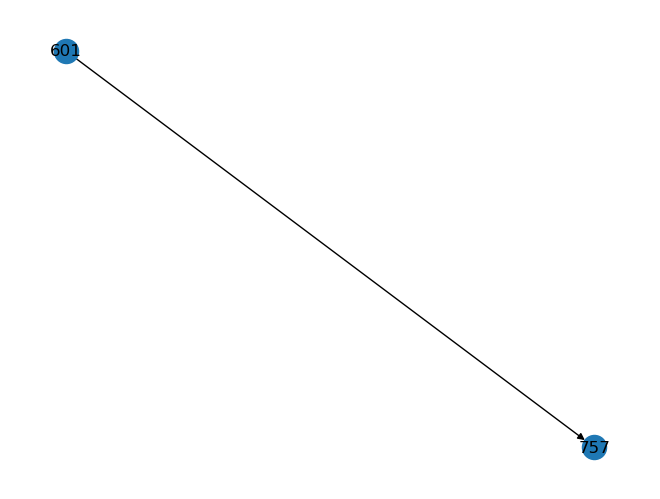

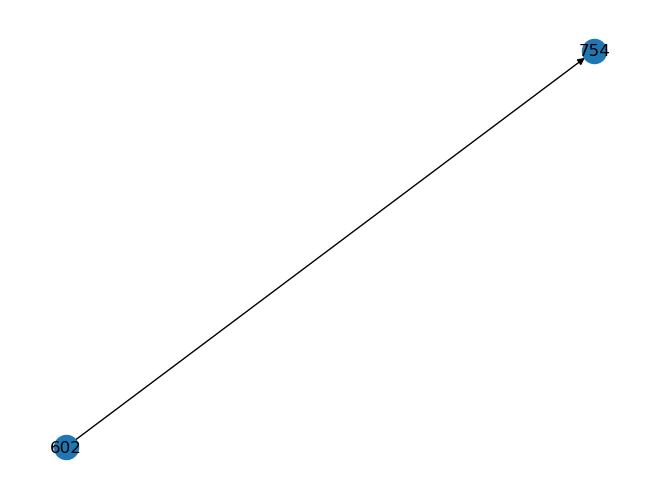

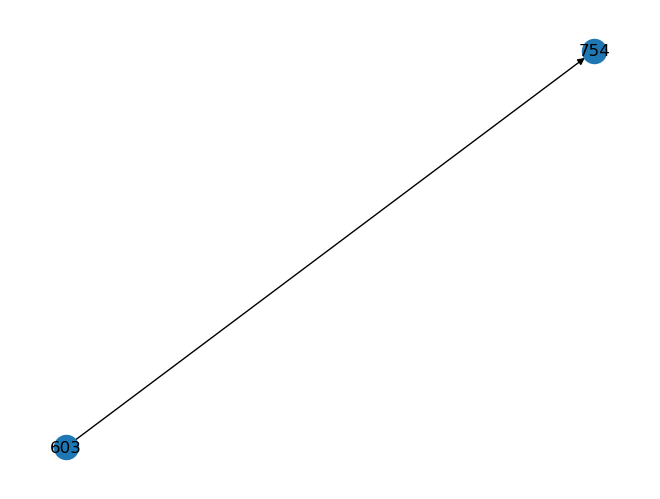

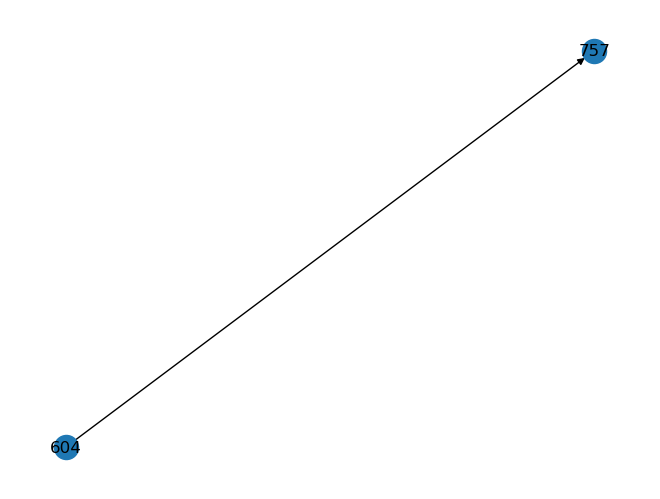

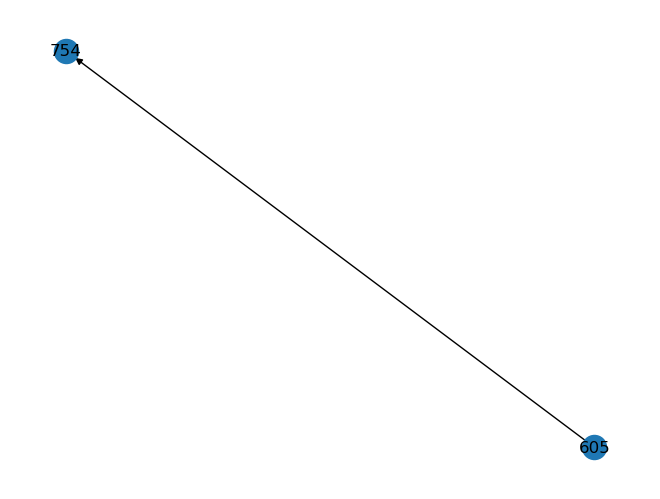

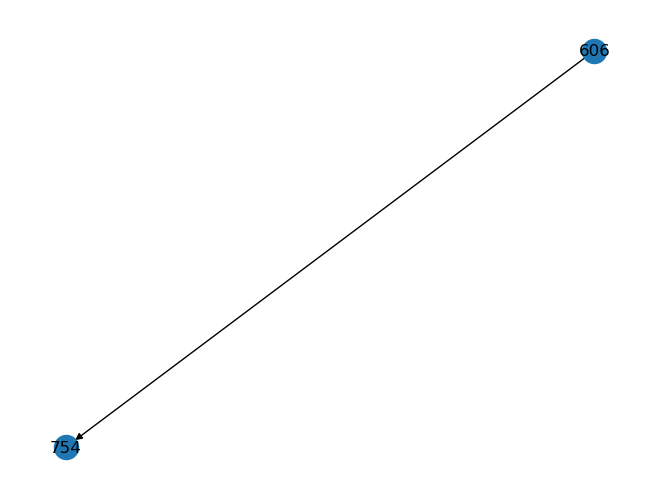

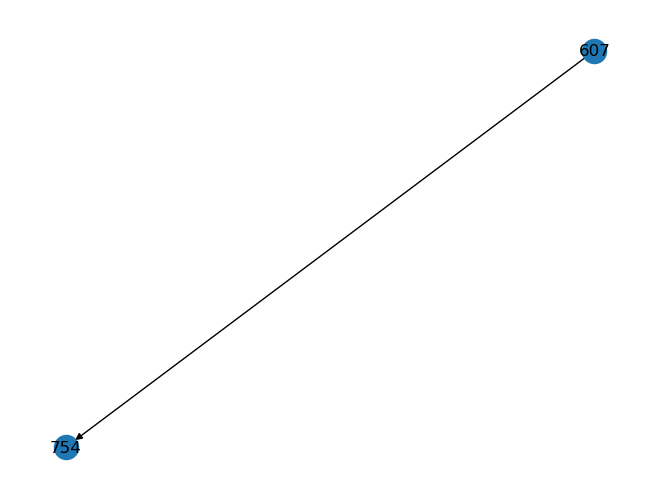

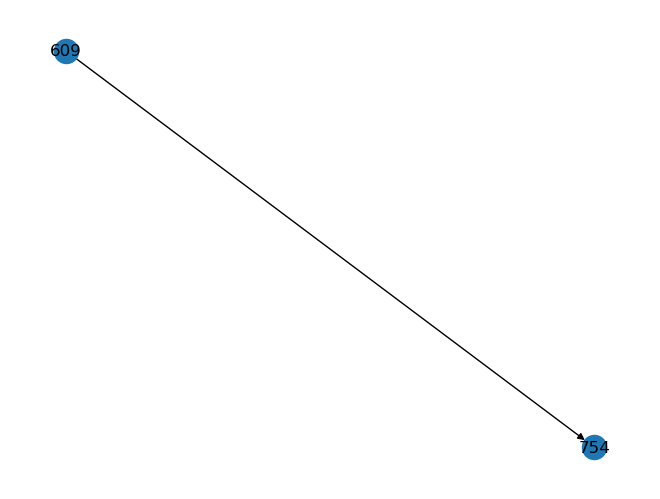

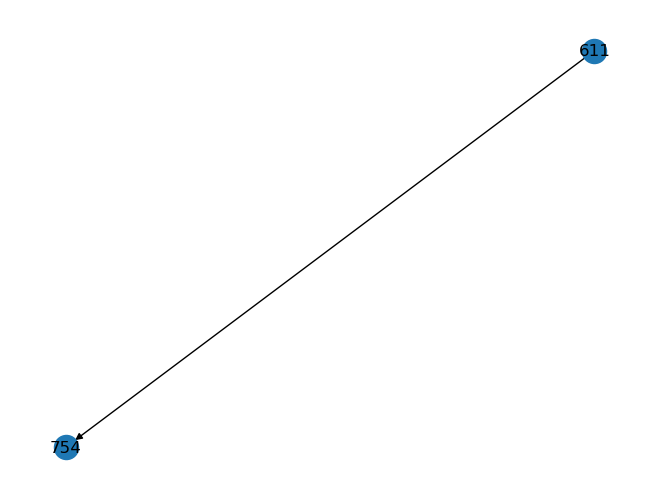

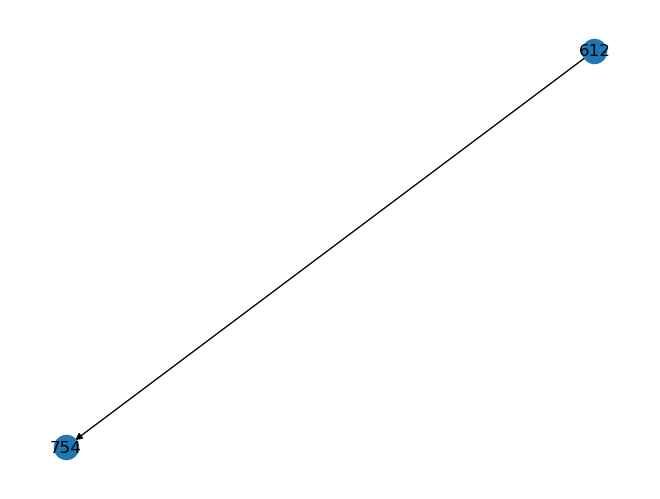

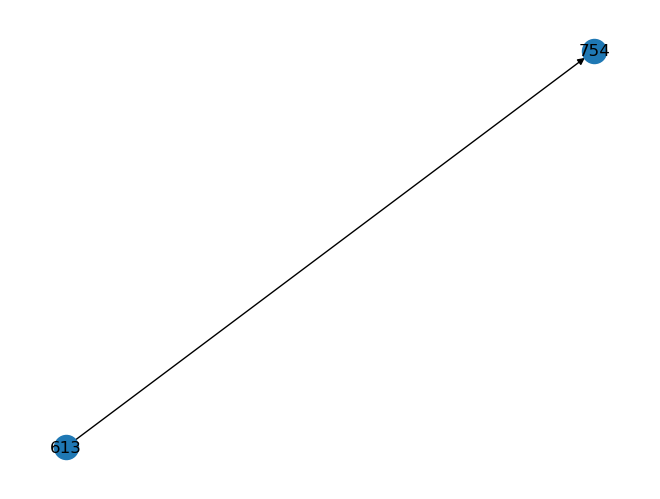

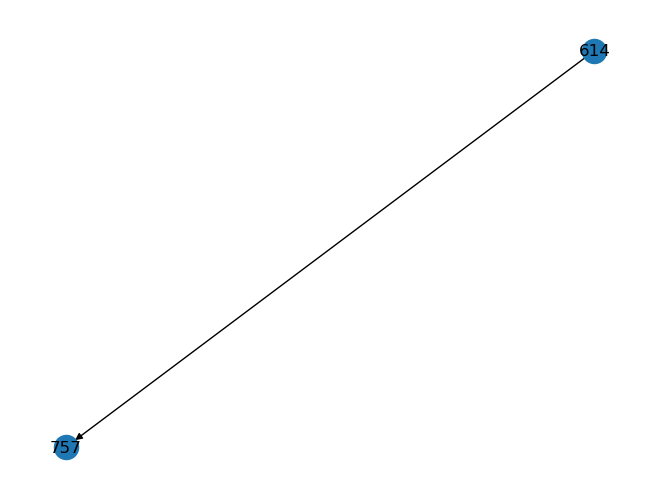

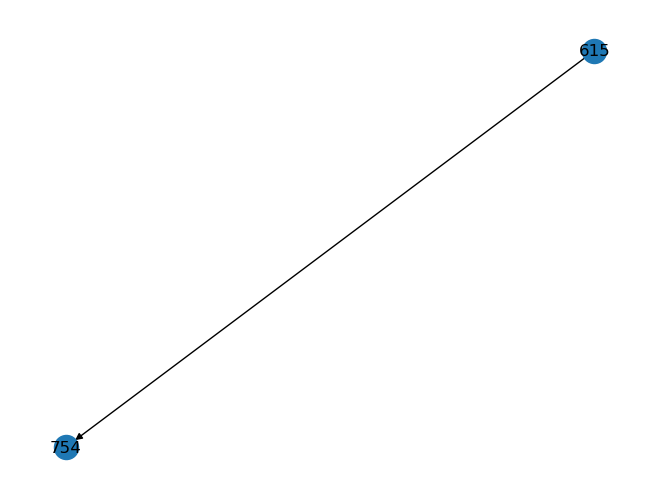

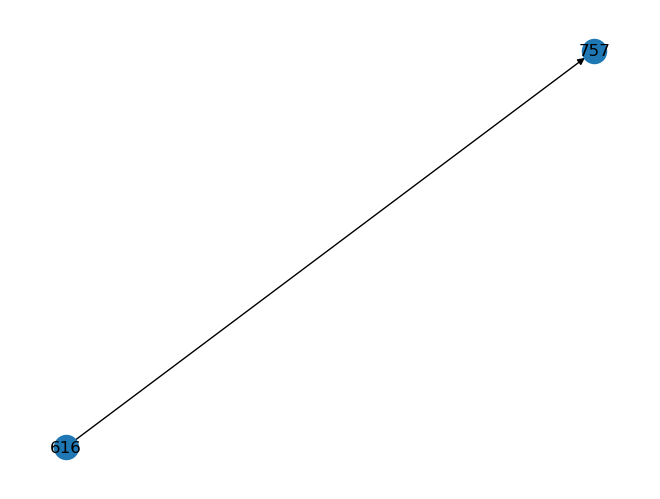

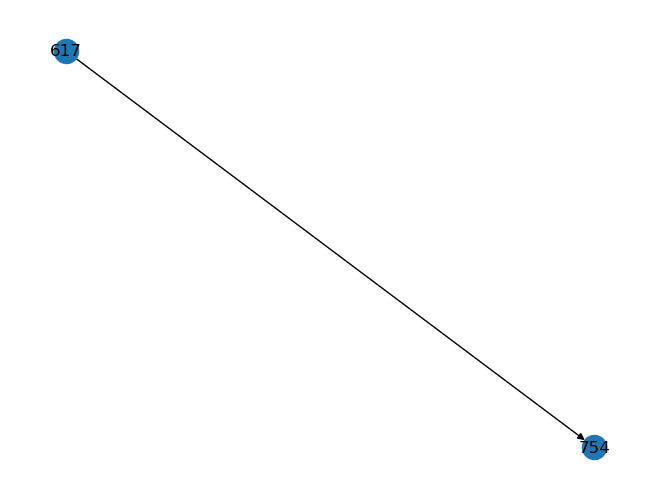

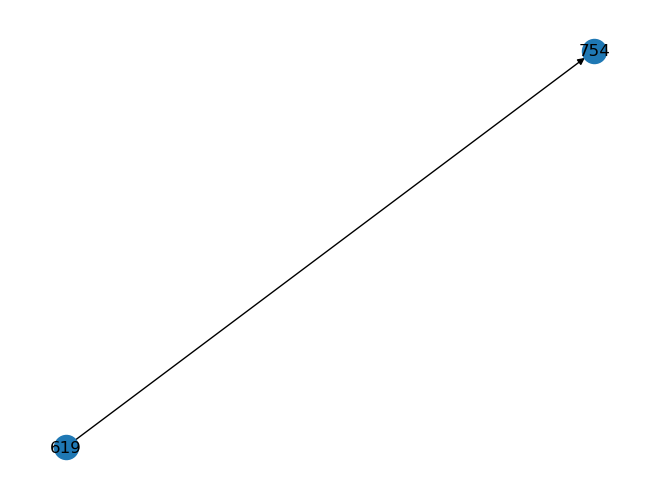

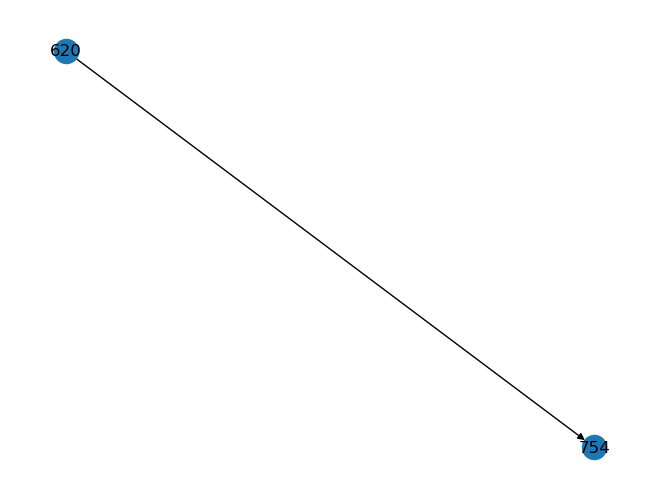

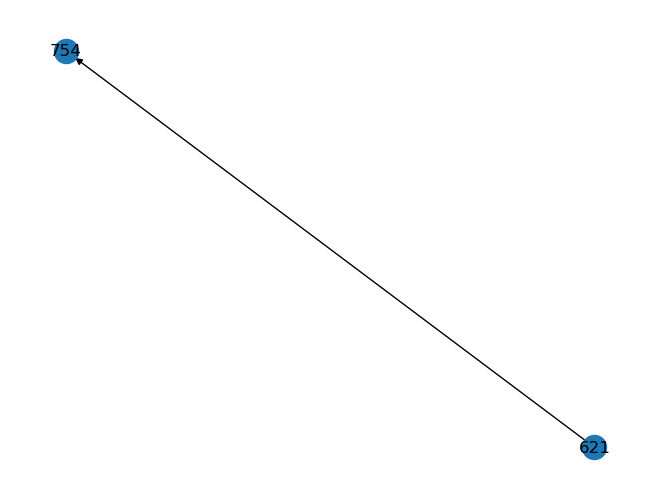

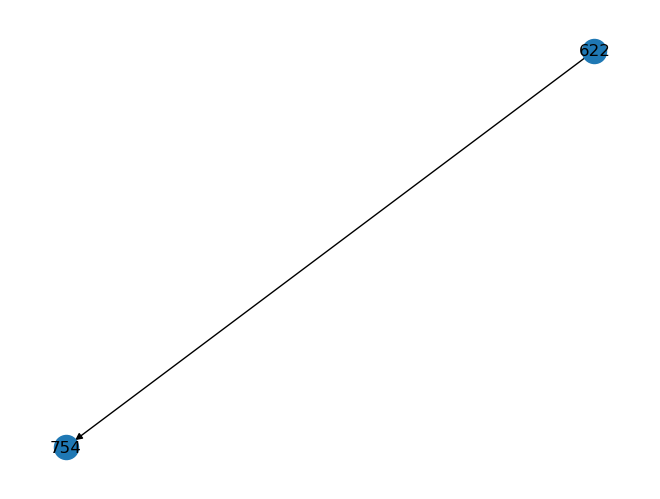

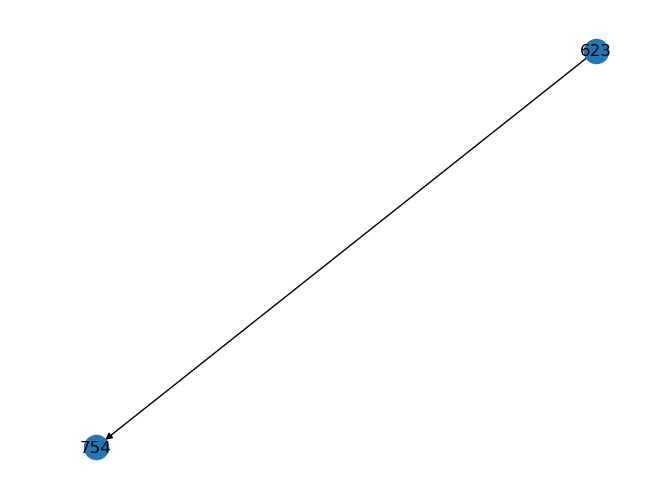

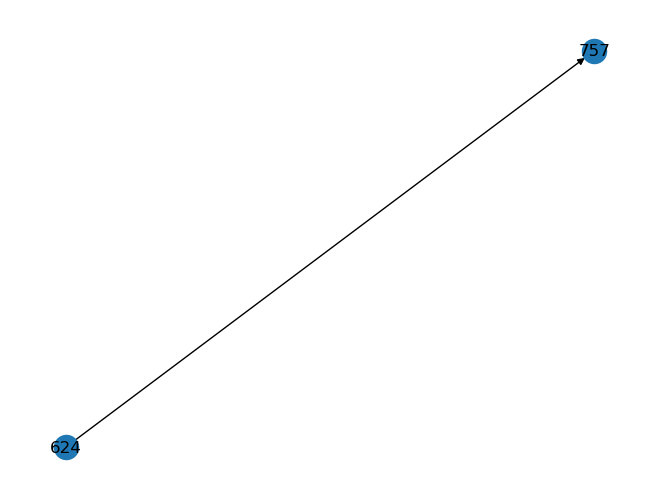

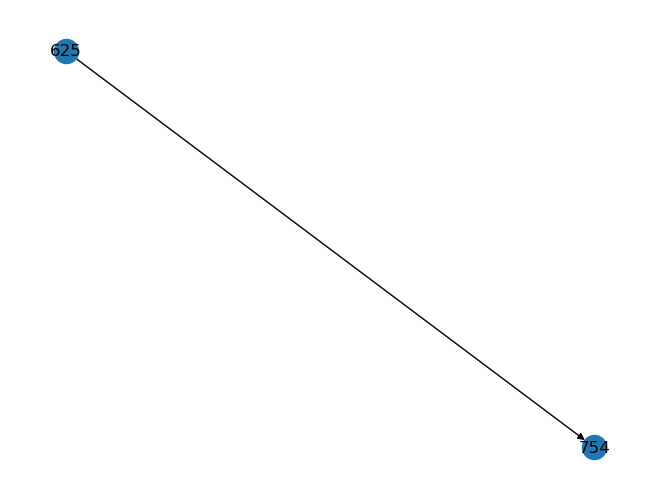

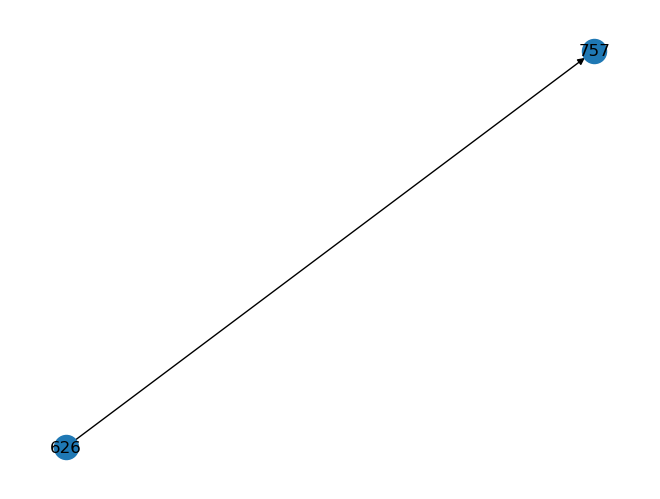

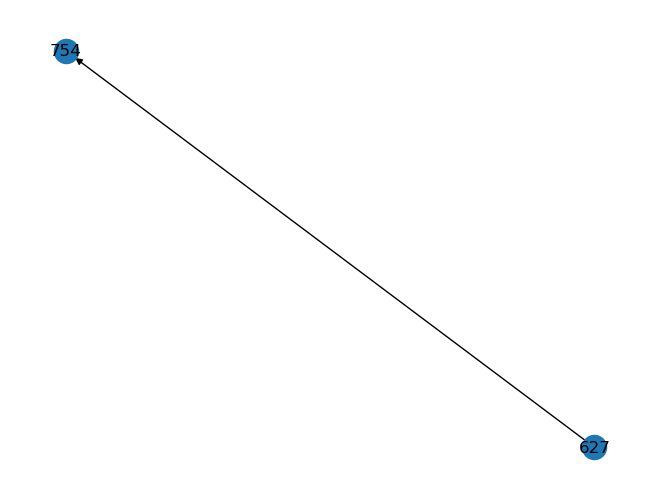

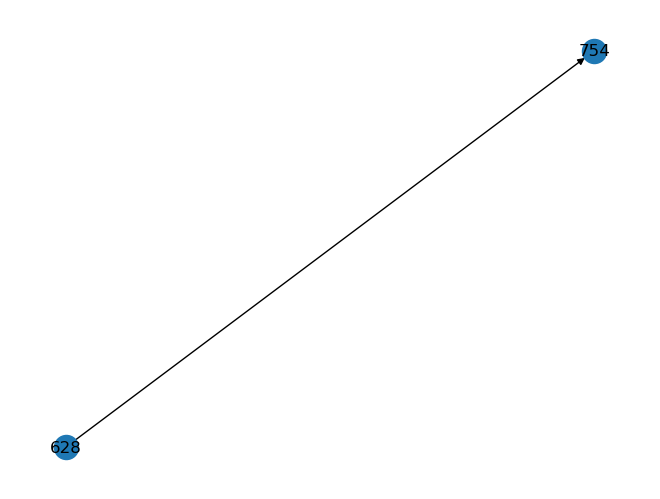

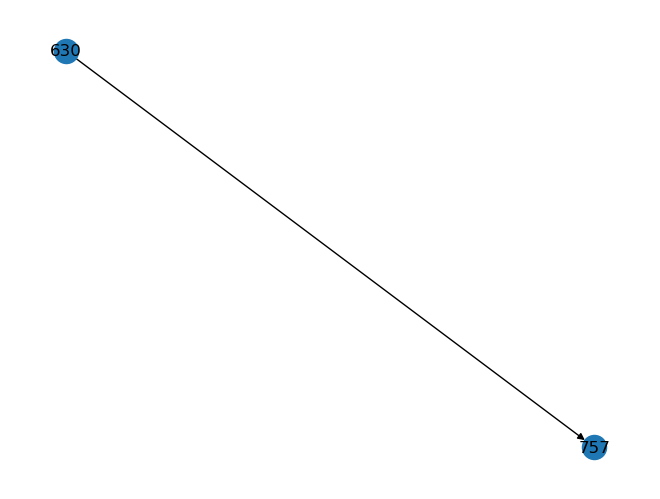

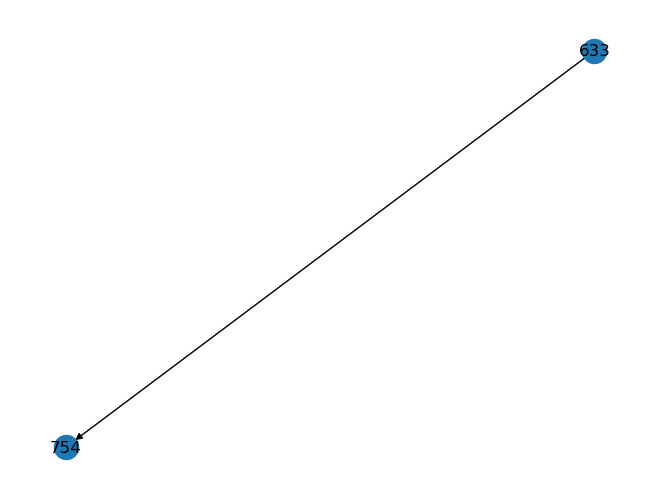

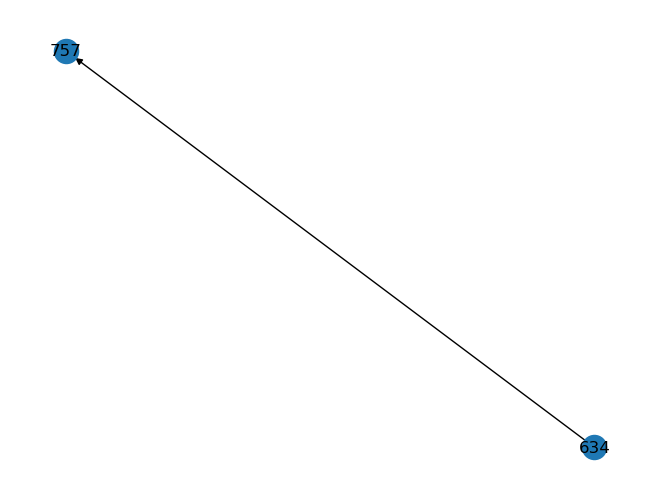

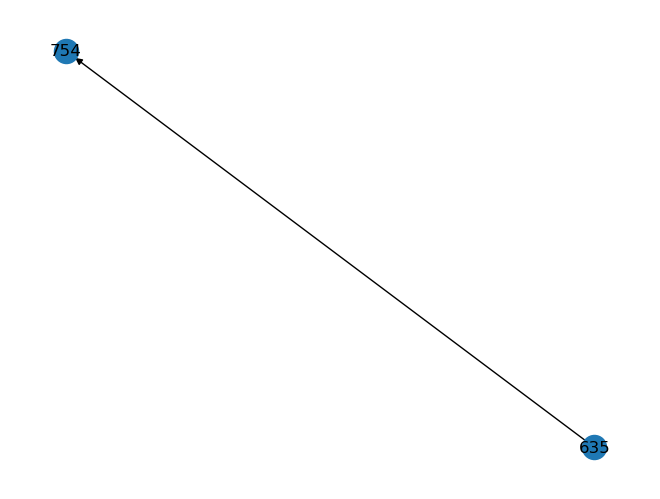

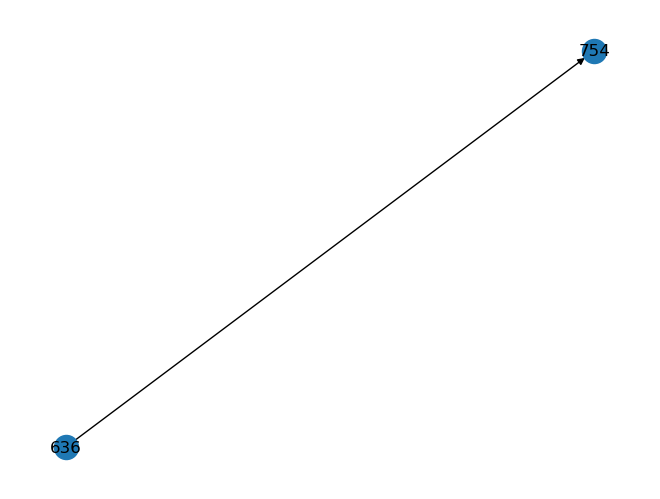

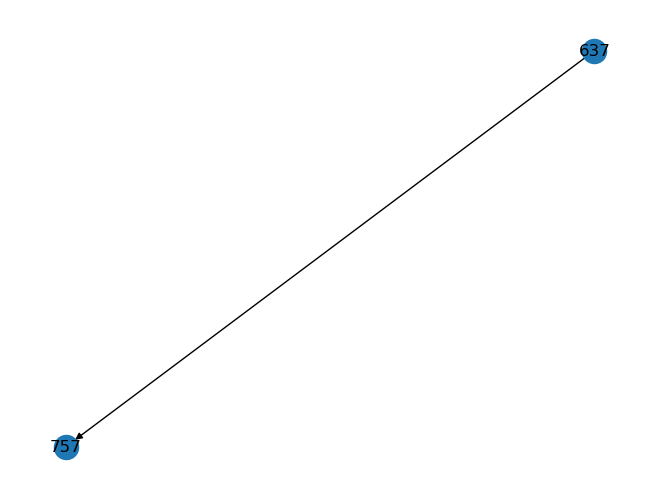

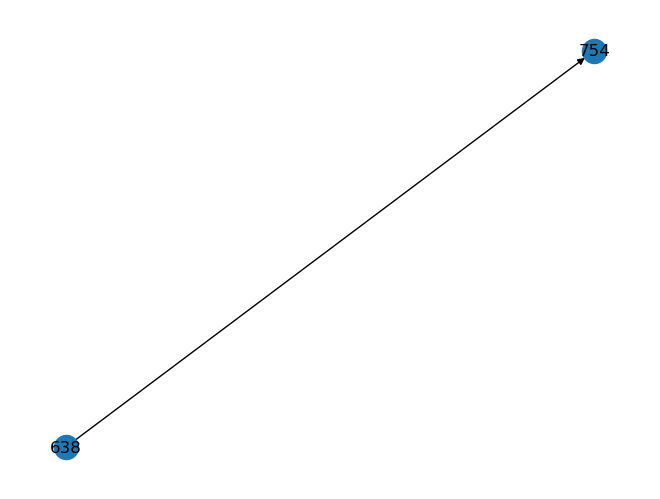

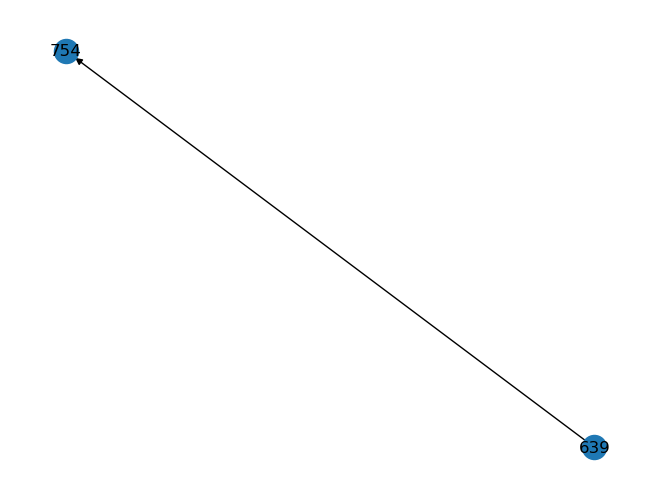

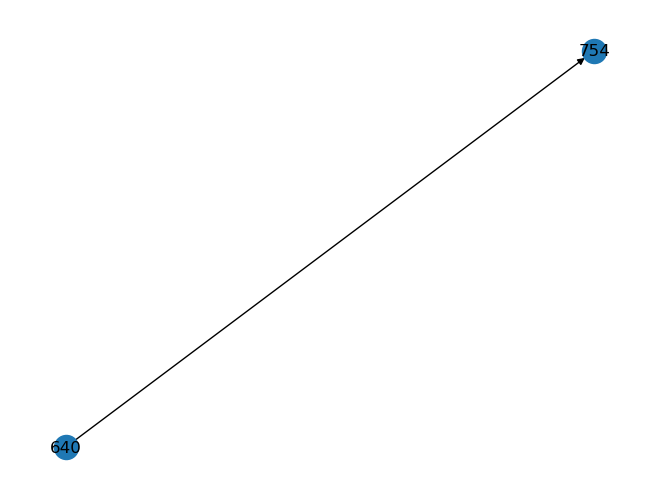

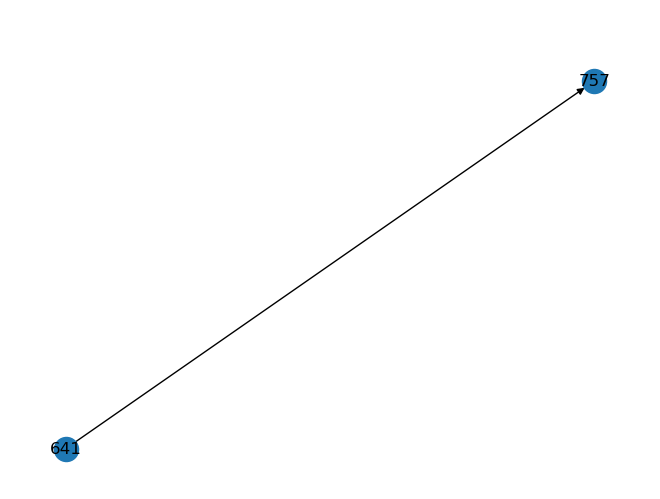

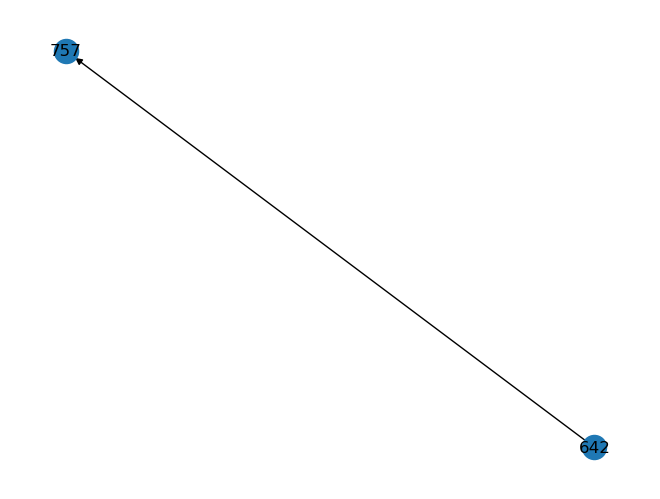

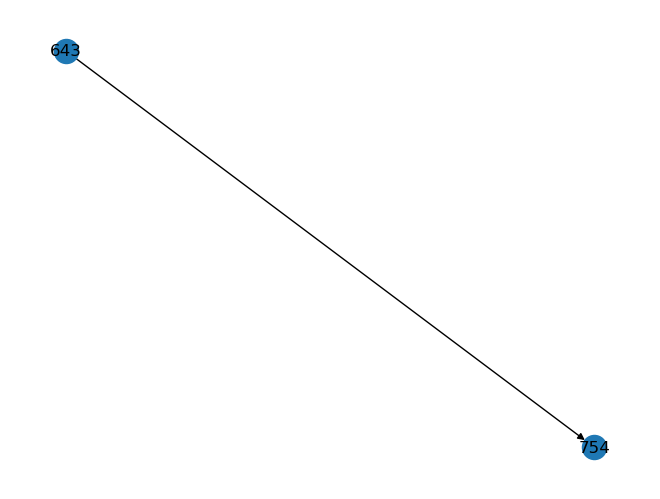

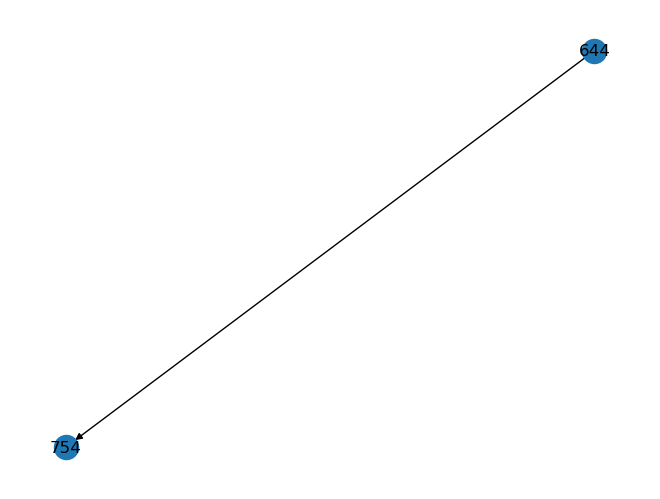

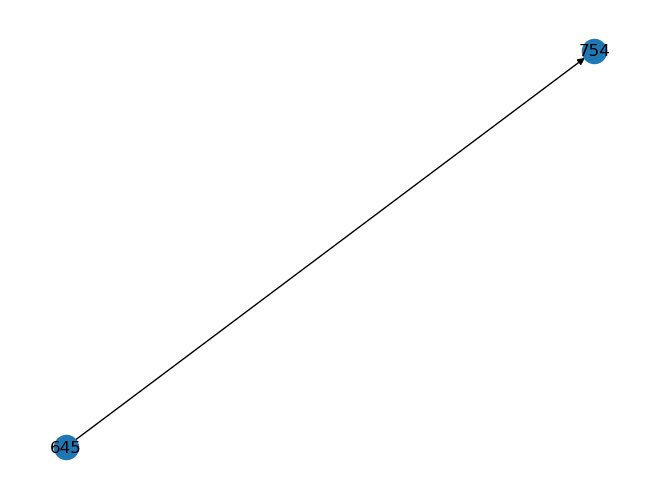

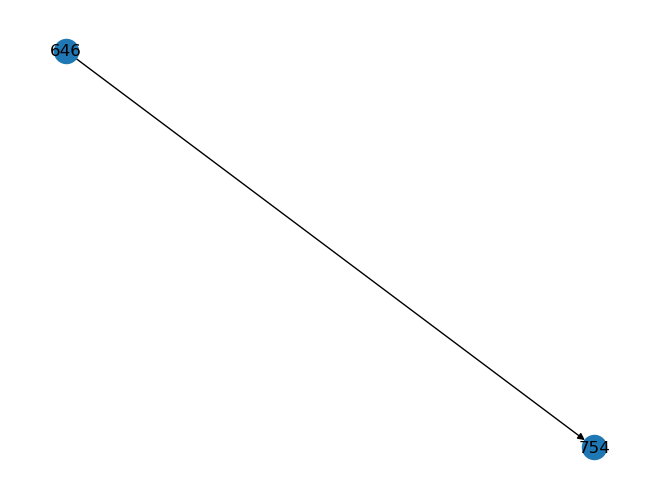

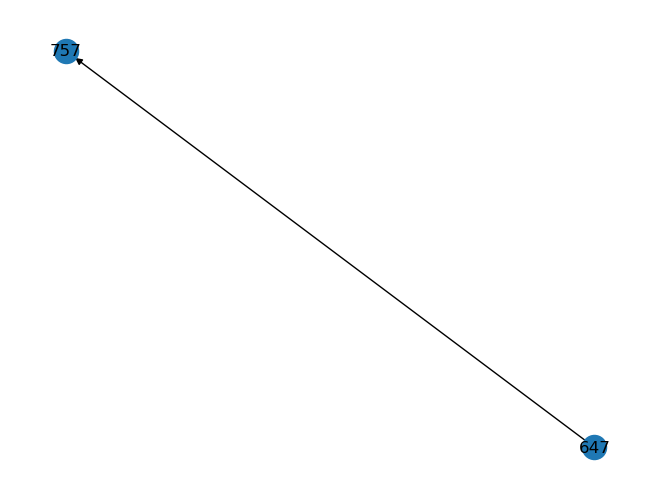

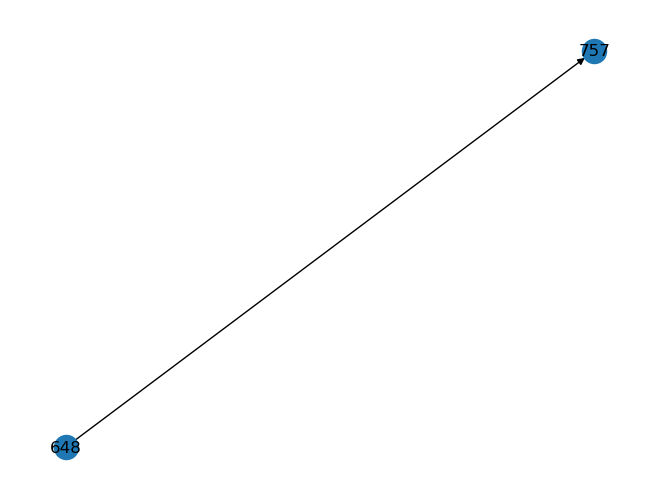

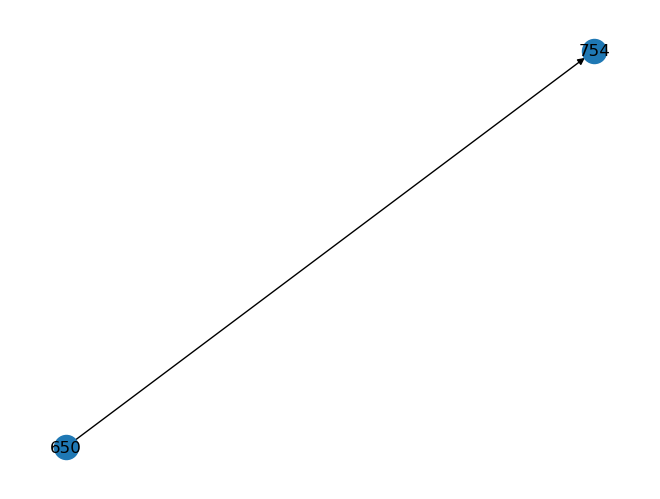

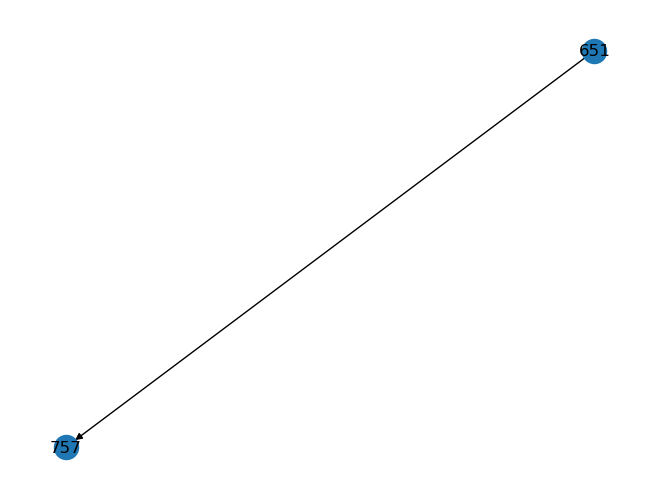

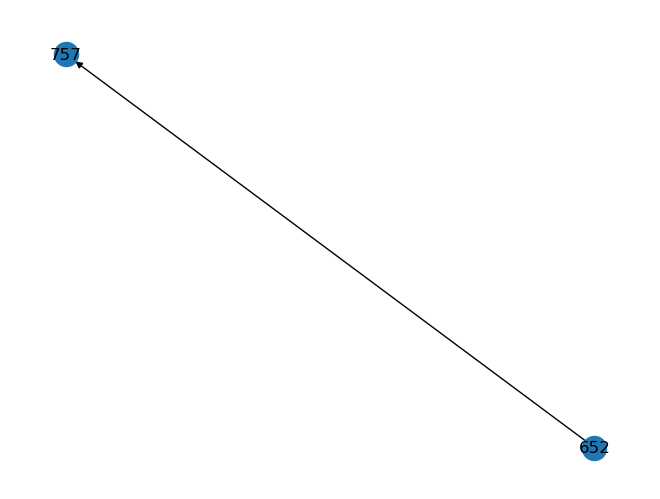

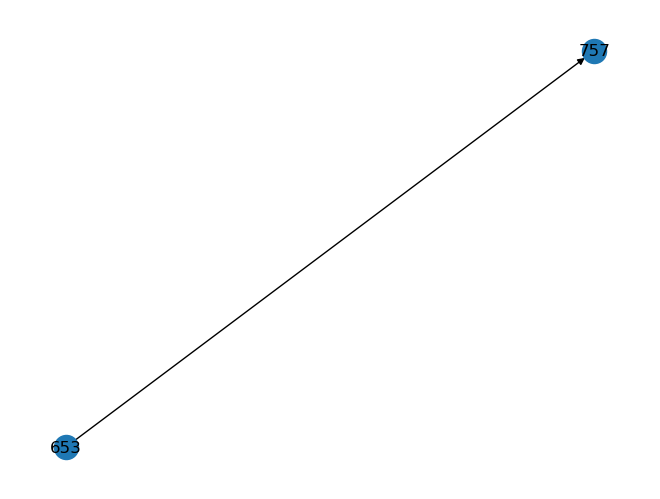

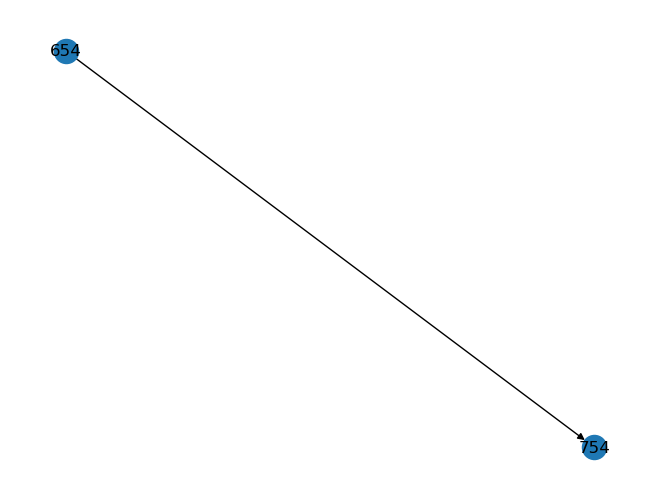

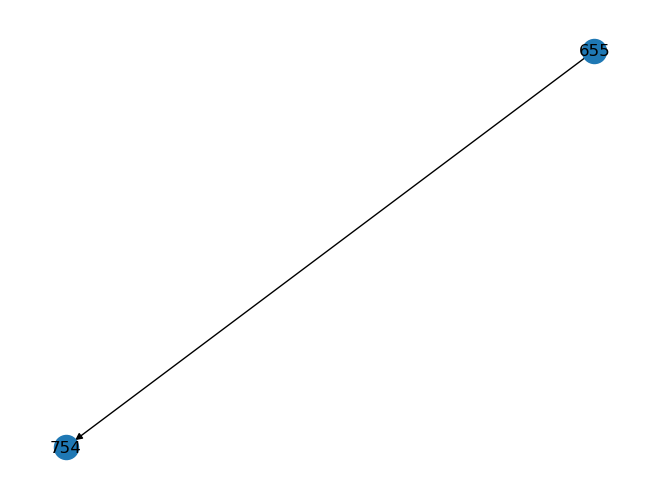

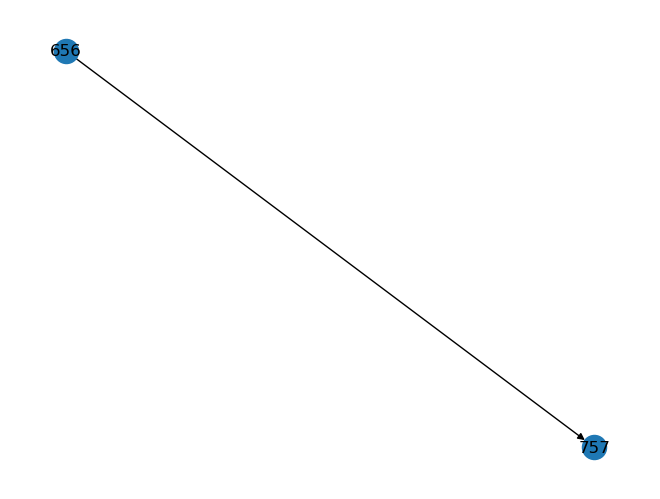

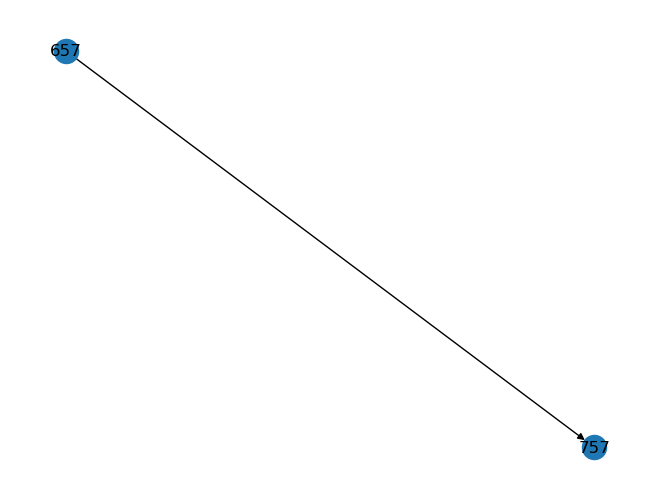

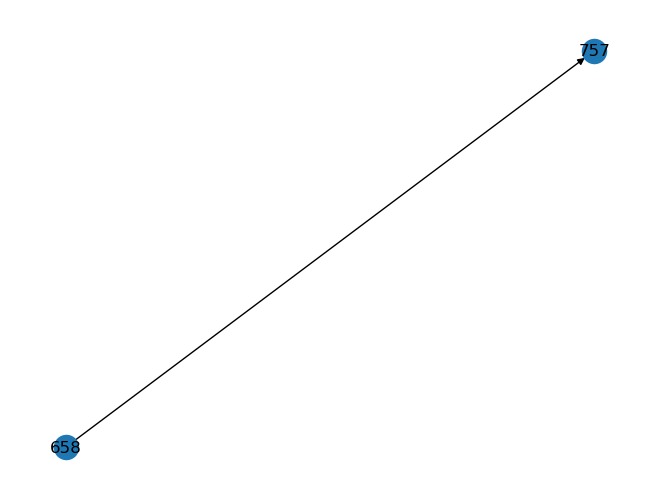

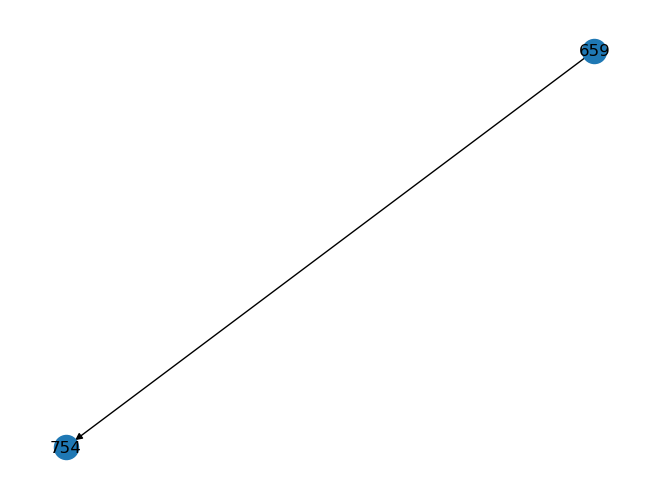

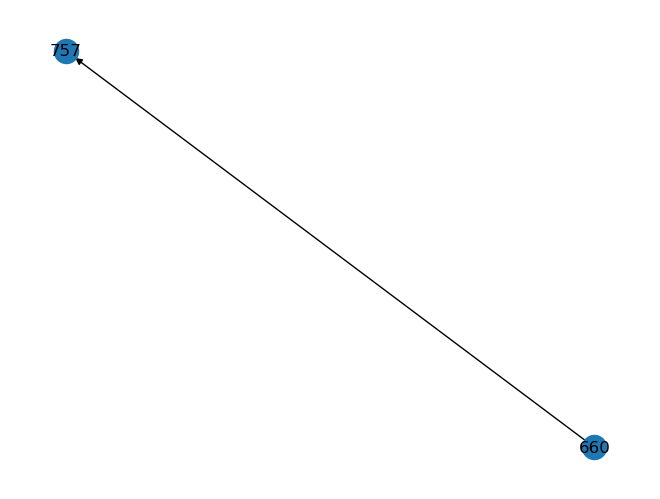

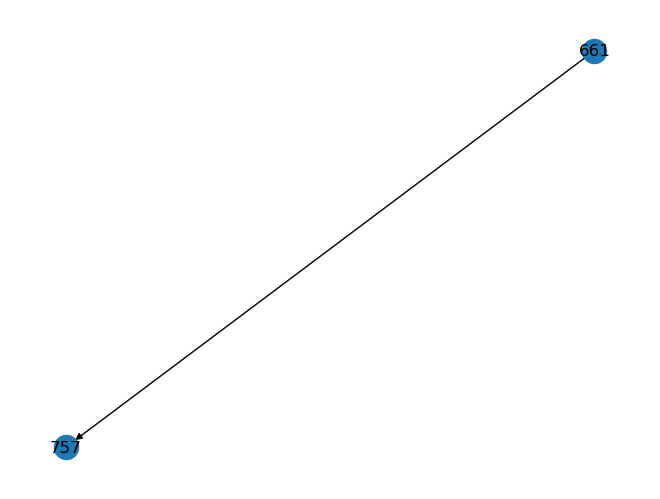

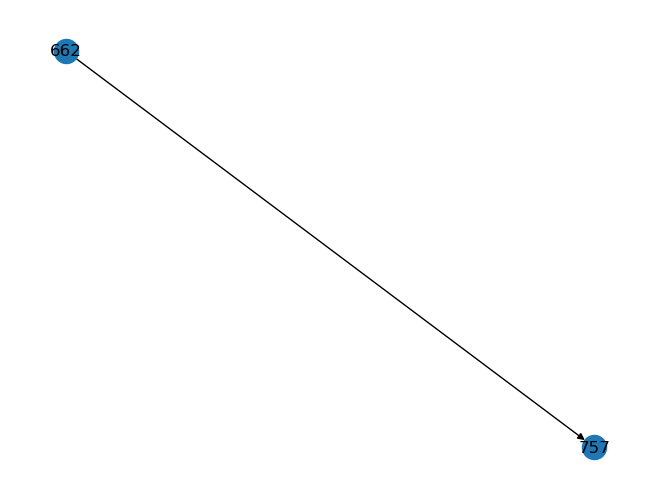

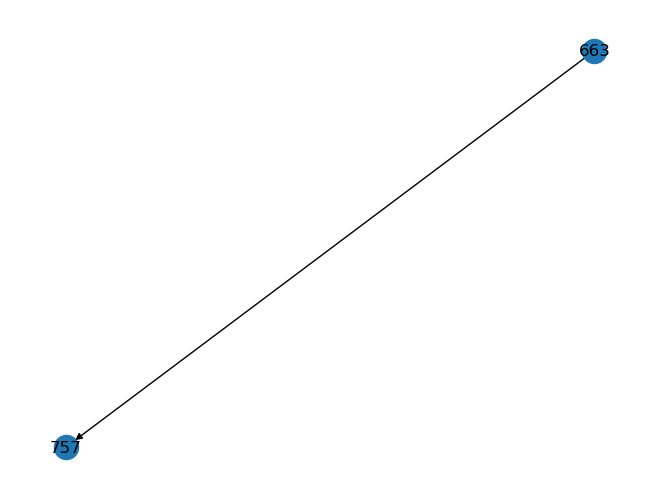

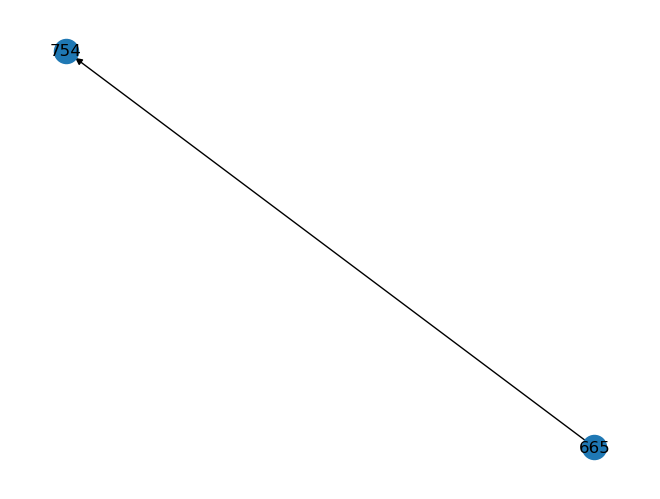

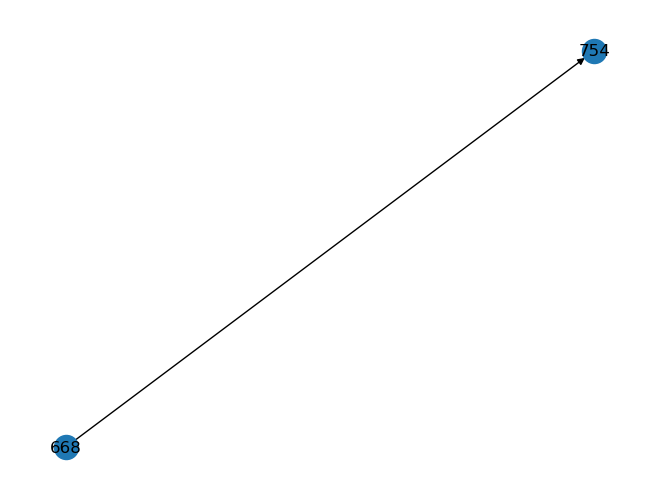

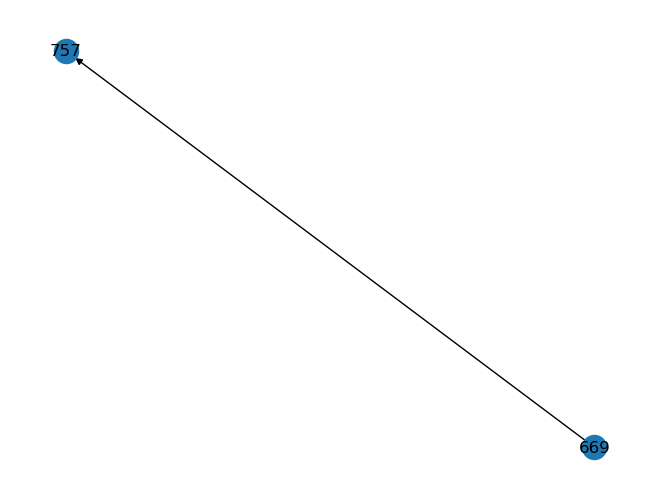

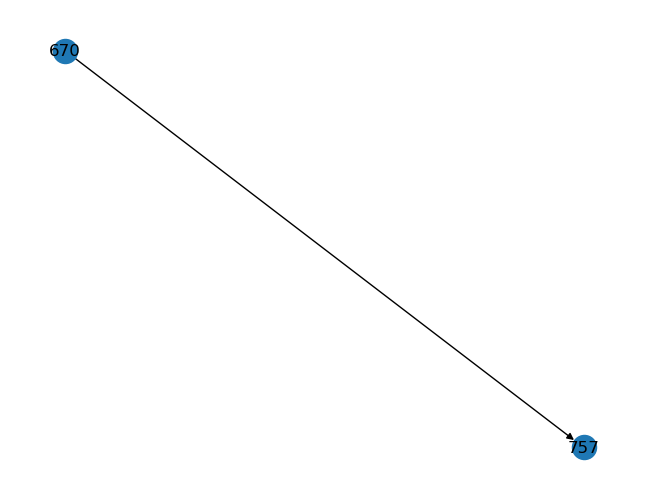

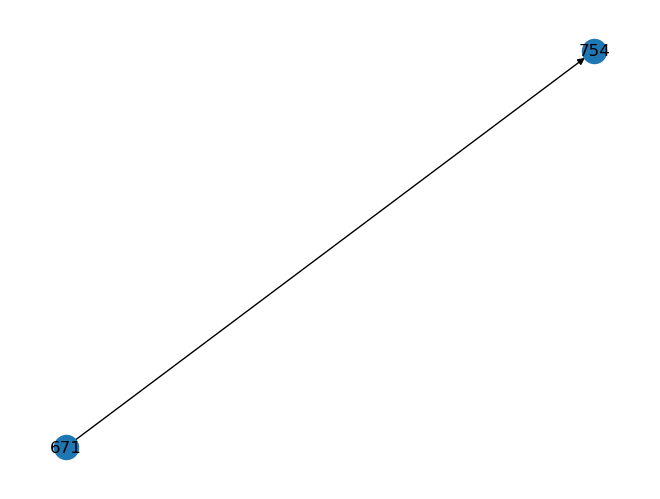

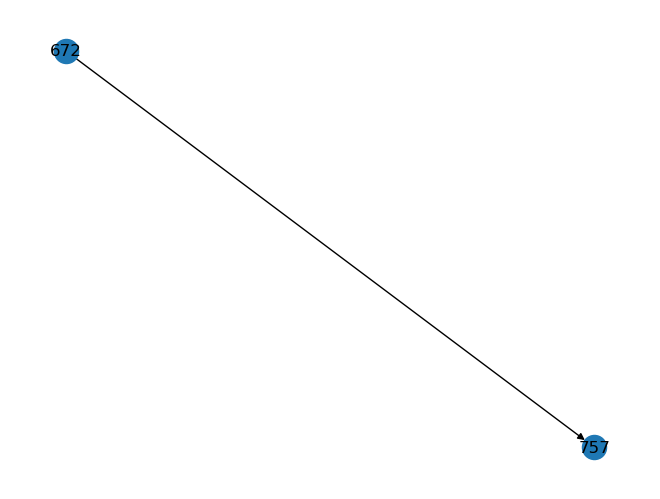

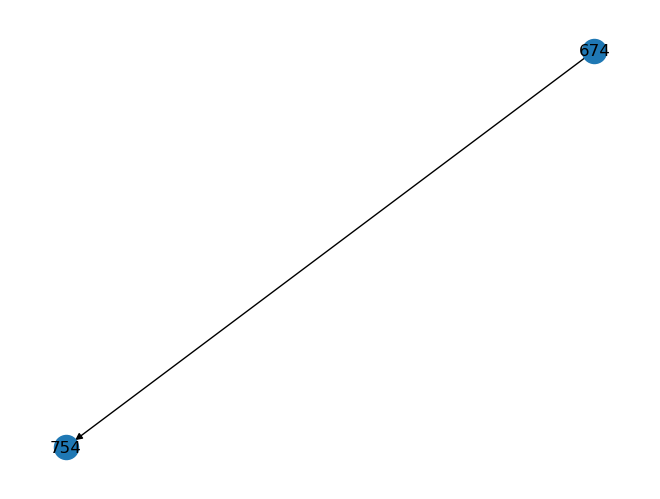

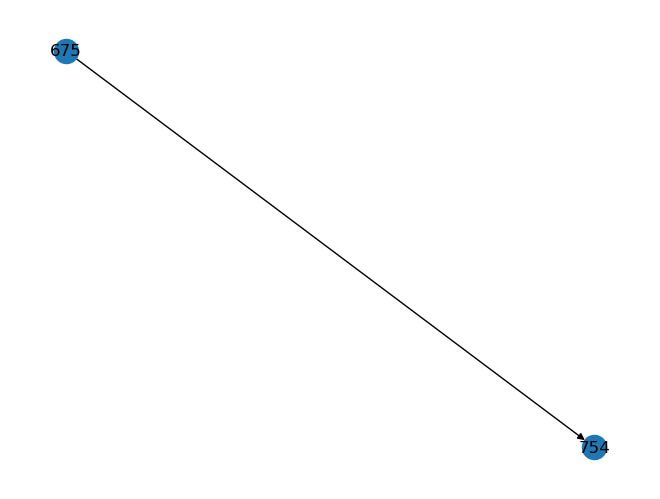

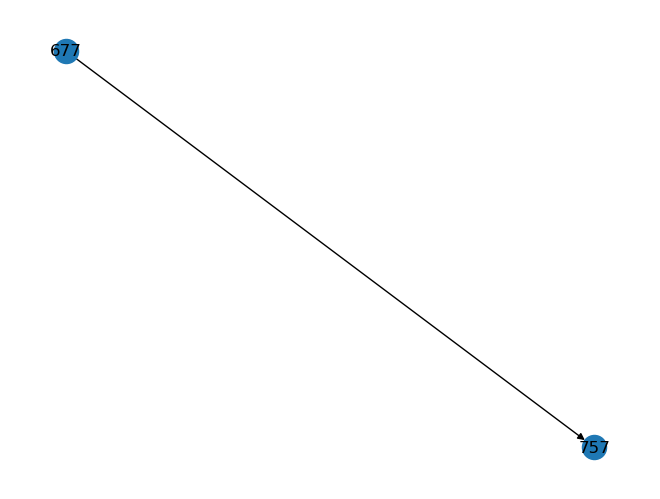

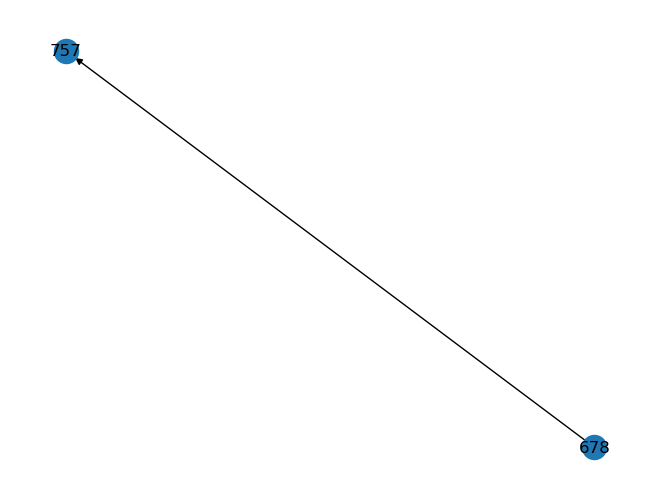

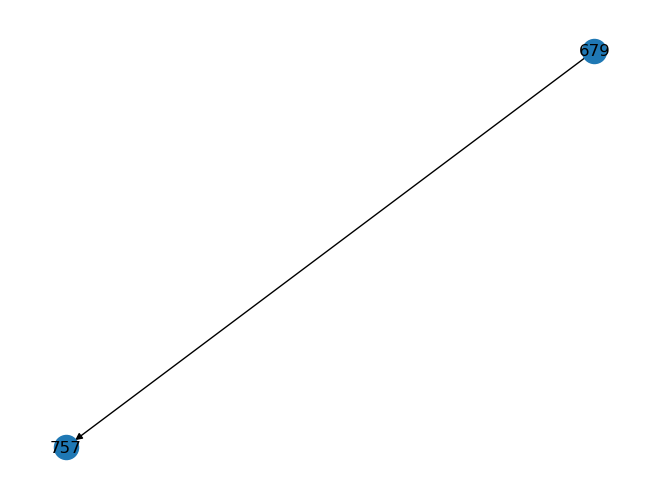

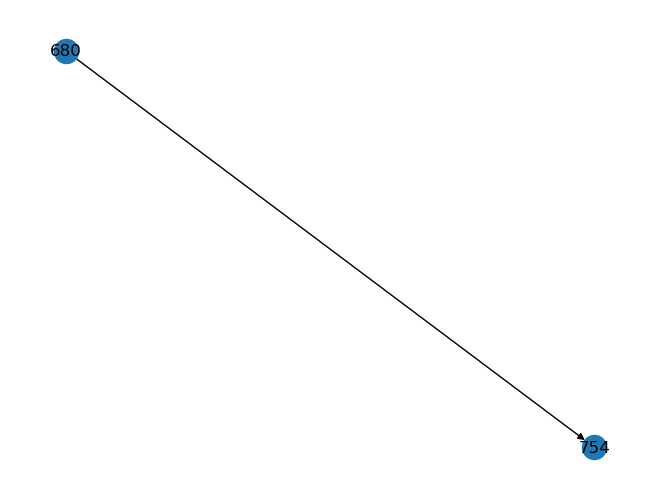

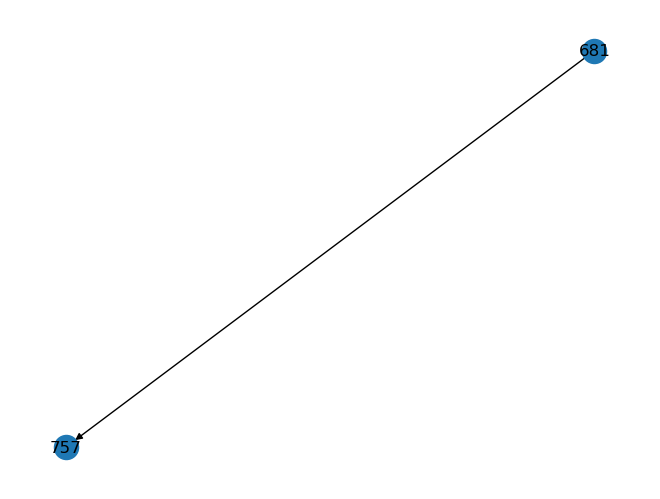

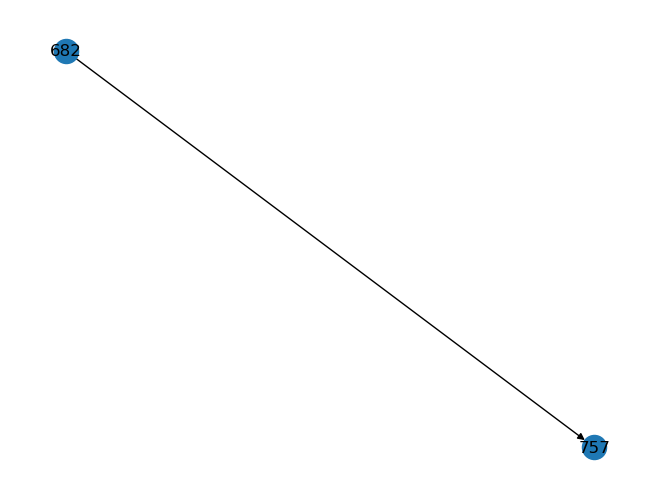

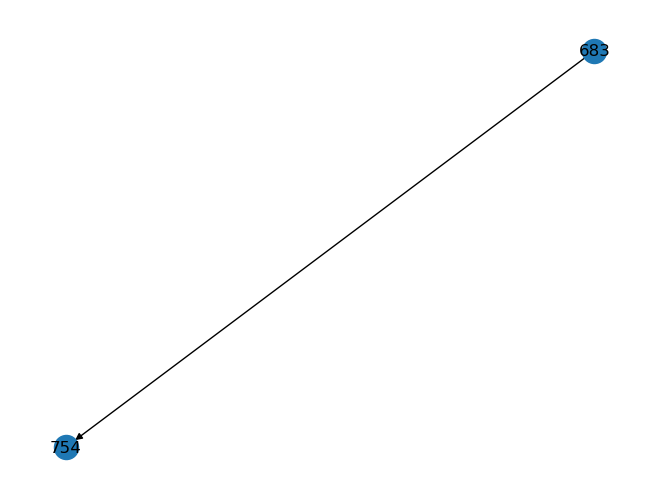

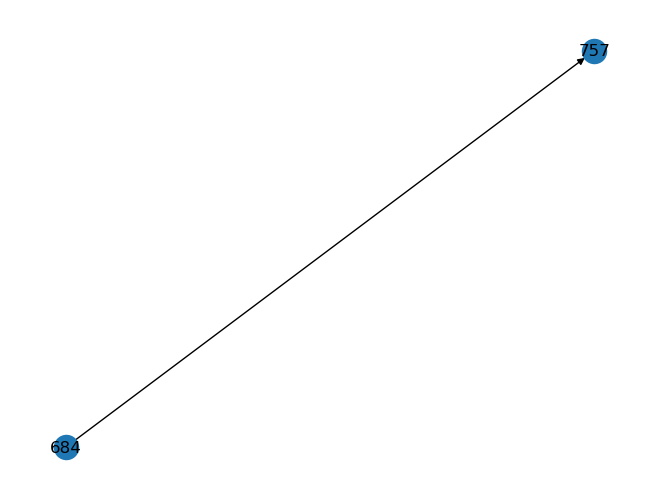

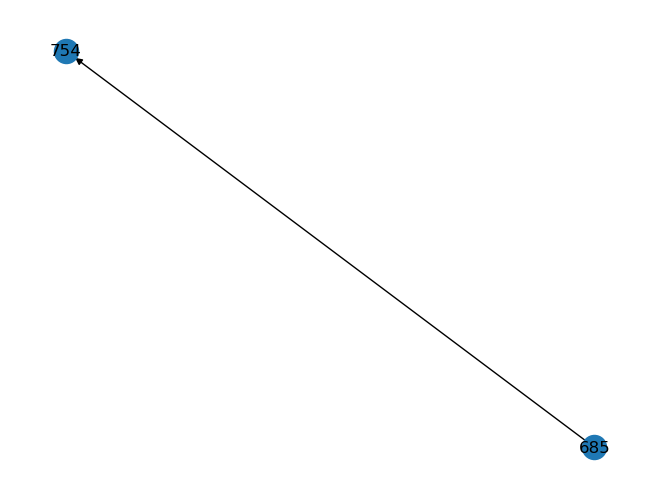

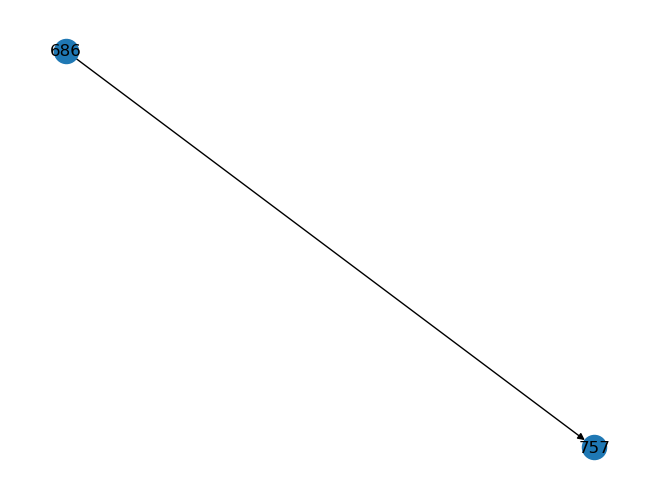

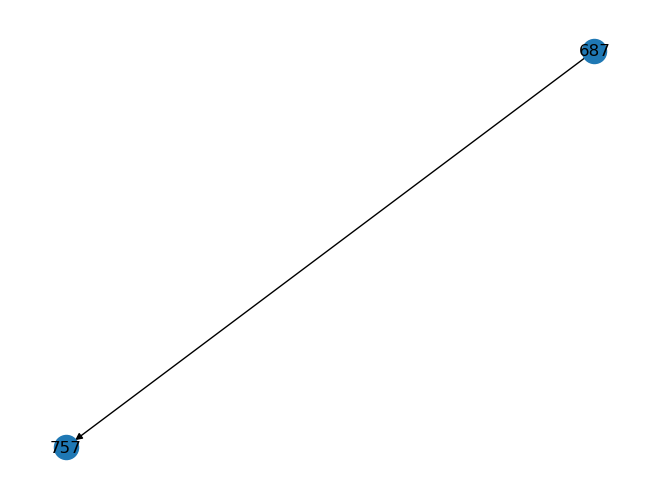

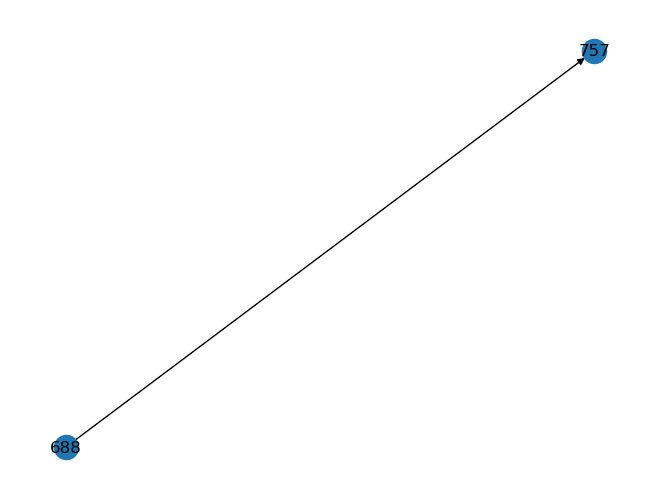

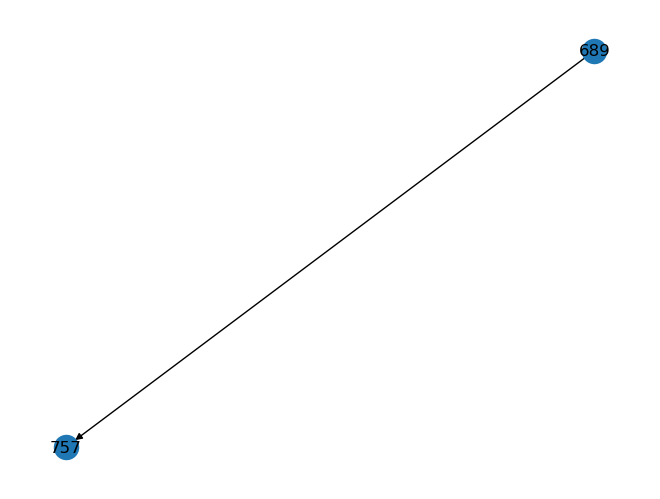

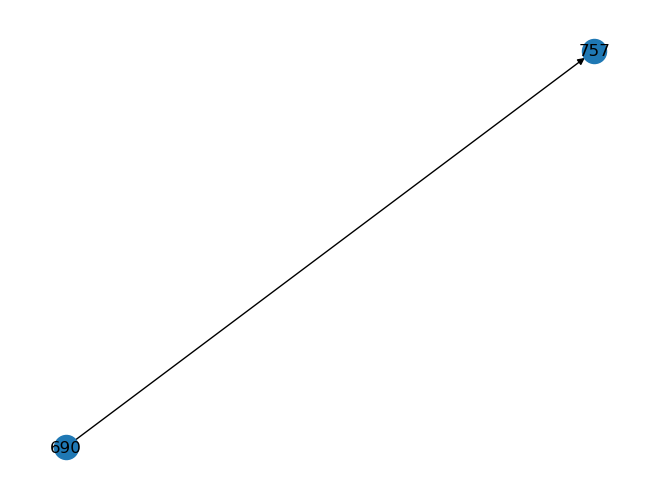

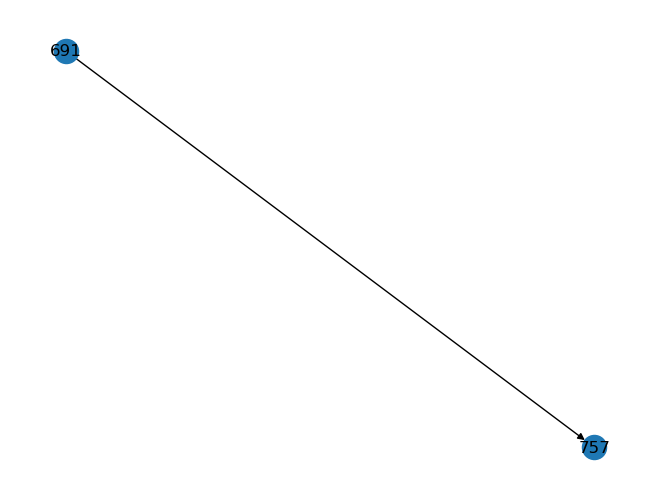

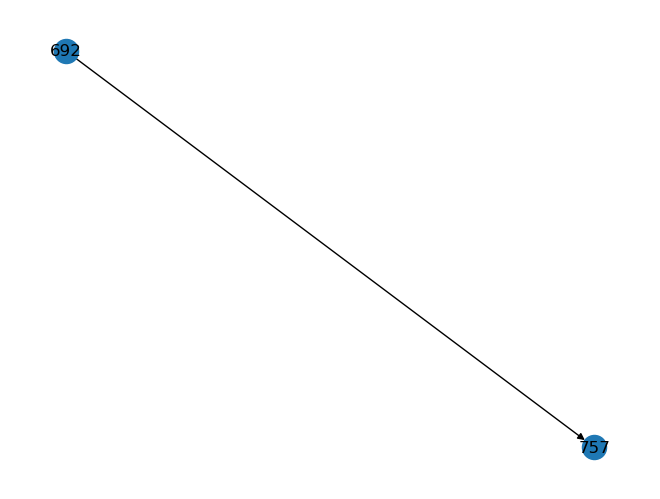

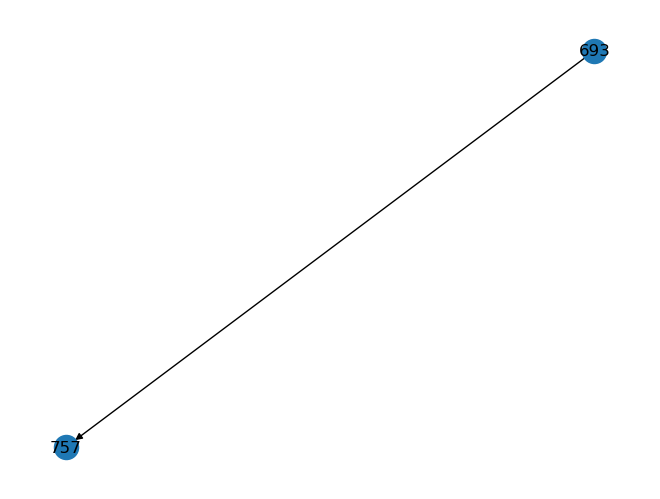

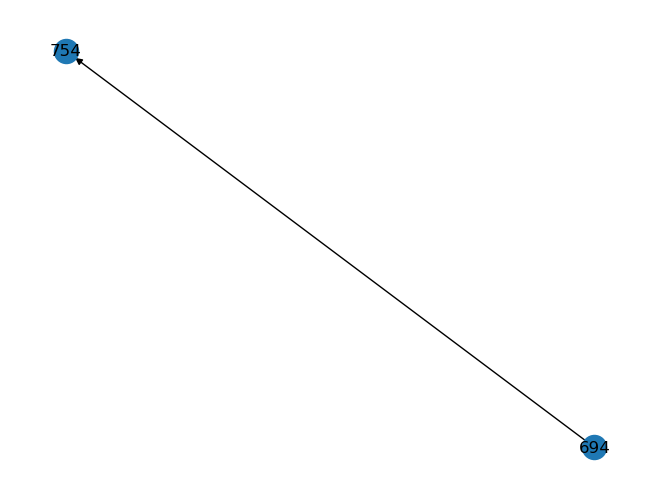

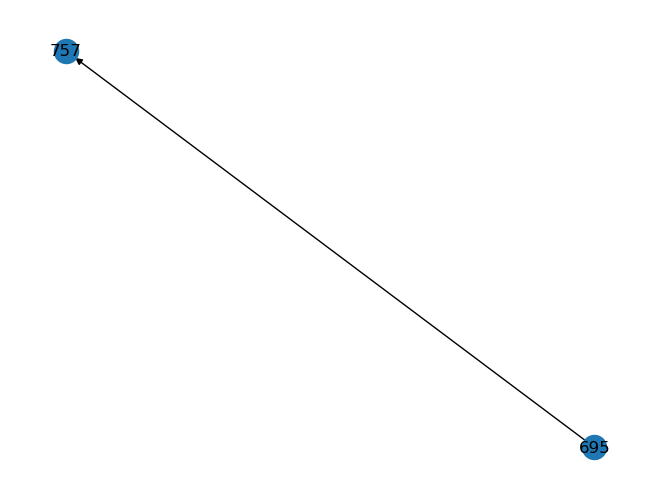

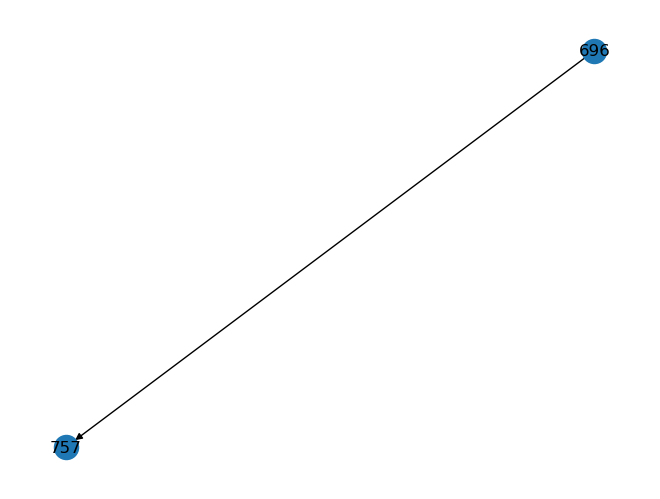

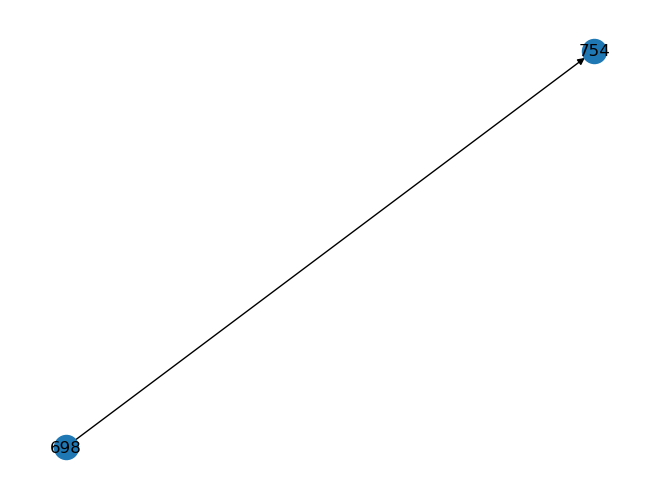

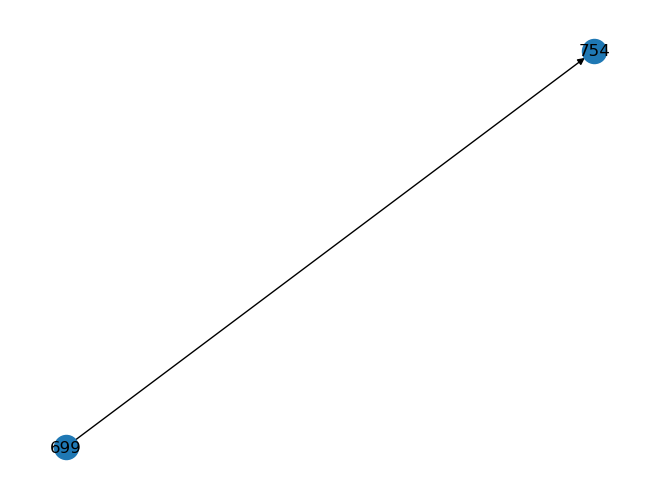

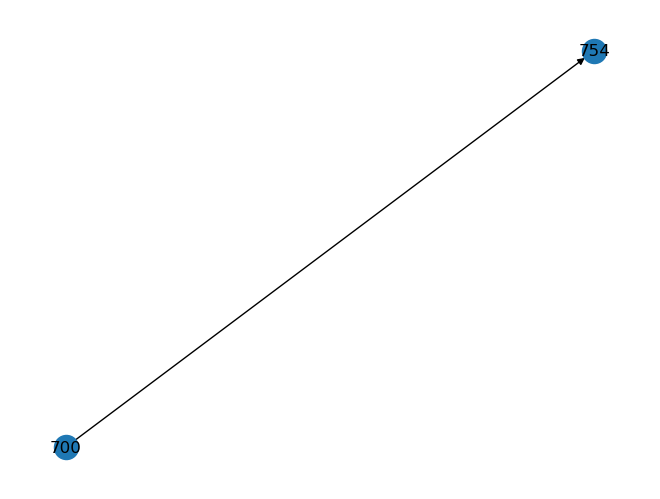

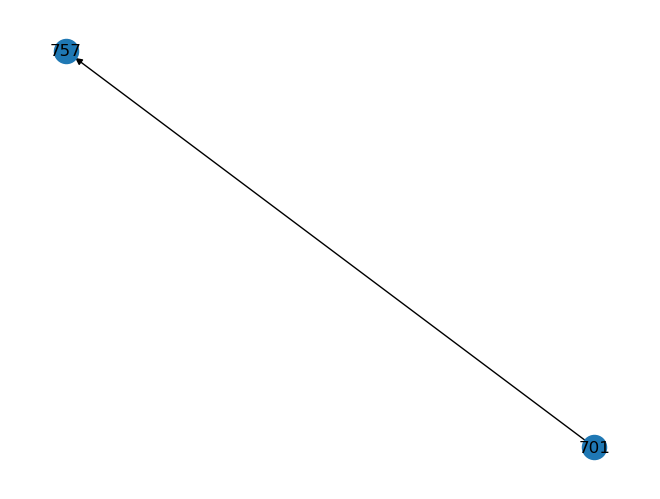

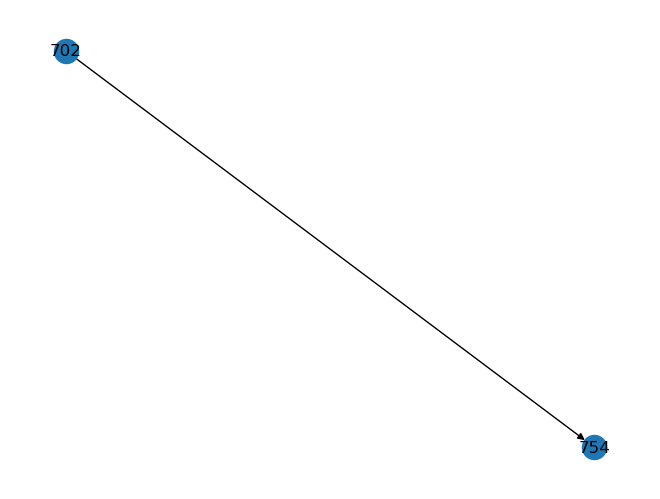

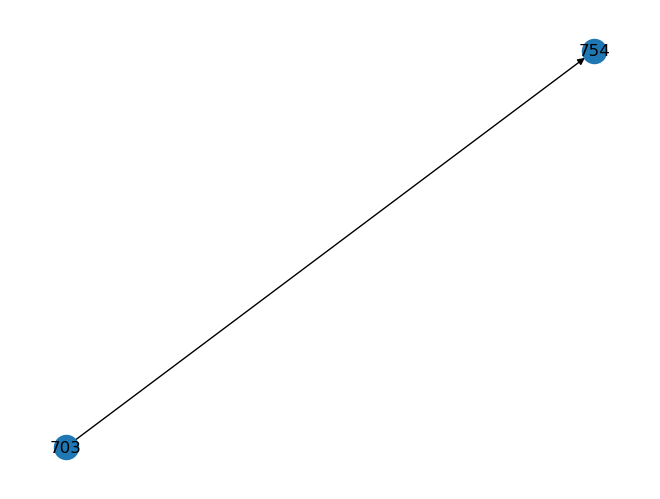

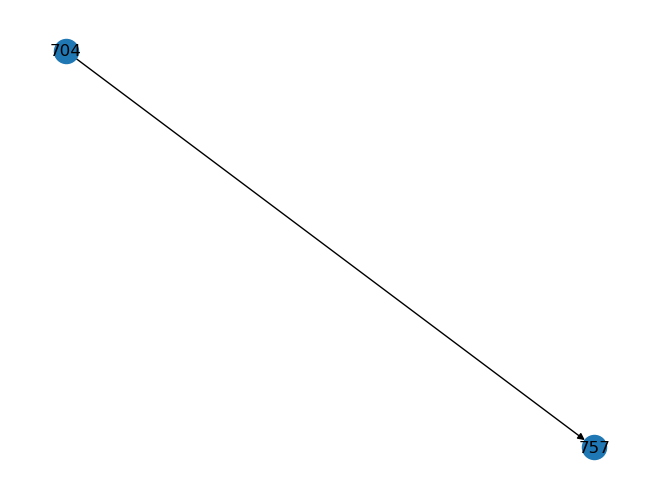

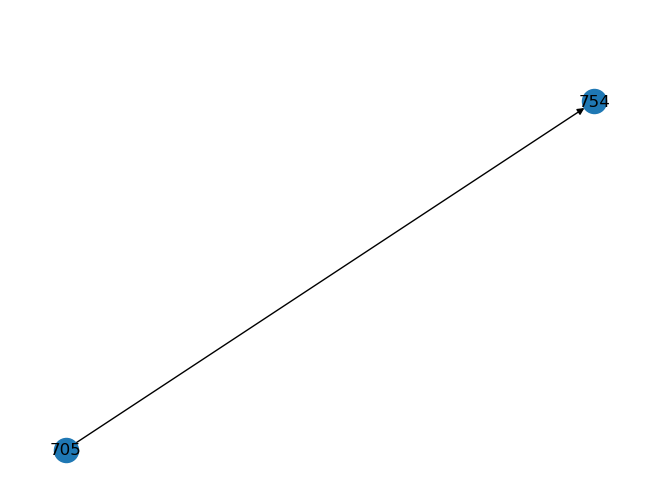

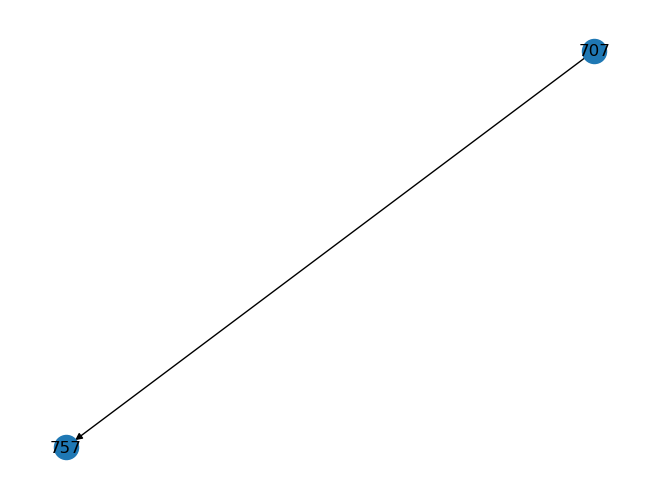

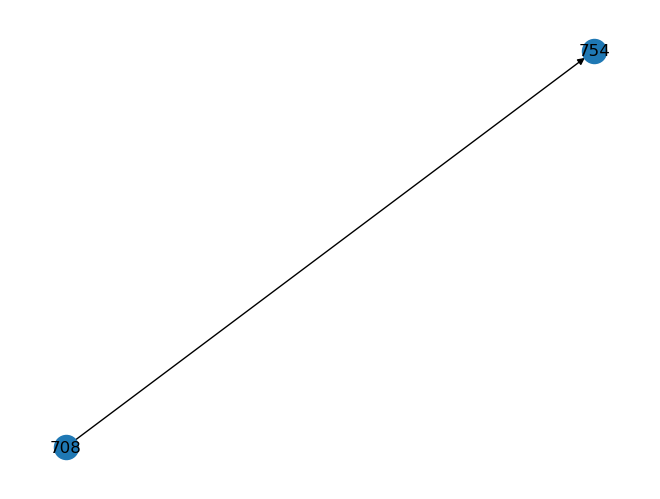

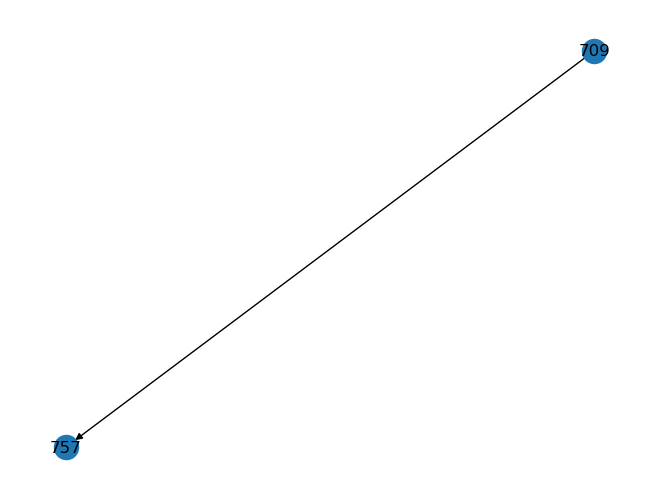

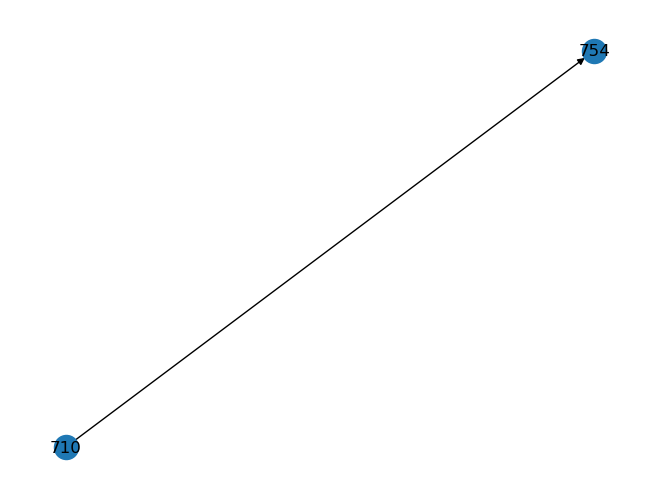

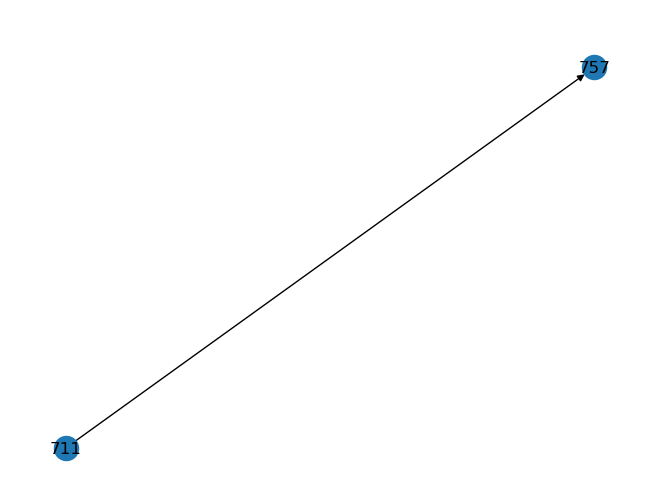

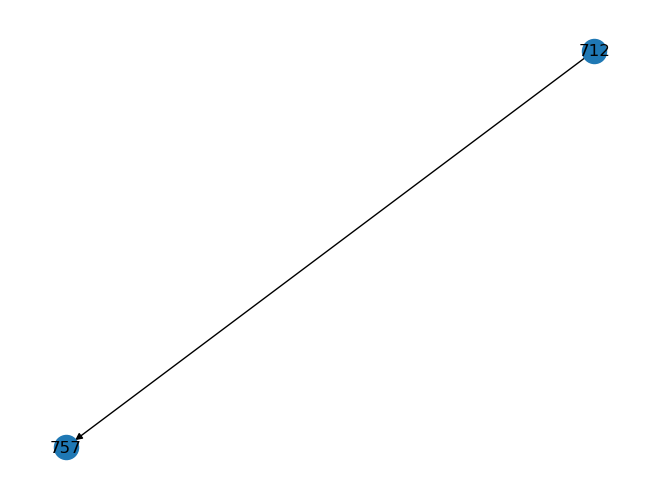

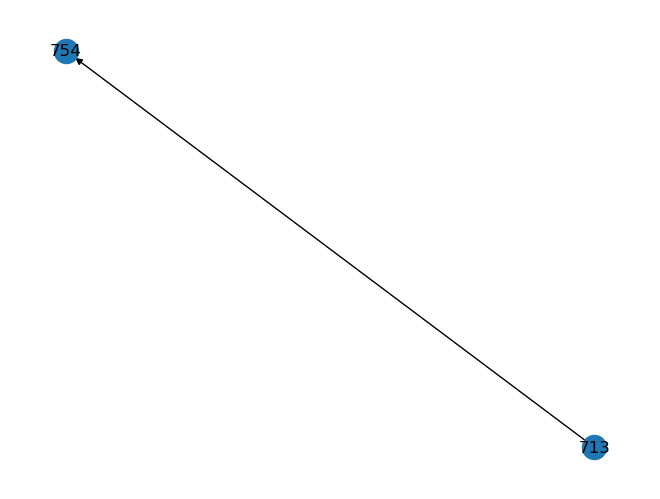

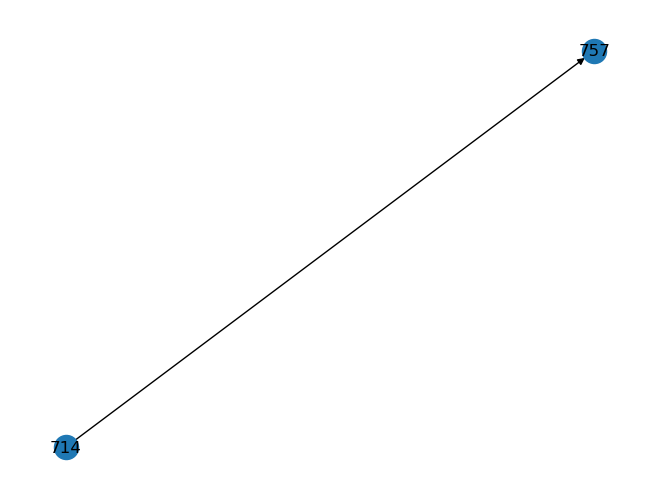

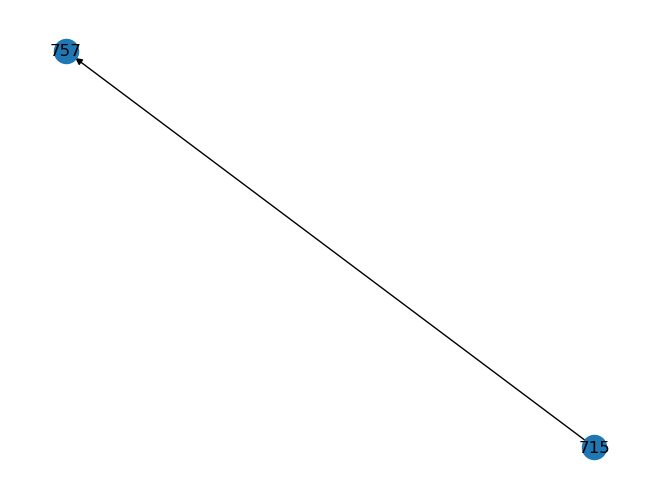

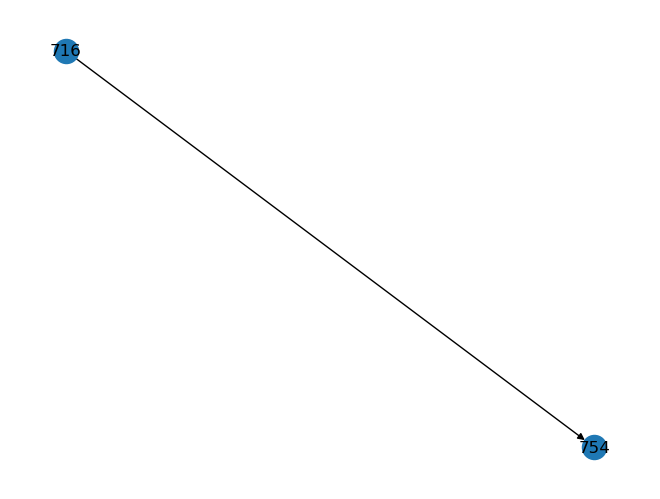

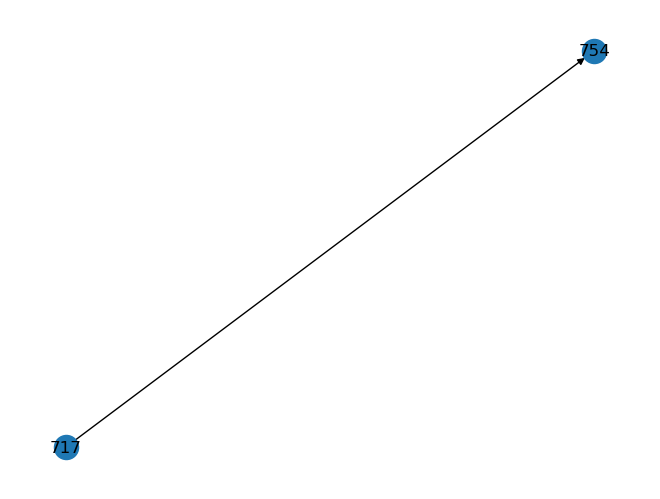

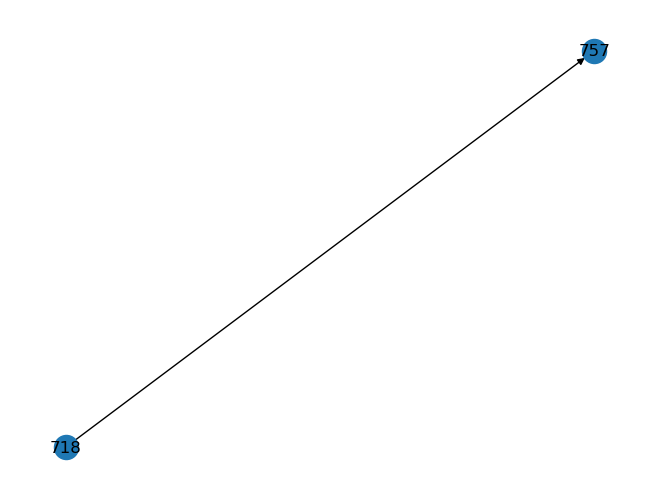

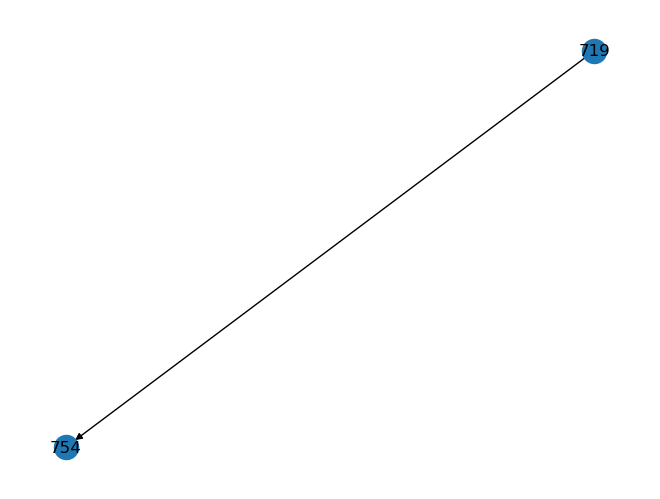

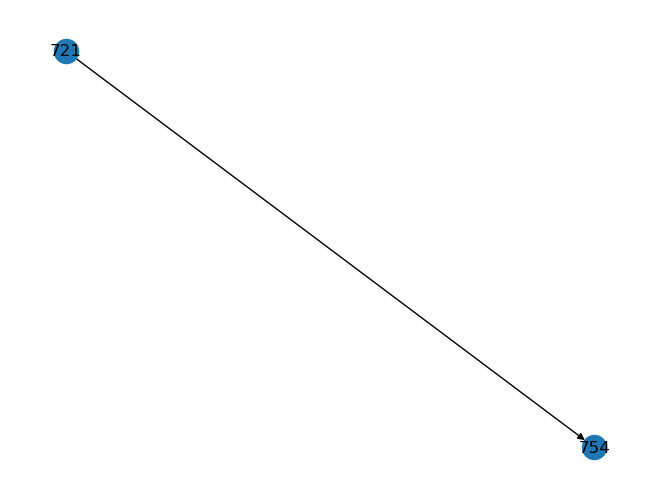

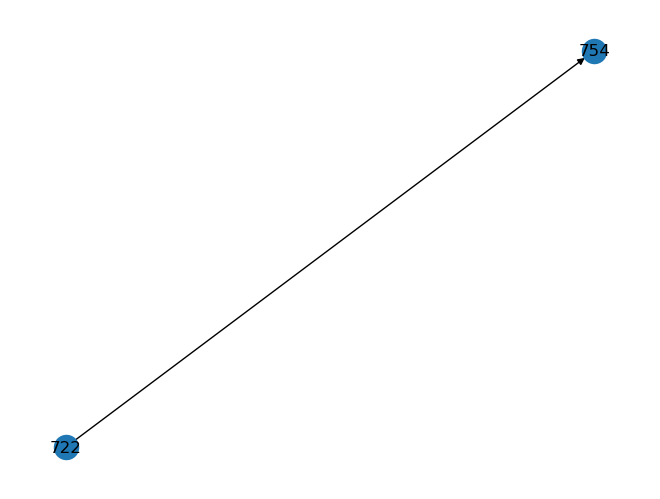

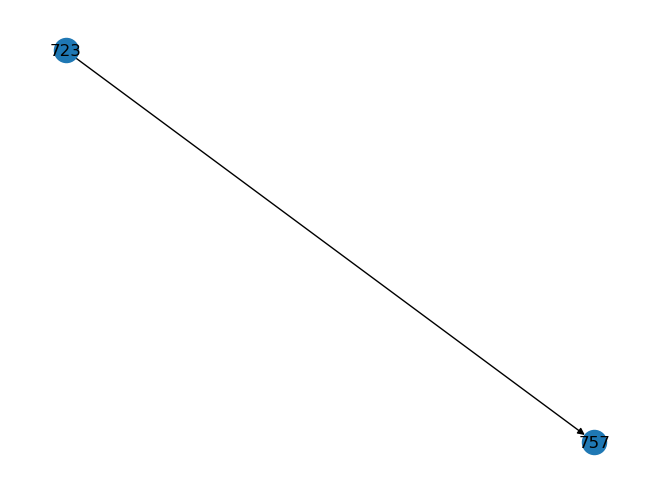

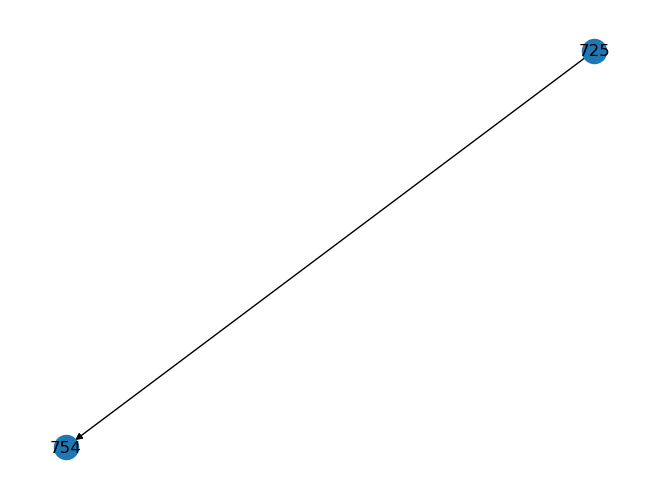

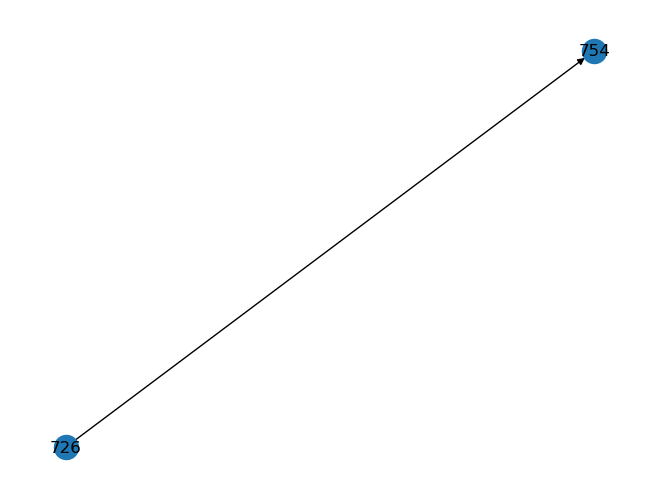

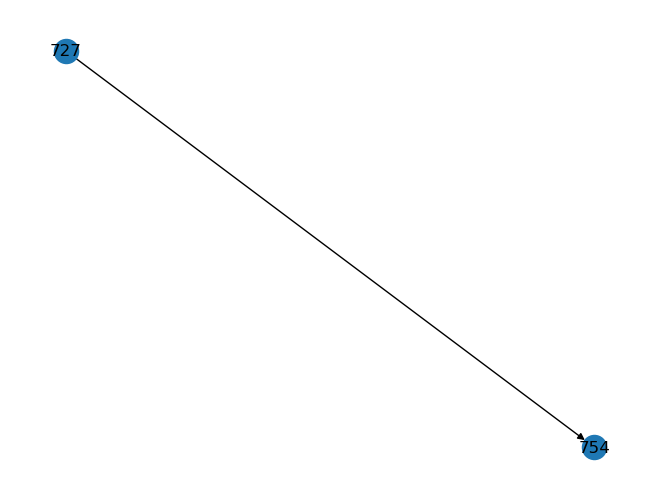

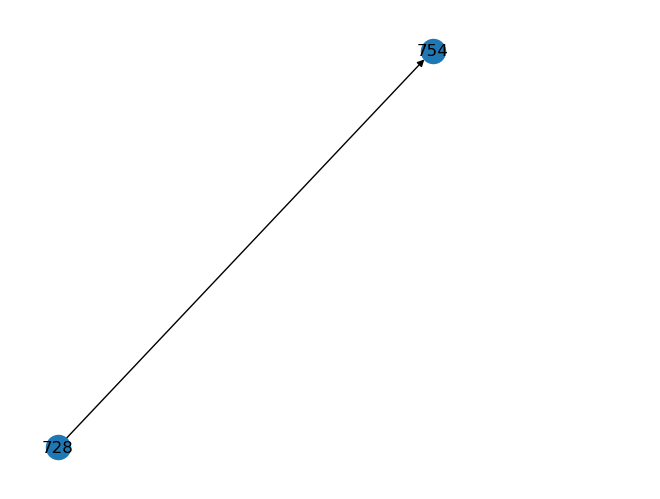

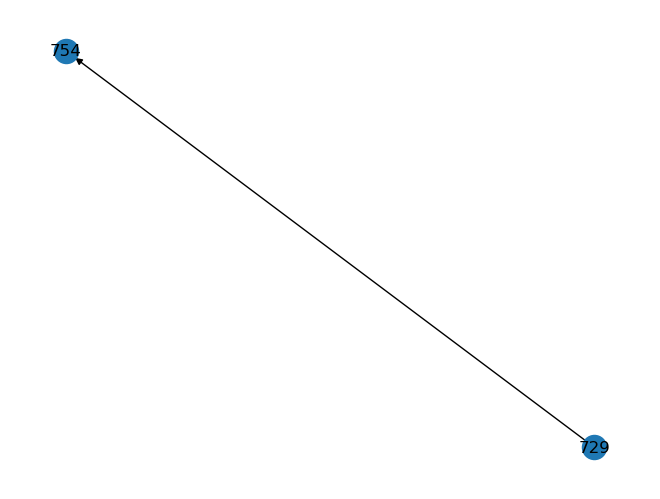

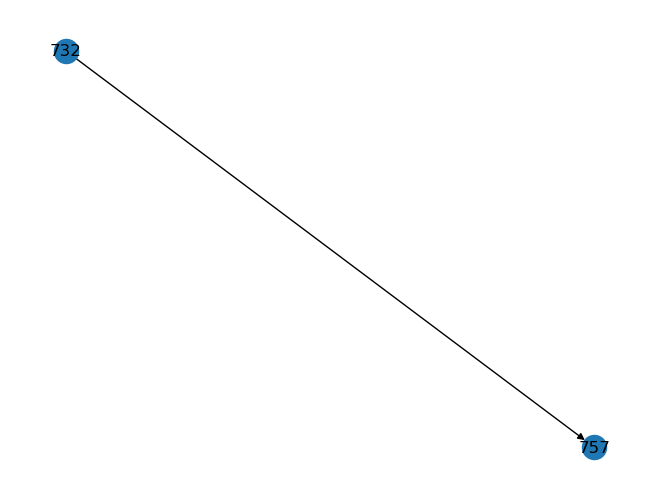

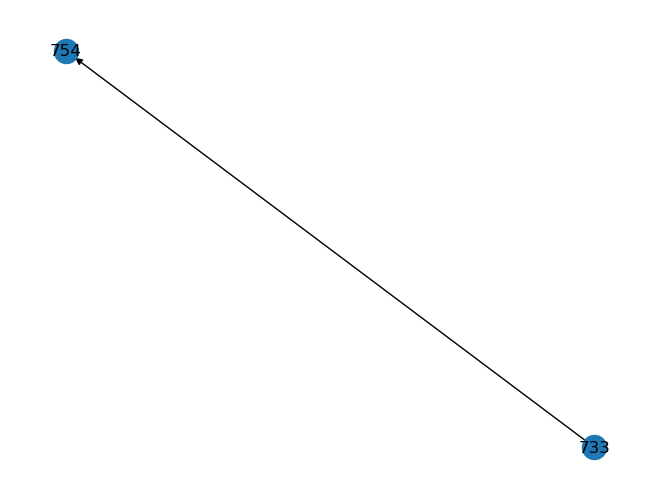

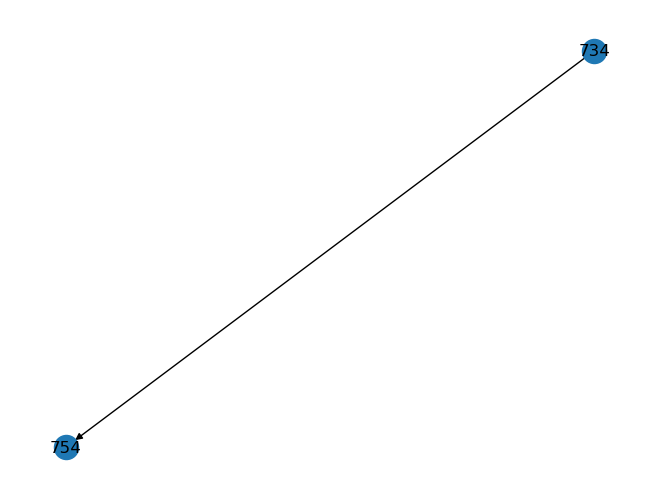

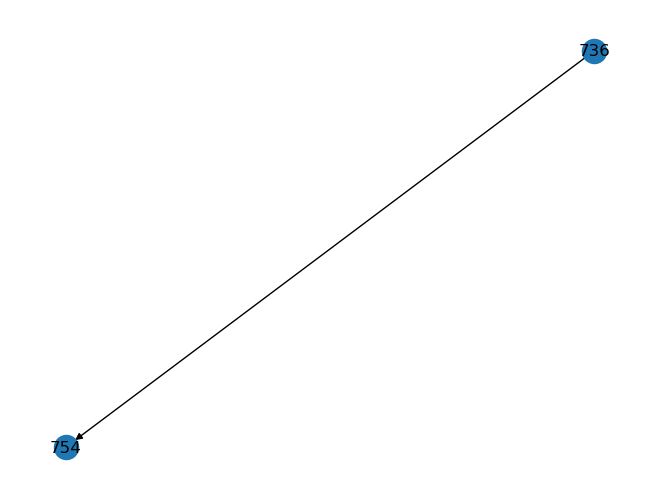

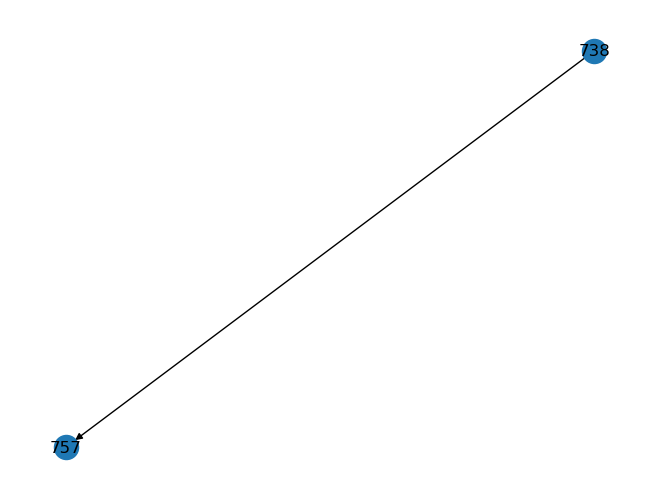

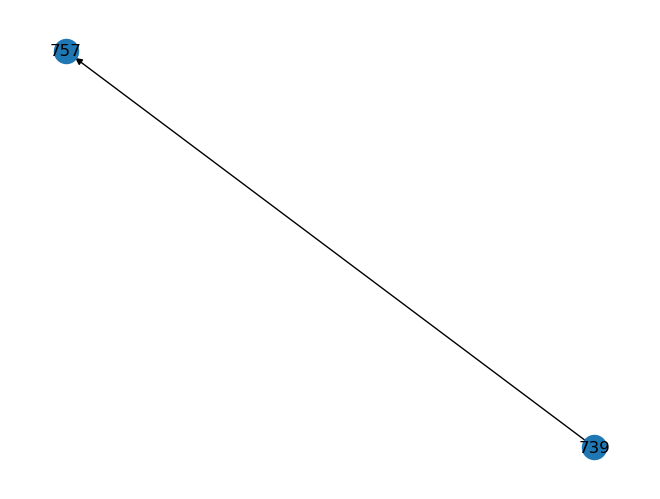

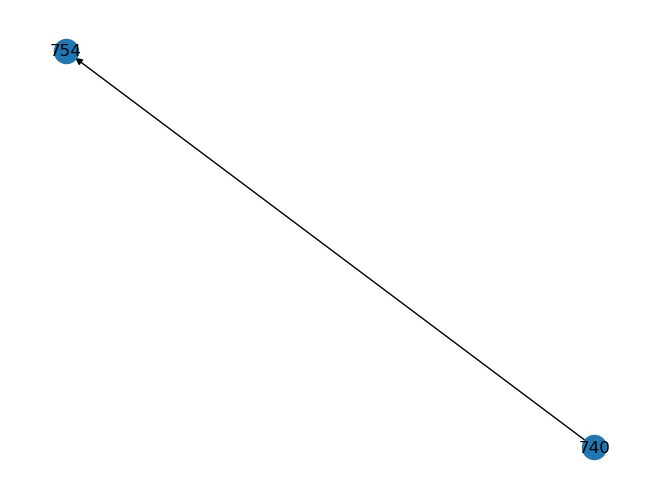

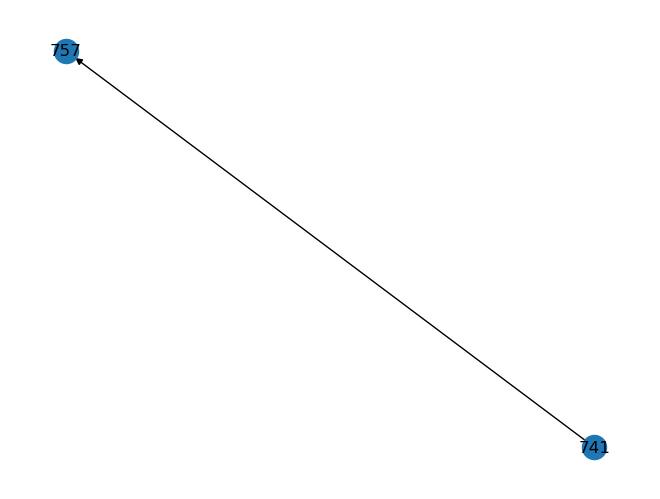

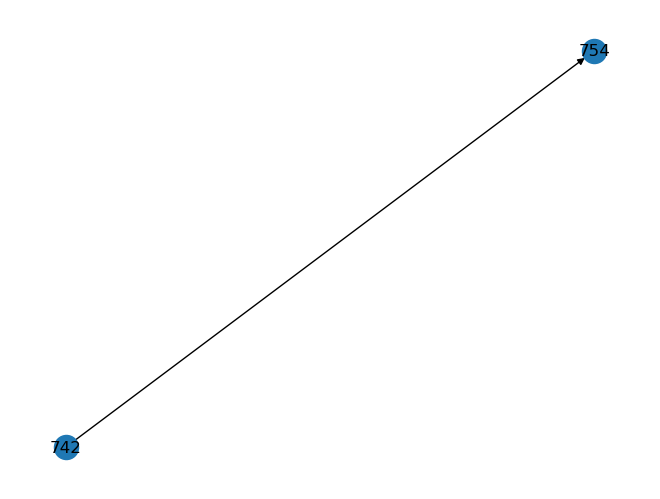

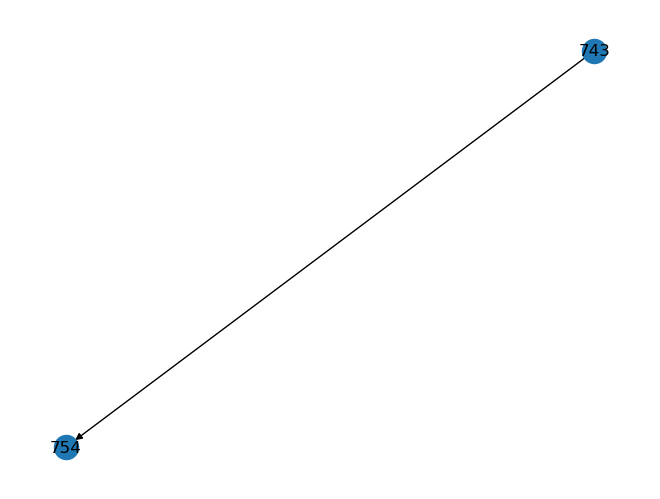

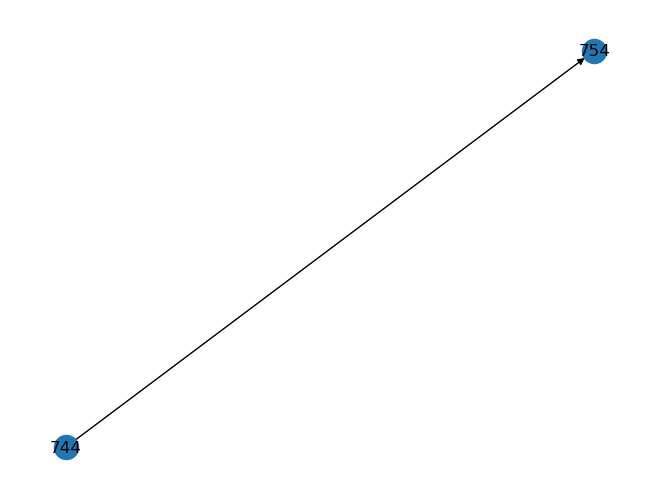

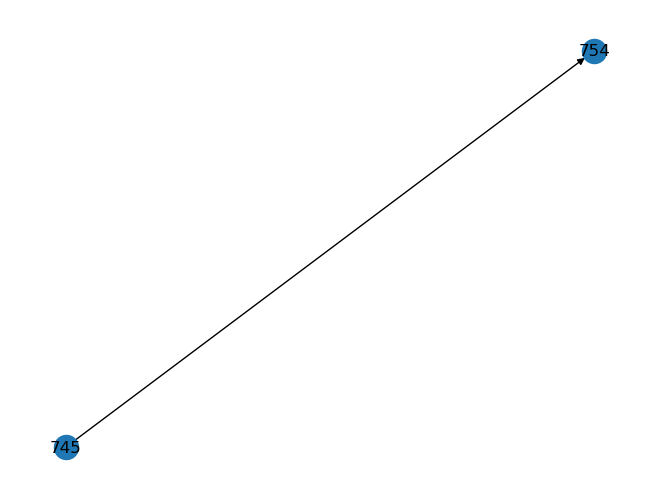

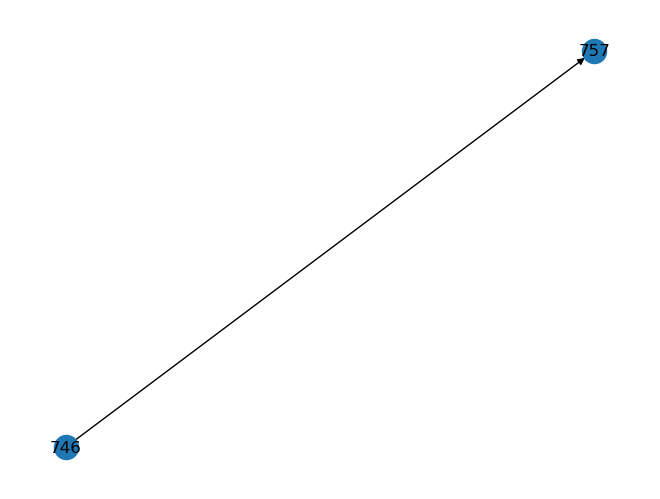

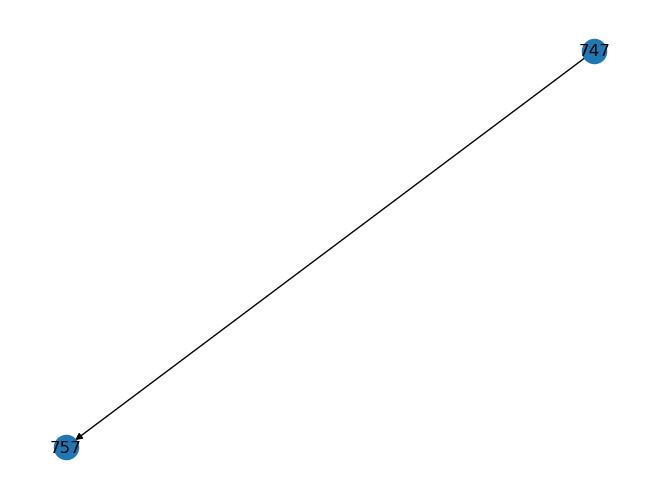

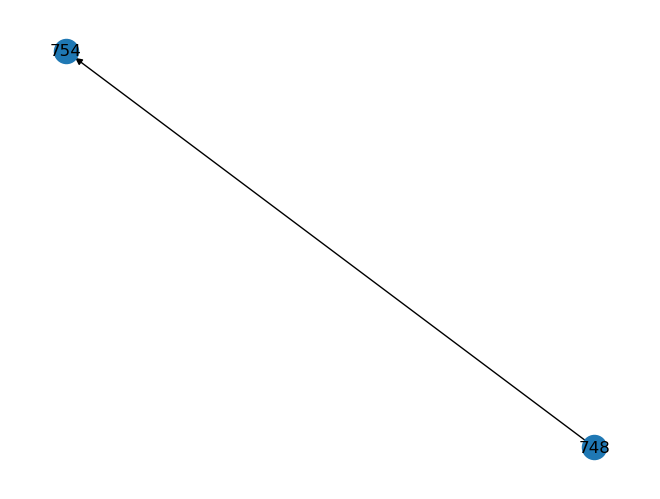

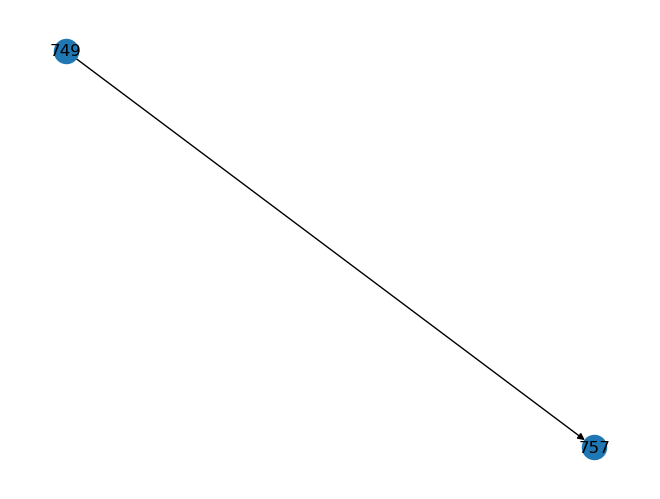

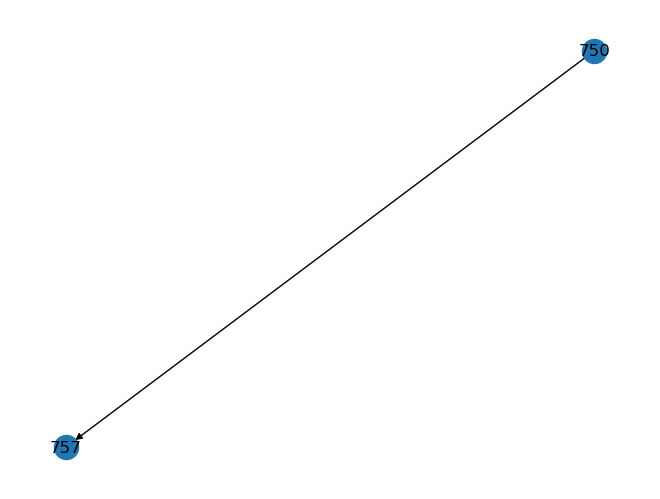

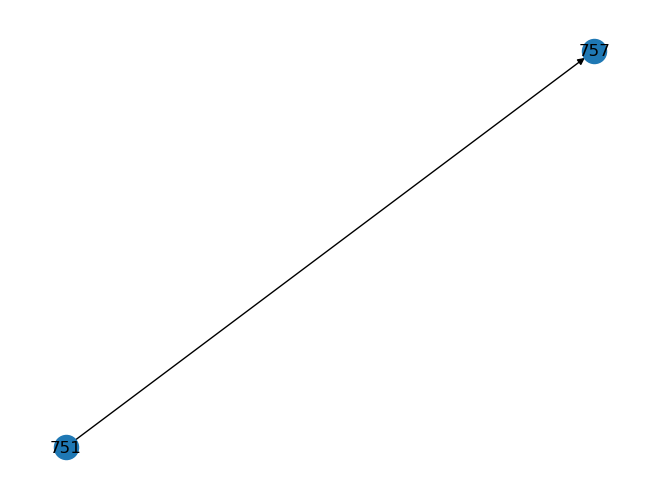

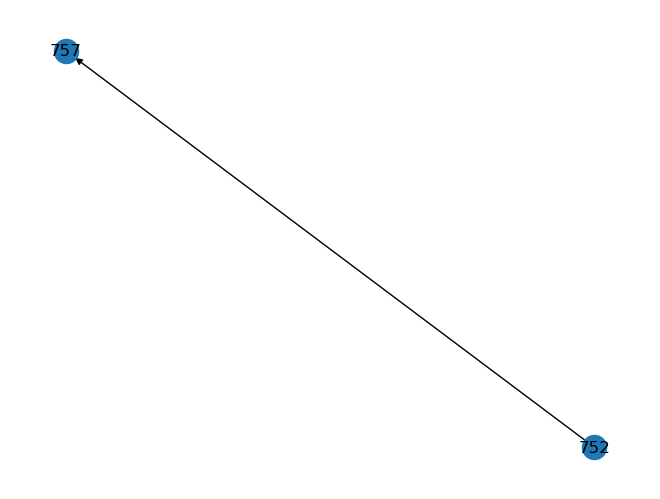

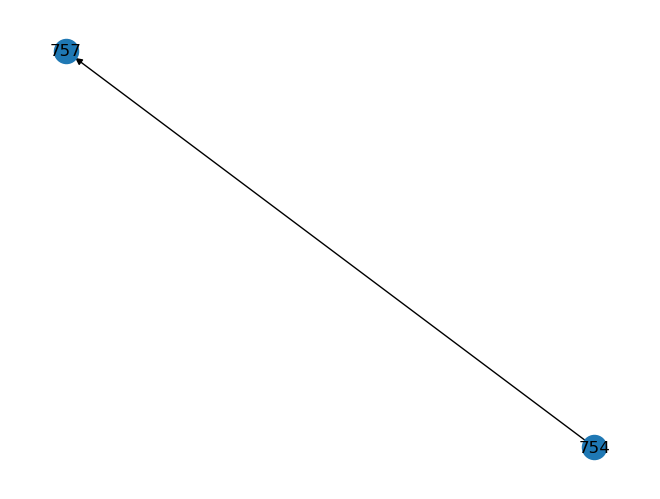

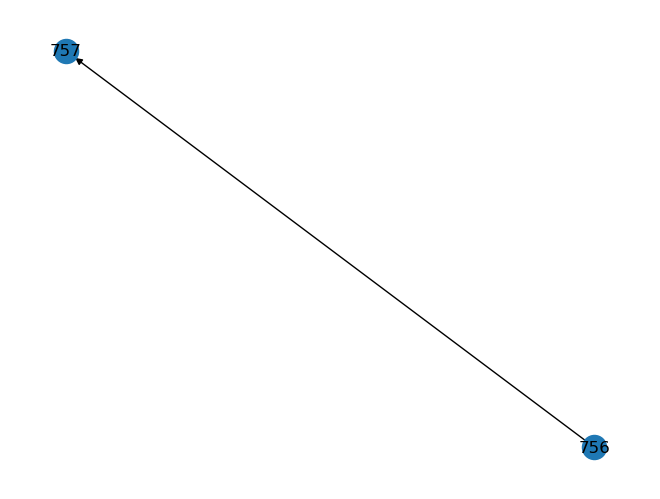

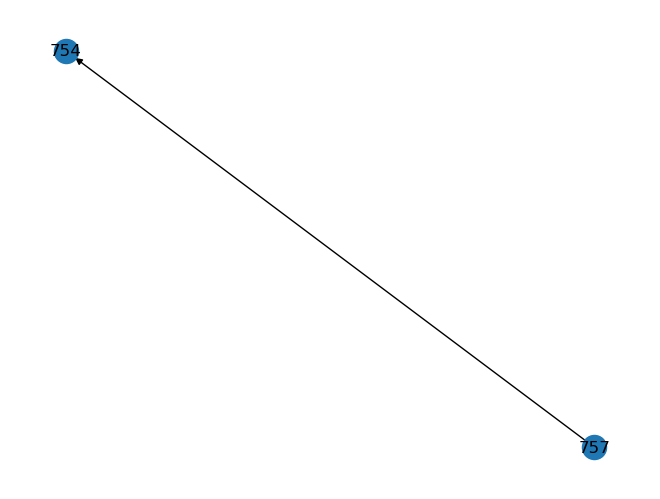

In [8]:
for edge in selected_edges:
    H = G.edge_subgraph([edge])
    nx.draw(H, with_labels = True)
    plt.show()

In [11]:
# evaluation of the plan 
for node in G.nodes:
    donors = G.nodes[node]['Donor']
    print("Node",node, "has Donors", donors)

Node 0 has Donors ['AB', 'A']
Node 1 has Donors ['AB', 'B']
Node 2 has Donors ['B']
Node 3 has Donors ['AB', 'A']
Node 4 has Donors ['AB', 'B', 'A']
Node 5 has Donors ['AB', 'A', 'B']
Node 6 has Donors ['AB', 'A']
Node 7 has Donors ['AB', 'B']
Node 8 has Donors ['AB', 'B']
Node 9 has Donors ['AB', 'A']
Node 10 has Donors ['AB', 'B']
Node 11 has Donors ['AB', 'A']
Node 12 has Donors ['AB', 'B']
Node 13 has Donors ['B']
Node 14 has Donors ['AB', 'A']
Node 15 has Donors ['B', 'A']
Node 16 has Donors ['AB', 'B']
Node 17 has Donors ['B']
Node 18 has Donors ['AB']
Node 19 has Donors ['AB', 'A']
Node 20 has Donors ['AB', 'B', 'A']
Node 21 has Donors ['B', 'A']
Node 22 has Donors ['AB', 'B']
Node 23 has Donors ['AB', 'B']
Node 24 has Donors ['AB', 'A']
Node 25 has Donors ['AB']
Node 26 has Donors ['AB', 'B']
Node 27 has Donors ['AB']
Node 28 has Donors ['AB', 'B', 'A']
Node 29 has Donors ['AB', 'A']
Node 30 has Donors ['B']
Node 31 has Donors ['AB', 'A']
Node 32 has Donors ['A']
Node 33 has Do